### Test the baseline bandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

from lib.bandits import LinUCB, ThresholdBandit,GreedyBandit, ThresholdBaselineBandit, ConsLinUCB, expected_regret
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/lansdell/.local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#alg = 'greedy'
#alg = 'linucb'
#alg = 'threshold'
#alg = 'thresholdcons'
#alg = 'conslinucb'
alg = 'thrbaseline'

M = 3    #number of runs
N = 10000 #number of timesteps
save = False
max_alpha = 2
max_beta = 2
k = 4    #Number of arms
d = 5   #Dimension of context (includes one dim for intercept term)
intercept = True
evaluate_every = 100

if alg == 'greedy':
	BanditAlg = GreedyBandit
elif alg == 'linucb':
	BanditAlg = LinUCB
elif alg == 'threshold':
	BanditAlg = ThresholdBandit
elif alg == 'thresholdcons':
	BanditAlg = ThresholdConsBandit
elif alg == 'conslinucb':
	BanditAlg = ConsLinUCB
elif alg == 'thrbaseline':
	BanditAlg = ThresholdBaselineBandit
else:
	print "Select a valid algorithm"

## Run baseline bandit 

In [3]:
#Generate slopes and intercepts
alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))

baseline_params = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d))

regret = np.zeros((M, N))
expt_regret = np.zeros((M, N))
arm_pulls = np.zeros((M, N, k+1))
n_changes = np.zeros((M, N))
update_pol = np.zeros((M, N))

In [10]:
print("Running %s algorithm"%alg)
BanditAlg = ThresholdBaselineBandit

for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    bandit = BanditAlg(generator, baseline_params[m,:,:], delta = 1./N)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        print(ctx, arm_idx)
        regret[m,i] = r
        if arm_idx >= 0:
            arm_pulls[m,i,arm_idx] = 1
        else:
            arm_pulls[m,i,k] = 1

Running thrbaseline algorithm
Run: 1/3
(array([ 1.        ,  0.80243457,  0.33780328,  0.7808639 ,  0.59669804]), 0)
(array([ 1.        ,  0.66579482,  0.5998173 ,  0.8816943 ,  0.056054  ]), 1)
(array([ 1.        ,  0.51701562,  0.06483543,  0.31670673,  0.73359876]), 2)
(array([ 1.        ,  0.46580932,  0.6897212 ,  0.17506062,  0.09203342]), 3)
(array([ 1.        ,  0.76241553,  0.31410744,  0.35604284,  0.91791265]), 0)
(array([ 1.        ,  0.59133666,  0.84421776,  0.01540108,  0.72839578]), 1)
(array([ 1.        ,  0.83430032,  0.40783307,  0.55415957,  0.67032722]), 2)
(array([ 1.        ,  0.36481437,  0.07062042,  0.4505391 ,  0.19157942]), 3)
(array([ 1.        ,  0.03617291,  0.28235928,  0.55408433,  0.72836787]), 0)
(array([ 1.        ,  0.77415049,  0.93842569,  0.81129188,  0.51977869]), 1)
(array([ 1.        ,  0.40913903,  0.05767787,  0.58499552,  0.70334074]), 2)
(array([ 1.        ,  0.02776927,  0.56177078,  0.23858411,  0.19209252]), 3)
(array([ 1.        ,  0.8

(array([ 1.        ,  0.52108553,  0.35396887,  0.13142108,  0.590586  ]), 1)
(array([ 1.        ,  0.8451081 ,  0.39396689,  0.97699606,  0.39839987]), 1)
(array([ 1.        ,  0.11430789,  0.46065636,  0.62750196,  0.88277834]), 1)
(array([ 1.        ,  0.86636435,  0.86448085,  0.97841541,  0.70550364]), 1)
(array([ 1.        ,  0.81536895,  0.0385829 ,  0.14579402,  0.84379285]), 1)
(array([ 1.        ,  0.22650223,  0.50968095,  0.08585139,  0.70576779]), 1)
(array([ 1.        ,  0.91431257,  0.126101  ,  0.21294395,  0.18104306]), 2)
(array([ 1.        ,  0.64581094,  0.26578018,  0.08103547,  0.51650528]), 2)
(array([ 1.        ,  0.97383698,  0.64014674,  0.22742974,  0.41274454]), 2)
(array([ 1.        ,  0.67412871,  0.57574465,  0.59414025,  0.7263182 ]), 1)
(array([ 1.        ,  0.98560471,  0.54611851,  0.21386027,  0.30668827]), 2)
(array([ 1.        ,  0.57925526,  0.75153535,  0.99633783,  0.25864536]), 1)
(array([ 1.        ,  0.02896237,  0.08764745,  0.44445055,  0.4

(array([ 1.        ,  0.10823419,  0.22967864,  0.68189886,  0.14778646]), 1)
(array([ 1.        ,  0.87280886,  0.42421319,  0.37547771,  0.76632965]), 1)
(array([ 1.        ,  0.02109025,  0.51093594,  0.30253523,  0.70919794]), 1)
(array([ 1.        ,  0.41845695,  0.01916477,  0.93218784,  0.77539046]), 1)
(array([ 1.        ,  0.33297317,  0.88055531,  0.69818072,  0.57823064]), 1)
(array([ 1.        ,  0.73879086,  0.1585853 ,  0.47771465,  0.93705126]), 1)
(array([ 1.        ,  0.19622598,  0.20756424,  0.53483372,  0.38151403]), 1)
(array([ 1.        ,  0.79909384,  0.78405089,  0.72974111,  0.69660714]), 1)
(array([ 1.        ,  0.99588423,  0.19521019,  0.30530793,  0.87273632]), 1)
(array([ 1.        ,  0.54744595,  0.98066054,  0.26728524,  0.20400857]), 2)
(array([ 1.        ,  0.66033972,  0.96242112,  0.0415724 ,  0.33819771]), 2)
(array([ 1.        ,  0.71646401,  0.86964435,  0.0345467 ,  0.37130576]), 2)
(array([ 1.        ,  0.28336911,  0.85476403,  0.11379993,  0.4

(array([ 1.        ,  0.66131889,  0.03631887,  0.37600054,  0.78232837]), 1)
(array([ 1.        ,  0.50573966,  0.42429328,  0.84906416,  0.24875122]), 1)
(array([ 1.        ,  0.44168556,  0.99095071,  0.96568663,  0.67566679]), 1)
(array([ 1.        ,  0.80363463,  0.65946505,  0.35100298,  0.63777013]), 1)
(array([ 1.        ,  0.90573424,  0.60881355,  0.03825354,  0.77842845]), 2)
(array([  1.00000000e+00,   1.01128611e-01,   6.28785009e-01,
         4.85688245e-01,   3.48136883e-04]), 1)
(array([ 1.        ,  0.66858252,  0.66840228,  0.60064466,  0.83865921]), 1)
(array([ 1.        ,  0.19954633,  0.39348095,  0.00280298,  0.48353928]), 0)
(array([ 1.        ,  0.36321928,  0.93565077,  0.81732392,  0.09345221]), 1)
(array([ 1.        ,  0.98878926,  0.08061272,  0.31575675,  0.98911177]), 1)
(array([ 1.        ,  0.27448014,  0.60812991,  0.04379211,  0.20179907]), 2)
(array([ 1.        ,  0.10853895,  0.70787002,  0.66015426,  0.16396425]), 1)
(array([ 1.        ,  0.96754356

(array([ 1.        ,  0.1710482 ,  0.90337536,  0.72941303,  0.25313477]), 1)
(array([ 1.        ,  0.49221409,  0.52680863,  0.55749731,  0.0809725 ]), 1)
(array([ 1.        ,  0.81089917,  0.02557355,  0.69829878,  0.74418777]), 1)
(array([ 1.        ,  0.95168183,  0.17719796,  0.58532604,  0.55439822]), 1)
(array([ 1.        ,  0.95879338,  0.58356002,  0.39088681,  0.99606465]), 1)
(array([ 1.        ,  0.38595653,  0.94113654,  0.5984271 ,  0.07167984]), 1)
(array([ 1.        ,  0.14939788,  0.023263  ,  0.93772226,  0.56294789]), 1)
(array([ 1.        ,  0.17965342,  0.23732822,  0.05062642,  0.50650348]), 0)
(array([ 1.        ,  0.33683789,  0.73335625,  0.00370663,  0.09404649]), 2)
(array([ 1.        ,  0.90669889,  0.6780122 ,  0.84479882,  0.35173214]), 1)
(array([ 1.        ,  0.18088685,  0.87325299,  0.35916181,  0.47449568]), 1)
(array([ 1.        ,  0.71299751,  0.91285638,  0.55556261,  0.13864196]), 1)
(array([ 1.        ,  0.87964213,  0.05863608,  0.04038274,  0.5

(array([ 1.        ,  0.7924465 ,  0.77357361,  0.28795636,  0.95374977]), 1)
(array([ 1.        ,  0.15554654,  0.20185744,  0.26929899,  0.68477184]), 1)
(array([ 1.        ,  0.08886859,  0.19556419,  0.6466722 ,  0.43861988]), 1)
(array([ 1.        ,  0.80749745,  0.07830971,  0.0225665 ,  0.30142298]), 2)
(array([ 1.        ,  0.16122956,  0.37819907,  0.1031715 ,  0.25835571]), 2)
(array([ 1.        ,  0.07871464,  0.16754177,  0.8334726 ,  0.48185616]), 1)
(array([ 1.        ,  0.60735636,  0.6521642 ,  0.88205427,  0.56668954]), 1)
(array([ 1.        ,  0.25265267,  0.47815267,  0.18561791,  0.61115363]), 1)
(array([ 1.        ,  0.62804859,  0.74865303,  0.68081091,  0.86277835]), 1)
(array([ 1.        ,  0.28644847,  0.30362163,  0.40092408,  0.9682204 ]), 1)
(array([ 1.        ,  0.28081167,  0.53250566,  0.64555212,  0.64445404]), 1)
(array([ 1.        ,  0.50607793,  0.52300485,  0.9600388 ,  0.52860974]), 1)
(array([ 1.        ,  0.23335747,  0.52655444,  0.47955167,  0.9

(array([ 1.        ,  0.26299793,  0.73129301,  0.72004911,  0.97792749]), 1)
(array([ 1.        ,  0.37508564,  0.74003475,  0.67672338,  0.87573095]), 1)
(array([ 1.        ,  0.06837545,  0.71066494,  0.91518907,  0.92543985]), 1)
(array([ 1.        ,  0.95087506,  0.71744696,  0.11975462,  0.25860925]), 2)
(array([ 1.        ,  0.25964754,  0.16625942,  0.92612722,  0.07835838]), 1)
(array([ 1.        ,  0.43104648,  0.80727948,  0.3203071 ,  0.85650544]), 1)
(array([ 1.        ,  0.9532177 ,  0.81209415,  0.50878008,  0.5994352 ]), 1)
(array([ 1.        ,  0.48799529,  0.03657998,  0.21066128,  0.65870319]), 1)
(array([ 1.        ,  0.69900735,  0.49078473,  0.82083815,  0.10302921]), 1)
(array([ 1.        ,  0.42616073,  0.80963512,  0.24360202,  0.92120517]), 1)
(array([ 1.        ,  0.49949661,  0.09488579,  0.01747803,  0.64194751]), 2)
(array([ 1.        ,  0.3088935 ,  0.19201337,  0.94981924,  0.96230227]), 1)
(array([ 1.        ,  0.2109517 ,  0.22348307,  0.4441478 ,  0.6

(array([ 1.        ,  0.02491365,  0.357112  ,  0.9856767 ,  0.53639825]), 1)
(array([ 1.        ,  0.39343487,  0.57411057,  0.02057661,  0.15066957]), 2)
(array([ 1.        ,  0.4012492 ,  0.78914809,  0.68536337,  0.13516478]), 1)
(array([ 1.        ,  0.01285625,  0.78788047,  0.87493571,  0.665006  ]), 1)
(array([ 1.        ,  0.12169781,  0.73866057,  0.0295263 ,  0.63977262]), 1)
(array([ 1.        ,  0.0193522 ,  0.3277506 ,  0.28641484,  0.67460989]), 1)
(array([ 1.        ,  0.02987103,  0.21544144,  0.09354359,  0.68932029]), 1)
(array([ 1.        ,  0.31065814,  0.29689087,  0.97373794,  0.18643363]), 1)
(array([ 1.        ,  0.84771572,  0.32725666,  0.79303907,  0.87444185]), 1)
(array([ 1.        ,  0.8547306 ,  0.86330402,  0.79561475,  0.45592074]), 1)
(array([ 1.        ,  0.87882184,  0.83623643,  0.3305372 ,  0.56309106]), 1)
(array([ 1.        ,  0.91107464,  0.15881461,  0.04362916,  0.26932593]), 2)
(array([ 1.        ,  0.99305963,  0.75754491,  0.80412766,  0.1

(array([ 1.        ,  0.40602836,  0.57750459,  0.45746209,  0.57021565]), 1)
(array([ 1.        ,  0.18949388,  0.44231171,  0.64650495,  0.28144135]), 1)
(array([ 1.        ,  0.29098813,  0.86128938,  0.58052801,  0.88116987]), 1)
(array([ 1.        ,  0.36201243,  0.8138172 ,  0.70275199,  0.43122735]), 1)
(array([ 1.        ,  0.79002178,  0.1807226 ,  0.23583906,  0.83915738]), 1)
(array([ 1.        ,  0.24184967,  0.61080879,  0.92356242,  0.56498823]), 1)
(array([ 1.        ,  0.61734935,  0.89975636,  0.78757848,  0.55449163]), 1)
(array([ 1.        ,  0.92461401,  0.08642854,  0.01812564,  0.36310909]), 2)
(array([ 1.        ,  0.35021189,  0.49291106,  0.7508923 ,  0.92437992]), 1)
(array([ 1.        ,  0.66133467,  0.29576548,  0.48518063,  0.86148441]), 1)
(array([ 1.        ,  0.89263348,  0.74725841,  0.06145315,  0.42688012]), 2)
(array([ 1.        ,  0.08283568,  0.07296825,  0.2488844 ,  0.25012412]), 1)
(array([ 1.        ,  0.62239393,  0.48457314,  0.79568796,  0.8

(array([ 1.        ,  0.12611641,  0.34043681,  0.58502188,  0.07598804]), 1)
(array([ 1.        ,  0.14458616,  0.73752879,  0.89444403,  0.17277559]), 1)
(array([ 1.        ,  0.82512711,  0.47514474,  0.79881857,  0.85127483]), 1)
(array([ 1.        ,  0.82032175,  0.37895631,  0.50200589,  0.56701449]), 1)
(array([ 1.        ,  0.26188754,  0.07245475,  0.91455842,  0.61285188]), 1)
(array([ 1.        ,  0.91797351,  0.55486429,  0.69614302,  0.84261698]), 1)
(array([ 1.        ,  0.09053505,  0.86893719,  0.1479062 ,  0.76145436]), 1)
(array([ 1.        ,  0.50477656,  0.6641646 ,  0.59097326,  0.44055059]), 1)
(array([ 1.        ,  0.32703486,  0.1459751 ,  0.91313644,  0.93626095]), 1)
(array([ 1.        ,  0.77079436,  0.00161471,  0.38284546,  0.2003473 ]), 2)
(array([ 1.        ,  0.93311284,  0.9302623 ,  0.59261398,  0.74017062]), 1)
(array([ 1.        ,  0.78035541,  0.35748035,  0.43839896,  0.49843008]), 1)
(array([ 1.        ,  0.40366399,  0.95674131,  0.79931535,  0.4

(array([ 1.        ,  0.15304552,  0.69878585,  0.27381371,  0.419996  ]), 1)
(array([ 1.        ,  0.78371505,  0.78212553,  0.88413205,  0.97879028]), 1)
(array([ 1.        ,  0.60959105,  0.74044965,  0.84746268,  0.28616305]), 1)
(array([ 1.        ,  0.37755553,  0.85234642,  0.81371107,  0.38016027]), 1)
(array([ 1.        ,  0.90042089,  0.08224267,  0.64788414,  0.71194386]), 1)
(array([ 1.        ,  0.68940027,  0.92769535,  0.35176765,  0.42853126]), 1)
(array([ 1.        ,  0.62880535,  0.39068927,  0.1156298 ,  0.0504563 ]), 2)
(array([ 1.        ,  0.39795884,  0.2651701 ,  0.32362194,  0.71280157]), 1)
(array([ 1.        ,  0.69139495,  0.01945483,  0.84464732,  0.74347699]), 1)
(array([ 1.        ,  0.79459089,  0.02131885,  0.46036064,  0.33390839]), 1)
(array([ 1.        ,  0.08913288,  0.41248225,  0.16451878,  0.65596271]), 1)
(array([ 1.        ,  0.84608558,  0.11705796,  0.58349599,  0.07773534]), 2)
(array([ 1.        ,  0.81386526,  0.92090746,  0.94448699,  0.7

(array([ 1.        ,  0.91772093,  0.36513493,  0.36566311,  0.24324886]), 2)
(array([ 1.        ,  0.55085804,  0.82650308,  0.34599654,  0.40542702]), 1)
(array([ 1.        ,  0.04166875,  0.34885929,  0.06843637,  0.28925581]), 0)
(array([ 1.        ,  0.20487921,  0.35155058,  0.80628354,  0.94266636]), 1)
(array([ 1.        ,  0.7413627 ,  0.20841048,  0.89598939,  0.11452892]), 1)
(array([ 1.        ,  0.2229874 ,  0.81566298,  0.97662698,  0.93378707]), 1)
(array([ 1.        ,  0.80501054,  0.5354163 ,  0.64496062,  0.11114338]), 1)
(array([ 1.        ,  0.90492144,  0.53301749,  0.19771685,  0.24603034]), 2)
(array([ 1.        ,  0.17420602,  0.78591028,  0.39277777,  0.78838859]), 1)
(array([ 1.        ,  0.37888716,  0.13587286,  0.12199796,  0.53847477]), 1)
(array([ 1.        ,  0.48568234,  0.4047673 ,  0.48064329,  0.54697741]), 1)
(array([ 1.        ,  0.00567399,  0.20078572,  0.77973621,  0.23935497]), 1)
(array([ 1.        ,  0.28494635,  0.40639896,  0.66282501,  0.2

(array([ 1.        ,  0.59513945,  0.53142664,  0.8650563 ,  0.3462671 ]), 1)
(array([ 1.        ,  0.6165437 ,  0.99696789,  0.49009599,  0.05955546]), 2)
(array([ 1.        ,  0.53825878,  0.21071405,  0.36610665,  0.80931043]), 1)
(array([ 1.        ,  0.64878521,  0.96120344,  0.6473173 ,  0.52462185]), 1)
(array([ 1.        ,  0.37886878,  0.75192382,  0.69537787,  0.05825517]), 1)
(array([ 1.        ,  0.64024424,  0.99733395,  0.66001175,  0.49613389]), 1)
(array([ 1.        ,  0.95246934,  0.85345133,  0.81336133,  0.98961557]), 1)
(array([ 1.        ,  0.75472226,  0.99869531,  0.55757614,  0.96846465]), 1)
(array([  1.00000000e+00,   2.17785834e-02,   6.93623298e-01,
         5.42433060e-01,   6.57883868e-04]), 1)
(array([ 1.        ,  0.7590155 ,  0.17257167,  0.87761484,  0.4223759 ]), 1)
(array([ 1.        ,  0.17804317,  0.88453999,  0.90034799,  0.00193274]), 1)
(array([ 1.        ,  0.32911274,  0.03224397,  0.15619958,  0.6261684 ]), 1)
(array([ 1.        ,  0.10228712

(array([ 1.        ,  0.88762222,  0.89420341,  0.51193529,  0.4922647 ]), 1)
(array([ 1.        ,  0.73728793,  0.91104519,  0.29848905,  0.12893358]), 2)
(array([ 1.        ,  0.58837172,  0.19125633,  0.87054368,  0.44680163]), 1)
(array([ 1.        ,  0.80793583,  0.29546779,  0.80063166,  0.31045561]), 1)
(array([ 1.        ,  0.40507986,  0.12740753,  0.60211432,  0.9821134 ]), 1)
(array([ 1.        ,  0.12974807,  0.94637208,  0.45980012,  0.09524153]), 1)
(array([ 1.        ,  0.70171487,  0.46561943,  0.78827929,  0.57667463]), 1)
(array([ 1.        ,  0.91372598,  0.37391685,  0.4760892 ,  0.06168428]), 2)
(array([ 1.        ,  0.16348179,  0.34258195,  0.50350167,  0.65661409]), 1)
(array([ 1.        ,  0.20268435,  0.37102547,  0.64197408,  0.75410562]), 1)
(array([ 1.        ,  0.83929592,  0.13130468,  0.26813309,  0.19760219]), 2)
(array([ 1.        ,  0.23751647,  0.12655657,  0.82105667,  0.78541813]), 1)
(array([ 1.        ,  0.0055844 ,  0.57941827,  0.58846439,  0.0

(array([ 1.        ,  0.01441664,  0.47849398,  0.02523991,  0.67598613]), 1)
(array([ 1.        ,  0.29030781,  0.49688685,  0.10321617,  0.51021612]), 1)
(array([ 1.        ,  0.44833206,  0.89755583,  0.00110994,  0.92490475]), 1)
(array([ 1.        ,  0.747962  ,  0.97166205,  0.1287513 ,  0.87456119]), 1)
(array([ 1.        ,  0.99853673,  0.18554354,  0.90670434,  0.03775841]), 1)
(array([ 1.        ,  0.66422623,  0.84462093,  0.78083479,  0.0142219 ]), 1)
(array([ 1.        ,  0.72463461,  0.42313546,  0.56562523,  0.26770139]), 1)
(array([ 1.        ,  0.65938623,  0.6343903 ,  0.47017458,  0.11728011]), 2)
(array([ 1.        ,  0.70967227,  0.71784916,  0.0687101 ,  0.65485491]), 2)
(array([ 1.        ,  0.65297663,  0.51718133,  0.42127443,  0.72830672]), 1)
(array([ 1.        ,  0.08384978,  0.93511637,  0.68667253,  0.99625501]), 1)
(array([ 1.        ,  0.96416357,  0.00813084,  0.97602021,  0.41501667]), 1)
(array([ 1.        ,  0.16198197,  0.12147383,  0.2706744 ,  0.6

(array([ 1.        ,  0.00485531,  0.82039191,  0.17011292,  0.91078444]), 1)
(array([ 1.        ,  0.13726332,  0.15737728,  0.04176554,  0.96881922]), 1)
(array([ 1.        ,  0.95093435,  0.0683136 ,  0.74299153,  0.80446122]), 1)
(array([ 1.        ,  0.91951455,  0.33561251,  0.51626803,  0.89599945]), 1)
(array([ 1.        ,  0.95651622,  0.96250015,  0.78445396,  0.69138225]), 1)
(array([ 1.        ,  0.48169598,  0.26704981,  0.01122476,  0.73566329]), 1)
(array([ 1.        ,  0.06594522,  0.55358584,  0.43488491,  0.71915927]), 1)
(array([ 1.        ,  0.70134642,  0.81685958,  0.83094181,  0.21046992]), 1)
(array([ 1.        ,  0.32752084,  0.9345649 ,  0.93249278,  0.63605136]), 1)
(array([ 1.        ,  0.70784039,  0.62662903,  0.77734193,  0.94758188]), 1)
(array([ 1.        ,  0.93675784,  0.36338206,  0.46075414,  0.12325369]), 2)
(array([ 1.        ,  0.44603197,  0.83766319,  0.01660363,  0.77060426]), 1)
(array([ 1.        ,  0.78056191,  0.02041579,  0.07799152,  0.3

(array([ 1.        ,  0.42744271,  0.73583359,  0.43432892,  0.78776524]), 1)
(array([ 1.        ,  0.31907198,  0.49873431,  0.40088843,  0.68188664]), 1)
(array([ 1.        ,  0.10598896,  0.90207566,  0.78046221,  0.27913947]), 1)
(array([ 1.        ,  0.79599211,  0.20603347,  0.90013546,  0.52385479]), 1)
(array([ 1.        ,  0.57505902,  0.60859073,  0.72621055,  0.8931148 ]), 1)
(array([ 1.        ,  0.14752229,  0.9057313 ,  0.756469  ,  0.92139284]), 1)
(array([ 1.        ,  0.36330923,  0.29097688,  0.59404684,  0.81724489]), 1)
(array([ 1.        ,  0.15109465,  0.13355745,  0.324685  ,  0.56331279]), 1)
(array([ 1.        ,  0.20783222,  0.66925265,  0.67465268,  0.16025783]), 1)
(array([ 1.        ,  0.44939548,  0.19789113,  0.21523282,  0.08692206]), 2)
(array([ 1.        ,  0.1057101 ,  0.68284144,  0.11351648,  0.99874517]), 1)
(array([ 1.        ,  0.3756002 ,  0.66527499,  0.39912912,  0.0058085 ]), 2)
(array([ 1.        ,  0.58459307,  0.39561654,  0.66959274,  0.4

(array([ 1.        ,  0.41131089,  0.03814304,  0.11089537,  0.28083718]), 2)
(array([ 1.        ,  0.33121457,  0.6625676 ,  0.38239391,  0.37902645]), 1)
(array([ 1.        ,  0.08737127,  0.68435126,  0.79499701,  0.60112199]), 1)
(array([ 1.        ,  0.39330153,  0.84238214,  0.90122531,  0.55863681]), 1)
(array([ 1.        ,  0.90258616,  0.71144486,  0.88795218,  0.27838607]), 1)
(array([ 1.        ,  0.95213455,  0.9952768 ,  0.79204267,  0.28170594]), 1)
(array([ 1.        ,  0.15429264,  0.32158465,  0.23663419,  0.60112024]), 1)
(array([ 1.        ,  0.60114085,  0.44007252,  0.22730449,  0.14384708]), 2)
(array([ 1.        ,  0.36454931,  0.35665421,  0.65099205,  0.84640591]), 1)
(array([ 1.        ,  0.98650713,  0.97897336,  0.53562332,  0.74531979]), 1)
(array([ 1.        ,  0.99092804,  0.41880201,  0.83886439,  0.3585892 ]), 1)
(array([ 1.        ,  0.194643  ,  0.67902701,  0.85993597,  0.73201283]), 1)
(array([ 1.        ,  0.63649405,  0.62395283,  0.13401003,  0.5

(array([ 1.        ,  0.95113977,  0.23085204,  0.95448949,  0.66865814]), 1)
(array([ 1.        ,  0.07093416,  0.86281961,  0.44477832,  0.96101433]), 1)
(array([ 1.        ,  0.60989464,  0.08080729,  0.79708135,  0.84563128]), 1)
(array([ 1.        ,  0.35452101,  0.831599  ,  0.27943524,  0.35041829]), 1)
(array([ 1.        ,  0.37829954,  0.95158375,  0.64412662,  0.88066712]), 1)
(array([ 1.        ,  0.19878188,  0.87856733,  0.64960806,  0.68629674]), 1)
(array([ 1.        ,  0.71781362,  0.08957708,  0.53430701,  0.72880503]), 1)
(array([ 1.        ,  0.83893218,  0.5875425 ,  0.47089701,  0.9421141 ]), 1)
(array([ 1.        ,  0.15975149,  0.16984585,  0.62824103,  0.7913594 ]), 1)
(array([  1.00000000e+00,   6.86716510e-01,   3.02779166e-01,
         5.32723584e-01,   1.63175991e-04]), 2)
(array([ 1.        ,  0.27674064,  0.96640192,  0.25770893,  0.89768164]), 1)
(array([ 1.        ,  0.19268129,  0.17769799,  0.23411521,  0.20780129]), 1)
(array([ 1.        ,  0.7149106 

(array([ 1.        ,  0.19558266,  0.39247399,  0.64874042,  0.47915137]), 1)
(array([ 1.        ,  0.21293286,  0.50463273,  0.27074228,  0.83336488]), 1)
(array([ 1.        ,  0.18736228,  0.49957623,  0.49077651,  0.40188672]), 1)
(array([ 1.        ,  0.88199472,  0.27008154,  0.78570894,  0.86823095]), 1)
(array([ 1.        ,  0.78137214,  0.73526927,  0.85482643,  0.17761425]), 1)
(array([ 1.        ,  0.2519825 ,  0.39200363,  0.60739785,  0.94361535]), 1)
(array([ 1.        ,  0.61736808,  0.2007678 ,  0.85995579,  0.76288757]), 1)
(array([ 1.        ,  0.96814721,  0.26103524,  0.1276787 ,  0.79286685]), 2)
(array([  1.00000000e+00,   7.41265608e-01,   1.14585225e-01,
         9.11673480e-04,   5.04242305e-01]), 2)
(array([ 1.        ,  0.83821802,  0.72861118,  0.18115878,  0.22776437]), 2)
(array([ 1.        ,  0.49226242,  0.18395421,  0.65056311,  0.13255508]), 1)
(array([ 1.        ,  0.50556977,  0.61657051,  0.60160072,  0.12298112]), 1)
(array([ 1.        ,  0.26650647

(array([ 1.        ,  0.36251113,  0.08672143,  0.40335721,  0.08364081]), 1)
(array([ 1.        ,  0.35691863,  0.93378775,  0.58572262,  0.06430033]), 1)
(array([ 1.        ,  0.62711067,  0.19262319,  0.33325255,  0.80056845]), 1)
(array([ 1.        ,  0.47986931,  0.11641057,  0.47861089,  0.12281614]), 1)
(array([ 1.        ,  0.88676236,  0.72249647,  0.13357389,  0.31632419]), 2)
(array([ 1.        ,  0.39197876,  0.0545256 ,  0.44180655,  0.96731726]), 1)
(array([ 1.        ,  0.69188831,  0.16644497,  0.50184873,  0.06647186]), 2)
(array([ 1.        ,  0.91910033,  0.94244675,  0.30101113,  0.03545107]), 2)
(array([ 1.        ,  0.93975086,  0.31871254,  0.13431882,  0.00207935]), 2)
(array([ 1.        ,  0.11702908,  0.92501854,  0.15464979,  0.3089907 ]), 1)
(array([ 1.        ,  0.96072378,  0.82665995,  0.95918947,  0.65145756]), 1)
(array([ 1.        ,  0.70174422,  0.28276853,  0.85376838,  0.91915551]), 1)
(array([ 1.        ,  0.94110244,  0.49731252,  0.71568914,  0.9

(array([ 1.        ,  0.72995843,  0.91444762,  0.73354802,  0.25179071]), 1)
(array([ 1.        ,  0.02334976,  0.42227448,  0.25140912,  0.93591362]), 1)
(array([ 1.        ,  0.03306787,  0.49561589,  0.85366775,  0.63949939]), 1)
(array([ 1.        ,  0.52831051,  0.28525882,  0.40667408,  0.7793326 ]), 1)
(array([ 1.        ,  0.31807431,  0.6333091 ,  0.25740127,  0.9212404 ]), 1)
(array([ 1.        ,  0.88565027,  0.03677439,  0.91965136,  0.55865911]), 1)
(array([ 1.        ,  0.11497628,  0.30134852,  0.13388143,  0.84872784]), 1)
(array([ 1.        ,  0.53435304,  0.36257337,  0.64021911,  0.05075217]), 1)
(array([ 1.        ,  0.89653796,  0.22781347,  0.22035062,  0.97368287]), 1)
(array([ 1.        ,  0.35861897,  0.74039633,  0.19134305,  0.51570023]), 1)
(array([ 1.        ,  0.04630517,  0.2806069 ,  0.68492322,  0.45825397]), 1)
(array([ 1.        ,  0.41134976,  0.24907746,  0.58127927,  0.82787238]), 1)
(array([ 1.        ,  0.35083837,  0.54493396,  0.29300883,  0.2

(array([ 1.        ,  0.94967902,  0.97594526,  0.10675749,  0.29003977]), 2)
(array([ 1.        ,  0.12476006,  0.63127456,  0.18498431,  0.95449245]), 1)
(array([ 1.        ,  0.5295954 ,  0.88621091,  0.6413718 ,  0.03249907]), 1)
(array([ 1.        ,  0.13617679,  0.32066645,  0.84996501,  0.65610372]), 1)
(array([ 1.        ,  0.7219438 ,  0.99244657,  0.54440356,  0.01170161]), 2)
(array([ 1.        ,  0.99151597,  0.58087225,  0.5353824 ,  0.52134641]), 1)
(array([ 1.        ,  0.7944266 ,  0.67417996,  0.8730568 ,  0.18765538]), 1)
(array([ 1.        ,  0.388087  ,  0.61274529,  0.73831987,  0.8338627 ]), 1)
(array([ 1.        ,  0.0147661 ,  0.90679198,  0.03682206,  0.71302786]), 1)
(array([ 1.        ,  0.54973903,  0.57463629,  0.21282255,  0.95165246]), 1)
(array([ 1.        ,  0.70812963,  0.84043036,  0.36576569,  0.98581381]), 1)
(array([ 1.        ,  0.04888316,  0.50555866,  0.49173075,  0.03102232]), 1)
(array([ 1.        ,  0.43737241,  0.39279182,  0.47119541,  0.0

(array([ 1.        ,  0.41998314,  0.50382923,  0.20457893,  0.13601942]), 2)
(array([ 1.        ,  0.61076112,  0.67500701,  0.89412691,  0.94487911]), 1)
(array([ 1.        ,  0.56143033,  0.08937179,  0.62151589,  0.66127714]), 1)
(array([ 1.        ,  0.43606221,  0.68306706,  0.03747555,  0.73833652]), 1)
(array([ 1.        ,  0.66814907,  0.85055457,  0.91984408,  0.68422325]), 1)
(array([ 1.        ,  0.55336109,  0.50592219,  0.8335168 ,  0.23561852]), 1)
(array([ 1.        ,  0.51139166,  0.85613593,  0.88645131,  0.31374419]), 1)
(array([ 1.        ,  0.55658837,  0.06788819,  0.72207748,  0.60873164]), 1)
(array([ 1.        ,  0.06452822,  0.29850345,  0.91976609,  0.74328631]), 1)
(array([ 1.        ,  0.11700357,  0.21408935,  0.21074716,  0.3016222 ]), 1)
(array([ 1.        ,  0.5718265 ,  0.0978117 ,  0.70719703,  0.77496572]), 1)
(array([ 1.        ,  0.39054989,  0.17396583,  0.71730808,  0.94170736]), 1)
(array([ 1.        ,  0.46060868,  0.63501441,  0.87268209,  0.9

(array([ 1.        ,  0.36909927,  0.73811858,  0.98183922,  0.77272796]), 1)
(array([ 1.        ,  0.11887649,  0.91198858,  0.1561735 ,  0.69779968]), 1)
(array([ 1.        ,  0.04592364,  0.69129831,  0.33443286,  0.82740777]), 1)
(array([ 1.        ,  0.45821754,  0.57344451,  0.03571255,  0.91072494]), 1)
(array([ 1.        ,  0.71340605,  0.38744872,  0.66544438,  0.35503762]), 1)
(array([ 1.        ,  0.32277167,  0.67339884,  0.15671547,  0.36963283]), 1)
(array([ 1.        ,  0.03103973,  0.05995202,  0.28431291,  0.40260515]), 1)
(array([ 1.        ,  0.66383008,  0.73374871,  0.19654091,  0.91534128]), 1)
(array([ 1.        ,  0.8363567 ,  0.18995791,  0.75999198,  0.63054995]), 1)
(array([ 1.        ,  0.36663441,  0.79374835,  0.19744704,  0.1756303 ]), 2)
(array([ 1.        ,  0.79598308,  0.96214509,  0.57826308,  0.07041133]), 2)
(array([ 1.        ,  0.70718146,  0.73460091,  0.29046758,  0.64610128]), 1)
(array([ 1.        ,  0.9900937 ,  0.81099219,  0.03239868,  0.1

(array([ 1.        ,  0.47871825,  0.52162585,  0.80161993,  0.20998676]), 1)
(array([ 1.        ,  0.47450079,  0.30388505,  0.57309742,  0.82018856]), 1)
(array([ 1.        ,  0.52741692,  0.84810888,  0.48177189,  0.0387568 ]), 1)
(array([ 1.        ,  0.47419421,  0.23040043,  0.77384937,  0.95446562]), 1)
(array([ 1.        ,  0.17656226,  0.75278989,  0.02700353,  0.97996774]), 1)
(array([ 1.        ,  0.08119694,  0.76770756,  0.37305112,  0.47015613]), 1)
(array([ 1.        ,  0.77997263,  0.99311324,  0.72637217,  0.85796164]), 1)
(array([ 1.        ,  0.60090675,  0.25081237,  0.96214359,  0.80185537]), 1)
(array([ 1.        ,  0.44285314,  0.32082686,  0.34346409,  0.57620575]), 1)
(array([ 1.        ,  0.29365276,  0.97958957,  0.62098603,  0.75800407]), 1)
(array([ 1.        ,  0.15187727,  0.64324923,  0.87897355,  0.07539636]), 1)
(array([ 1.        ,  0.48142248,  0.11215273,  0.40679517,  0.22831311]), 1)
(array([ 1.        ,  0.82960654,  0.18749031,  0.8148656 ,  0.9

(array([ 1.        ,  0.77047973,  0.58859976,  0.02164635,  0.06697213]), 2)
(array([ 1.        ,  0.48894784,  0.81779842,  0.64612343,  0.46533138]), 1)
(array([ 1.        ,  0.01154931,  0.97962639,  0.62134846,  0.98179707]), 1)
(array([ 1.        ,  0.60200599,  0.58140342,  0.23211842,  0.39457274]), 2)
(array([ 1.        ,  0.46605142,  0.5318153 ,  0.23289546,  0.08687524]), 2)
(array([ 1.        ,  0.66576966,  0.29643901,  0.83634941,  0.0592538 ]), 1)
(array([ 1.        ,  0.56262823,  0.00974543,  0.02967065,  0.81426837]), 1)
(array([ 1.        ,  0.43162211,  0.08916022,  0.80283127,  0.65589761]), 1)
(array([ 1.        ,  0.31696275,  0.4302875 ,  0.67550575,  0.78501523]), 1)
(array([ 1.        ,  0.67923179,  0.88481934,  0.6760252 ,  0.34279308]), 1)
(array([ 1.        ,  0.83511436,  0.89928708,  0.65258935,  0.5349453 ]), 1)
(array([ 1.        ,  0.09359408,  0.79088895,  0.96115217,  0.98561714]), 1)
(array([ 1.        ,  0.07844529,  0.66532814,  0.41779786,  0.7

(array([ 1.        ,  0.55566516,  0.27696223,  0.88055826,  0.09823052]), 1)
(array([ 1.        ,  0.68698513,  0.0777245 ,  0.37834637,  0.41889554]), 1)
(array([ 1.        ,  0.2735928 ,  0.688174  ,  0.75550237,  0.45503276]), 1)
(array([ 1.        ,  0.03547424,  0.87891738,  0.09768637,  0.51077193]), 1)
(array([ 1.        ,  0.33351899,  0.26976042,  0.90950776,  0.10013201]), 1)
(array([ 1.        ,  0.65634477,  0.35227852,  0.28439589,  0.95919345]), 1)
(array([ 1.        ,  0.5691935 ,  0.77913959,  0.85044055,  0.64776399]), 1)
(array([ 1.        ,  0.95754508,  0.78246319,  0.68036488,  0.09951428]), 1)
(array([ 1.        ,  0.96201925,  0.91852977,  0.58112255,  0.42507826]), 1)
(array([ 1.        ,  0.44020198,  0.19784303,  0.79032447,  0.88028096]), 1)
(array([ 1.        ,  0.65731524,  0.55679431,  0.93960499,  0.18007286]), 1)
(array([ 1.        ,  0.04822556,  0.35650272,  0.85673347,  0.21380241]), 1)
(array([ 1.        ,  0.36238997,  0.71408661,  0.62667389,  0.2

(array([ 1.        ,  0.76190573,  0.909348  ,  0.42662155,  0.76578446]), 1)
(array([ 1.        ,  0.03094926,  0.99240219,  0.33640056,  0.90704167]), 1)
(array([ 1.        ,  0.57760569,  0.93054085,  0.45409866,  0.88618312]), 1)
(array([ 1.        ,  0.67841381,  0.00935614,  0.16347411,  0.23874806]), 2)
(array([ 1.        ,  0.83950827,  0.19126397,  0.9507452 ,  0.09494717]), 1)
(array([ 1.        ,  0.23175036,  0.48200265,  0.79866413,  0.22567462]), 1)
(array([ 1.        ,  0.4263242 ,  0.50162441,  0.83545264,  0.30573565]), 1)
(array([ 1.        ,  0.77450257,  0.81040816,  0.90232131,  0.38776103]), 1)
(array([ 1.        ,  0.20339735,  0.31976372,  0.37711596,  0.1433306 ]), 1)
(array([ 1.        ,  0.78727172,  0.77339076,  0.96349118,  0.41675066]), 1)
(array([ 1.        ,  0.99993576,  0.58782205,  0.60439254,  0.54044805]), 1)
(array([ 1.        ,  0.0854659 ,  0.05902142,  0.91731217,  0.71743678]), 1)
(array([ 1.        ,  0.77180114,  0.60876927,  0.92181743,  0.5

(array([ 1.        ,  0.42474752,  0.86558082,  0.56557317,  0.51673401]), 1)
(array([ 1.        ,  0.06873535,  0.30399521,  0.19289477,  0.15941427]), 1)
(array([ 1.        ,  0.42258692,  0.40736743,  0.43540055,  0.05704771]), 1)
(array([ 1.        ,  0.90533896,  0.50950849,  0.018057  ,  0.27037079]), 2)
(array([ 1.        ,  0.91156664,  0.50647188,  0.99543906,  0.22175174]), 1)
(array([ 1.        ,  0.13818903,  0.25391654,  0.28974236,  0.52784843]), 1)
(array([ 1.        ,  0.48482735,  0.76346142,  0.77620093,  0.22223221]), 1)
(array([ 1.        ,  0.62089706,  0.67303273,  0.91464145,  0.6242146 ]), 1)
(array([ 1.        ,  0.39133629,  0.47350557,  0.47960559,  0.75532336]), 1)
(array([ 1.        ,  0.8745734 ,  0.14514298,  0.28593448,  0.42402748]), 2)
(array([ 1.        ,  0.72831567,  0.63654625,  0.59500375,  0.70127513]), 1)
(array([ 1.        ,  0.05901066,  0.51946238,  0.10656504,  0.17279163]), 2)
(array([ 1.        ,  0.04464462,  0.1903556 ,  0.21448677,  0.4

(array([ 1.        ,  0.5993331 ,  0.64449003,  0.63661474,  0.16665023]), 1)
(array([ 1.        ,  0.48630422,  0.35538074,  0.34462441,  0.40504329]), 1)
(array([ 1.        ,  0.27285754,  0.42165307,  0.44654597,  0.31170597]), 1)
(array([ 1.        ,  0.27972035,  0.24939137,  0.36655746,  0.08397464]), 1)
(array([ 1.        ,  0.82564637,  0.77142899,  0.75618159,  0.37562949]), 1)
(array([ 1.        ,  0.65549453,  0.93489175,  0.29022366,  0.85054465]), 1)
(array([ 1.        ,  0.02472042,  0.22095193,  0.96492725,  0.02666587]), 1)
(array([ 1.        ,  0.25753663,  0.52650309,  0.62675761,  0.97480017]), 1)
(array([ 1.        ,  0.90414038,  0.54453454,  0.86426465,  0.41157869]), 1)
(array([ 1.        ,  0.72772673,  0.83761547,  0.76894703,  0.5200961 ]), 1)
(array([ 1.        ,  0.58843308,  0.51314641,  0.96801795,  0.79462665]), 1)
(array([ 1.        ,  0.55815635,  0.25159216,  0.03080223,  0.58924146]), 2)
(array([ 1.        ,  0.30366834,  0.45195338,  0.78402142,  0.0

(array([ 1.        ,  0.28721735,  0.83879076,  0.30185492,  0.11493148]), 1)
(array([ 1.        ,  0.60937325,  0.20418154,  0.11420005,  0.72826837]), 1)
(array([ 1.        ,  0.56076543,  0.06286298,  0.81952401,  0.13235888]), 1)
(array([ 1.        ,  0.0314721 ,  0.65207787,  0.36572295,  0.71096011]), 1)
(array([ 1.        ,  0.76481535,  0.1935524 ,  0.40014993,  0.90894445]), 1)
(array([ 1.        ,  0.13750571,  0.80187535,  0.67365512,  0.11534923]), 1)
(array([ 1.        ,  0.27104653,  0.07394807,  0.88828019,  0.44091365]), 1)
(array([ 1.        ,  0.02371229,  0.38111938,  0.14742795,  0.68507186]), 1)
(array([ 1.        ,  0.82047186,  0.13382882,  0.60171206,  0.31800444]), 1)
(array([ 1.        ,  0.27228002,  0.85318532,  0.72393689,  0.13809774]), 1)
(array([ 1.        ,  0.57120239,  0.5417679 ,  0.85959385,  0.57475655]), 1)
(array([ 1.        ,  0.39542861,  0.00151916,  0.87407892,  0.52701347]), 1)
(array([ 1.        ,  0.55545198,  0.93588152,  0.25932711,  0.9

(array([ 1.        ,  0.28298264,  0.07163211,  0.87713696,  0.15399066]), 1)
(array([ 1.        ,  0.66308409,  0.99912093,  0.99340087,  0.60710829]), 1)
(array([ 1.        ,  0.16817469,  0.82512377,  0.74993184,  0.16890431]), 1)
(array([ 1.        ,  0.69533812,  0.41336001,  0.20517367,  0.15679479]), 2)
(array([ 1.        ,  0.34263966,  0.70273525,  0.94474279,  0.18287036]), 1)
(array([ 1.        ,  0.03326265,  0.99182313,  0.54554446,  0.3293032 ]), 1)
(array([ 1.        ,  0.18226239,  0.21623874,  0.79562144,  0.99096397]), 1)
(array([ 1.        ,  0.81031705,  0.33006186,  0.02424994,  0.05755331]), 2)
(array([ 1.        ,  0.17169129,  0.95834143,  0.23093206,  0.19181197]), 1)
(array([ 1.        ,  0.21074837,  0.35228987,  0.51895947,  0.47092283]), 1)
(array([ 1.        ,  0.78979829,  0.56929495,  0.93248141,  0.21630323]), 1)
(array([ 1.        ,  0.26928313,  0.35476733,  0.94305321,  0.47854537]), 1)
(array([ 1.        ,  0.76578306,  0.0073791 ,  0.13177486,  0.9

(array([ 1.        ,  0.79894363,  0.81089472,  0.09689241,  0.24945631]), 2)
(array([ 1.        ,  0.59051714,  0.72437773,  0.35139323,  0.88570905]), 1)
(array([ 1.        ,  0.79441863,  0.1384342 ,  0.31380924,  0.56934137]), 1)
(array([ 1.        ,  0.56556465,  0.40947154,  0.88341627,  0.53103643]), 1)
(array([ 1.        ,  0.64485569,  0.31250508,  0.55550419,  0.39918148]), 1)
(array([ 1.        ,  0.31545712,  0.28711271,  0.69962507,  0.73260038]), 1)
(array([ 1.        ,  0.96575867,  0.03494985,  0.3750939 ,  0.00406537]), 2)
(array([ 1.        ,  0.11736417,  0.30257757,  0.13102783,  0.4194405 ]), 1)
(array([ 1.        ,  0.7960301 ,  0.07647314,  0.29178122,  0.18441444]), 2)
(array([ 1.        ,  0.1168189 ,  0.25485915,  0.2170294 ,  0.92129837]), 1)
(array([ 1.        ,  0.29581735,  0.81057067,  0.44855994,  0.05614697]), 1)
(array([ 1.        ,  0.82172866,  0.38895374,  0.21131935,  0.89815706]), 1)
(array([ 1.        ,  0.76652568,  0.61300961,  0.52406819,  0.6

(array([ 1.        ,  0.16236203,  0.10477736,  0.72379326,  0.97716029]), 1)
(array([ 1.        ,  0.04589937,  0.01378183,  0.76140283,  0.61384532]), 1)
(array([ 1.        ,  0.27638624,  0.53748998,  0.46232693,  0.33782627]), 1)
(array([ 1.        ,  0.99107972,  0.56670496,  0.13763969,  0.98446658]), 1)
(array([ 1.        ,  0.77404557,  0.50396937,  0.62881481,  0.84088826]), 1)
(array([ 1.        ,  0.45942715,  0.59003236,  0.42346931,  0.07573366]), 2)
(array([ 1.        ,  0.72689567,  0.29887452,  0.92016229,  0.34752622]), 1)
(array([ 1.        ,  0.09483038,  0.40203514,  0.13484327,  0.48843553]), 1)
(array([ 1.        ,  0.94076796,  0.9567298 ,  0.87148411,  0.3114642 ]), 1)
(array([ 1.        ,  0.86800293,  0.7135011 ,  0.53714921,  0.77587959]), 1)
(array([ 1.        ,  0.89051893,  0.43886126,  0.38480844,  0.66156204]), 1)
(array([ 1.        ,  0.26126849,  0.694889  ,  0.98257792,  0.29999497]), 1)
(array([ 1.        ,  0.49410828,  0.64768213,  0.42059774,  0.4

(array([ 1.        ,  0.53001258,  0.08370437,  0.28047122,  0.93451862]), 1)
(array([ 1.        ,  0.83911105,  0.77973466,  0.53584635,  0.80747298]), 1)
(array([ 1.        ,  0.79737039,  0.50132602,  0.81821254,  0.83119551]), 1)
(array([ 1.        ,  0.41394936,  0.16364522,  0.01112135,  0.84581192]), 1)
(array([ 1.        ,  0.19018604,  0.23617002,  0.36131905,  0.74878396]), 1)
(array([ 1.        ,  0.71735136,  0.51349577,  0.22545473,  0.31237745]), 2)
(array([ 1.        ,  0.99037259,  0.54910799,  0.23318565,  0.74391732]), 1)
(array([ 1.        ,  0.96992554,  0.37667772,  0.11536585,  0.78207354]), 2)
(array([ 1.        ,  0.32093554,  0.04339424,  0.6526177 ,  0.09583073]), 1)
(array([ 1.        ,  0.32211509,  0.31870761,  0.89956596,  0.64424908]), 1)
(array([ 1.        ,  0.55798961,  0.57979414,  0.77344965,  0.95267071]), 1)
(array([ 1.        ,  0.82875417,  0.3037117 ,  0.20341139,  0.76856777]), 1)
(array([ 1.        ,  0.64719645,  0.80770641,  0.75483787,  0.7

(array([ 1.        ,  0.21237445,  0.10560164,  0.80835464,  0.04627546]), 1)
(array([ 1.        ,  0.07223433,  0.1598477 ,  0.87987079,  0.4970627 ]), 1)
(array([ 1.        ,  0.70515516,  0.15647294,  0.25408435,  0.14757994]), 2)
(array([ 1.        ,  0.70668828,  0.06672125,  0.53181309,  0.26161244]), 1)
(array([ 1.        ,  0.73921517,  0.40563029,  0.58222744,  0.89450922]), 1)
(array([ 1.        ,  0.16750206,  0.42291399,  0.79924025,  0.22803167]), 1)
(array([ 1.        ,  0.14685252,  0.48626146,  0.29924027,  0.40237236]), 1)
(array([ 1.        ,  0.5790096 ,  0.65748211,  0.07623722,  0.65088288]), 1)
(array([ 1.        ,  0.95123966,  0.42159638,  0.97179779,  0.52366403]), 1)
(array([ 1.        ,  0.64243631,  0.84486778,  0.71664502,  0.40887133]), 1)
(array([ 1.        ,  0.12218907,  0.50513082,  0.80670897,  0.02586144]), 1)
(array([ 1.        ,  0.76321196,  0.08304146,  0.27058629,  0.69064816]), 1)
(array([ 1.        ,  0.91974207,  0.52401323,  0.53456493,  0.2

(array([ 1.        ,  0.22290389,  0.17887352,  0.56429941,  0.16831549]), 1)
(array([ 1.        ,  0.5146214 ,  0.36510093,  0.95992082,  0.93174363]), 1)
(array([ 1.        ,  0.20416367,  0.16501622,  0.71115803,  0.85213033]), 1)
(array([ 1.        ,  0.96810655,  0.35892691,  0.95714015,  0.76506511]), 1)
(array([ 1.        ,  0.75326258,  0.59213167,  0.46408251,  0.93830189]), 1)
(array([ 1.        ,  0.92716532,  0.30554715,  0.38967515,  0.76396406]), 1)
(array([ 1.        ,  0.64852172,  0.73781558,  0.89057408,  0.07027207]), 1)
(array([ 1.        ,  0.0288659 ,  0.1438365 ,  0.10258615,  0.5102779 ]), 1)
(array([ 1.        ,  0.2629241 ,  0.29088   ,  0.90387546,  0.42190326]), 1)
(array([ 1.        ,  0.57138889,  0.78381585,  0.12611272,  0.51749601]), 2)
(array([ 1.        ,  0.77313859,  0.23985944,  0.94266503,  0.06467777]), 1)
(array([ 1.        ,  0.97235761,  0.06457873,  0.80787314,  0.45759916]), 1)
(array([ 1.        ,  0.13437771,  0.2109617 ,  0.2108032 ,  0.4

(array([ 1.        ,  0.51533538,  0.0238399 ,  0.06571428,  0.43896786]), 2)
(array([ 1.        ,  0.37433339,  0.87347911,  0.72004796,  0.66091072]), 1)
(array([ 1.        ,  0.9721387 ,  0.55252786,  0.96659134,  0.42234043]), 1)
(array([ 1.        ,  0.6754201 ,  0.83686516,  0.01073678,  0.32025582]), 2)
(array([ 1.        ,  0.65371147,  0.41620706,  0.57476297,  0.35285959]), 1)
(array([ 1.        ,  0.34352231,  0.02075801,  0.16994055,  0.10538177]), 2)
(array([ 1.        ,  0.55849716,  0.58958404,  0.50869782,  0.44819587]), 1)
(array([ 1.        ,  0.27571443,  0.15511137,  0.04434542,  0.60899878]), 0)
(array([ 1.        ,  0.83501098,  0.87591241,  0.14981603,  0.98314623]), 1)
(array([ 1.        ,  0.48149409,  0.53401514,  0.67180801,  0.4804938 ]), 1)
(array([ 1.        ,  0.33139524,  0.19985664,  0.20941774,  0.7059633 ]), 1)
(array([ 1.        ,  0.0992694 ,  0.94508252,  0.31425217,  0.06105184]), 1)
(array([ 1.        ,  0.46215471,  0.54962959,  0.56553906,  0.0

(array([ 1.        ,  0.78777341,  0.17745219,  0.15475921,  0.48554294]), 2)
(array([ 1.        ,  0.31848785,  0.11817861,  0.8933894 ,  0.17288858]), 1)
(array([ 1.        ,  0.7614393 ,  0.52288975,  0.54663293,  0.30018449]), 1)
(array([ 1.        ,  0.3503046 ,  0.40164066,  0.77313007,  0.38265731]), 1)
(array([ 1.        ,  0.5907308 ,  0.2494481 ,  0.44095873,  0.68276136]), 1)
(array([ 1.        ,  0.17395675,  0.92908082,  0.64347124,  0.74011504]), 1)
(array([ 1.        ,  0.74852695,  0.99684484,  0.94508252,  0.21227459]), 1)
(array([ 1.        ,  0.18361501,  0.1141891 ,  0.09012135,  0.79824392]), 1)
(array([ 1.        ,  0.56073215,  0.90577189,  0.32114035,  0.45532637]), 1)
(array([ 1.        ,  0.64899971,  0.81864576,  0.44053406,  0.46023858]), 1)
(array([ 1.        ,  0.85354926,  0.42991067,  0.49535388,  0.51165497]), 1)
(array([ 1.        ,  0.1886318 ,  0.05153533,  0.56790682,  0.55506455]), 1)
(array([ 1.        ,  0.26847335,  0.80955975,  0.34792462,  0.0

(array([ 1.        ,  0.17870172,  0.4972257 ,  0.40035693,  0.73825311]), 1)
(array([ 1.        ,  0.09984365,  0.89883909,  0.29916176,  0.64726586]), 1)
(array([ 1.        ,  0.2279651 ,  0.94729431,  0.46995766,  0.91968054]), 1)
(array([ 1.        ,  0.40804114,  0.60230595,  0.28768154,  0.62541986]), 1)
(array([ 1.        ,  0.57064744,  0.6874118 ,  0.66535622,  0.92516856]), 1)
(array([ 1.        ,  0.24277726,  0.41170009,  0.19306803,  0.07992403]), 2)
(array([ 1.        ,  0.30271766,  0.97535883,  0.1282033 ,  0.67885834]), 1)
(array([ 1.        ,  0.24622192,  0.53107501,  0.99713201,  0.64278844]), 1)
(array([ 1.        ,  0.91693405,  0.69329077,  0.81049414,  0.78050869]), 1)
(array([ 1.        ,  0.63399476,  0.67122129,  0.23069053,  0.13447693]), 2)
(array([ 1.        ,  0.58399966,  0.0030681 ,  0.5950291 ,  0.80293283]), 1)
(array([ 1.        ,  0.89005983,  0.11464113,  0.87586571,  0.85564847]), 1)
(array([ 1.        ,  0.82872397,  0.4595043 ,  0.74682501,  0.5

(array([ 1.        ,  0.78403791,  0.55276753,  0.98183988,  0.12313194]), 1)
(array([ 1.        ,  0.1255072 ,  0.64668803,  0.2270926 ,  0.72239234]), 1)
(array([ 1.        ,  0.17911975,  0.39966763,  0.37853538,  0.16317809]), 1)
(array([ 1.        ,  0.4896017 ,  0.08055781,  0.16087438,  0.32466968]), 2)
(array([ 1.        ,  0.14320202,  0.69923921,  0.0322694 ,  0.34485375]), 2)
(array([ 1.        ,  0.95772853,  0.77575517,  0.07937216,  0.70155257]), 2)
(array([ 1.        ,  0.80317829,  0.77123846,  0.97308862,  0.75472159]), 1)
(array([ 1.        ,  0.45228929,  0.98542634,  0.61841315,  0.69580459]), 1)
(array([ 1.        ,  0.85094458,  0.68078796,  0.4978784 ,  0.10256549]), 2)
(array([ 1.        ,  0.95725355,  0.84922613,  0.01378412,  0.35457064]), 2)
(array([ 1.        ,  0.69466557,  0.06952668,  0.58110076,  0.23606698]), 1)
(array([ 1.        ,  0.51444963,  0.22202718,  0.02766199,  0.87422528]), 1)
(array([ 1.        ,  0.54930995,  0.18390878,  0.58944394,  0.0

(array([ 1.        ,  0.11580272,  0.26359263,  0.39806151,  0.20310625]), 1)
(array([ 1.        ,  0.56262885,  0.05501849,  0.77520668,  0.61276533]), 1)
(array([ 1.        ,  0.97644568,  0.71690781,  0.95386806,  0.4673144 ]), 1)
(array([ 1.        ,  0.19763856,  0.78852371,  0.39348084,  0.43601193]), 1)
(array([ 1.        ,  0.35030919,  0.36842499,  0.89977312,  0.32331421]), 1)
(array([ 1.        ,  0.23556245,  0.14714828,  0.21336798,  0.72488939]), 1)
(array([ 1.        ,  0.82140536,  0.57118487,  0.25777813,  0.89055804]), 1)
(array([ 1.        ,  0.58074066,  0.2165981 ,  0.62376215,  0.53739683]), 1)
(array([ 1.        ,  0.63532611,  0.87220801,  0.66708418,  0.19759508]), 1)
(array([ 1.        ,  0.10835677,  0.1249907 ,  0.74732577,  0.21533875]), 1)
(array([ 1.        ,  0.88067572,  0.60574367,  0.97274911,  0.292711  ]), 1)
(array([ 1.        ,  0.52185442,  0.14684645,  0.32961155,  0.34411354]), 1)
(array([ 1.        ,  0.60886396,  0.4897312 ,  0.99031913,  0.1

(array([ 1.        ,  0.79299773,  0.54546369,  0.54207147,  0.56630065]), 1)
(array([ 1.        ,  0.42454475,  0.80542173,  0.64818805,  0.31250961]), 1)
(array([ 1.        ,  0.03062338,  0.09454399,  0.680153  ,  0.37300336]), 1)
(array([ 1.        ,  0.63375126,  0.58483084,  0.39702964,  0.38573913]), 1)
(array([ 1.        ,  0.6127564 ,  0.82534174,  0.0659043 ,  0.49519208]), 2)
(array([ 1.        ,  0.23879822,  0.31810713,  0.52930715,  0.48311031]), 1)
(array([ 1.        ,  0.68827221,  0.46140335,  0.88510205,  0.50864266]), 1)
(array([ 1.        ,  0.70432914,  0.88503244,  0.28505344,  0.67561276]), 1)
(array([ 1.        ,  0.21687935,  0.17064328,  0.14958859,  0.88392373]), 1)
(array([ 1.        ,  0.97885474,  0.74162322,  0.28998085,  0.71995314]), 1)
(array([ 1.        ,  0.87151053,  0.75766873,  0.30618142,  0.2161981 ]), 2)
(array([ 1.        ,  0.81183476,  0.94631032,  0.73125558,  0.53958265]), 1)
(array([ 1.        ,  0.45714391,  0.51272048,  0.37684076,  0.0

(array([ 1.        ,  0.82220327,  0.52041888,  0.89338936,  0.41381073]), 1)
(array([ 1.        ,  0.34803909,  0.78998004,  0.33606864,  0.72185199]), 1)
(array([ 1.        ,  0.37503432,  0.49402532,  0.08727446,  0.63542707]), 1)
(array([ 1.        ,  0.92454621,  0.31690203,  0.4928681 ,  0.71424624]), 1)
(array([ 1.        ,  0.02142283,  0.67617922,  0.83807127,  0.53237148]), 1)
(array([ 1.        ,  0.08406897,  0.2643145 ,  0.32891614,  0.13407387]), 1)
(array([ 1.        ,  0.92450549,  0.79794157,  0.85768839,  0.2233457 ]), 1)
(array([ 1.        ,  0.80352292,  0.41489542,  0.28126663,  0.29377661]), 2)
(array([ 1.        ,  0.18490501,  0.34899685,  0.72061003,  0.63239535]), 1)
(array([ 1.        ,  0.27661025,  0.48678787,  0.52855294,  0.29133879]), 1)
(array([ 1.        ,  0.59711816,  0.14707703,  0.45219027,  0.20647657]), 1)
(array([ 1.        ,  0.55913002,  0.37036231,  0.9954148 ,  0.25920574]), 1)
(array([ 1.        ,  0.40204852,  0.70454148,  0.48560717,  0.8

(array([ 1.        ,  0.25353981,  0.81642047,  0.43136676,  0.66748735]), 1)
(array([ 1.        ,  0.26236057,  0.24379216,  0.15465978,  0.19460946]), 2)
(array([ 1.        ,  0.57516573,  0.09996587,  0.99401284,  0.80037377]), 1)
(array([ 1.        ,  0.77416638,  0.22264383,  0.4348065 ,  0.20157942]), 2)
(array([ 1.        ,  0.18542958,  0.98261244,  0.2542433 ,  0.5516667 ]), 1)
(array([ 1.        ,  0.244015  ,  0.65565071,  0.42759334,  0.37037954]), 1)
(array([ 1.        ,  0.53224231,  0.36020646,  0.7182225 ,  0.71453269]), 1)
(array([ 1.        ,  0.40047947,  0.32563936,  0.19548336,  0.36141879]), 2)
(array([ 1.        ,  0.03454465,  0.36265493,  0.4128196 ,  0.55966998]), 1)
(array([  1.00000000e+00,   9.96552752e-01,   5.62607891e-01,
         2.72077985e-04,   5.54650253e-01]), 2)
(array([ 1.        ,  0.78912302,  0.47982788,  0.98231242,  0.4985493 ]), 1)
(array([ 1.        ,  0.56546399,  0.92050666,  0.54377296,  0.6885266 ]), 1)
(array([ 1.        ,  0.19226768

(array([ 1.        ,  0.0577199 ,  0.24394959,  0.94935754,  0.343151  ]), 1)
(array([ 1.        ,  0.05492851,  0.0384967 ,  0.08310473,  0.02876205]), 2)
(array([ 1.        ,  0.81284018,  0.62797916,  0.18808207,  0.59883521]), 2)
(array([ 1.        ,  0.24240412,  0.69300289,  0.15490099,  0.04091706]), 2)
(array([ 1.        ,  0.90420847,  0.43782402,  0.08427423,  0.3313502 ]), 2)
(array([ 1.        ,  0.34731346,  0.27922056,  0.97026533,  0.32258406]), 1)
(array([ 1.        ,  0.82314464,  0.89357884,  0.74284509,  0.31358887]), 1)
(array([ 1.        ,  0.52358715,  0.52494901,  0.54317557,  0.70051417]), 1)
(array([ 1.        ,  0.2089535 ,  0.73541712,  0.94593891,  0.04214086]), 1)
(array([ 1.        ,  0.27749474,  0.23443805,  0.2401288 ,  0.6782577 ]), 1)
(array([ 1.        ,  0.21908189,  0.46866964,  0.09228524,  0.76729658]), 1)
(array([ 1.        ,  0.65849058,  0.70593099,  0.22098748,  0.08657303]), 2)
(array([ 1.        ,  0.6533218 ,  0.45418743,  0.41071419,  0.5

(array([ 1.        ,  0.29150244,  0.01700501,  0.44162913,  0.72507151]), 1)
(array([ 1.        ,  0.78180572,  0.19837571,  0.81509249,  0.8183586 ]), 1)
(array([ 1.        ,  0.30968134,  0.47665393,  0.64552946,  0.2171944 ]), 1)
(array([ 1.        ,  0.91336856,  0.78977647,  0.37255829,  0.4798919 ]), 1)
(array([ 1.        ,  0.66299948,  0.89459813,  0.04630355,  0.70582033]), 2)
(array([ 1.        ,  0.94912462,  0.25044493,  0.22364502,  0.03499076]), 2)
(array([ 1.        ,  0.45296179,  0.07884051,  0.72720053,  0.01341814]), 1)
(array([ 1.        ,  0.5852171 ,  0.07835896,  0.8269116 ,  0.26094293]), 1)
(array([ 1.        ,  0.56149677,  0.00768951,  0.85130345,  0.05061968]), 1)
(array([ 1.        ,  0.60855339,  0.99553918,  0.4699198 ,  0.61884682]), 1)
(array([ 1.        ,  0.76625069,  0.20531735,  0.61448492,  0.50244293]), 1)
(array([ 1.        ,  0.75498383,  0.26272689,  0.28378677,  0.44017178]), 2)
(array([ 1.        ,  0.38937944,  0.47676842,  0.80918272,  0.6

(array([ 1.        ,  0.35834204,  0.67422989,  0.81834345,  0.98748734]), 1)
(array([ 1.        ,  0.8791589 ,  0.40151886,  0.06141318,  0.563265  ]), 2)
(array([ 1.        ,  0.48190703,  0.27885681,  0.47136588,  0.67437448]), 1)
(array([ 1.        ,  0.93973988,  0.9951434 ,  0.72188412,  0.34043946]), 1)
(array([ 1.        ,  0.21269913,  0.34809767,  0.80714839,  0.932443  ]), 1)
(array([ 1.        ,  0.85912662,  0.30200919,  0.96935439,  0.60688658]), 1)
(array([ 1.        ,  0.3552602 ,  0.48663401,  0.69627692,  0.27919032]), 1)
(array([ 1.        ,  0.16939811,  0.22643932,  0.95423922,  0.60435573]), 1)
(array([ 1.        ,  0.36166935,  0.86667482,  0.29034929,  0.84319001]), 1)
(array([ 1.        ,  0.40486749,  0.10087395,  0.82248606,  0.83269846]), 1)
(array([ 1.        ,  0.47589506,  0.62099341,  0.96584252,  0.94871499]), 1)
(array([ 1.        ,  0.37068514,  0.65006784,  0.32521953,  0.26168522]), 1)
(array([ 1.        ,  0.80444981,  0.70240666,  0.81295172,  0.3

(array([ 1.        ,  0.15446148,  0.13772743,  0.38146388,  0.21951139]), 1)
(array([ 1.        ,  0.35394795,  0.93861808,  0.25333413,  0.85135989]), 1)
(array([ 1.        ,  0.42057718,  0.57158815,  0.06882254,  0.87937387]), 1)
(array([ 1.        ,  0.74689219,  0.13266481,  0.5764043 ,  0.9484949 ]), 1)
(array([ 1.        ,  0.7810561 ,  0.19091005,  0.11376904,  0.866297  ]), 1)
(array([ 1.        ,  0.8018014 ,  0.53861037,  0.31076665,  0.66365501]), 1)
(array([ 1.        ,  0.16498826,  0.89206064,  0.53731368,  0.79070361]), 1)
(array([ 1.        ,  0.8711393 ,  0.27313566,  0.18647101,  0.30514306]), 2)
(array([ 1.        ,  0.42159278,  0.83684188,  0.60013743,  0.93819685]), 1)
(array([ 1.        ,  0.99310776,  0.34033844,  0.71210349,  0.9021775 ]), 1)
(array([ 1.        ,  0.40329252,  0.37933004,  0.40985405,  0.13178633]), 1)
(array([ 1.        ,  0.45615869,  0.86980322,  0.30712193,  0.63092919]), 1)
(array([ 1.        ,  0.95522003,  0.41489994,  0.05318974,  0.0

(array([ 1.        ,  0.13776573,  0.04750515,  0.03994588,  0.62487381]), 0)
(array([ 1.        ,  0.2009604 ,  0.83855441,  0.67528117,  0.70545362]), 1)
(array([ 1.        ,  0.02036071,  0.36376693,  0.19150266,  0.34082333]), 1)
(array([ 1.        ,  0.90516193,  0.68258371,  0.4239941 ,  0.05500263]), 2)
(array([ 1.        ,  0.9981314 ,  0.79740111,  0.13778543,  0.42918724]), 2)
(array([ 1.        ,  0.2221399 ,  0.43226015,  0.77874891,  0.58932186]), 1)
(array([ 1.        ,  0.34252197,  0.35113919,  0.26344861,  0.83754035]), 1)
(array([ 1.        ,  0.90410055,  0.82458935,  0.65588045,  0.36718342]), 1)
(array([ 1.        ,  0.22544997,  0.95337542,  0.98700396,  0.26375925]), 1)
(array([ 1.        ,  0.96792951,  0.08823079,  0.12188514,  0.87330837]), 2)
(array([ 1.        ,  0.6778538 ,  0.04938771,  0.4174268 ,  0.14401087]), 2)
(array([ 1.        ,  0.01625976,  0.57141359,  0.61868948,  0.13985431]), 1)
(array([ 1.        ,  0.16637822,  0.53775709,  0.77746217,  0.3

(array([ 1.        ,  0.70667466,  0.5381855 ,  0.02199466,  0.81157992]), 1)
(array([ 1.        ,  0.04353764,  0.87350988,  0.55309252,  0.04415554]), 1)
(array([ 1.        ,  0.72948691,  0.23735476,  0.54443057,  0.27576465]), 1)
(array([ 1.        ,  0.11212261,  0.71337961,  0.21751259,  0.80696313]), 1)
(array([ 1.        ,  0.01375343,  0.57974352,  0.53124709,  0.98397418]), 1)
(array([ 1.        ,  0.50386626,  0.84031518,  0.57466908,  0.10187575]), 1)
(array([ 1.        ,  0.10632135,  0.42205668,  0.19855587,  0.83799097]), 1)
(array([ 1.        ,  0.17083069,  0.3676896 ,  0.03040625,  0.98623005]), 1)
(array([ 1.        ,  0.66410673,  0.19768917,  0.77556242,  0.93559365]), 1)
(array([ 1.        ,  0.70315884,  0.58508612,  0.57839079,  0.08613043]), 1)
(array([ 1.        ,  0.39262732,  0.57514733,  0.67758956,  0.31317971]), 1)
(array([ 1.        ,  0.40852542,  0.55697434,  0.23247185,  0.54709623]), 1)
(array([ 1.        ,  0.36689237,  0.39247152,  0.98527344,  0.8

(array([ 1.        ,  0.30385173,  0.4295906 ,  0.87957648,  0.70101822]), 1)
(array([ 1.        ,  0.80154397,  0.71177659,  0.69989357,  0.64606555]), 1)
(array([ 1.        ,  0.88361993,  0.2396104 ,  0.29684758,  0.2934639 ]), 2)
(array([ 1.        ,  0.7765496 ,  0.8243922 ,  0.47405951,  0.06993945]), 2)
(array([ 1.        ,  0.16371534,  0.89456233,  0.89644326,  0.73922676]), 1)
(array([ 1.        ,  0.96693064,  0.60814131,  0.90342997,  0.51640952]), 1)
(array([ 1.        ,  0.64721017,  0.90135092,  0.22699675,  0.92748901]), 1)
(array([ 1.        ,  0.71174387,  0.22377979,  0.79276766,  0.54383342]), 1)
(array([ 1.        ,  0.49871267,  0.51740121,  0.25443112,  0.91431619]), 1)
(array([ 1.        ,  0.93385009,  0.81801382,  0.87620674,  0.68326952]), 1)
(array([ 1.        ,  0.04392027,  0.23767722,  0.47053668,  0.12289363]), 1)
(array([ 1.        ,  0.90278785,  0.23693128,  0.67265523,  0.45523051]), 1)
(array([ 1.        ,  0.65571749,  0.15438499,  0.21918623,  0.6

(array([ 1.        ,  0.73395977,  0.51635941,  0.11618078,  0.15202282]), 2)
(array([ 1.        ,  0.64132307,  0.12151412,  0.51282965,  0.34798823]), 1)
(array([ 1.        ,  0.35480408,  0.01214522,  0.00197872,  0.52694804]), 0)
(array([ 1.        ,  0.86027358,  0.30147008,  0.23904265,  0.25904651]), 2)
(array([ 1.        ,  0.52155269,  0.33593572,  0.02335143,  0.43376262]), 2)
(array([ 1.        ,  0.40431944,  0.75766284,  0.36172001,  0.26080741]), 1)
(array([ 1.        ,  0.16043546,  0.31350757,  0.96715713,  0.68753553]), 1)
(array([ 1.        ,  0.03945765,  0.53987088,  0.61004046,  0.33044124]), 1)
(array([ 1.        ,  0.86239223,  0.79224243,  0.00184128,  0.42207636]), 2)
(array([ 1.        ,  0.85122659,  0.56123189,  0.30457615,  0.67188392]), 1)
(array([ 1.        ,  0.63178167,  0.25814833,  0.72157893,  0.92529858]), 1)
(array([ 1.        ,  0.41244352,  0.42146229,  0.58089306,  0.42850993]), 1)
(array([ 1.        ,  0.49422772,  0.59024824,  0.64425654,  0.3

(array([ 1.        ,  0.80771774,  0.64199699,  0.55453186,  0.19505184]), 1)
(array([ 1.        ,  0.32604971,  0.57290672,  0.50915884,  0.09090191]), 1)
(array([ 1.        ,  0.18567048,  0.52973655,  0.0478009 ,  0.98017728]), 1)
(array([ 1.        ,  0.72161599,  0.0018651 ,  0.2622755 ,  0.29930008]), 2)
(array([ 1.        ,  0.84696516,  0.99982482,  0.82681439,  0.20179611]), 1)
(array([ 1.        ,  0.99794014,  0.88765787,  0.06825428,  0.98306121]), 1)
(array([ 1.        ,  0.59446821,  0.99129372,  0.53761983,  0.09357068]), 1)
(array([ 1.        ,  0.0229766 ,  0.3980193 ,  0.77027055,  0.57325002]), 1)
(array([ 1.        ,  0.29416946,  0.41289805,  0.7193277 ,  0.53083476]), 1)
(array([ 1.        ,  0.23802388,  0.94503957,  0.7594006 ,  0.41622792]), 1)
(array([ 1.        ,  0.30092332,  0.92997472,  0.04603314,  0.2426188 ]), 2)
(array([ 1.        ,  0.22986842,  0.92309737,  0.0216595 ,  0.48347063]), 1)
(array([ 1.        ,  0.36840906,  0.74571505,  0.67539258,  0.3

(array([ 1.        ,  0.83120134,  0.84058733,  0.03877781,  0.42063821]), 2)
(array([ 1.        ,  0.85010004,  0.18463623,  0.65455045,  0.05122236]), 2)
(array([ 1.        ,  0.52929735,  0.14767103,  0.16141604,  0.96516299]), 1)
(array([ 1.        ,  0.4530068 ,  0.27162822,  0.61003086,  0.69890889]), 1)
(array([ 1.        ,  0.36317961,  0.9695209 ,  0.29815233,  0.40912209]), 1)
(array([ 1.        ,  0.67869384,  0.82205462,  0.45608193,  0.81152084]), 1)
(array([ 1.        ,  0.61725346,  0.75133564,  0.08825689,  0.43998173]), 2)
(array([ 1.        ,  0.33661823,  0.03570018,  0.44469622,  0.5211421 ]), 1)
(array([ 1.        ,  0.65749803,  0.01130821,  0.29475642,  0.08780232]), 2)
(array([ 1.        ,  0.48102892,  0.81722804,  0.74849302,  0.85940031]), 1)
(array([ 1.        ,  0.27000641,  0.85020705,  0.6497577 ,  0.55829518]), 1)
(array([ 1.        ,  0.14684161,  0.28397275,  0.42733087,  0.87766296]), 1)
(array([ 1.        ,  0.84061451,  0.35759809,  0.46580408,  0.3

(array([ 1.        ,  0.52350809,  0.21860158,  0.19060295,  0.40276172]), 2)
(array([ 1.        ,  0.23809276,  0.77339963,  0.67580504,  0.85435373]), 1)
(array([ 1.        ,  0.51656417,  0.31523448,  0.62530691,  0.98620132]), 1)
(array([ 1.        ,  0.64816966,  0.63394386,  0.12713513,  0.71082808]), 1)
(array([ 1.        ,  0.16706797,  0.75220169,  0.81490281,  0.55661451]), 1)
(array([ 1.        ,  0.49948717,  0.3700492 ,  0.18937994,  0.81733556]), 1)
(array([ 1.        ,  0.58021447,  0.25371775,  0.08820331,  0.64838696]), 1)
(array([ 1.        ,  0.84251364,  0.98249424,  0.666255  ,  0.31115678]), 1)
(array([ 1.        ,  0.32810238,  0.34611694,  0.35368542,  0.22425986]), 1)
(array([ 1.        ,  0.57087477,  0.18736885,  0.17737693,  0.43460862]), 2)
(array([ 1.        ,  0.24809466,  0.79020728,  0.87507802,  0.05732241]), 1)
(array([ 1.        ,  0.00754522,  0.01214202,  0.54391575,  0.22062479]), 1)
(array([ 1.        ,  0.7235962 ,  0.86122476,  0.64480474,  0.5

(array([ 1.        ,  0.06619907,  0.03037939,  0.00555215,  0.81431861]), 0)
(array([ 1.        ,  0.28857679,  0.47587806,  0.61793713,  0.17320961]), 1)
(array([ 1.        ,  0.96467094,  0.15956869,  0.76686853,  0.98855745]), 1)
(array([ 1.        ,  0.29003338,  0.27873583,  0.97552049,  0.1439574 ]), 1)
(array([ 1.        ,  0.11164054,  0.73009788,  0.12705511,  0.48646269]), 1)
(array([ 1.        ,  0.44562901,  0.50335381,  0.80313636,  0.43752639]), 1)
(array([ 1.        ,  0.8692625 ,  0.18728496,  0.03281597,  0.70175052]), 2)
(array([ 1.        ,  0.98468136,  0.24492129,  0.37131223,  0.21953328]), 2)
(array([ 1.        ,  0.56571065,  0.52821513,  0.80328742,  0.16179085]), 1)
(array([ 1.        ,  0.49976995,  0.43142093,  0.12963117,  0.37387922]), 2)
(array([ 1.        ,  0.78469448,  0.70550834,  0.27855925,  0.60508607]), 1)
(array([ 1.        ,  0.47594016,  0.19642809,  0.68406676,  0.20101143]), 1)
(array([ 1.        ,  0.76794685,  0.561924  ,  0.51591322,  0.5

(array([ 1.        ,  0.55808368,  0.66350455,  0.91008056,  0.26769333]), 1)
(array([ 1.        ,  0.33114383,  0.13542617,  0.4497222 ,  0.06230309]), 1)
(array([ 1.        ,  0.26490664,  0.27139649,  0.83352739,  0.78125587]), 1)
(array([ 1.        ,  0.26192458,  0.27773796,  0.14518943,  0.2224575 ]), 2)
(array([ 1.        ,  0.99275126,  0.39998006,  0.94158268,  0.78084778]), 1)
(array([ 1.        ,  0.02538895,  0.16231333,  0.597302  ,  0.50641872]), 1)
(array([ 1.        ,  0.24068583,  0.1830306 ,  0.6447477 ,  0.14209042]), 1)
(array([ 1.        ,  0.93261971,  0.48057131,  0.92750343,  0.34798226]), 1)
(array([ 1.        ,  0.09891008,  0.51266517,  0.07589571,  0.12613058]), 2)
(array([ 1.        ,  0.66408554,  0.58188015,  0.90785276,  0.44633762]), 1)
(array([ 1.        ,  0.04104349,  0.46799981,  0.11165707,  0.72360747]), 1)
(array([ 1.        ,  0.12601413,  0.99041287,  0.37582742,  0.10284308]), 1)
(array([ 1.        ,  0.05982492,  0.53042653,  0.77803635,  0.7

(array([ 1.        ,  0.69124903,  0.38535125,  0.63648585,  0.89488135]), 1)
(array([ 1.        ,  0.36192968,  0.66352742,  0.65908478,  0.30537322]), 1)
(array([ 1.        ,  0.99979068,  0.5613681 ,  0.31893247,  0.10694787]), 2)
(array([ 1.        ,  0.29454699,  0.83181283,  0.97688422,  0.86997578]), 1)
(array([ 1.        ,  0.96207976,  0.2223654 ,  0.28249071,  0.01423765]), 2)
(array([ 1.        ,  0.98417511,  0.07232551,  0.94827152,  0.17342891]), 1)
(array([ 1.        ,  0.44935809,  0.60204105,  0.48036199,  0.87025925]), 1)
(array([ 1.        ,  0.68914497,  0.85044043,  0.35981633,  0.84532348]), 1)
(array([ 1.        ,  0.06494044,  0.75741444,  0.0853656 ,  0.10454371]), 2)
(array([ 1.        ,  0.78302953,  0.41037343,  0.89393202,  0.75294184]), 1)
(array([ 1.        ,  0.10410259,  0.47265162,  0.80568098,  0.85950169]), 1)
(array([ 1.        ,  0.84731749,  0.62504399,  0.99185955,  0.3702921 ]), 1)
(array([ 1.        ,  0.184267  ,  0.38884345,  0.50056651,  0.3

(array([ 1.        ,  0.18985109,  0.27441549,  0.32678317,  0.97248885]), 1)
(array([ 1.        ,  0.06342194,  0.12098732,  0.2135733 ,  0.08237464]), 2)
(array([ 1.        ,  0.45038457,  0.88212519,  0.8861262 ,  0.75505035]), 1)
(array([ 1.        ,  0.85809123,  0.42669935,  0.8748701 ,  0.09602753]), 1)
(array([ 1.        ,  0.41839423,  0.34829413,  0.12502004,  0.37176251]), 2)
(array([ 1.        ,  0.74815555,  0.30317067,  0.83903642,  0.98782771]), 1)
(array([ 1.        ,  0.31117948,  0.2610422 ,  0.99063061,  0.56623167]), 1)
(array([ 1.        ,  0.3304091 ,  0.1752776 ,  0.11256777,  0.11562233]), 2)
(array([ 1.        ,  0.72530917,  0.96417087,  0.83364231,  0.88979609]), 1)
(array([ 1.        ,  0.97778221,  0.0608324 ,  0.92362856,  0.47964256]), 1)
(array([ 1.        ,  0.60606977,  0.75173575,  0.44404312,  0.4452507 ]), 1)
(array([  1.00000000e+00,   9.10056895e-01,   4.50557590e-01,
         8.65978874e-01,   5.60786696e-04]), 1)
(array([ 1.        ,  0.07150952

(array([ 1.        ,  0.2479704 ,  0.29710989,  0.78261394,  0.73542854]), 1)
(array([ 1.        ,  0.22591334,  0.50335471,  0.8769334 ,  0.03458288]), 1)
(array([ 1.        ,  0.86656407,  0.58969656,  0.48952661,  0.93285572]), 1)
(array([ 1.        ,  0.02452113,  0.02630692,  0.57482139,  0.97904538]), 1)
(array([ 1.        ,  0.73348242,  0.77761954,  0.44596215,  0.00257372]), 2)
Run: 2/3
(array([ 1.        ,  0.5161024 ,  0.30666304,  0.44580716,  0.52901422]), 0)
(array([ 1.        ,  0.61120406,  0.88929364,  0.47214775,  0.28611412]), 1)
(array([ 1.        ,  0.49754059,  0.96031887,  0.59710913,  0.11169436]), 2)
(array([ 1.        ,  0.41261558,  0.53575514,  0.01493877,  0.43878028]), 3)
(array([ 1.        ,  0.1296021 ,  0.15578795,  0.01337554,  0.05447426]), 0)
(array([ 1.        ,  0.57993328,  0.88557409,  0.31360117,  0.73680614]), 1)
(array([ 1.        ,  0.33283844,  0.43101416,  0.13225875,  0.31310962]), 2)
(array([ 1.        ,  0.94063845,  0.58316848,  0.98943

(array([ 1.        ,  0.3065207 ,  0.43391555,  0.57416302,  0.17231028]), 3)
(array([ 1.        ,  0.09225213,  0.47174502,  0.51832258,  0.05522933]), 3)
(array([ 1.        ,  0.16384812,  0.5172866 ,  0.80370184,  0.59711125]), 1)
(array([ 1.        ,  0.93305925,  0.80200315,  0.09854774,  0.08648906]), 3)
(array([ 1.        ,  0.34040227,  0.20330008,  0.83843109,  0.35413786]), 1)
(array([ 1.        ,  0.66007886,  0.27081963,  0.71081034,  0.77018115]), 1)
(array([ 1.        ,  0.62597419,  0.52698403,  0.20120793,  0.43888599]), 3)
(array([ 1.        ,  0.92566356,  0.23048704,  0.9131064 ,  0.53752263]), 1)
(array([ 1.        ,  0.21991404,  0.18320919,  0.56823018,  0.63330835]), 1)
(array([ 1.        ,  0.65107148,  0.0841926 ,  0.05939645,  0.16199073]), 3)
(array([ 1.        ,  0.88071671,  0.86970199,  0.29823541,  0.25351013]), 3)
(array([ 1.        ,  0.88101985,  0.18433312,  0.83073422,  0.72796886]), 1)
(array([ 1.        ,  0.75995892,  0.52522538,  0.10295345,  0.3

(array([ 1.        ,  0.25882695,  0.46814321,  0.82876827,  0.24797972]), 1)
(array([ 1.        ,  0.11396304,  0.46547821,  0.03975821,  0.31661284]), 3)
(array([ 1.        ,  0.42897916,  0.05299476,  0.87789188,  0.30361047]), 1)
(array([ 1.        ,  0.21699679,  0.67411319,  0.65884657,  0.44291686]), 1)
(array([ 1.        ,  0.64822747,  0.03105642,  0.96993844,  0.38070877]), 1)
(array([ 1.        ,  0.19447424,  0.30837045,  0.94956611,  0.08414325]), 1)
(array([ 1.        ,  0.71018575,  0.21221986,  0.30877111,  0.90210606]), 1)
(array([ 1.        ,  0.37348037,  0.07502618,  0.34713219,  0.12779683]), 3)
(array([ 1.        ,  0.97282063,  0.85061422,  0.61258154,  0.88484017]), 1)
(array([ 1.        ,  0.50666923,  0.46602434,  0.29684072,  0.06014816]), 3)
(array([ 1.        ,  0.07560902,  0.63098039,  0.27307732,  0.19493866]), 3)
(array([ 1.        ,  0.03948458,  0.23190227,  0.07085416,  0.44823598]), 3)
(array([ 1.        ,  0.21848633,  0.97174855,  0.10976919,  0.5

(array([ 1.        ,  0.85633237,  0.40440631,  0.29509453,  0.15624663]), 3)
(array([ 1.        ,  0.25093061,  0.33131497,  0.81061629,  0.33563369]), 1)
(array([ 1.        ,  0.08117467,  0.41117385,  0.07773768,  0.4527165 ]), 3)
(array([ 1.        ,  0.67764991,  0.95666679,  0.34559779,  0.77092297]), 1)
(array([ 1.        ,  0.05630409,  0.99441896,  0.75314442,  0.69066272]), 1)
(array([ 1.        ,  0.07043202,  0.12334994,  0.55958093,  0.05215613]), 3)
(array([ 1.        ,  0.27504545,  0.21061713,  0.62759323,  0.54807687]), 1)
(array([ 1.        ,  0.14290211,  0.89002373,  0.14586134,  0.56629133]), 3)
(array([ 1.        ,  0.86397232,  0.70109118,  0.7062847 ,  0.7356915 ]), 1)
(array([ 1.        ,  0.47161487,  0.52893026,  0.24793161,  0.39173828]), 3)
(array([ 1.        ,  0.64686784,  0.27430881,  0.23482778,  0.55338469]), 3)
(array([ 1.        ,  0.16405402,  0.41514004,  0.50193007,  0.35543796]), 3)
(array([ 1.        ,  0.57470158,  0.72859863,  0.61192384,  0.6

(array([ 1.        ,  0.61714273,  0.7233498 ,  0.48110766,  0.51290347]), 1)
(array([ 1.        ,  0.55642668,  0.87585251,  0.48884757,  0.85309922]), 1)
(array([ 1.        ,  0.74060266,  0.38652277,  0.32809089,  0.83276163]), 1)
(array([ 1.        ,  0.80495927,  0.31269606,  0.53588444,  0.96718513]), 1)
(array([ 1.        ,  0.29255624,  0.0924726 ,  0.05270424,  0.65848025]), 3)
(array([ 1.        ,  0.41554986,  0.63853419,  0.46294618,  0.3892944 ]), 3)
(array([ 1.        ,  0.554524  ,  0.53045237,  0.07587294,  0.01565764]), 3)
(array([ 1.        ,  0.86969173,  0.92943856,  0.63936701,  0.61768693]), 1)
(array([ 1.        ,  0.69773432,  0.73216944,  0.54975   ,  0.38312796]), 1)
(array([ 1.        ,  0.54390424,  0.84143627,  0.2794699 ,  0.26502316]), 3)
(array([ 1.        ,  0.35878089,  0.39285988,  0.62755629,  0.78115758]), 1)
(array([ 1.        ,  0.23616379,  0.60610234,  0.0498721 ,  0.44124962]), 3)
(array([ 1.        ,  0.62808274,  0.76536926,  0.50916691,  0.4

(array([ 1.        ,  0.12457816,  0.10896142,  0.72821962,  0.22009078]), 3)
(array([ 1.        ,  0.077643  ,  0.63541626,  0.45262041,  0.25308831]), 3)
(array([ 1.        ,  0.76894994,  0.01513759,  0.25677186,  0.99888672]), 1)
(array([ 1.        ,  0.39221933,  0.14136336,  0.67687474,  0.61834246]), 1)
(array([ 1.        ,  0.92367037,  0.05714216,  0.78854721,  0.32977932]), 1)
(array([ 1.        ,  0.9184936 ,  0.02756659,  0.65710885,  0.1297361 ]), 3)
(array([ 1.        ,  0.67714031,  0.43347009,  0.20802276,  0.90495355]), 1)
(array([ 1.        ,  0.53935943,  0.047505  ,  0.96128579,  0.70632468]), 1)
(array([ 1.        ,  0.95429628,  0.13166233,  0.65021012,  0.29534133]), 1)
(array([ 1.        ,  0.90593505,  0.42889936,  0.40045033,  0.05101833]), 3)
(array([ 1.        ,  0.42235531,  0.45187886,  0.77448301,  0.21298059]), 1)
(array([ 1.        ,  0.47561651,  0.94076394,  0.2399809 ,  0.67381222]), 1)
(array([ 1.        ,  0.05877018,  0.46631374,  0.62334248,  0.8

(array([ 1.        ,  0.61275691,  0.97690277,  0.40425437,  0.42590092]), 1)
(array([ 1.        ,  0.49036056,  0.97692849,  0.64918023,  0.23909613]), 1)
(array([ 1.        ,  0.10318632,  0.74345404,  0.36185194,  0.76822245]), 1)
(array([ 1.        ,  0.3427309 ,  0.32921999,  0.89354614,  0.78570816]), 1)
(array([ 1.        ,  0.43304629,  0.85430901,  0.04356191,  0.83366884]), 0)
(array([ 1.        ,  0.84674253,  0.71452352,  0.21099357,  0.58959963]), 3)
(array([ 1.        ,  0.85790022,  0.53691693,  0.70706939,  0.07246029]), 3)
(array([ 1.        ,  0.34021692,  0.06399901,  0.21901794,  0.36540248]), 3)
(array([ 1.        ,  0.6633249 ,  0.36000873,  0.86756186,  0.40861769]), 1)
(array([ 1.        ,  0.28686916,  0.21693139,  0.34282848,  0.32576191]), 3)
(array([ 1.        ,  0.05971364,  0.60433725,  0.5801356 ,  0.50345296]), 1)
(array([ 1.        ,  0.59894375,  0.3583507 ,  0.18866486,  0.50222299]), 3)
(array([ 1.        ,  0.98315486,  0.11675851,  0.92947425,  0.9

(array([ 1.        ,  0.92952672,  0.49885721,  0.95354488,  0.94382991]), 1)
(array([ 1.        ,  0.8413805 ,  0.34543176,  0.29286686,  0.84645171]), 1)
(array([ 1.        ,  0.06163688,  0.73223059,  0.0797537 ,  0.90210237]), 1)
(array([ 1.        ,  0.97532013,  0.68444167,  0.88358882,  0.64951683]), 1)
(array([ 1.        ,  0.75036583,  0.62038417,  0.49007702,  0.47655109]), 1)
(array([ 1.        ,  0.67171362,  0.53222176,  0.66393531,  0.41017937]), 1)
(array([ 1.        ,  0.70042383,  0.75870001,  0.10490431,  0.33268748]), 3)
(array([ 1.        ,  0.66296897,  0.21394922,  0.62607814,  0.8224686 ]), 1)
(array([ 1.        ,  0.23469722,  0.96635814,  0.76359385,  0.77549942]), 1)
(array([ 1.        ,  0.14107388,  0.74929492,  0.70112338,  0.69216631]), 1)
(array([ 1.        ,  0.70856985,  0.29681557,  0.1818116 ,  0.41493734]), 3)
(array([ 1.        ,  0.7710441 ,  0.7812678 ,  0.78890771,  0.16492934]), 1)
(array([ 1.        ,  0.1893289 ,  0.19541373,  0.32393272,  0.5

(array([ 1.        ,  0.57893193,  0.85603058,  0.4990107 ,  0.35136923]), 1)
(array([ 1.        ,  0.96637861,  0.63205686,  0.56098635,  0.03136791]), 3)
(array([ 1.        ,  0.21573   ,  0.16069756,  0.47463133,  0.68408954]), 1)
(array([ 1.        ,  0.22913458,  0.62696872,  0.21447559,  0.93647961]), 1)
(array([ 1.        ,  0.35413737,  0.78087598,  0.50874416,  0.59693256]), 1)
(array([ 1.        ,  0.16252769,  0.3938124 ,  0.07411788,  0.79628632]), 3)
(array([ 1.        ,  0.3260778 ,  0.8986105 ,  0.66186302,  0.14547507]), 3)
(array([ 1.        ,  0.08395575,  0.38753264,  0.10769441,  0.2237261 ]), 3)
(array([ 1.        ,  0.48053604,  0.95717878,  0.96979127,  0.69182949]), 1)
(array([ 1.        ,  0.06767575,  0.76952313,  0.72675022,  0.36427478]), 1)
(array([ 1.        ,  0.47584361,  0.51302141,  0.7904759 ,  0.23578161]), 1)
(array([ 1.        ,  0.94088958,  0.26180063,  0.13033963,  0.87280419]), 1)
(array([ 1.        ,  0.03423095,  0.70857511,  0.26362289,  0.7

(array([ 1.        ,  0.42909214,  0.91647864,  0.65091919,  0.40372717]), 1)
(array([ 1.        ,  0.46154951,  0.59811928,  0.0112913 ,  0.39799143]), 3)
(array([ 1.        ,  0.96372586,  0.01122099,  0.46439666,  0.72686788]), 1)
(array([ 1.        ,  0.13240316,  0.59949744,  0.54468433,  0.75441636]), 1)
(array([ 1.        ,  0.23407246,  0.72383295,  0.59307512,  0.74673703]), 1)
(array([ 1.        ,  0.66854547,  0.93506567,  0.9908974 ,  0.09620628]), 1)
(array([ 1.        ,  0.68336119,  0.18551789,  0.66934938,  0.97666478]), 1)
(array([ 1.        ,  0.39387062,  0.38026066,  0.4099223 ,  0.75338354]), 1)
(array([ 1.        ,  0.95777363,  0.89920333,  0.24774517,  0.29842569]), 3)
(array([ 1.        ,  0.5220298 ,  0.66299553,  0.8656785 ,  0.93073791]), 1)
(array([ 1.        ,  0.26671564,  0.59091382,  0.50455273,  0.10750624]), 3)
(array([ 1.        ,  0.44484429,  0.78555818,  0.37718347,  0.45187879]), 3)
(array([ 1.        ,  0.1917435 ,  0.75988526,  0.08081836,  0.7

(array([ 1.        ,  0.16233286,  0.05642479,  0.19760683,  0.25191682]), 3)
(array([ 1.        ,  0.51055903,  0.97008928,  0.67478398,  0.28919997]), 1)
(array([ 1.        ,  0.13784704,  0.53322664,  0.60579262,  0.80471349]), 1)
(array([ 1.        ,  0.23316096,  0.73103168,  0.63735669,  0.35487273]), 1)
(array([ 1.        ,  0.7237901 ,  0.96641097,  0.59210937,  0.57956523]), 1)
(array([ 1.        ,  0.70074647,  0.53147636,  0.08488018,  0.87798666]), 1)
(array([ 1.        ,  0.70986472,  0.36893617,  0.94528045,  0.48893879]), 1)
(array([ 1.        ,  0.81820321,  0.33128843,  0.74761578,  0.27349754]), 1)
(array([ 1.        ,  0.07335809,  0.0734447 ,  0.17953426,  0.78962454]), 3)
(array([ 1.        ,  0.51581116,  0.88443938,  0.19435483,  0.47216722]), 3)
(array([ 1.        ,  0.3726327 ,  0.76295015,  0.60405831,  0.03842127]), 3)
(array([ 1.        ,  0.553935  ,  0.71480444,  0.61161293,  0.04178574]), 3)
(array([ 1.        ,  0.1846123 ,  0.18283403,  0.66350823,  0.0

(array([ 1.        ,  0.29174778,  0.51188678,  0.82604422,  0.20139957]), 1)
(array([ 1.        ,  0.65410148,  0.73843452,  0.89459127,  0.83899079]), 1)
(array([ 1.        ,  0.08995294,  0.84594992,  0.81234836,  0.07748953]), 3)
(array([ 1.        ,  0.68431316,  0.41649647,  0.49636981,  0.68022254]), 1)
(array([ 1.        ,  0.14814553,  0.97650611,  0.42686406,  0.66433734]), 1)
(array([ 1.        ,  0.50722666,  0.62248919,  0.35722751,  0.27864516]), 3)
(array([ 1.        ,  0.24929998,  0.68161544,  0.24898922,  0.6467257 ]), 3)
(array([ 1.        ,  0.29422661,  0.60200324,  0.67078961,  0.09682527]), 3)
(array([ 1.        ,  0.63195844,  0.57604169,  0.48579492,  0.3318457 ]), 3)
(array([ 1.        ,  0.86108384,  0.90004209,  0.4997837 ,  0.62824254]), 1)
(array([ 1.        ,  0.36599777,  0.14027675,  0.34370755,  0.67129784]), 3)
(array([ 1.        ,  0.65136422,  0.65297668,  0.13389136,  0.51446984]), 3)
(array([ 1.        ,  0.89379118,  0.65689503,  0.79003957,  0.5

(array([ 1.        ,  0.39718437,  0.1562019 ,  0.57419829,  0.71093038]), 1)
(array([ 1.        ,  0.72237923,  0.57568131,  0.74449984,  0.9197536 ]), 1)
(array([  1.00000000e+00,   4.92541905e-04,   4.26139110e-01,
         3.73834763e-01,   3.37795229e-01]), 3)
(array([ 1.        ,  0.32199029,  0.12345172,  0.22691005,  0.08297425]), 3)
(array([ 1.        ,  0.65060879,  0.51239414,  0.08258067,  0.69076073]), 3)
(array([ 1.        ,  0.18957796,  0.78229663,  0.90797316,  0.64175885]), 1)
(array([ 1.        ,  0.00629083,  0.44610382,  0.98122746,  0.80646422]), 1)
(array([ 1.        ,  0.58635724,  0.50882243,  0.83723358,  0.69043725]), 1)
(array([ 1.        ,  0.25437727,  0.54496533,  0.39115725,  0.06269847]), 3)
(array([ 1.        ,  0.58281921,  0.75277441,  0.57023822,  0.92374088]), 1)
(array([ 1.        ,  0.89825341,  0.52816196,  0.01548441,  0.85362766]), 0)
(array([ 1.        ,  0.25558892,  0.39136311,  0.20801054,  0.81705721]), 1)
(array([ 1.        ,  0.59837035

(array([ 1.        ,  0.37664836,  0.25051463,  0.45913265,  0.63948148]), 1)
(array([ 1.        ,  0.56740434,  0.79899287,  0.86160592,  0.22816346]), 1)
(array([ 1.        ,  0.05651109,  0.79301916,  0.71707316,  0.91934174]), 1)
(array([ 1.        ,  0.78480829,  0.33304133,  0.73896966,  0.38050731]), 1)
(array([ 1.        ,  0.1359294 ,  0.88127511,  0.6044498 ,  0.18920414]), 3)
(array([ 1.        ,  0.19982045,  0.74724704,  0.37132441,  0.50921552]), 3)
(array([ 1.        ,  0.64181611,  0.39781228,  0.55802901,  0.81635119]), 1)
(array([ 1.        ,  0.47457405,  0.12903486,  0.43371231,  0.33939143]), 3)
(array([ 1.        ,  0.01572731,  0.08132373,  0.24523215,  0.46121161]), 3)
(array([ 1.        ,  0.42995962,  0.90817603,  0.95213707,  0.64047331]), 1)
(array([ 1.        ,  0.07602427,  0.20510427,  0.27269244,  0.78896711]), 3)
(array([ 1.        ,  0.24479765,  0.1030979 ,  0.49686611,  0.86175671]), 1)
(array([ 1.        ,  0.66646346,  0.64335778,  0.39550076,  0.6

(array([ 1.        ,  0.02737065,  0.01003816,  0.27276015,  0.81850024]), 3)
(array([ 1.        ,  0.2836042 ,  0.72654952,  0.29579557,  0.93153268]), 1)
(array([ 1.        ,  0.59371291,  0.14326655,  0.48158114,  0.93120277]), 1)
(array([ 1.        ,  0.61970611,  0.40762426,  0.30263225,  0.07832801]), 3)
(array([ 1.        ,  0.70686573,  0.37826375,  0.83775359,  0.90194615]), 1)
(array([ 1.        ,  0.02929305,  0.82845752,  0.18173608,  0.73030495]), 3)
(array([ 1.        ,  0.88686951,  0.47079201,  0.9142633 ,  0.77307048]), 1)
(array([ 1.        ,  0.62393895,  0.10642272,  0.68312246,  0.09079662]), 3)
(array([ 1.        ,  0.78136937,  0.93065868,  0.56686016,  0.41856881]), 1)
(array([ 1.        ,  0.56788522,  0.59325182,  0.21866144,  0.03089293]), 3)
(array([ 1.        ,  0.70489259,  0.32091509,  0.62630523,  0.00397908]), 3)
(array([ 1.        ,  0.934162  ,  0.92577778,  0.23541124,  0.03468502]), 3)
(array([ 1.        ,  0.02665366,  0.12864461,  0.96622871,  0.2

(array([ 1.        ,  0.12637966,  0.93327884,  0.56926773,  0.05153619]), 3)
(array([ 1.        ,  0.72822317,  0.65724765,  0.94838858,  0.62501541]), 1)
(array([ 1.        ,  0.31164723,  0.4836072 ,  0.63110136,  0.04304034]), 3)
(array([ 1.        ,  0.42985033,  0.05632136,  0.83653177,  0.26071026]), 1)
(array([ 1.        ,  0.14015779,  0.57348578,  0.94989737,  0.84643103]), 1)
(array([ 1.        ,  0.22336861,  0.86837471,  0.11842625,  0.91470348]), 1)
(array([ 1.        ,  0.57267113,  0.51035146,  0.04859936,  0.13029102]), 3)
(array([ 1.        ,  0.54572155,  0.69482206,  0.23596707,  0.28980295]), 3)
(array([ 1.        ,  0.49549824,  0.04832774,  0.87881202,  0.49798411]), 1)
(array([ 1.        ,  0.21373949,  0.989996  ,  0.03442157,  0.21612302]), 3)
(array([ 1.        ,  0.75245734,  0.26419756,  0.98825125,  0.62920879]), 1)
(array([ 1.        ,  0.46199913,  0.1782044 ,  0.9062234 ,  0.63686225]), 1)
(array([ 1.        ,  0.21445573,  0.99981102,  0.86615885,  0.2

(array([ 1.        ,  0.48179401,  0.30139949,  0.72478111,  0.22748461]), 3)
(array([ 1.        ,  0.87720956,  0.13364477,  0.1932365 ,  0.72503614]), 3)
(array([ 1.        ,  0.91388084,  0.82339589,  0.88759815,  0.99370681]), 1)
(array([ 1.        ,  0.10187962,  0.85665961,  0.54732659,  0.42171723]), 1)
(array([ 1.        ,  0.20220368,  0.95805583,  0.93167097,  0.11342644]), 1)
(array([ 1.        ,  0.91825391,  0.13444407,  0.50549578,  0.74037971]), 1)
(array([ 1.        ,  0.32190934,  0.15680638,  0.67520704,  0.36876544]), 1)
(array([ 1.        ,  0.58370523,  0.78382284,  0.48898543,  0.8652279 ]), 1)
(array([ 1.        ,  0.18122129,  0.48053505,  0.59049075,  0.08449343]), 3)
(array([ 1.        ,  0.38861427,  0.41675075,  0.48346006,  0.57670568]), 1)
(array([ 1.        ,  0.30780101,  0.00113634,  0.58041675,  0.78964672]), 1)
(array([ 1.        ,  0.96294993,  0.23853227,  0.22585054,  0.44930886]), 3)
(array([ 1.        ,  0.18654076,  0.04795313,  0.6475172 ,  0.6

(array([ 1.        ,  0.53272993,  0.60994689,  0.43654787,  0.12455713]), 3)
(array([ 1.        ,  0.72587565,  0.66050304,  0.23107232,  0.42111102]), 3)
(array([ 1.        ,  0.91880042,  0.32816349,  0.92959332,  0.03559254]), 1)
(array([ 1.        ,  0.8966296 ,  0.17562062,  0.30872787,  0.39227691]), 3)
(array([ 1.        ,  0.58374303,  0.19969257,  0.33063883,  0.26125204]), 3)
(array([ 1.        ,  0.08651862,  0.08957089,  0.36508244,  0.84576847]), 1)
(array([ 1.        ,  0.49122788,  0.48870154,  0.1884277 ,  0.14902278]), 3)
(array([ 1.        ,  0.09141759,  0.72570917,  0.36576361,  0.54551009]), 3)
(array([ 1.        ,  0.90020853,  0.2490818 ,  0.9976759 ,  0.27865595]), 1)
(array([ 1.        ,  0.55620825,  0.73371322,  0.80832329,  0.55155211]), 1)
(array([ 1.        ,  0.43355994,  0.11805411,  0.7864911 ,  0.14920771]), 3)
(array([ 1.        ,  0.43268333,  0.72554171,  0.60055167,  0.59332687]), 1)
(array([ 1.        ,  0.33995238,  0.52513277,  0.20449626,  0.4

(array([ 1.        ,  0.63930467,  0.57893492,  0.61285465,  0.8471068 ]), 1)
(array([ 1.        ,  0.59607173,  0.22009538,  0.35332592,  0.95207312]), 1)
(array([ 1.        ,  0.3776154 ,  0.96657204,  0.77865609,  0.78137587]), 1)
(array([ 1.        ,  0.83644131,  0.31617431,  0.42035524,  0.03448822]), 3)
(array([ 1.        ,  0.47612188,  0.47623116,  0.199252  ,  0.44122658]), 3)
(array([ 1.        ,  0.75476132,  0.58809726,  0.46246931,  0.86817019]), 1)
(array([ 1.        ,  0.27024552,  0.05933533,  0.63511798,  0.6837896 ]), 1)
(array([ 1.        ,  0.71005585,  0.0345986 ,  0.63278045,  0.94866729]), 1)
(array([ 1.        ,  0.77247541,  0.15870775,  0.29041774,  0.87696466]), 1)
(array([ 1.        ,  0.41861742,  0.47003074,  0.2173879 ,  0.58197506]), 3)
(array([ 1.        ,  0.61198731,  0.40207912,  0.50140362,  0.20918455]), 3)
(array([ 1.        ,  0.03798293,  0.79972502,  0.81112547,  0.34323897]), 1)
(array([ 1.        ,  0.77511093,  0.75400738,  0.25327425,  0.1

(array([ 1.        ,  0.98037844,  0.76354798,  0.75850366,  0.39539206]), 1)
(array([ 1.        ,  0.05317489,  0.0293223 ,  0.82117168,  0.95773944]), 1)
(array([ 1.        ,  0.42735589,  0.75070871,  0.77100006,  0.12880153]), 1)
(array([ 1.        ,  0.53614189,  0.15869232,  0.75193497,  0.13221785]), 3)
(array([ 1.        ,  0.52776275,  0.49834471,  0.24401927,  0.47307032]), 3)
(array([ 1.        ,  0.48544722,  0.50699811,  0.50728328,  0.48297671]), 1)
(array([ 1.        ,  0.28984508,  0.53265953,  0.88672699,  0.52522277]), 1)
(array([ 1.        ,  0.4289511 ,  0.96841023,  0.28071655,  0.10740086]), 3)
(array([ 1.        ,  0.53513203,  0.86576291,  0.81866618,  0.72308015]), 1)
(array([ 1.        ,  0.97036991,  0.85298145,  0.78848266,  0.80641223]), 1)
(array([ 1.        ,  0.23945185,  0.8169163 ,  0.6737074 ,  0.07258466]), 3)
(array([ 1.        ,  0.67643558,  0.33583958,  0.48605624,  0.69028924]), 1)
(array([ 1.        ,  0.45567924,  0.85615765,  0.23031477,  0.7

(array([ 1.        ,  0.17468021,  0.15057314,  0.61107883,  0.79623028]), 1)
(array([ 1.        ,  0.21504026,  0.09836477,  0.29546717,  0.39483664]), 3)
(array([ 1.        ,  0.2745857 ,  0.99720809,  0.5569712 ,  0.37325712]), 1)
(array([ 1.        ,  0.93197865,  0.29954632,  0.44124759,  0.08910535]), 3)
(array([ 1.        ,  0.54610719,  0.5637391 ,  0.24146752,  0.17293307]), 3)
(array([ 1.        ,  0.98517863,  0.71870326,  0.70335948,  0.68940945]), 1)
(array([ 1.        ,  0.90092761,  0.80781057,  0.89249536,  0.57794943]), 1)
(array([ 1.        ,  0.20485829,  0.39023952,  0.26707566,  0.48955033]), 3)
(array([ 1.        ,  0.0873013 ,  0.71234611,  0.72076011,  0.33864771]), 1)
(array([ 1.        ,  0.34491316,  0.83700588,  0.40203732,  0.20218956]), 3)
(array([ 1.        ,  0.97321712,  0.39482382,  0.47130553,  0.58943989]), 1)
(array([ 1.        ,  0.35767774,  0.93612871,  0.76307337,  0.08630705]), 1)
(array([ 1.        ,  0.36463368,  0.96671629,  0.8289017 ,  0.1

(array([ 1.        ,  0.58398425,  0.77628019,  0.94094992,  0.53981943]), 1)
(array([ 1.        ,  0.28800466,  0.25282128,  0.96017092,  0.7241622 ]), 1)
(array([ 1.        ,  0.4487444 ,  0.73383409,  0.31001295,  0.06514074]), 3)
(array([ 1.        ,  0.79679302,  0.83047513,  0.06428748,  0.91615415]), 0)
(array([ 1.        ,  0.56111827,  0.49288287,  0.42137505,  0.62708461]), 1)
(array([ 1.        ,  0.47782129,  0.59985708,  0.82006167,  0.3527786 ]), 1)
(array([ 1.        ,  0.63730072,  0.34199448,  0.61459152,  0.40696304]), 1)
(array([ 1.        ,  0.1930898 ,  0.73296143,  0.97258404,  0.26395192]), 1)
(array([ 1.        ,  0.83247584,  0.37045417,  0.08901099,  0.99846365]), 1)
(array([ 1.        ,  0.12715616,  0.69199843,  0.97874094,  0.4517178 ]), 1)
(array([ 1.        ,  0.29190069,  0.34094645,  0.21830444,  0.38872061]), 3)
(array([ 1.        ,  0.76492776,  0.59564992,  0.30230064,  0.89602571]), 1)
(array([ 1.        ,  0.04177853,  0.25378841,  0.81289746,  0.1

(array([ 1.        ,  0.49989376,  0.19898296,  0.25337987,  0.99647638]), 1)
(array([ 1.        ,  0.64239511,  0.48023784,  0.25143621,  0.4455872 ]), 3)
(array([ 1.        ,  0.2380813 ,  0.89523933,  0.69834449,  0.09771983]), 3)
(array([ 1.        ,  0.70154213,  0.33013168,  0.05873198,  0.35201231]), 3)
(array([ 1.        ,  0.51768862,  0.74949258,  0.03387348,  0.29425897]), 3)
(array([ 1.        ,  0.39459766,  0.13482538,  0.25908259,  0.88407102]), 1)
(array([ 1.        ,  0.68503751,  0.04445222,  0.16145077,  0.09021447]), 3)
(array([ 1.        ,  0.55637947,  0.0268713 ,  0.30720481,  0.94042737]), 1)
(array([ 1.        ,  0.20201396,  0.31519224,  0.74173063,  0.02581983]), 3)
(array([ 1.        ,  0.81171982,  0.88778117,  0.34679344,  0.50818062]), 1)
(array([ 1.        ,  0.51436026,  0.80980895,  0.36214596,  0.86355659]), 1)
(array([ 1.        ,  0.3654433 ,  0.59454461,  0.58578471,  0.46468541]), 1)
(array([ 1.        ,  0.30733691,  0.02073491,  0.41375614,  0.7

(array([ 1.        ,  0.07175235,  0.00442296,  0.82850887,  0.48881464]), 1)
(array([ 1.        ,  0.95105453,  0.69707978,  0.43562261,  0.31542415]), 3)
(array([ 1.        ,  0.01401802,  0.85783311,  0.48188811,  0.99896761]), 1)
(array([ 1.        ,  0.91796744,  0.74290647,  0.50003795,  0.01465922]), 3)
(array([ 1.        ,  0.87737964,  0.43674232,  0.62523157,  0.18883816]), 3)
(array([ 1.        ,  0.30960764,  0.20754324,  0.30942189,  0.43755205]), 3)
(array([ 1.        ,  0.31705239,  0.97853302,  0.86330933,  0.86671557]), 1)
(array([ 1.        ,  0.07422857,  0.47900076,  0.28497484,  0.1554716 ]), 3)
(array([ 1.        ,  0.73858329,  0.37077902,  0.21324959,  0.2374503 ]), 3)
(array([ 1.        ,  0.12720489,  0.85986242,  0.23558763,  0.95510165]), 1)
(array([ 1.        ,  0.47672952,  0.90067354,  0.03900069,  0.65219367]), 0)
(array([ 1.        ,  0.55963932,  0.81014626,  0.34947344,  0.78184787]), 1)
(array([ 1.        ,  0.24285034,  0.50832614,  0.17292128,  0.0

(array([ 1.        ,  0.94249801,  0.10761141,  0.2907346 ,  0.60158589]), 3)
(array([ 1.        ,  0.94394069,  0.42194752,  0.09390102,  0.73048825]), 3)
(array([ 1.        ,  0.31021023,  0.82415952,  0.17975042,  0.88288587]), 1)
(array([ 1.        ,  0.36987064,  0.87049169,  0.08795962,  0.74716022]), 0)
(array([ 1.        ,  0.647109  ,  0.66511864,  0.84472968,  0.15025467]), 1)
(array([ 1.        ,  0.50475786,  0.69747358,  0.72259172,  0.73791802]), 1)
(array([ 1.        ,  0.53084437,  0.03913787,  0.88680012,  0.87220565]), 1)
(array([ 1.        ,  0.76058538,  0.98221872,  0.6549534 ,  0.68956842]), 1)
(array([ 1.        ,  0.60222676,  0.85268834,  0.53781476,  0.7483301 ]), 1)
(array([ 1.        ,  0.02211264,  0.98397263,  0.18683501,  0.62604826]), 3)
(array([ 1.        ,  0.56509779,  0.26689059,  0.64873112,  0.53969155]), 1)
(array([ 1.        ,  0.58368006,  0.34606565,  0.81555236,  0.82271978]), 1)
(array([  1.00000000e+00,   8.10274198e-02,   1.28653847e-04,
  

(array([ 1.        ,  0.19429163,  0.34554381,  0.88306707,  0.57021333]), 1)
(array([ 1.        ,  0.86352338,  0.28710321,  0.95882378,  0.81738888]), 1)
(array([ 1.        ,  0.72413006,  0.81188572,  0.63215406,  0.85343932]), 1)
(array([ 1.        ,  0.93629571,  0.97044409,  0.9973757 ,  0.35489848]), 1)
(array([ 1.        ,  0.87429941,  0.14501674,  0.46363003,  0.75402453]), 1)
(array([ 1.        ,  0.9315914 ,  0.62298869,  0.01005617,  0.24193434]), 3)
(array([ 1.        ,  0.15882476,  0.98599673,  0.612812  ,  0.43509787]), 1)
(array([ 1.        ,  0.77496367,  0.72177356,  0.56548154,  0.11233376]), 3)
(array([ 1.        ,  0.71944683,  0.49906379,  0.27338595,  0.13875509]), 3)
(array([ 1.        ,  0.08392211,  0.7059845 ,  0.45785749,  0.72194409]), 1)
(array([ 1.        ,  0.98911791,  0.6260296 ,  0.92263321,  0.97633757]), 1)
(array([ 1.        ,  0.59537754,  0.40163056,  0.86613136,  0.25035008]), 1)
(array([ 1.        ,  0.26381726,  0.90820437,  0.7264399 ,  0.9

(array([ 1.        ,  0.08031547,  0.00193257,  0.2132709 ,  0.25686065]), 3)
(array([ 1.        ,  0.71865947,  0.87433334,  0.50971984,  0.48068178]), 1)
(array([ 1.        ,  0.26407427,  0.269547  ,  0.69241404,  0.27516975]), 3)
(array([ 1.        ,  0.53729998,  0.99616065,  0.77833459,  0.1085847 ]), 1)
(array([ 1.        ,  0.94168989,  0.47371351,  0.72007747,  0.83759504]), 1)
(array([ 1.        ,  0.96320351,  0.37793135,  0.52426802,  0.52510391]), 1)
(array([ 1.        ,  0.88886848,  0.28457689,  0.33237611,  0.43419449]), 3)
(array([ 1.        ,  0.1069548 ,  0.32859734,  0.4722903 ,  0.82705068]), 1)
(array([ 1.        ,  0.90007701,  0.37074936,  0.12292576,  0.17385372]), 3)
(array([ 1.        ,  0.03944005,  0.4574019 ,  0.6757251 ,  0.43007386]), 1)
(array([ 1.        ,  0.01272602,  0.13785654,  0.83638111,  0.02388844]), 3)
(array([ 1.        ,  0.02290834,  0.90112531,  0.87271655,  0.67779887]), 1)
(array([ 1.        ,  0.82280249,  0.52069201,  0.51750615,  0.8

(array([ 1.        ,  0.90902239,  0.21044821,  0.21642413,  0.34601123]), 3)
(array([ 1.        ,  0.49705618,  0.82690748,  0.63097513,  0.89050437]), 1)
(array([ 1.        ,  0.7840599 ,  0.72731782,  0.21561141,  0.92334136]), 1)
(array([ 1.        ,  0.39587639,  0.34351392,  0.58903387,  0.5221798 ]), 1)
(array([ 1.        ,  0.05951939,  0.94304397,  0.16283801,  0.34234038]), 3)
(array([ 1.        ,  0.33680521,  0.60025323,  0.97242048,  0.73331487]), 1)
(array([ 1.        ,  0.89107344,  0.36581116,  0.98682149,  0.80515132]), 1)
(array([ 1.        ,  0.6021662 ,  0.10838086,  0.02958801,  0.65573954]), 3)
(array([ 1.        ,  0.33512264,  0.69476031,  0.94093117,  0.88754812]), 1)
(array([ 1.        ,  0.52709816,  0.43081876,  0.95643243,  0.87429628]), 1)
(array([ 1.        ,  0.22273881,  0.77409317,  0.7114096 ,  0.01027773]), 3)
(array([ 1.        ,  0.09860412,  0.17719735,  0.02638771,  0.27153662]), 3)
(array([ 1.        ,  0.28968494,  0.73395627,  0.43111434,  0.5

(array([ 1.        ,  0.80844913,  0.58379711,  0.70037672,  0.36608348]), 1)
(array([ 1.        ,  0.31950194,  0.90190087,  0.03715548,  0.52373541]), 3)
(array([ 1.        ,  0.17666093,  0.82435828,  0.10045465,  0.9695967 ]), 1)
(array([ 1.        ,  0.30396766,  0.97101177,  0.50306673,  0.17380618]), 3)
(array([ 1.        ,  0.73230487,  0.04995361,  0.94422848,  0.53687432]), 1)
(array([ 1.        ,  0.54338445,  0.78138929,  0.74656398,  0.8201515 ]), 1)
(array([ 1.        ,  0.72295756,  0.04864807,  0.43469202,  0.71905581]), 1)
(array([ 1.        ,  0.98355919,  0.03932242,  0.9671054 ,  0.86827597]), 1)
(array([ 1.        ,  0.98114612,  0.85834951,  0.37279731,  0.5615235 ]), 1)
(array([ 1.        ,  0.73268347,  0.92521783,  0.15341726,  0.96151167]), 0)
(array([ 1.        ,  0.45645379,  0.71122877,  0.98817691,  0.08958548]), 1)
(array([ 1.        ,  0.69326499,  0.92420727,  0.93382666,  0.65233908]), 1)
(array([ 1.        ,  0.51899591,  0.91966196,  0.18688149,  0.3

(array([ 1.        ,  0.53207352,  0.48140905,  0.85670949,  0.89256861]), 1)
(array([ 1.        ,  0.10165801,  0.76009295,  0.03874604,  0.297124  ]), 3)
(array([ 1.        ,  0.91358824,  0.197302  ,  0.79216862,  0.21982877]), 1)
(array([ 1.        ,  0.7787174 ,  0.25948064,  0.60692965,  0.68426452]), 1)
(array([ 1.        ,  0.81098386,  0.5699546 ,  0.70739065,  0.89936609]), 1)
(array([ 1.        ,  0.75856045,  0.43540783,  0.67375946,  0.79055763]), 1)
(array([ 1.        ,  0.70888891,  0.10779576,  0.56867227,  0.85575407]), 1)
(array([ 1.        ,  0.9406206 ,  0.65478701,  0.51702848,  0.05825234]), 3)
(array([ 1.        ,  0.11218479,  0.42986212,  0.02119568,  0.94184094]), 3)
(array([ 1.        ,  0.87641768,  0.17018286,  0.17744182,  0.56449555]), 3)
(array([ 1.        ,  0.38583077,  0.28795491,  0.56381329,  0.3119698 ]), 3)
(array([ 1.        ,  0.82938759,  0.4837908 ,  0.86002966,  0.31869776]), 1)
(array([ 1.        ,  0.44659367,  0.98045032,  0.02603825,  0.1

(array([ 1.        ,  0.03575742,  0.27166202,  0.21691445,  0.17948241]), 3)
(array([ 1.        ,  0.826704  ,  0.02438167,  0.59531943,  0.27816486]), 3)
(array([ 1.        ,  0.77257768,  0.10798249,  0.23672878,  0.92079963]), 1)
(array([ 1.        ,  0.29875574,  0.73972074,  0.69834884,  0.53292804]), 1)
(array([ 1.        ,  0.22396239,  0.89053679,  0.88960966,  0.63434408]), 1)
(array([ 1.        ,  0.86074661,  0.91812227,  0.53800938,  0.26546487]), 1)
(array([ 1.        ,  0.84375952,  0.84752825,  0.24020355,  0.21987643]), 3)
(array([ 1.        ,  0.97696822,  0.84052886,  0.39392795,  0.97080377]), 1)
(array([ 1.        ,  0.19304757,  0.0215997 ,  0.64002946,  0.5180517 ]), 1)
(array([ 1.        ,  0.67210652,  0.48568342,  0.36557411,  0.60636746]), 1)
(array([ 1.        ,  0.5286427 ,  0.53540164,  0.49802888,  0.39186722]), 3)
(array([ 1.        ,  0.36061187,  0.20634673,  0.67971735,  0.29507698]), 3)
(array([ 1.        ,  0.40816191,  0.59359611,  0.77385169,  0.4

(array([ 1.        ,  0.83752417,  0.83013764,  0.44034519,  0.12919868]), 3)
(array([ 1.        ,  0.12094135,  0.62873087,  0.29655827,  0.83503231]), 1)
(array([ 1.        ,  0.76258685,  0.5785718 ,  0.94995679,  0.03691824]), 1)
(array([ 1.        ,  0.28358448,  0.4720688 ,  0.38185689,  0.86865013]), 1)
(array([ 1.        ,  0.28434016,  0.34051153,  0.95393673,  0.259055  ]), 1)
(array([ 1.        ,  0.64901249,  0.51340015,  0.12765605,  0.60781986]), 3)
(array([ 1.        ,  0.67117714,  0.69752443,  0.84555853,  0.83396082]), 1)
(array([ 1.        ,  0.55130456,  0.85875025,  0.48182655,  0.46214615]), 1)
(array([ 1.        ,  0.89263918,  0.99066301,  0.87849042,  0.05102378]), 1)
(array([ 1.        ,  0.94263856,  0.03598233,  0.52983936,  0.93572874]), 1)
(array([ 1.        ,  0.70301077,  0.6722728 ,  0.46579797,  0.46390604]), 1)
(array([  1.00000000e+00,   5.93342279e-01,   5.93137376e-04,
         2.31106897e-01,   5.39929028e-01]), 3)
(array([ 1.        ,  0.13463478

(array([ 1.        ,  0.96603445,  0.83570794,  0.23213921,  0.0949201 ]), 3)
(array([ 1.        ,  0.63021856,  0.12133365,  0.03155881,  0.10759101]), 3)
(array([ 1.        ,  0.72897352,  0.48127053,  0.03853217,  0.51880639]), 3)
(array([ 1.        ,  0.87923355,  0.24524053,  0.31053554,  0.16203727]), 3)
(array([ 1.        ,  0.63117652,  0.08620989,  0.17419723,  0.63208541]), 3)
(array([ 1.        ,  0.99126845,  0.90897393,  0.3039302 ,  0.87083241]), 1)
(array([ 1.        ,  0.49704414,  0.53941594,  0.52038108,  0.69077535]), 1)
(array([ 1.        ,  0.55283373,  0.66889468,  0.4954223 ,  0.4169565 ]), 1)
(array([ 1.        ,  0.25364401,  0.65931424,  0.22226983,  0.20589048]), 3)
(array([ 1.        ,  0.22645256,  0.00766189,  0.61638513,  0.88189077]), 1)
(array([ 1.        ,  0.30055572,  0.16493369,  0.93822537,  0.5312273 ]), 1)
(array([ 1.        ,  0.84500462,  0.38275043,  0.31168517,  0.82770832]), 1)
(array([ 1.        ,  0.29786152,  0.86198047,  0.43432842,  0.7

(array([ 1.        ,  0.37446175,  0.46528389,  0.40545515,  0.00206947]), 3)
(array([ 1.        ,  0.91566094,  0.26311053,  0.1093686 ,  0.28799223]), 3)
(array([ 1.        ,  0.01653651,  0.53865179,  0.8603047 ,  0.25421222]), 1)
(array([ 1.        ,  0.61340896,  0.79864971,  0.61114316,  0.95547824]), 1)
(array([ 1.        ,  0.10774518,  0.59556513,  0.98269454,  0.28470203]), 1)
(array([ 1.        ,  0.89613868,  0.03993404,  0.04154113,  0.63327577]), 3)
(array([ 1.        ,  0.21185974,  0.63501134,  0.45223931,  0.09090009]), 3)
(array([ 1.        ,  0.94564875,  0.2896882 ,  0.30179877,  0.18404324]), 3)
(array([ 1.        ,  0.8599025 ,  0.18622221,  0.72514884,  0.67674714]), 1)
(array([ 1.        ,  0.26575896,  0.84493206,  0.94556723,  0.58217732]), 1)
(array([ 1.        ,  0.94388642,  0.88342171,  0.83739171,  0.20363802]), 1)
(array([  1.00000000e+00,   6.29102788e-02,   8.43752283e-04,
         4.04598275e-01,   4.23881373e-01]), 3)
(array([ 1.        ,  0.30249276

(array([ 1.        ,  0.2721416 ,  0.46146945,  0.2191307 ,  0.97169129]), 1)
(array([ 1.        ,  0.96964789,  0.69096979,  0.15319849,  0.63888163]), 0)
(array([ 1.        ,  0.73676342,  0.45400821,  0.27827607,  0.83025901]), 1)
(array([ 1.        ,  0.53741843,  0.09904691,  0.67827729,  0.79495086]), 1)
(array([ 1.        ,  0.52598826,  0.28520116,  0.73415919,  0.45674838]), 1)
(array([ 1.        ,  0.80320645,  0.64545659,  0.52070908,  0.24867176]), 3)
(array([ 1.        ,  0.42751226,  0.97984772,  0.68190247,  0.81224046]), 1)
(array([ 1.        ,  0.13302385,  0.8251524 ,  0.78133689,  0.39378573]), 1)
(array([ 1.        ,  0.67110819,  0.68856077,  0.94652833,  0.11220482]), 1)
(array([ 1.        ,  0.72072261,  0.13648325,  0.18466079,  0.80945182]), 1)
(array([ 1.        ,  0.04990295,  0.0382019 ,  0.9080188 ,  0.60561532]), 1)
(array([ 1.        ,  0.61973332,  0.24784938,  0.22963826,  0.56157913]), 3)
(array([ 1.        ,  0.09605782,  0.56678586,  0.20497605,  0.5

(array([ 1.        ,  0.04178103,  0.16664821,  0.93850346,  0.0043653 ]), 3)
(array([ 1.        ,  0.16985896,  0.77822206,  0.48558562,  0.38533058]), 3)
(array([ 1.        ,  0.51810301,  0.48785453,  0.97476509,  0.23819161]), 1)
(array([ 1.        ,  0.40270066,  0.51585711,  0.47427336,  0.74044034]), 1)
(array([ 1.        ,  0.68557649,  0.03939411,  0.40884059,  0.37158894]), 3)
(array([ 1.        ,  0.50206789,  0.57487419,  0.99330127,  0.23042492]), 1)
(array([ 1.        ,  0.76662999,  0.24984065,  0.94738145,  0.26789546]), 1)
(array([ 1.        ,  0.97841399,  0.65144805,  0.79340944,  0.53406315]), 1)
(array([ 1.        ,  0.02762197,  0.12205051,  0.14678265,  0.35795906]), 3)
(array([ 1.        ,  0.43213436,  0.67554468,  0.44397703,  0.7638708 ]), 1)
(array([ 1.        ,  0.68238602,  0.25235223,  0.29497502,  0.5588223 ]), 3)
(array([ 1.        ,  0.461146  ,  0.0901555 ,  0.02027426,  0.96107673]), 3)
(array([ 1.        ,  0.86527203,  0.04255845,  0.34850129,  0.7

(array([ 1.        ,  0.03068226,  0.67001254,  0.04143749,  0.98073281]), 1)
(array([ 1.        ,  0.77908658,  0.31976529,  0.9806667 ,  0.03330832]), 1)
(array([ 1.        ,  0.80977765,  0.76463357,  0.19111018,  0.84900359]), 1)
(array([ 1.        ,  0.42661017,  0.93963239,  0.35672287,  0.79237113]), 1)
(array([ 1.        ,  0.15831693,  0.56665381,  0.66389348,  0.29404669]), 3)
(array([ 1.        ,  0.73937546,  0.34428894,  0.5157607 ,  0.28173795]), 3)
(array([ 1.        ,  0.53827236,  0.03558252,  0.9137569 ,  0.5577261 ]), 1)
(array([ 1.        ,  0.7509342 ,  0.49151373,  0.7127112 ,  0.62518134]), 1)
(array([ 1.        ,  0.21061679,  0.11024139,  0.35697836,  0.01752456]), 3)
(array([ 1.        ,  0.43302252,  0.67614867,  0.8668906 ,  0.73095864]), 1)
(array([ 1.        ,  0.55393358,  0.49495279,  0.03614671,  0.82258855]), 3)
(array([ 1.        ,  0.57939388,  0.42855251,  0.35388868,  0.19092217]), 3)
(array([ 1.        ,  0.08751181,  0.60539812,  0.40503562,  0.4

(array([ 1.        ,  0.66895776,  0.47800099,  0.17810077,  0.99906509]), 1)
(array([ 1.        ,  0.27362821,  0.13535921,  0.35115309,  0.21082326]), 3)
(array([ 1.        ,  0.91868603,  0.27490965,  0.67391482,  0.71299068]), 1)
(array([ 1.        ,  0.41000817,  0.42965352,  0.41926022,  0.37388505]), 3)
(array([ 1.        ,  0.22909589,  0.88881409,  0.3440744 ,  0.99747936]), 1)
(array([ 1.        ,  0.17816084,  0.17338706,  0.76370566,  0.25112872]), 3)
(array([ 1.        ,  0.5090176 ,  0.76990766,  0.75097731,  0.42680353]), 1)
(array([ 1.        ,  0.64226213,  0.67727909,  0.41028268,  0.0735574 ]), 3)
(array([ 1.        ,  0.13137689,  0.53483052,  0.93512013,  0.69615141]), 1)
(array([ 1.        ,  0.64219718,  0.81011661,  0.86685066,  0.82945811]), 1)
(array([ 1.        ,  0.53853234,  0.48363056,  0.2183981 ,  0.02064307]), 3)
(array([ 1.        ,  0.22834742,  0.96878128,  0.45390475,  0.27883665]), 3)
(array([ 1.        ,  0.24505555,  0.22728948,  0.66474795,  0.8

(array([ 1.        ,  0.5709847 ,  0.50584563,  0.40343341,  0.71502029]), 1)
(array([ 1.        ,  0.78357904,  0.79138334,  0.04760857,  0.32095689]), 3)
(array([ 1.        ,  0.58181573,  0.09990332,  0.62777291,  0.26871669]), 3)
(array([ 1.        ,  0.79133898,  0.96241795,  0.37820043,  0.10868309]), 3)
(array([ 1.        ,  0.73571627,  0.40065164,  0.01920906,  0.88122895]), 3)
(array([ 1.        ,  0.65683551,  0.99864043,  0.56916845,  0.73689831]), 1)
(array([ 1.        ,  0.88858232,  0.04798371,  0.64380137,  0.57406761]), 1)
(array([ 1.        ,  0.00237055,  0.26751028,  0.80071626,  0.40644645]), 1)
(array([ 1.        ,  0.55023433,  0.76501851,  0.76032049,  0.69321524]), 1)
(array([ 1.        ,  0.15442387,  0.41183885,  0.9135214 ,  0.96154602]), 1)
(array([ 1.        ,  0.6367298 ,  0.34032267,  0.24833744,  0.95594132]), 1)
(array([ 1.        ,  0.56508494,  0.64278486,  0.00768161,  0.46095813]), 3)
(array([ 1.        ,  0.8170903 ,  0.82790171,  0.13387754,  0.4

(array([ 1.        ,  0.91298249,  0.020842  ,  0.68798416,  0.73032418]), 1)
(array([ 1.        ,  0.76487693,  0.20122704,  0.51640673,  0.39495484]), 3)
(array([ 1.        ,  0.54495668,  0.62760906,  0.86994663,  0.46666914]), 1)
(array([ 1.        ,  0.03487761,  0.96807882,  0.13732468,  0.54448648]), 3)
(array([ 1.        ,  0.14104911,  0.52181132,  0.63432902,  0.77378456]), 1)
(array([ 1.        ,  0.9099593 ,  0.36696114,  0.71611663,  0.87483384]), 1)
(array([ 1.        ,  0.94601977,  0.66194073,  0.14849018,  0.72755893]), 0)
(array([ 1.        ,  0.60443127,  0.97407105,  0.85833949,  0.66199375]), 1)
(array([ 1.        ,  0.77246163,  0.51525112,  0.07620506,  0.60312951]), 3)
(array([ 1.        ,  0.94788718,  0.24661428,  0.58878451,  0.79389825]), 1)
(array([ 1.        ,  0.81991165,  0.99532554,  0.79715969,  0.51985718]), 1)
(array([ 1.        ,  0.29156648,  0.50205746,  0.26262524,  0.42267386]), 3)
(array([ 1.        ,  0.57768909,  0.64111054,  0.56155557,  0.7

(array([ 1.        ,  0.52230474,  0.22852059,  0.54791532,  0.78121953]), 1)
(array([ 1.        ,  0.67726013,  0.8036062 ,  0.88345888,  0.83400518]), 1)
(array([ 1.        ,  0.61662401,  0.28887467,  0.33748177,  0.23876712]), 3)
(array([ 1.        ,  0.2203613 ,  0.62696084,  0.54046534,  0.05682151]), 3)
(array([ 1.        ,  0.44094292,  0.49014083,  0.48000912,  0.31679832]), 3)
(array([ 1.        ,  0.56033313,  0.82323089,  0.94283455,  0.61136888]), 1)
(array([ 1.        ,  0.81366057,  0.04345052,  0.90809686,  0.13409606]), 1)
(array([ 1.        ,  0.36629187,  0.19764808,  0.30475607,  0.41580551]), 3)
(array([ 1.        ,  0.87861328,  0.19816645,  0.06686036,  0.30735306]), 3)
(array([ 1.        ,  0.2346202 ,  0.111261  ,  0.52969479,  0.38437983]), 3)
(array([ 1.        ,  0.031509  ,  0.87027253,  0.72535855,  0.07223205]), 3)
(array([ 1.        ,  0.06607699,  0.56832449,  0.6083336 ,  0.22359774]), 3)
(array([ 1.        ,  0.61696706,  0.43893037,  0.15195472,  0.9

(array([ 1.        ,  0.499164  ,  0.88419527,  0.11350182,  0.20924465]), 3)
(array([ 1.        ,  0.07566171,  0.3592599 ,  0.74264543,  0.64816769]), 1)
(array([ 1.        ,  0.01289693,  0.74164707,  0.22740701,  0.82352102]), 1)
(array([ 1.        ,  0.29043628,  0.2623082 ,  0.12150015,  0.09455168]), 3)
(array([ 1.        ,  0.52467038,  0.4504947 ,  0.16509544,  0.33616085]), 3)
(array([ 1.        ,  0.42209951,  0.87173645,  0.70284751,  0.65219268]), 1)
(array([ 1.        ,  0.51621817,  0.21039807,  0.45729373,  0.86625248]), 1)
(array([ 1.        ,  0.27575213,  0.96872741,  0.78639059,  0.14710345]), 1)
(array([ 1.        ,  0.34378516,  0.3526097 ,  0.10700302,  0.64710631]), 3)
(array([ 1.        ,  0.30407822,  0.58194104,  0.99888125,  0.48399714]), 1)
(array([ 1.        ,  0.47853965,  0.34571236,  0.14457134,  0.4041984 ]), 3)
(array([ 1.        ,  0.4962533 ,  0.29056047,  0.81065131,  0.08893954]), 3)
(array([ 1.        ,  0.34595487,  0.48831905,  0.62781683,  0.3

(array([ 1.        ,  0.27347412,  0.01312594,  0.29160519,  0.41394772]), 3)
(array([ 1.        ,  0.22959413,  0.30690319,  0.25123344,  0.64338121]), 3)
(array([ 1.        ,  0.52515924,  0.55266245,  0.72337359,  0.99768422]), 1)
(array([ 1.        ,  0.09536479,  0.54168281,  0.96885228,  0.79262698]), 1)
(array([ 1.        ,  0.23474219,  0.91515318,  0.71151318,  0.85672609]), 1)
(array([ 1.        ,  0.9946327 ,  0.94113302,  0.52593332,  0.720874  ]), 1)
(array([ 1.        ,  0.5302687 ,  0.23077867,  0.24116335,  0.81441629]), 1)
(array([ 1.        ,  0.69491495,  0.55009652,  0.95197192,  0.66864796]), 1)
(array([ 1.        ,  0.79633982,  0.0906903 ,  0.52853058,  0.51039601]), 1)
(array([ 1.        ,  0.28011416,  0.47094228,  0.96487162,  0.30462217]), 1)
(array([ 1.        ,  0.6382717 ,  0.73570978,  0.0976049 ,  0.73364199]), 0)
(array([ 1.        ,  0.13592522,  0.25499151,  0.23518457,  0.38188259]), 3)
(array([ 1.        ,  0.93556892,  0.07310422,  0.23910676,  0.4

(array([ 1.        ,  0.92427336,  0.48179476,  0.06346847,  0.74289837]), 3)
(array([ 1.        ,  0.61149059,  0.31150902,  0.39504208,  0.94300512]), 1)
(array([ 1.        ,  0.40475555,  0.8474572 ,  0.39596527,  0.04258837]), 3)
(array([ 1.        ,  0.66912817,  0.18678296,  0.03988104,  0.18641642]), 3)
(array([ 1.        ,  0.56384916,  0.80997864,  0.23568374,  0.22308119]), 3)
(array([ 1.        ,  0.06319414,  0.70417494,  0.54455834,  0.12183817]), 3)
(array([ 1.        ,  0.92056053,  0.68910823,  0.11962609,  0.38586123]), 3)
(array([ 1.        ,  0.89103581,  0.88967712,  0.98057445,  0.75516408]), 1)
(array([ 1.        ,  0.59856883,  0.10414243,  0.18434062,  0.3471064 ]), 3)
(array([ 1.        ,  0.05816554,  0.2230379 ,  0.50861797,  0.60506462]), 1)
(array([ 1.        ,  0.33313534,  0.06731319,  0.73757871,  0.298625  ]), 3)
(array([ 1.        ,  0.77490289,  0.57059269,  0.69254404,  0.79470831]), 1)
(array([ 1.        ,  0.69240224,  0.00252802,  0.01041924,  0.0

(array([ 1.        ,  0.77887453,  0.08655372,  0.14878848,  0.17236607]), 3)
(array([ 1.        ,  0.04858024,  0.71794062,  0.1749008 ,  0.8592825 ]), 1)
(array([ 1.        ,  0.90449902,  0.48129979,  0.55972876,  0.66189451]), 1)
(array([ 1.        ,  0.60023172,  0.7719967 ,  0.79965659,  0.3540209 ]), 1)
(array([ 1.        ,  0.77375421,  0.64822839,  0.74937274,  0.01105573]), 3)
(array([ 1.        ,  0.14736988,  0.73524154,  0.5316877 ,  0.03934817]), 3)
(array([ 1.        ,  0.07075616,  0.64170032,  0.50590205,  0.85541432]), 1)
(array([ 1.        ,  0.74878576,  0.99645897,  0.63186411,  0.96179948]), 1)
(array([ 1.        ,  0.84440946,  0.73238035,  0.086238  ,  0.35553555]), 3)
(array([ 1.        ,  0.38234891,  0.71086133,  0.65867024,  0.84826787]), 1)
(array([ 1.        ,  0.636189  ,  0.66086731,  0.66320722,  0.25310007]), 1)
(array([ 1.        ,  0.83891698,  0.4708657 ,  0.87923449,  0.7145293 ]), 1)
(array([ 1.        ,  0.2558997 ,  0.79726753,  0.95119848,  0.7

(array([ 1.        ,  0.18242092,  0.61963317,  0.45766576,  0.03335578]), 3)
(array([ 1.        ,  0.92427001,  0.65941116,  0.88748518,  0.18778749]), 1)
(array([ 1.        ,  0.04334539,  0.32728637,  0.81378874,  0.28481382]), 1)
(array([ 1.        ,  0.58722968,  0.94980339,  0.03295046,  0.14168111]), 3)
(array([ 1.        ,  0.16027539,  0.03422763,  0.13273869,  0.48928899]), 3)
(array([ 1.        ,  0.73197883,  0.17673319,  0.0550999 ,  0.97605542]), 1)
(array([ 1.        ,  0.55334341,  0.12878216,  0.96697905,  0.03815551]), 1)
(array([ 1.        ,  0.01245898,  0.7210187 ,  0.56054543,  0.14074271]), 3)
(array([ 1.        ,  0.80548812,  0.2420397 ,  0.34207427,  0.71144221]), 1)
(array([ 1.        ,  0.31605332,  0.37542295,  0.32270671,  0.81496348]), 1)
(array([ 1.        ,  0.4524545 ,  0.7893943 ,  0.97684914,  0.98554072]), 1)
(array([ 1.        ,  0.92061556,  0.28252819,  0.34712327,  0.2780815 ]), 3)
(array([ 1.        ,  0.70323603,  0.55913406,  0.57481837,  0.7

(array([ 1.        ,  0.93194868,  0.83776183,  0.45764399,  0.44820253]), 1)
(array([ 1.        ,  0.66452675,  0.6160916 ,  0.02444426,  0.9156264 ]), 0)
(array([ 1.        ,  0.8782851 ,  0.29220392,  0.55995604,  0.49212827]), 1)
(array([ 1.        ,  0.54289811,  0.66892192,  0.76170054,  0.35585671]), 1)
(array([ 1.        ,  0.89575405,  0.09895064,  0.39096959,  0.89372152]), 1)
(array([ 1.        ,  0.49540949,  0.26441377,  0.90443014,  0.91118619]), 1)
(array([ 1.        ,  0.78928376,  0.24687884,  0.26404827,  0.09297997]), 3)
(array([ 1.        ,  0.5985141 ,  0.65036932,  0.08236362,  0.02773469]), 3)
(array([ 1.        ,  0.51783309,  0.66180402,  0.77425125,  0.9673809 ]), 1)
(array([ 1.        ,  0.31982916,  0.61279619,  0.15748581,  0.19729043]), 3)
(array([ 1.        ,  0.28546865,  0.47000321,  0.24605987,  0.31311531]), 3)
(array([ 1.        ,  0.48608527,  0.17165472,  0.05357125,  0.37104733]), 3)
(array([ 1.        ,  0.68087353,  0.00145376,  0.89685128,  0.1

(array([ 1.        ,  0.82115268,  0.09375669,  0.76580875,  0.97580613]), 1)
(array([ 1.        ,  0.45112429,  0.81543245,  0.094455  ,  0.55595329]), 3)
(array([ 1.        ,  0.80040284,  0.35887956,  0.63972276,  0.06167821]), 3)
(array([ 1.        ,  0.79544993,  0.62161644,  0.35872488,  0.27313191]), 3)
(array([ 1.        ,  0.12614098,  0.83636578,  0.59782899,  0.99230593]), 1)
(array([ 1.        ,  0.85091973,  0.19889244,  0.57309814,  0.67453016]), 1)
(array([ 1.        ,  0.72549659,  0.9644077 ,  0.47450148,  0.74064116]), 1)
(array([ 1.        ,  0.41234306,  0.87767317,  0.77894372,  0.47139096]), 1)
(array([ 1.        ,  0.08524817,  0.01168861,  0.22316727,  0.4894464 ]), 3)
(array([ 1.        ,  0.551377  ,  0.84390777,  0.61158095,  0.59555543]), 1)
(array([ 1.        ,  0.19693628,  0.39140857,  0.8452345 ,  0.54528828]), 1)
(array([ 1.        ,  0.62238075,  0.92570381,  0.80024709,  0.06284947]), 1)
(array([ 1.        ,  0.5152156 ,  0.37309715,  0.57842336,  0.5

(array([ 1.        ,  0.25330272,  0.76173437,  0.75395076,  0.22737005]), 1)
(array([ 1.        ,  0.39416649,  0.32957063,  0.79089246,  0.19537403]), 1)
(array([ 1.        ,  0.02475231,  0.9187434 ,  0.45653147,  0.97979709]), 1)
(array([  1.00000000e+00,   4.66926122e-01,   8.51167626e-04,
         3.43753098e-02,   8.50994103e-01]), 3)
(array([ 1.        ,  0.38404834,  0.78081802,  0.07723811,  0.49823012]), 3)
(array([ 1.        ,  0.06713144,  0.16546527,  0.85481222,  0.26951875]), 1)
(array([ 1.        ,  0.87185492,  0.13371407,  0.70905649,  0.24241063]), 1)
(array([ 1.        ,  0.16886004,  0.30416856,  0.75954822,  0.82615701]), 1)
(array([ 1.        ,  0.72631651,  0.36983663,  0.28779701,  0.65720763]), 1)
(array([ 1.        ,  0.59207565,  0.24374201,  0.67087858,  0.20384941]), 3)
(array([ 1.        ,  0.41082222,  0.85535014,  0.02903779,  0.29176187]), 3)
(array([ 1.        ,  0.25856781,  0.30141053,  0.6388899 ,  0.44871353]), 1)
(array([ 1.        ,  0.30289109

(array([ 1.        ,  0.38863757,  0.47334925,  0.74078866,  0.09972243]), 3)
(array([ 1.        ,  0.1090635 ,  0.33091183,  0.2068735 ,  0.18462932]), 3)
(array([ 1.        ,  0.40479499,  0.26625462,  0.30647455,  0.17317646]), 3)
(array([ 1.        ,  0.57484508,  0.24101311,  0.62148277,  0.95489773]), 1)
(array([ 1.        ,  0.55820813,  0.90258493,  0.50921508,  0.90626447]), 1)
(array([ 1.        ,  0.5897057 ,  0.02901349,  0.80988908,  0.40225624]), 1)
(array([ 1.        ,  0.76743947,  0.50633266,  0.57972686,  0.5629227 ]), 1)
(array([ 1.        ,  0.04404331,  0.0132482 ,  0.16695348,  0.25523871]), 3)
(array([ 1.        ,  0.92944065,  0.41118917,  0.9261642 ,  0.64060636]), 1)
(array([ 1.        ,  0.18005225,  0.60684994,  0.09676585,  0.1418671 ]), 3)
(array([ 1.        ,  0.84554364,  0.1410972 ,  0.52138552,  0.85154734]), 1)
(array([ 1.        ,  0.13700489,  0.79569882,  0.31605484,  0.34553721]), 3)
(array([ 1.        ,  0.75482706,  0.36193915,  0.5092166 ,  0.3

(array([ 1.        ,  0.76654269,  0.95786213,  0.87105192,  0.38178256]), 1)
(array([ 1.        ,  0.89005049,  0.68181019,  0.77070814,  0.12462008]), 1)
(array([ 1.        ,  0.52900104,  0.01200805,  0.32577633,  0.80927607]), 1)
(array([ 1.        ,  0.46011604,  0.8759346 ,  0.72916265,  0.05758395]), 3)
(array([ 1.        ,  0.23180107,  0.17636477,  0.62445173,  0.86261005]), 1)
(array([ 1.        ,  0.1037665 ,  0.62895739,  0.3162399 ,  0.19244225]), 3)
(array([ 1.        ,  0.82783725,  0.32467707,  0.73088892,  0.83936213]), 1)
(array([ 1.        ,  0.71860326,  0.71689884,  0.45921997,  0.74135855]), 1)
(array([ 1.        ,  0.72361586,  0.10945021,  0.97853865,  0.12764178]), 1)
(array([ 1.        ,  0.78043977,  0.38523523,  0.25635536,  0.3604942 ]), 3)
(array([ 1.        ,  0.36855067,  0.30330246,  0.25428397,  0.50709325]), 3)
(array([ 1.        ,  0.57265266,  0.5013951 ,  0.81549657,  0.42540273]), 1)
(array([ 1.        ,  0.8929769 ,  0.74911266,  0.22618515,  0.8

(array([ 1.        ,  0.08810858,  0.76465541,  0.09445428,  0.6924508 ]), 3)
(array([ 1.        ,  0.91284617,  0.1522622 ,  0.91818394,  0.79170147]), 1)
(array([ 1.        ,  0.71219112,  0.58820084,  0.46516483,  0.91034559]), 1)
(array([ 1.        ,  0.13673996,  0.77797464,  0.71640264,  0.76151187]), 1)
(array([ 1.        ,  0.30153367,  0.7410184 ,  0.05551026,  0.31372976]), 3)
(array([ 1.        ,  0.00691177,  0.08864807,  0.99156076,  0.55213586]), 1)
(array([ 1.        ,  0.17716064,  0.67904785,  0.66902549,  0.15850537]), 3)
(array([ 1.        ,  0.26535546,  0.64016854,  0.41423705,  0.98128704]), 1)
(array([ 1.        ,  0.01885602,  0.58991129,  0.99418935,  0.55698205]), 1)
(array([ 1.        ,  0.80651744,  0.07196397,  0.97540099,  0.63200042]), 1)
(array([ 1.        ,  0.73211966,  0.25169366,  0.77513028,  0.50343947]), 1)
(array([ 1.        ,  0.41462215,  0.88714781,  0.9403411 ,  0.57807739]), 1)
(array([ 1.        ,  0.19712133,  0.80453058,  0.46361726,  0.1

(array([ 1.        ,  0.98114063,  0.62012064,  0.50446757,  0.93006184]), 1)
(array([ 1.        ,  0.19904667,  0.60038421,  0.91932146,  0.17615256]), 1)
(array([ 1.        ,  0.84079655,  0.5906556 ,  0.98874715,  0.94903953]), 1)
(array([ 1.        ,  0.93400717,  0.06717089,  0.39002163,  0.06741803]), 3)
(array([ 1.        ,  0.24453893,  0.94873377,  0.15969612,  0.87416644]), 1)
(array([ 1.        ,  0.16706519,  0.36715121,  0.26302566,  0.92948923]), 1)
(array([ 1.        ,  0.70541768,  0.22344777,  0.08320642,  0.63452033]), 3)
(array([ 1.        ,  0.72916404,  0.21925367,  0.42288211,  0.09063594]), 3)
(array([ 1.        ,  0.45542991,  0.54471008,  0.64326176,  0.43430744]), 1)
(array([ 1.        ,  0.62297367,  0.85437234,  0.41491271,  0.26945543]), 3)
(array([ 1.        ,  0.43454758,  0.82847846,  0.2077213 ,  0.20514889]), 3)
(array([ 1.        ,  0.57618056,  0.36936389,  0.62018356,  0.17965088]), 3)
(array([ 1.        ,  0.69990446,  0.96372112,  0.26548374,  0.5

(array([ 1.        ,  0.20827203,  0.88838383,  0.27941155,  0.17521041]), 3)
(array([ 1.        ,  0.91298614,  0.44873987,  0.54398099,  0.1534574 ]), 3)
(array([ 1.        ,  0.10866531,  0.83736419,  0.89343955,  0.67031534]), 1)
(array([ 1.        ,  0.09022556,  0.50035929,  0.16385443,  0.02319054]), 3)
(array([ 1.        ,  0.8130062 ,  0.17697311,  0.77721481,  0.03811553]), 3)
(array([ 1.        ,  0.53490172,  0.40005688,  0.41259047,  0.77647625]), 1)
(array([ 1.        ,  0.02072437,  0.91917642,  0.68262791,  0.15130335]), 3)
(array([ 1.        ,  0.42635945,  0.77520494,  0.17335554,  0.92708655]), 1)
(array([ 1.        ,  0.71180356,  0.28739396,  0.25766809,  0.1063101 ]), 3)
(array([ 1.        ,  0.31778315,  0.16427038,  0.23372754,  0.51253039]), 3)
(array([ 1.        ,  0.99923641,  0.4224143 ,  0.87403486,  0.51685862]), 1)
(array([ 1.        ,  0.43464846,  0.18118998,  0.54177102,  0.11053532]), 3)
(array([ 1.        ,  0.4007724 ,  0.6383846 ,  0.06014866,  0.0

(array([ 1.        ,  0.91120639,  0.52856253,  0.70348043,  0.05862811]), 3)
(array([ 1.        ,  0.73568497,  0.80861357,  0.44988281,  0.8187668 ]), 1)
(array([ 1.        ,  0.71181668,  0.31045019,  0.83609547,  0.86459684]), 1)
(array([ 1.        ,  0.19836309,  0.3231842 ,  0.0626128 ,  0.56102284]), 3)
(array([ 1.        ,  0.38956768,  0.74461397,  0.81191805,  0.42549717]), 1)
(array([ 1.        ,  0.68537413,  0.7875384 ,  0.5263947 ,  0.98986505]), 1)
(array([ 1.        ,  0.84993735,  0.14979619,  0.11298109,  0.1725478 ]), 3)
(array([ 1.        ,  0.83381444,  0.01446757,  0.64939476,  0.01295875]), 3)
(array([ 1.        ,  0.19380778,  0.74617112,  0.3473761 ,  0.27372218]), 3)
(array([ 1.        ,  0.87434121,  0.07909825,  0.30800318,  0.27155606]), 3)
(array([ 1.        ,  0.47684134,  0.6230438 ,  0.82858636,  0.31222387]), 1)
(array([ 1.        ,  0.53142465,  0.37526976,  0.88975196,  0.32829082]), 1)
(array([ 1.        ,  0.44519421,  0.05378557,  0.5459221 ,  0.3

(array([ 1.        ,  0.71224521,  0.36633559,  0.9208151 ,  0.93346849]), 1)
(array([ 1.        ,  0.54975714,  0.54491133,  0.54376596,  0.87413575]), 1)
(array([ 1.        ,  0.18942477,  0.78365662,  0.76716602,  0.76547203]), 1)
(array([ 1.        ,  0.51695661,  0.04964227,  0.31168389,  0.13625104]), 3)
(array([ 1.        ,  0.54278246,  0.79866978,  0.5140111 ,  0.42238224]), 1)
(array([ 1.        ,  0.5629345 ,  0.99869429,  0.70715692,  0.98172004]), 1)
(array([ 1.        ,  0.55118222,  0.48367693,  0.56771073,  0.53949086]), 1)
(array([ 1.        ,  0.14024394,  0.91103289,  0.68027199,  0.40409538]), 1)
(array([ 1.        ,  0.08133213,  0.84096834,  0.28277343,  0.41858056]), 3)
(array([ 1.        ,  0.80435415,  0.98223779,  0.59857476,  0.81133862]), 1)
(array([ 1.        ,  0.68085686,  0.39489046,  0.84843273,  0.73489899]), 1)
(array([ 1.        ,  0.20308229,  0.54476781,  0.12207982,  0.13900598]), 3)
(array([ 1.        ,  0.52190252,  0.18304968,  0.58557529,  0.5

(array([ 1.        ,  0.41851928,  0.82135589,  0.68689446,  0.36869386]), 1)
(array([ 1.        ,  0.50566326,  0.15813648,  0.76891915,  0.4517764 ]), 1)
(array([ 1.        ,  0.16191586,  0.68575302,  0.06046277,  0.89927592]), 3)
(array([ 1.        ,  0.24570557,  0.83328515,  0.80893249,  0.36453835]), 1)
(array([ 1.        ,  0.15397659,  0.6260746 ,  0.02204014,  0.66667963]), 3)
(array([ 1.        ,  0.68497646,  0.75441915,  0.56224687,  0.94914976]), 1)
(array([ 1.        ,  0.79229112,  0.11182347,  0.19926497,  0.53703928]), 3)
(array([ 1.        ,  0.34135129,  0.1073552 ,  0.95455332,  0.36147812]), 1)
(array([ 1.        ,  0.23412433,  0.15454374,  0.50368631,  0.27643465]), 3)
(array([ 1.        ,  0.94690953,  0.206944  ,  0.78505118,  0.4791002 ]), 1)
(array([ 1.        ,  0.16448916,  0.05465682,  0.47872402,  0.334466  ]), 3)
(array([ 1.        ,  0.66823076,  0.53759392,  0.01282014,  0.76768974]), 3)
(array([ 1.        ,  0.23022209,  0.15735731,  0.97026949,  0.8

(array([ 1.        ,  0.46117047,  0.12982543,  0.02692705,  0.23853393]), 3)
(array([ 1.        ,  0.00573929,  0.42389969,  0.59642707,  0.10356497]), 3)
(array([ 1.        ,  0.44479865,  0.79015105,  0.9508869 ,  0.03448553]), 1)
(array([ 1.        ,  0.25397736,  0.7249372 ,  0.33577157,  0.87211853]), 1)
(array([ 1.        ,  0.72210504,  0.43653669,  0.0716216 ,  0.10798199]), 3)
(array([ 1.        ,  0.35038277,  0.81957563,  0.06177481,  0.03596598]), 3)
(array([ 1.        ,  0.25922912,  0.25011006,  0.09972328,  0.76415713]), 3)
(array([ 1.        ,  0.05947707,  0.91346683,  0.87138162,  0.89241928]), 1)
(array([ 1.        ,  0.78949779,  0.62795044,  0.99210705,  0.73418186]), 1)
(array([ 1.        ,  0.03330117,  0.53422696,  0.55065991,  0.60052278]), 1)
(array([ 1.        ,  0.22995316,  0.39449577,  0.68617826,  0.29460042]), 3)
(array([ 1.        ,  0.47460841,  0.01217227,  0.75757707,  0.55931678]), 1)
(array([ 1.        ,  0.64238205,  0.17458466,  0.09434236,  0.7

(array([ 1.        ,  0.16025942,  0.89892163,  0.87120402,  0.45016311]), 1)
(array([ 1.        ,  0.27902262,  0.82064101,  0.30928443,  0.48103913]), 3)
(array([ 1.        ,  0.54232569,  0.28371119,  0.06567346,  0.77756494]), 3)
(array([ 1.        ,  0.18409789,  0.46069602,  0.51958004,  0.97447744]), 1)
(array([ 1.        ,  0.51608512,  0.5523472 ,  0.70114784,  0.81847073]), 1)
(array([ 1.        ,  0.89754832,  0.42438615,  0.60477158,  0.92330162]), 1)
(array([ 1.        ,  0.27711412,  0.27730855,  0.73070928,  0.74477565]), 1)
(array([ 1.        ,  0.06893005,  0.20927632,  0.06096563,  0.08890241]), 3)
(array([ 1.        ,  0.10359851,  0.26938534,  0.38051861,  0.83544751]), 1)
(array([ 1.        ,  0.00208154,  0.33446991,  0.33992495,  0.07852511]), 3)
(array([ 1.        ,  0.79769588,  0.78185759,  0.86813731,  0.80371605]), 1)
(array([ 1.        ,  0.68726289,  0.45551824,  0.60851014,  0.94399298]), 1)
(array([ 1.        ,  0.91136308,  0.92136437,  0.51522506,  0.6

(array([ 1.        ,  0.30737296,  0.62369583,  0.68413305,  0.501402  ]), 1)
(array([ 1.        ,  0.2042949 ,  0.25222917,  0.65830644,  0.28217064]), 3)
(array([ 1.        ,  0.08623561,  0.07955391,  0.76758851,  0.85369176]), 1)
(array([ 1.        ,  0.21101685,  0.24541581,  0.8122094 ,  0.82456598]), 1)
(array([ 1.        ,  0.54198268,  0.72703177,  0.93599661,  0.45561569]), 1)
(array([ 1.        ,  0.37677727,  0.2807631 ,  0.52915317,  0.77667634]), 1)
(array([ 1.        ,  0.50385178,  0.65502249,  0.42421846,  0.72410038]), 1)
(array([ 1.        ,  0.49642317,  0.49635522,  0.60840151,  0.85666082]), 1)
(array([ 1.        ,  0.11550135,  0.55398261,  0.10199142,  0.9394473 ]), 1)
(array([ 1.        ,  0.33035431,  0.17816336,  0.41564005,  0.53904353]), 3)
(array([ 1.        ,  0.50019548,  0.36274938,  0.62280579,  0.51738861]), 1)
(array([ 1.        ,  0.97098406,  0.91276149,  0.3171082 ,  0.10308322]), 3)
(array([ 1.        ,  0.53118538,  0.75152424,  0.43818376,  0.6

(array([ 1.        ,  0.44056219,  0.39502453,  0.37099236,  0.26070825]), 3)
(array([ 1.        ,  0.24822053,  0.28843763,  0.53274331,  0.51124627]), 1)
(array([ 1.        ,  0.71488074,  0.93532966,  0.89323202,  0.84846749]), 1)
(array([ 1.        ,  0.16709261,  0.18048288,  0.21349033,  0.92720301]), 1)
(array([ 1.        ,  0.30510404,  0.66780207,  0.79772825,  0.34629571]), 1)
(array([ 1.        ,  0.75903094,  0.00868909,  0.54418225,  0.77568287]), 1)
(array([ 1.        ,  0.85625044,  0.78388562,  0.97798094,  0.137962  ]), 1)
(array([ 1.        ,  0.28371282,  0.85304182,  0.53691446,  0.92702412]), 1)
(array([ 1.        ,  0.0904124 ,  0.10534379,  0.24656713,  0.50719775]), 3)
(array([ 1.        ,  0.01713044,  0.12831872,  0.22393759,  0.30674364]), 3)
(array([ 1.        ,  0.70933538,  0.07914731,  0.368792  ,  0.94895539]), 1)
(array([ 1.        ,  0.84042001,  0.06962109,  0.65118077,  0.87803679]), 1)
(array([ 1.        ,  0.83600123,  0.7622261 ,  0.13601526,  0.8

(array([ 1.        ,  0.26002339,  0.00837206,  0.91488708,  0.61186846]), 1)
(array([ 1.        ,  0.26000722,  0.70631869,  0.9229853 ,  0.89604721]), 1)
(array([ 1.        ,  0.73378109,  0.17165992,  0.40805816,  0.71411192]), 1)
(array([ 1.        ,  0.91076939,  0.93153975,  0.348078  ,  0.08111809]), 3)
(array([ 1.        ,  0.96007964,  0.12568161,  0.83711026,  0.71583486]), 1)
(array([ 1.        ,  0.48666474,  0.94770519,  0.42195577,  0.18967118]), 3)
(array([ 1.        ,  0.87983447,  0.68651252,  0.21468183,  0.6510777 ]), 1)
(array([ 1.        ,  0.53127996,  0.67347022,  0.4027114 ,  0.89552692]), 1)
(array([ 1.        ,  0.09221053,  0.09934502,  0.61561983,  0.73995487]), 1)
(array([ 1.        ,  0.31567001,  0.25429865,  0.22253756,  0.07072683]), 3)
(array([ 1.        ,  0.92205373,  0.43337913,  0.96595088,  0.44873215]), 1)
(array([ 1.        ,  0.36442682,  0.79155774,  0.12718258,  0.24908767]), 3)
(array([ 1.        ,  0.84761471,  0.33443192,  0.790164  ,  0.5

(array([ 1.        ,  0.2284637 ,  0.23967972,  0.94379574,  0.19799582]), 1)
(array([ 1.        ,  0.040772  ,  0.85995056,  0.70726563,  0.57104756]), 1)
(array([ 1.        ,  0.34612165,  0.40230632,  0.44767504,  0.95530753]), 1)
(array([ 1.        ,  0.52781061,  0.94600346,  0.95768941,  0.76123569]), 1)
(array([ 1.        ,  0.94868926,  0.85622105,  0.69530722,  0.9546873 ]), 1)
(array([ 1.        ,  0.70875817,  0.81012968,  0.70025484,  0.82160227]), 1)
(array([ 1.        ,  0.81425469,  0.50134727,  0.74427041,  0.5849262 ]), 1)
(array([ 1.        ,  0.48589813,  0.76156164,  0.86062428,  0.63276017]), 1)
(array([ 1.        ,  0.56031308,  0.95883532,  0.4311968 ,  0.15652979]), 1)
(array([ 1.        ,  0.43482092,  0.3991514 ,  0.65164785,  0.96538591]), 1)
(array([ 1.        ,  0.91947535,  0.67402578,  0.03724778,  0.86855446]), 1)
(array([ 1.        ,  0.66459938,  0.6824025 ,  0.16700679,  0.47169608]), 1)
(array([ 1.        ,  0.89136127,  0.57388577,  0.79231107,  0.4

(array([ 1.        ,  0.50676519,  0.641125  ,  0.96185223,  0.89491773]), 1)
(array([ 1.        ,  0.27493196,  0.478017  ,  0.54528676,  0.13575892]), 1)
(array([ 1.        ,  0.05379076,  0.94814308,  0.74787437,  0.87602382]), 1)
(array([ 1.        ,  0.45633637,  0.43667985,  0.97940894,  0.58719502]), 1)
(array([ 1.        ,  0.99802959,  0.53827543,  0.67179683,  0.86275678]), 1)
(array([ 1.        ,  0.72090161,  0.7279972 ,  0.4079805 ,  0.47582017]), 1)
(array([ 1.        ,  0.50965112,  0.82409216,  0.46449499,  0.84436769]), 1)
(array([ 1.        ,  0.7935935 ,  0.46922283,  0.90734902,  0.66083996]), 1)
(array([ 1.        ,  0.91840088,  0.97650761,  0.81135254,  0.70860862]), 1)
(array([ 1.        ,  0.50124538,  0.77701252,  0.9124896 ,  0.19670344]), 1)
(array([ 1.        ,  0.81646381,  0.97432   ,  0.88332611,  0.48677744]), 1)
(array([ 1.        ,  0.29561973,  0.09983148,  0.79215292,  0.53428141]), 1)
(array([ 1.        ,  0.66954942,  0.72932878,  0.86307805,  0.3

(array([ 1.        ,  0.47538625,  0.22712681,  0.89240798,  0.54882019]), 1)
(array([ 1.        ,  0.15261711,  0.62698217,  0.37678144,  0.7911481 ]), 1)
(array([ 1.        ,  0.77142805,  0.17095753,  0.98354107,  0.47548592]), 1)
(array([ 1.        ,  0.86397729,  0.96956043,  0.11316232,  0.41225074]), 1)
(array([ 1.        ,  0.73925058,  0.05410876,  0.15975128,  0.30170781]), 1)
(array([ 1.        ,  0.05266342,  0.88949095,  0.61157294,  0.49330871]), 1)
(array([ 1.        ,  0.38401621,  0.96408119,  0.41326773,  0.97518229]), 1)
(array([ 1.        ,  0.58964297,  0.18867118,  0.78644623,  0.56442261]), 1)
(array([ 1.        ,  0.78531228,  0.15877192,  0.21576624,  0.10209773]), 1)
(array([ 1.        ,  0.64375686,  0.6887886 ,  0.58298659,  0.1004973 ]), 1)
(array([ 1.        ,  0.82862394,  0.70385785,  0.24496752,  0.575162  ]), 1)
(array([ 1.        ,  0.52366649,  0.38911622,  0.93768143,  0.43174546]), 1)
(array([ 1.        ,  0.25442154,  0.83586323,  0.87429369,  0.3

(array([ 1.        ,  0.17812299,  0.28343391,  0.10633837,  0.81648242]), 1)
(array([ 1.        ,  0.35708339,  0.20685265,  0.75080818,  0.25272257]), 1)
(array([ 1.        ,  0.21576243,  0.64924723,  0.59861317,  0.86913085]), 1)
(array([ 1.        ,  0.05167859,  0.18115846,  0.7951796 ,  0.32424316]), 1)
(array([ 1.        ,  0.3217511 ,  0.94263018,  0.70756985,  0.477443  ]), 1)
(array([ 1.        ,  0.03223114,  0.51092918,  0.76985485,  0.04918641]), 1)
(array([ 1.        ,  0.9267101 ,  0.2551339 ,  0.08195715,  0.42035083]), 1)
(array([ 1.        ,  0.98184884,  0.84999256,  0.92647689,  0.88330781]), 1)
(array([ 1.        ,  0.56927521,  0.72335386,  0.6524442 ,  0.50824901]), 1)
(array([ 1.        ,  0.02969205,  0.13249713,  0.46211118,  0.26321129]), 1)
(array([ 1.        ,  0.17301653,  0.46392019,  0.90332223,  0.48145611]), 1)
(array([ 1.        ,  0.88641345,  0.31914825,  0.59321216,  0.13907884]), 1)
(array([ 1.        ,  0.30422219,  0.48281856,  0.31780118,  0.0

(array([ 1.        ,  0.35524429,  0.39211639,  0.53681182,  0.55774596]), 1)
(array([ 1.        ,  0.24291099,  0.56690672,  0.20356922,  0.49792501]), 1)
(array([ 1.        ,  0.0076332 ,  0.94697931,  0.56356616,  0.10917148]), 1)
(array([ 1.        ,  0.86853838,  0.91495523,  0.35472895,  0.0791926 ]), 1)
(array([ 1.        ,  0.46894693,  0.16383141,  0.3615405 ,  0.34823279]), 1)
(array([ 1.        ,  0.6546118 ,  0.9688626 ,  0.61094295,  0.6066662 ]), 1)
(array([ 1.        ,  0.14503883,  0.03766903,  0.24333889,  0.76514017]), 1)
(array([ 1.        ,  0.16085908,  0.35763388,  0.84709467,  0.50767356]), 1)
(array([ 1.        ,  0.1211781 ,  0.05103668,  0.65101577,  0.04726594]), 1)
(array([ 1.        ,  0.47860603,  0.10335112,  0.538234  ,  0.24544304]), 1)
(array([ 1.        ,  0.53448447,  0.52306465,  0.83604919,  0.48374124]), 1)
(array([ 1.        ,  0.03619001,  0.22972372,  0.4400066 ,  0.49121955]), 1)
(array([ 1.        ,  0.96136388,  0.65255627,  0.80305436,  0.7

(array([ 1.        ,  0.14761172,  0.03225111,  0.21360456,  0.5893874 ]), 1)
(array([ 1.        ,  0.41354761,  0.78886133,  0.1294849 ,  0.09466382]), 1)
(array([ 1.        ,  0.00853016,  0.53543971,  0.9896477 ,  0.45801563]), 1)
(array([ 1.        ,  0.63234867,  0.18887957,  0.30210501,  0.36216639]), 1)
(array([ 1.        ,  0.38047206,  0.45035235,  0.40007236,  0.48671082]), 1)
(array([ 1.        ,  0.99209261,  0.91102539,  0.60553866,  0.02135223]), 1)
(array([ 1.        ,  0.75594175,  0.5123015 ,  0.56488544,  0.03014974]), 1)
(array([ 1.        ,  0.96625693,  0.6264495 ,  0.6808664 ,  0.80148057]), 1)
(array([ 1.        ,  0.22853739,  0.48657167,  0.31059693,  0.90765046]), 1)
(array([ 1.        ,  0.18690047,  0.33520839,  0.25371107,  0.91069199]), 1)
(array([ 1.        ,  0.26990153,  0.41670779,  0.37250391,  0.85178082]), 1)
(array([ 1.        ,  0.08386344,  0.11788325,  0.85050595,  0.17157655]), 1)
(array([ 1.        ,  0.38355805,  0.02061155,  0.67260585,  0.5

(array([ 1.        ,  0.56811504,  0.84828059,  0.9412573 ,  0.34939228]), 1)
(array([ 1.        ,  0.06522319,  0.08348421,  0.14422586,  0.81757727]), 1)
(array([ 1.        ,  0.72586055,  0.60684533,  0.79120885,  0.48344458]), 1)
(array([ 1.        ,  0.74197473,  0.93628871,  0.95158067,  0.24606864]), 1)
(array([ 1.        ,  0.26315423,  0.91731356,  0.07308249,  0.46722291]), 1)
(array([ 1.        ,  0.48930728,  0.59682307,  0.08597221,  0.94580514]), 1)
(array([ 1.        ,  0.50524491,  0.68501086,  0.59613069,  0.93975516]), 1)
(array([ 1.        ,  0.60415945,  0.15466671,  0.39808118,  0.32861472]), 1)
(array([ 1.        ,  0.57071397,  0.00532941,  0.80874062,  0.20539639]), 1)
(array([ 1.        ,  0.10521948,  0.37008244,  0.91094367,  0.01662563]), 1)
(array([ 1.        ,  0.37987001,  0.51105655,  0.27038552,  0.87746035]), 1)
(array([ 1.        ,  0.86405029,  0.60911757,  0.56455237,  0.54080923]), 1)
(array([ 1.        ,  0.05629067,  0.41983577,  0.20445534,  0.6

(array([ 1.        ,  0.16279862,  0.42489995,  0.19287896,  0.90050854]), 1)
(array([ 1.        ,  0.0203262 ,  0.68044129,  0.64429728,  0.35225234]), 1)
(array([ 1.        ,  0.82172814,  0.74795776,  0.19326982,  0.6007692 ]), 1)
(array([ 1.        ,  0.1767469 ,  0.72746344,  0.86479746,  0.08679485]), 1)
(array([ 1.        ,  0.50131597,  0.96466954,  0.44050138,  0.70183906]), 1)
(array([ 1.        ,  0.28246012,  0.4587006 ,  0.70203898,  0.91364933]), 1)
(array([ 1.        ,  0.27469138,  0.59217547,  0.59756655,  0.49480566]), 1)
(array([ 1.        ,  0.27330188,  0.43999024,  0.42688179,  0.2177266 ]), 1)
(array([ 1.        ,  0.22907243,  0.22493243,  0.17831524,  0.28258628]), 1)
(array([ 1.        ,  0.2233923 ,  0.75287218,  0.54557312,  0.38426236]), 1)
(array([ 1.        ,  0.37270966,  0.35955798,  0.29690146,  0.70291887]), 1)
(array([ 1.        ,  0.78939996,  0.01967828,  0.78387804,  0.84254326]), 1)
(array([ 1.        ,  0.09998487,  0.62060068,  0.70539376,  0.7

(array([ 1.        ,  0.10530403,  0.96875331,  0.73647762,  0.012585  ]), 1)
(array([ 1.        ,  0.93212018,  0.19801176,  0.66841325,  0.1719183 ]), 1)
(array([ 1.        ,  0.00746521,  0.53989048,  0.88554475,  0.96165101]), 1)
(array([ 1.        ,  0.97902554,  0.77423423,  0.39318473,  0.0371217 ]), 1)
(array([ 1.        ,  0.23749455,  0.79253128,  0.94382465,  0.09951901]), 1)
(array([ 1.        ,  0.86653477,  0.99419542,  0.97654157,  0.53016744]), 1)
(array([ 1.        ,  0.45184334,  0.83522814,  0.5268752 ,  0.34438215]), 1)
(array([ 1.        ,  0.99084971,  0.94724771,  0.75861387,  0.88713693]), 1)
(array([ 1.        ,  0.92114866,  0.96874111,  0.2426593 ,  0.71831263]), 1)
(array([ 1.        ,  0.92324254,  0.65868244,  0.84615518,  0.01457341]), 1)
(array([ 1.        ,  0.79219246,  0.70043909,  0.35643279,  0.00705963]), 1)
(array([ 1.        ,  0.03959923,  0.04125508,  0.16688507,  0.39406374]), 1)
(array([ 1.        ,  0.66486867,  0.82580413,  0.90243466,  0.4

(array([ 1.        ,  0.25619496,  0.98824524,  0.49993177,  0.20578465]), 1)
(array([ 1.        ,  0.07931174,  0.53657739,  0.56688237,  0.4029123 ]), 1)
(array([ 1.        ,  0.90490394,  0.53675585,  0.47284345,  0.12257036]), 1)
(array([ 1.        ,  0.59763268,  0.63618726,  0.40522789,  0.602218  ]), 1)
(array([ 1.        ,  0.32114969,  0.83793182,  0.78019185,  0.23587578]), 1)
(array([ 1.        ,  0.2076386 ,  0.49328527,  0.35789025,  0.98996639]), 1)
(array([ 1.        ,  0.03670794,  0.66467306,  0.63137768,  0.41705568]), 1)
(array([ 1.        ,  0.11133937,  0.75018519,  0.6243952 ,  0.01622585]), 1)
(array([ 1.        ,  0.6876081 ,  0.31640627,  0.30786409,  0.90055521]), 1)
(array([ 1.        ,  0.87931978,  0.72639524,  0.34701492,  0.47786714]), 1)
(array([ 1.        ,  0.83381388,  0.91766577,  0.07478619,  0.35853096]), 1)
(array([ 1.        ,  0.86487942,  0.54807171,  0.96711281,  0.06233625]), 1)
(array([ 1.        ,  0.29227493,  0.08036709,  0.33629977,  0.3

(array([ 1.        ,  0.68352917,  0.5155474 ,  0.34114919,  0.69855942]), 1)
(array([ 1.        ,  0.70065662,  0.15776151,  0.02429848,  0.41738167]), 1)
(array([ 1.        ,  0.46599877,  0.45450769,  0.22331924,  0.59918101]), 1)
(array([ 1.        ,  0.92632736,  0.05505952,  0.59416442,  0.74879602]), 1)
(array([ 1.        ,  0.6967603 ,  0.4948504 ,  0.86062774,  0.82964171]), 1)
(array([ 1.        ,  0.43465312,  0.83396081,  0.69381758,  0.44930901]), 1)
(array([ 1.        ,  0.85776593,  0.74876405,  0.71393616,  0.12438224]), 1)
(array([ 1.        ,  0.97259344,  0.13458302,  0.82767205,  0.2665589 ]), 1)
(array([ 1.        ,  0.34802805,  0.95792444,  0.49455581,  0.17046551]), 1)
(array([ 1.        ,  0.80095418,  0.91706063,  0.47154749,  0.81923232]), 1)
(array([ 1.        ,  0.61466889,  0.94009598,  0.18532586,  0.74766378]), 1)
(array([ 1.        ,  0.30017533,  0.38288405,  0.50291432,  0.81596281]), 1)
(array([ 1.        ,  0.07115265,  0.24858854,  0.57998134,  0.9

(array([ 1.        ,  0.87458304,  0.55323305,  0.28029677,  0.23734211]), 1)
(array([ 1.        ,  0.4958015 ,  0.67621592,  0.50110225,  0.33027645]), 1)
(array([ 1.        ,  0.494232  ,  0.00761351,  0.17395707,  0.94236351]), 1)
(array([ 1.        ,  0.70676336,  0.21663172,  0.49051964,  0.56032509]), 1)
(array([ 1.        ,  0.3111353 ,  0.30753645,  0.5498867 ,  0.38895563]), 1)
(array([ 1.        ,  0.74528728,  0.93480605,  0.60592687,  0.92871396]), 1)
(array([ 1.        ,  0.30023203,  0.7724581 ,  0.8417699 ,  0.52992722]), 1)
(array([ 1.        ,  0.21973413,  0.7907242 ,  0.8857502 ,  0.88439316]), 1)
(array([ 1.        ,  0.01691129,  0.05878866,  0.58793178,  0.62944173]), 1)
(array([ 1.        ,  0.62673868,  0.5814024 ,  0.2355011 ,  0.83472453]), 1)
(array([ 1.        ,  0.02197083,  0.18000395,  0.17874911,  0.71926969]), 1)
(array([ 1.        ,  0.34635153,  0.23586818,  0.46101647,  0.760542  ]), 1)
(array([ 1.        ,  0.47969877,  0.73217923,  0.90309187,  0.4

(array([ 1.        ,  0.38426164,  0.59769701,  0.07403059,  0.60332362]), 1)
(array([ 1.        ,  0.02303113,  0.4488398 ,  0.62346504,  0.79743592]), 1)
(array([ 1.        ,  0.36350898,  0.05801985,  0.91508767,  0.74846184]), 1)
(array([ 1.        ,  0.09941682,  0.45164524,  0.95420801,  0.52470744]), 1)
(array([ 1.        ,  0.23814222,  0.59537599,  0.45169143,  0.52695795]), 1)
(array([ 1.        ,  0.49008105,  0.44199231,  0.93566426,  0.06159728]), 1)
(array([ 1.        ,  0.877709  ,  0.33677377,  0.96766696,  0.79138431]), 1)
(array([ 1.        ,  0.1153226 ,  0.98959472,  0.41847202,  0.08831719]), 1)
(array([ 1.        ,  0.77486014,  0.44218933,  0.02385306,  0.76961223]), 1)
(array([ 1.        ,  0.23388249,  0.1231462 ,  0.59964963,  0.283134  ]), 1)
(array([ 1.        ,  0.66624697,  0.67385457,  0.3984064 ,  0.25230297]), 1)
(array([ 1.        ,  0.01377827,  0.09453469,  0.99852808,  0.85048022]), 2)
(array([ 1.        ,  0.18329932,  0.0449494 ,  0.41039776,  0.9

(array([ 1.        ,  0.17352271,  0.07008457,  0.81495413,  0.19207834]), 1)
(array([ 1.        ,  0.91616146,  0.55239787,  0.19156661,  0.50539732]), 1)
(array([ 1.        ,  0.38892644,  0.17066529,  0.7101852 ,  0.18109658]), 1)
(array([ 1.        ,  0.9085748 ,  0.52475055,  0.80595806,  0.26143324]), 1)
(array([ 1.        ,  0.59936257,  0.85718842,  0.18723518,  0.41681113]), 1)
(array([ 1.        ,  0.05977341,  0.63253013,  0.3673166 ,  0.85808418]), 1)
(array([ 1.        ,  0.11430883,  0.29958386,  0.85567143,  0.80476283]), 1)
(array([ 1.        ,  0.39101894,  0.18529394,  0.50801571,  0.76128145]), 1)
(array([ 1.        ,  0.1584787 ,  0.32344709,  0.35670788,  0.47958831]), 1)
(array([ 1.        ,  0.36412519,  0.33755899,  0.07464681,  0.15548403]), 1)
(array([ 1.        ,  0.35553459,  0.21161955,  0.2667567 ,  0.93828173]), 1)
(array([ 1.        ,  0.03254972,  0.20176528,  0.37084885,  0.86246724]), 1)
(array([ 1.        ,  0.03580079,  0.62223284,  0.75405434,  0.8

(array([ 1.        ,  0.7269035 ,  0.53926194,  0.11444554,  0.6804175 ]), 1)
(array([ 1.        ,  0.68138127,  0.85751618,  0.62412946,  0.63355482]), 1)
(array([ 1.        ,  0.15900355,  0.32272721,  0.85373358,  0.53865263]), 1)
(array([ 1.        ,  0.5945696 ,  0.9468411 ,  0.41911813,  0.183611  ]), 1)
(array([ 1.        ,  0.32467904,  0.92548174,  0.02098401,  0.41475951]), 1)
(array([ 1.        ,  0.9334211 ,  0.31609588,  0.85281325,  0.81335055]), 1)
(array([ 1.        ,  0.42997245,  0.35450214,  0.08350146,  0.47525501]), 1)
(array([ 1.        ,  0.38771432,  0.69613099,  0.19485658,  0.2548624 ]), 1)
(array([ 1.        ,  0.86343025,  0.90313457,  0.23422463,  0.57433733]), 1)
(array([ 1.        ,  0.95346315,  0.07845501,  0.4277295 ,  0.81993169]), 1)
(array([ 1.        ,  0.03954796,  0.73974669,  0.57819265,  0.61523175]), 1)
(array([ 1.        ,  0.8112595 ,  0.0276536 ,  0.27462759,  0.9172495 ]), 1)
(array([ 1.        ,  0.31111453,  0.19674846,  0.71081244,  0.3

(array([ 1.        ,  0.51219971,  0.29641421,  0.84186185,  0.51558905]), 1)
(array([ 1.        ,  0.07571743,  0.05592114,  0.65038413,  0.9069968 ]), 1)
(array([ 1.        ,  0.8836739 ,  0.65183186,  0.0690834 ,  0.26119111]), 1)
(array([ 1.        ,  0.86604266,  0.81120411,  0.84711752,  0.65520279]), 1)
(array([ 1.        ,  0.40900738,  0.46840535,  0.53415184,  0.34603377]), 1)
(array([ 1.        ,  0.45319359,  0.31938568,  0.71156973,  0.3399521 ]), 1)
(array([ 1.        ,  0.61804414,  0.63606127,  0.04586686,  0.18520146]), 1)
(array([ 1.        ,  0.33935033,  0.71839635,  0.45956474,  0.84572171]), 1)
(array([ 1.        ,  0.4007597 ,  0.09731018,  0.72887515,  0.7312689 ]), 1)
(array([ 1.        ,  0.76167125,  0.42164579,  0.0286993 ,  0.40178265]), 1)
(array([ 1.        ,  0.37941329,  0.36242308,  0.23155562,  0.4541734 ]), 1)
(array([ 1.        ,  0.58047448,  0.86728153,  0.77355598,  0.14221271]), 1)
(array([ 1.        ,  0.90441841,  0.5067299 ,  0.59696928,  0.4

(array([ 1.        ,  0.76608841,  0.09274841,  0.55508801,  0.3045528 ]), 1)
(array([ 1.        ,  0.94078222,  0.54283117,  0.45785086,  0.05178039]), 1)
(array([ 1.        ,  0.34083304,  0.26168723,  0.93474058,  0.96484629]), 1)
(array([ 1.        ,  0.99057518,  0.90010843,  0.48110462,  0.81734478]), 1)
(array([ 1.        ,  0.45436979,  0.39683703,  0.18752495,  0.7475573 ]), 1)
(array([ 1.        ,  0.27067813,  0.33441022,  0.95567542,  0.98163961]), 1)
(array([ 1.        ,  0.48119921,  0.57917112,  0.1804841 ,  0.9027135 ]), 1)
(array([ 1.        ,  0.4546486 ,  0.55247777,  0.04866386,  0.13606798]), 1)
(array([ 1.        ,  0.12473481,  0.36698825,  0.49240862,  0.78788179]), 1)
(array([ 1.        ,  0.73340932,  0.42509347,  0.94959781,  0.24223306]), 1)
(array([ 1.        ,  0.25894774,  0.24726075,  0.34195373,  0.74182629]), 1)
(array([ 1.        ,  0.35096398,  0.89780367,  0.54473501,  0.79553494]), 1)
(array([ 1.        ,  0.32967737,  0.74084894,  0.23563963,  0.3

(array([ 1.        ,  0.1272145 ,  0.465499  ,  0.43175819,  0.03075152]), 1)
(array([ 1.        ,  0.13543535,  0.60885313,  0.2821228 ,  0.82143392]), 1)
(array([ 1.        ,  0.27172331,  0.02853485,  0.4790128 ,  0.40313427]), 1)
(array([ 1.        ,  0.44664457,  0.6723142 ,  0.9802081 ,  0.82717354]), 1)
(array([ 1.        ,  0.87524555,  0.48547268,  0.60082248,  0.21614092]), 1)
(array([ 1.        ,  0.77238827,  0.33169015,  0.29851293,  0.12843993]), 1)
(array([ 1.        ,  0.66044458,  0.24564182,  0.97408034,  0.59049079]), 1)
(array([ 1.        ,  0.55193447,  0.45162299,  0.91546026,  0.59984245]), 1)
(array([ 1.        ,  0.97794966,  0.04914826,  0.858757  ,  0.41471751]), 1)
(array([ 1.        ,  0.55558911,  0.67097191,  0.00448873,  0.98510754]), 1)
(array([ 1.        ,  0.02597309,  0.41321127,  0.13909924,  0.55169427]), 1)
(array([ 1.        ,  0.81815763,  0.03666806,  0.81395851,  0.82506092]), 1)
(array([ 1.        ,  0.96837906,  0.30034819,  0.61887535,  0.4

(array([ 1.        ,  0.98056495,  0.51373793,  0.88817451,  0.38174844]), 1)
(array([ 1.        ,  0.54090626,  0.34989753,  0.33566359,  0.05536876]), 1)
(array([ 1.        ,  0.57199189,  0.74080505,  0.46454423,  0.54099794]), 1)
(array([ 1.        ,  0.79802278,  0.58338693,  0.34707876,  0.13518116]), 1)
(array([ 1.        ,  0.12672126,  0.5153076 ,  0.15346327,  0.41197081]), 1)
(array([ 1.        ,  0.28746064,  0.03584703,  0.69631415,  0.93946311]), 1)
(array([ 1.        ,  0.54500898,  0.36723627,  0.55790162,  0.82146393]), 1)
(array([ 1.        ,  0.90827443,  0.97481511,  0.14790674,  0.25844458]), 1)
(array([ 1.        ,  0.22020446,  0.87204637,  0.26461034,  0.1666524 ]), 1)
(array([ 1.        ,  0.62821402,  0.26346353,  0.2186793 ,  0.49127101]), 1)
(array([ 1.        ,  0.28097815,  0.27316713,  0.58492191,  0.45834983]), 1)
(array([ 1.        ,  0.33115335,  0.53582683,  0.09268711,  0.76013753]), 1)
(array([ 1.        ,  0.76185975,  0.62844707,  0.78776046,  0.7

(array([ 1.        ,  0.36383096,  0.25529379,  0.24555436,  0.53402151]), 1)
(array([ 1.        ,  0.50840129,  0.68281802,  0.63380068,  0.90585152]), 1)
(array([ 1.        ,  0.28833344,  0.05807101,  0.1648894 ,  0.40707204]), 1)
(array([ 1.        ,  0.53876195,  0.5347297 ,  0.80732989,  0.97265293]), 1)
(array([ 1.        ,  0.77754204,  0.31241392,  0.96176511,  0.21875894]), 1)
(array([ 1.        ,  0.20569606,  0.15724077,  0.00675547,  0.31838975]), 1)
(array([ 1.        ,  0.22055654,  0.56566078,  0.13993699,  0.17093329]), 1)
(array([ 1.        ,  0.11063829,  0.16669459,  0.82076582,  0.98318058]), 2)
(array([ 1.        ,  0.5802192 ,  0.11679703,  0.12922575,  0.85436739]), 1)
(array([ 1.        ,  0.31252578,  0.6932678 ,  0.8175902 ,  0.34928325]), 1)
(array([ 1.        ,  0.39574129,  0.37949911,  0.62129978,  0.64649283]), 1)
(array([ 1.        ,  0.16861214,  0.0126137 ,  0.19868096,  0.55839639]), 1)
(array([ 1.        ,  0.79085999,  0.52548724,  0.62915342,  0.4

(array([ 1.        ,  0.11992472,  0.8194868 ,  0.15556801,  0.42429895]), 1)
(array([ 1.        ,  0.52221287,  0.02297698,  0.05226928,  0.81695335]), 1)
(array([ 1.        ,  0.36223049,  0.11134055,  0.99906212,  0.07565848]), 1)
(array([ 1.        ,  0.01498691,  0.90854552,  0.36901928,  0.0955337 ]), 1)
(array([ 1.        ,  0.16418486,  0.36923512,  0.62306586,  0.05003981]), 1)
(array([ 1.        ,  0.41345994,  0.40557586,  0.76061692,  0.6927789 ]), 1)
(array([ 1.        ,  0.10793287,  0.62137036,  0.65160633,  0.72942335]), 1)
(array([ 1.        ,  0.62339798,  0.34349644,  0.65200632,  0.16652095]), 1)
(array([ 1.        ,  0.2576803 ,  0.37260424,  0.38954766,  0.07834134]), 1)
(array([ 1.        ,  0.25989999,  0.77502408,  0.73213273,  0.86108404]), 1)
(array([ 1.        ,  0.85755491,  0.60908191,  0.91198881,  0.45909256]), 1)
(array([ 1.        ,  0.84628534,  0.98146165,  0.54193097,  0.15952426]), 1)
(array([ 1.        ,  0.49417406,  0.18640175,  0.0078398 ,  0.2

(array([ 1.        ,  0.41869058,  0.22430714,  0.48986822,  0.52109679]), 1)
(array([ 1.        ,  0.16655248,  0.22037738,  0.49046774,  0.74887873]), 1)
(array([ 1.        ,  0.61367296,  0.93133357,  0.15586661,  0.74921611]), 1)
(array([ 1.        ,  0.78069727,  0.50515172,  0.09532618,  0.66565968]), 1)
(array([ 1.        ,  0.13383698,  0.0911321 ,  0.8020984 ,  0.2017982 ]), 1)
(array([ 1.        ,  0.01568106,  0.04333585,  0.34653795,  0.53738616]), 1)
(array([ 1.        ,  0.49591413,  0.04976523,  0.18335732,  0.65262913]), 1)
(array([ 1.        ,  0.38720528,  0.03297002,  0.50361701,  0.52343341]), 1)
(array([ 1.        ,  0.06534174,  0.92632589,  0.3312884 ,  0.57363427]), 1)
(array([ 1.        ,  0.67733698,  0.55594841,  0.16827493,  0.88552765]), 1)
(array([ 1.        ,  0.08472562,  0.81913868,  0.31712075,  0.65104918]), 1)
(array([ 1.        ,  0.41978036,  0.15088886,  0.44067698,  0.4353101 ]), 1)
(array([ 1.        ,  0.6094165 ,  0.78391991,  0.11497423,  0.9

(array([ 1.        ,  0.8604596 ,  0.21555635,  0.95036667,  0.73877635]), 1)
(array([ 1.        ,  0.83139918,  0.89415801,  0.71671301,  0.06530519]), 1)
(array([ 1.        ,  0.73540351,  0.89299569,  0.62203975,  0.45607265]), 1)
(array([ 1.        ,  0.52346526,  0.14947647,  0.05080203,  0.006351  ]), 1)
(array([ 1.        ,  0.53908602,  0.6732551 ,  0.50538728,  0.85427172]), 1)
(array([ 1.        ,  0.61124825,  0.74727068,  0.05283763,  0.57869583]), 1)
(array([ 1.        ,  0.23410515,  0.68277902,  0.98711759,  0.55467696]), 1)
(array([ 1.        ,  0.23244012,  0.09011486,  0.57098172,  0.57696797]), 1)
(array([ 1.        ,  0.18023668,  0.68474779,  0.18122365,  0.14162767]), 1)
(array([ 1.        ,  0.52427785,  0.19267563,  0.56288077,  0.65007119]), 1)
(array([ 1.        ,  0.75177074,  0.24151075,  0.32414754,  0.98037906]), 1)
(array([ 1.        ,  0.74274937,  0.24578521,  0.08392496,  0.65941482]), 1)
(array([ 1.        ,  0.53149661,  0.93974459,  0.89066034,  0.9

(array([ 1.        ,  0.32032949,  0.65782313,  0.06317261,  0.38923964]), 1)
(array([ 1.        ,  0.1024527 ,  0.10499485,  0.16123344,  0.49289813]), 1)
(array([ 1.        ,  0.25600771,  0.17751958,  0.11225906,  0.68400843]), 1)
(array([ 1.        ,  0.15121685,  0.81006272,  0.59174679,  0.59718418]), 1)
(array([ 1.        ,  0.20910747,  0.56783412,  0.26593094,  0.53623532]), 1)
(array([ 1.        ,  0.1646959 ,  0.81933543,  0.89742413,  0.2279569 ]), 1)
(array([ 1.        ,  0.71647426,  0.72579836,  0.39894318,  0.72395974]), 1)
(array([ 1.        ,  0.63844304,  0.47699133,  0.33777193,  0.66152728]), 1)
(array([ 1.        ,  0.01445416,  0.12719643,  0.042639  ,  0.10017554]), 1)
(array([ 1.        ,  0.56566511,  0.02856823,  0.31968327,  0.60848892]), 1)
(array([ 1.        ,  0.808797  ,  0.4977675 ,  0.79372856,  0.3268966 ]), 1)
(array([ 1.        ,  0.08339798,  0.63012046,  0.13618738,  0.64703484]), 1)
(array([ 1.        ,  0.64461707,  0.38106401,  0.86258382,  0.4

(array([ 1.        ,  0.92968251,  0.41417735,  0.91805042,  0.28035253]), 1)
(array([ 1.        ,  0.64905137,  0.2045728 ,  0.60656354,  0.09746571]), 1)
(array([ 1.        ,  0.22349976,  0.47547653,  0.40586888,  0.69114065]), 1)
(array([ 1.        ,  0.81601226,  0.88013748,  0.04477753,  0.5276273 ]), 1)
(array([ 1.        ,  0.56927145,  0.95142463,  0.62422643,  0.67065898]), 1)
(array([ 1.        ,  0.41271352,  0.64720274,  0.38886109,  0.25022033]), 1)
(array([ 1.        ,  0.16619845,  0.47881219,  0.45699998,  0.22245493]), 1)
(array([ 1.        ,  0.6492764 ,  0.51542342,  0.99487405,  0.7964172 ]), 1)
(array([ 1.        ,  0.86882953,  0.72003746,  0.2323258 ,  0.66563347]), 1)
(array([ 1.        ,  0.4012602 ,  0.96756366,  0.59032842,  0.61778832]), 1)
(array([ 1.        ,  0.17532344,  0.70005627,  0.33934558,  0.73543778]), 1)
(array([ 1.        ,  0.67108469,  0.92068472,  0.0499269 ,  0.99216345]), 1)
(array([ 1.        ,  0.03297417,  0.8653039 ,  0.95131394,  0.9

(array([ 1.        ,  0.03241408,  0.22556911,  0.62230011,  0.55590021]), 1)
(array([ 1.        ,  0.42644424,  0.80437322,  0.03139225,  0.54200171]), 1)
(array([ 1.        ,  0.24463373,  0.0560197 ,  0.41939608,  0.08124607]), 1)
(array([ 1.        ,  0.33840898,  0.49000621,  0.0210857 ,  0.31713859]), 1)
(array([ 1.        ,  0.20269536,  0.97974385,  0.7152946 ,  0.0939133 ]), 1)
(array([ 1.        ,  0.41248198,  0.96174135,  0.47021275,  0.61213561]), 1)
(array([ 1.        ,  0.48571731,  0.303713  ,  0.72397148,  0.77873139]), 1)
(array([ 1.        ,  0.53300274,  0.43021134,  0.28437367,  0.56001192]), 1)
(array([ 1.        ,  0.01391828,  0.86492662,  0.2281003 ,  0.79929082]), 1)
(array([ 1.        ,  0.97395725,  0.87950496,  0.19413029,  0.78574606]), 1)
(array([ 1.        ,  0.5612071 ,  0.57569969,  0.90698736,  0.94497617]), 1)
(array([ 1.        ,  0.94645925,  0.22349358,  0.81305264,  0.74343447]), 1)
(array([ 1.        ,  0.98820225,  0.59406302,  0.79616358,  0.5

(array([ 1.        ,  0.81892114,  0.13609392,  0.21599567,  0.19158479]), 1)
(array([ 1.        ,  0.28530704,  0.76946777,  0.70517678,  0.57295307]), 1)
(array([ 1.        ,  0.48769647,  0.53474649,  0.62625158,  0.64681203]), 1)
(array([ 1.        ,  0.8456847 ,  0.64179504,  0.07494082,  0.57423655]), 1)
(array([ 1.        ,  0.42875206,  0.39779351,  0.92182187,  0.105988  ]), 1)
(array([ 1.        ,  0.25830928,  0.95282641,  0.88452047,  0.52960331]), 1)
(array([ 1.        ,  0.43967626,  0.50783442,  0.14544527,  0.09476597]), 1)
(array([ 1.        ,  0.85758647,  0.78716107,  0.89100059,  0.81550552]), 1)
(array([ 1.        ,  0.63010143,  0.88703413,  0.99687352,  0.2589547 ]), 1)
(array([ 1.        ,  0.36822314,  0.44587211,  0.1641535 ,  0.29104351]), 1)
(array([ 1.        ,  0.39466101,  0.83808489,  0.2907673 ,  0.98201241]), 1)
(array([ 1.        ,  0.26744475,  0.53593877,  0.11097705,  0.97257008]), 1)
(array([ 1.        ,  0.9381322 ,  0.23886877,  0.98244124,  0.0

(array([ 1.        ,  0.97517012,  0.36476679,  0.44987815,  0.58776179]), 1)
(array([ 1.        ,  0.35666682,  0.90767869,  0.47131288,  0.83272161]), 1)
(array([ 1.        ,  0.92135878,  0.81661094,  0.10662599,  0.22419683]), 1)
(array([ 1.        ,  0.83365119,  0.29065593,  0.14301143,  0.21144325]), 1)
(array([ 1.        ,  0.88530981,  0.60058891,  0.77922133,  0.11594924]), 1)
(array([ 1.        ,  0.90826548,  0.4561791 ,  0.27019324,  0.66655353]), 1)
(array([ 1.        ,  0.12847338,  0.19464109,  0.99275579,  0.03351469]), 1)
(array([ 1.        ,  0.05383279,  0.27958454,  0.98165988,  0.20972422]), 1)
(array([ 1.        ,  0.5150986 ,  0.71571552,  0.91053357,  0.63659376]), 1)
(array([ 1.        ,  0.41898249,  0.91744277,  0.180869  ,  0.13683907]), 1)
(array([ 1.        ,  0.43808487,  0.02654532,  0.9171247 ,  0.65309846]), 1)
(array([ 1.        ,  0.51400738,  0.36740941,  0.67831598,  0.56794293]), 1)
(array([ 1.        ,  0.06355578,  0.59237002,  0.53439327,  0.2

(array([ 1.        ,  0.27673863,  0.09259062,  0.96938031,  0.92960302]), 2)
(array([ 1.        ,  0.11297429,  0.24725844,  0.55323996,  0.63214867]), 1)
(array([ 1.        ,  0.32012807,  0.21775167,  0.91123676,  0.76700954]), 1)
(array([ 1.        ,  0.27428901,  0.94260767,  0.33333685,  0.28614468]), 1)
(array([ 1.        ,  0.6201447 ,  0.27462622,  0.96927832,  0.14359017]), 1)
(array([ 1.        ,  0.55855533,  0.28796359,  0.55818954,  0.6392963 ]), 1)
(array([ 1.        ,  0.17355844,  0.72387936,  0.503198  ,  0.7772265 ]), 1)
(array([ 1.        ,  0.62322232,  0.0590381 ,  0.2563658 ,  0.79969188]), 1)
(array([ 1.        ,  0.53503348,  0.52271114,  0.29992442,  0.9204101 ]), 1)
(array([ 1.        ,  0.29478345,  0.35079254,  0.849553  ,  0.55030764]), 1)
(array([ 1.        ,  0.46008694,  0.05722507,  0.89257807,  0.63638192]), 1)
(array([ 1.        ,  0.06881147,  0.58881328,  0.99851488,  0.07121413]), 1)
(array([ 1.        ,  0.02594194,  0.39849285,  0.55685559,  0.9

(array([ 1.        ,  0.90167512,  0.75208429,  0.54765381,  0.47834388]), 1)
(array([ 1.        ,  0.73801004,  0.93773621,  0.90059916,  0.75963323]), 1)
(array([ 1.        ,  0.87859589,  0.55349505,  0.34279992,  0.78059843]), 1)
(array([ 1.        ,  0.41176616,  0.28375209,  0.49712678,  0.24055556]), 1)
(array([ 1.        ,  0.60848555,  0.62234802,  0.85810817,  0.85456083]), 1)
(array([ 1.        ,  0.00399089,  0.38654321,  0.67042713,  0.24167559]), 1)
(array([ 1.        ,  0.82802406,  0.3333756 ,  0.70025971,  0.50257398]), 1)
(array([ 1.        ,  0.52401409,  0.12400904,  0.65800888,  0.20543335]), 1)
(array([ 1.        ,  0.68228746,  0.62541394,  0.01908181,  0.07258436]), 1)
(array([ 1.        ,  0.28161482,  0.35847425,  0.11357062,  0.38430724]), 1)
(array([ 1.        ,  0.59695223,  0.09238671,  0.30284255,  0.37329345]), 1)
(array([ 1.        ,  0.32192773,  0.36339756,  0.0159211 ,  0.81407991]), 1)
(array([ 1.        ,  0.04695468,  0.56549978,  0.38274884,  0.4

(array([ 1.        ,  0.64740522,  0.36203203,  0.84571478,  0.1735953 ]), 1)
(array([ 1.        ,  0.44703711,  0.33998427,  0.4616542 ,  0.40241099]), 1)
(array([ 1.        ,  0.06545877,  0.48358567,  0.02425186,  0.05144199]), 1)
(array([ 1.        ,  0.53206413,  0.81686695,  0.21153347,  0.67817347]), 1)
(array([ 1.        ,  0.34393133,  0.23880189,  0.66693296,  0.43433338]), 1)
(array([ 1.        ,  0.5904204 ,  0.65596613,  0.94429714,  0.3821452 ]), 1)
(array([ 1.        ,  0.42488477,  0.80952778,  0.8184156 ,  0.58767875]), 1)
(array([ 1.        ,  0.3003516 ,  0.88933994,  0.4382351 ,  0.94492549]), 1)
(array([ 1.        ,  0.84462808,  0.79977469,  0.27559709,  0.11374438]), 1)
(array([ 1.        ,  0.27939924,  0.85021867,  0.10095173,  0.65700096]), 1)
(array([ 1.        ,  0.94912535,  0.00446758,  0.839496  ,  0.51525981]), 1)
(array([ 1.        ,  0.16337867,  0.85385498,  0.01195208,  0.16023676]), 1)
(array([ 1.        ,  0.19260102,  0.23426776,  0.0276368 ,  0.5

(array([ 1.        ,  0.74092801,  0.78048889,  0.4721953 ,  0.47374593]), 1)
(array([ 1.        ,  0.70161456,  0.286549  ,  0.91726836,  0.81461767]), 1)
(array([ 1.        ,  0.98545854,  0.17914257,  0.64775545,  0.45609478]), 1)
(array([ 1.        ,  0.53905455,  0.87218187,  0.03224741,  0.93574174]), 1)
(array([ 1.        ,  0.29029522,  0.13701268,  0.32489447,  0.33711769]), 1)
(array([ 1.        ,  0.9080597 ,  0.07826326,  0.3382211 ,  0.38604292]), 1)
(array([ 1.        ,  0.84298418,  0.5732372 ,  0.93329606,  0.63837597]), 1)
(array([ 1.        ,  0.12698103,  0.4682331 ,  0.60844168,  0.78803435]), 1)
(array([ 1.        ,  0.12365014,  0.96116797,  0.0241577 ,  0.12602523]), 1)
(array([ 1.        ,  0.02299123,  0.8184038 ,  0.27117378,  0.5788774 ]), 1)
(array([ 1.        ,  0.75982798,  0.09755807,  0.8579344 ,  0.88824569]), 1)
(array([ 1.        ,  0.56712873,  0.18261494,  0.96508611,  0.04666312]), 1)
(array([ 1.        ,  0.55721878,  0.05694341,  0.37714474,  0.8

(array([ 1.        ,  0.50485673,  0.51738334,  0.34662948,  0.04715346]), 1)
(array([ 1.        ,  0.23880849,  0.32658867,  0.57785189,  0.11313474]), 1)
(array([ 1.        ,  0.3021584 ,  0.05552062,  0.61326632,  0.59508854]), 1)
(array([ 1.        ,  0.33498264,  0.43310536,  0.06296349,  0.95736429]), 1)
(array([ 1.        ,  0.50849609,  0.63590271,  0.89718562,  0.9423515 ]), 1)
(array([ 1.        ,  0.74261632,  0.80750821,  0.97006095,  0.74985996]), 1)
(array([ 1.        ,  0.79353154,  0.68787256,  0.17795212,  0.82462253]), 1)
(array([ 1.        ,  0.82643919,  0.01922984,  0.03842655,  0.23039689]), 1)
(array([ 1.        ,  0.38502079,  0.0455795 ,  0.82580307,  0.91674655]), 1)
(array([ 1.        ,  0.77669483,  0.25904802,  0.22292428,  0.00968068]), 1)
(array([ 1.        ,  0.56256779,  0.881075  ,  0.71756139,  0.98368084]), 1)
(array([ 1.        ,  0.59011938,  0.4512086 ,  0.54445102,  0.86429718]), 1)
(array([ 1.        ,  0.34140123,  0.54035666,  0.34160874,  0.6

(array([ 1.        ,  0.23570585,  0.30282439,  0.57876558,  0.02411785]), 1)
(array([ 1.        ,  0.10987877,  0.05768857,  0.39842402,  0.67287564]), 1)
(array([ 1.        ,  0.29818832,  0.55153658,  0.65079914,  0.97741266]), 1)
(array([ 1.        ,  0.9734237 ,  0.41303005,  0.60345885,  0.1493112 ]), 1)
(array([ 1.        ,  0.91441653,  0.19191892,  0.37418242,  0.60438659]), 1)
(array([ 1.        ,  0.85685823,  0.04358601,  0.25924672,  0.69202284]), 1)
(array([ 1.        ,  0.18918622,  0.09129715,  0.86598945,  0.94115639]), 2)
(array([ 1.        ,  0.59130192,  0.92063351,  0.93291854,  0.82883215]), 1)
(array([ 1.        ,  0.18651623,  0.38952122,  0.48220355,  0.49909203]), 1)
(array([ 1.        ,  0.50235803,  0.12019532,  0.99862462,  0.97936126]), 1)
(array([ 1.        ,  0.7337711 ,  0.94907392,  0.42768233,  0.35123852]), 1)
(array([ 1.        ,  0.60397119,  0.45920931,  0.86897015,  0.85590348]), 1)
(array([ 1.        ,  0.81857527,  0.68648616,  0.53401317,  0.8

(array([ 1.        ,  0.16179627,  0.0487244 ,  0.95855544,  0.13207303]), 1)
(array([ 1.        ,  0.69449572,  0.96137266,  0.72156687,  0.7759619 ]), 1)
(array([ 1.        ,  0.65741835,  0.28562949,  0.15006826,  0.13622077]), 1)
(array([ 1.        ,  0.53084605,  0.26246832,  0.05349501,  0.76669   ]), 1)
(array([ 1.        ,  0.14790525,  0.68801322,  0.10124168,  0.45908351]), 1)
(array([ 1.        ,  0.8303583 ,  0.82252978,  0.78082167,  0.22791764]), 1)
(array([ 1.        ,  0.19129091,  0.32742764,  0.44652848,  0.78867063]), 1)
(array([ 1.        ,  0.62458774,  0.8887613 ,  0.46905188,  0.99338824]), 1)
(array([ 1.        ,  0.38542852,  0.97694957,  0.78983099,  0.77600061]), 1)
(array([ 1.        ,  0.18855558,  0.47277485,  0.51478357,  0.55146416]), 1)
(array([ 1.        ,  0.36199188,  0.22136765,  0.99282825,  0.37027473]), 1)
(array([ 1.        ,  0.33795979,  0.94616166,  0.68333586,  0.30538424]), 1)
(array([ 1.        ,  0.04448278,  0.37764409,  0.66158665,  0.8

(array([ 1.        ,  0.9656602 ,  0.16740865,  0.4735175 ,  0.53136095]), 1)
(array([ 1.        ,  0.58307894,  0.50191469,  0.90165137,  0.12491784]), 1)
(array([ 1.        ,  0.61530367,  0.53622167,  0.9694161 ,  0.04972593]), 1)
(array([ 1.        ,  0.37009474,  0.11288533,  0.58897042,  0.67888101]), 1)
(array([ 1.        ,  0.14895   ,  0.67711162,  0.76829398,  0.49631884]), 1)
(array([ 1.        ,  0.07573617,  0.19714009,  0.29145236,  0.2528667 ]), 1)
(array([ 1.        ,  0.04181798,  0.33607819,  0.08820894,  0.1978785 ]), 1)
(array([ 1.        ,  0.45771659,  0.1715209 ,  0.02682958,  0.83944229]), 1)
(array([ 1.        ,  0.0520143 ,  0.87986235,  0.36302308,  0.00610677]), 1)
(array([ 1.        ,  0.77186767,  0.70155862,  0.71350448,  0.90192094]), 1)
(array([ 1.        ,  0.54259418,  0.04311397,  0.74176742,  0.87883017]), 1)
(array([ 1.        ,  0.04691865,  0.11940202,  0.34162763,  0.45545708]), 1)
(array([ 1.        ,  0.53478915,  0.84230488,  0.65128243,  0.0

(array([ 1.        ,  0.60054462,  0.385844  ,  0.53676753,  0.36207737]), 1)
(array([ 1.        ,  0.35793906,  0.6346584 ,  0.70382784,  0.41890673]), 1)
(array([ 1.        ,  0.07910008,  0.85377529,  0.75038636,  0.08033201]), 1)
(array([ 1.        ,  0.43071343,  0.24491614,  0.4739565 ,  0.42125212]), 1)
(array([ 1.        ,  0.22818863,  0.5673648 ,  0.03746146,  0.01038152]), 1)
(array([ 1.        ,  0.60536214,  0.13847887,  0.97319043,  0.90309755]), 1)
(array([ 1.        ,  0.94732706,  0.084398  ,  0.60008246,  0.79642   ]), 1)
(array([ 1.        ,  0.60518588,  0.9337609 ,  0.1798286 ,  0.51666785]), 1)
(array([ 1.        ,  0.98616496,  0.09496061,  0.3424445 ,  0.14622788]), 1)
(array([ 1.        ,  0.52639779,  0.64620866,  0.5906874 ,  0.04988284]), 1)
(array([ 1.        ,  0.1194086 ,  0.93085837,  0.20178736,  0.52716417]), 1)
(array([ 1.        ,  0.97546337,  0.98428192,  0.89321465,  0.53849281]), 1)
(array([ 1.        ,  0.03770188,  0.37262555,  0.76507215,  0.7

(array([ 1.        ,  0.75152585,  0.10999581,  0.58475285,  0.45963395]), 1)
(array([ 1.        ,  0.95075248,  0.64574865,  0.77963982,  0.86946013]), 1)
(array([ 1.        ,  0.29996714,  0.61976773,  0.57840512,  0.45429082]), 1)
(array([ 1.        ,  0.42903114,  0.1095694 ,  0.23815043,  0.34280131]), 1)
(array([ 1.        ,  0.25737881,  0.16850569,  0.43647835,  0.6270783 ]), 1)
(array([ 1.        ,  0.90074961,  0.40341951,  0.06201578,  0.64247577]), 1)
(array([ 1.        ,  0.4720193 ,  0.25096631,  0.06453996,  0.92904564]), 1)
(array([ 1.        ,  0.32698045,  0.01771258,  0.13757365,  0.03046164]), 1)
(array([ 1.        ,  0.71623387,  0.53129662,  0.49217613,  0.97963719]), 1)
(array([ 1.        ,  0.21612033,  0.75265833,  0.41132663,  0.10618172]), 1)
(array([ 1.        ,  0.82288459,  0.13928018,  0.28676096,  0.95401873]), 1)
(array([ 1.        ,  0.95601283,  0.45511676,  0.45459144,  0.41724184]), 1)
(array([ 1.        ,  0.40090346,  0.52504123,  0.41641073,  0.4

(array([ 1.        ,  0.62995288,  0.71991372,  0.8572109 ,  0.67255408]), 1)
(array([ 1.        ,  0.9936142 ,  0.97897232,  0.68537377,  0.69916601]), 1)
(array([ 1.        ,  0.0575802 ,  0.80687884,  0.15802468,  0.2015772 ]), 1)
(array([ 1.        ,  0.15783191,  0.67320916,  0.03047491,  0.22675148]), 1)
(array([ 1.        ,  0.01366419,  0.00733057,  0.51983793,  0.02716042]), 1)
(array([ 1.        ,  0.62770502,  0.11773679,  0.01929703,  0.1234682 ]), 1)
(array([ 1.        ,  0.38899855,  0.29942301,  0.34925999,  0.22062986]), 1)
(array([ 1.        ,  0.8555621 ,  0.45812839,  0.04533729,  0.21470327]), 1)
(array([ 1.        ,  0.23795548,  0.5407356 ,  0.4733861 ,  0.56779168]), 1)
(array([ 1.        ,  0.27567408,  0.106755  ,  0.41916768,  0.43589839]), 1)
(array([ 1.        ,  0.6487174 ,  0.94594217,  0.39556426,  0.56573369]), 1)
(array([ 1.        ,  0.4879225 ,  0.89285198,  0.05150486,  0.09494541]), 1)
(array([ 1.        ,  0.98630461,  0.01961549,  0.10143278,  0.7

(array([ 1.        ,  0.67809188,  0.40387495,  0.285756  ,  0.03919271]), 1)
(array([ 1.        ,  0.82166071,  0.33611429,  0.10296673,  0.87799006]), 1)
(array([ 1.        ,  0.30360516,  0.55380619,  0.84026328,  0.4420301 ]), 1)
(array([ 1.        ,  0.51292464,  0.62039042,  0.87234903,  0.88470978]), 1)
(array([ 1.        ,  0.91841047,  0.21279251,  0.71710368,  0.91321977]), 1)
(array([ 1.        ,  0.29640725,  0.1347967 ,  0.41590615,  0.07328334]), 1)
(array([ 1.        ,  0.39726673,  0.08776481,  0.97704657,  0.90690135]), 1)
(array([ 1.        ,  0.16951087,  0.24544751,  0.7691102 ,  0.00197114]), 1)
(array([ 1.        ,  0.05616947,  0.60084412,  0.32415983,  0.45001556]), 1)
(array([ 1.        ,  0.31315517,  0.57877769,  0.61121629,  0.01291654]), 1)
(array([ 1.        ,  0.89234668,  0.06443916,  0.72416727,  0.20800402]), 1)
(array([ 1.        ,  0.25593721,  0.99831402,  0.55876709,  0.15818803]), 1)
(array([ 1.        ,  0.27107785,  0.9076961 ,  0.98763678,  0.9

(array([ 1.        ,  0.32676778,  0.883546  ,  0.48821712,  0.06016294]), 1)
(array([ 1.        ,  0.27391761,  0.79014664,  0.42287925,  0.66515481]), 1)
(array([ 1.        ,  0.01790535,  0.73664039,  0.91128059,  0.48326158]), 1)
(array([ 1.        ,  0.6916592 ,  0.9522393 ,  0.36387123,  0.48388492]), 1)
(array([ 1.        ,  0.38133217,  0.32404437,  0.25302648,  0.42871451]), 1)
(array([ 1.        ,  0.86365371,  0.86792827,  0.55463887,  0.25739275]), 1)
(array([ 1.        ,  0.13221882,  0.13597018,  0.60640677,  0.99850774]), 1)
(array([ 1.        ,  0.28466764,  0.72301192,  0.29844817,  0.19031516]), 1)
(array([  1.00000000e+00,   2.29644230e-01,   3.01675834e-01,
         6.89118081e-02,   5.68432739e-05]), 1)
(array([ 1.        ,  0.74141603,  0.13173105,  0.72292421,  0.18893437]), 1)
(array([ 1.        ,  0.79081558,  0.69221097,  0.71026127,  0.05933063]), 1)
(array([ 1.        ,  0.2704359 ,  0.72391733,  0.09983702,  0.6880008 ]), 1)
(array([ 1.        ,  0.4145431 

(array([ 1.        ,  0.57462089,  0.36576864,  0.40674696,  0.19684036]), 1)
(array([ 1.        ,  0.58462292,  0.96109986,  0.52032773,  0.41019196]), 1)
(array([ 1.        ,  0.16409566,  0.39058876,  0.45742096,  0.14574246]), 1)
(array([ 1.        ,  0.93739697,  0.39988263,  0.3367397 ,  0.00587409]), 1)
(array([ 1.        ,  0.38095553,  0.41066477,  0.40586325,  0.72879124]), 1)
(array([ 1.        ,  0.70955954,  0.91471435,  0.01501312,  0.3665131 ]), 1)
(array([ 1.        ,  0.13186355,  0.7819657 ,  0.07625286,  0.04163963]), 1)
(array([ 1.        ,  0.57188174,  0.41344918,  0.50744638,  0.01728552]), 1)
(array([ 1.        ,  0.51696861,  0.92773135,  0.20125195,  0.26714006]), 1)
(array([ 1.        ,  0.82857137,  0.08226408,  0.28759177,  0.17704321]), 1)
(array([ 1.        ,  0.7343492 ,  0.22136029,  0.37014416,  0.72174399]), 1)
(array([ 1.        ,  0.16347726,  0.93940511,  0.5019816 ,  0.45001305]), 1)
(array([ 1.        ,  0.6753795 ,  0.39469392,  0.02456297,  0.9

(array([ 1.        ,  0.22866333,  0.32692289,  0.18042011,  0.64999408]), 1)
(array([ 1.        ,  0.74881653,  0.22956705,  0.44557414,  0.94176344]), 1)
(array([ 1.        ,  0.54410705,  0.58960476,  0.55339118,  0.66609533]), 1)
(array([ 1.        ,  0.85242776,  0.51239393,  0.74973292,  0.51278253]), 1)
(array([ 1.        ,  0.07255598,  0.13332969,  0.90138391,  0.32617736]), 1)
(array([ 1.        ,  0.98749021,  0.12162911,  0.05912967,  0.87753636]), 1)
(array([ 1.        ,  0.45373737,  0.30131221,  0.39396821,  0.12605593]), 1)
(array([ 1.        ,  0.42314758,  0.48487512,  0.20120385,  0.30724311]), 1)
(array([ 1.        ,  0.29799071,  0.69099514,  0.12677647,  0.53534951]), 1)
(array([ 1.        ,  0.6805067 ,  0.93182148,  0.83000614,  0.90123782]), 1)
(array([ 1.        ,  0.48288907,  0.68438278,  0.23793406,  0.45132745]), 1)
(array([ 1.        ,  0.96047451,  0.59560321,  0.65144393,  0.32178461]), 1)
(array([ 1.        ,  0.03325133,  0.86608998,  0.70488316,  0.5

(array([ 1.        ,  0.70472904,  0.14584915,  0.23086328,  0.15740027]), 1)
(array([ 1.        ,  0.89047761,  0.47562075,  0.62537715,  0.25740126]), 1)
(array([ 1.        ,  0.92031974,  0.93384903,  0.06956682,  0.00664282]), 1)
(array([ 1.        ,  0.45068822,  0.09224424,  0.73556081,  0.91243688]), 1)
(array([ 1.        ,  0.16535851,  0.30738088,  0.33455443,  0.30530609]), 1)
(array([ 1.        ,  0.0359468 ,  0.8147188 ,  0.52033239,  0.85753452]), 1)
(array([ 1.        ,  0.90040905,  0.93312833,  0.57389659,  0.81461525]), 1)
(array([ 1.        ,  0.91521841,  0.4190328 ,  0.76558008,  0.38246803]), 1)
(array([ 1.        ,  0.12496646,  0.64306218,  0.55452575,  0.83857542]), 1)
(array([ 1.        ,  0.16135552,  0.5309904 ,  0.88294127,  0.28701073]), 1)
(array([ 1.        ,  0.92485202,  0.6997187 ,  0.19427291,  0.48703001]), 1)
(array([ 1.        ,  0.94625712,  0.49614296,  0.88353148,  0.32702731]), 1)
(array([ 1.        ,  0.38523152,  0.20401188,  0.12971159,  0.0

(array([ 1.        ,  0.62859664,  0.65387208,  0.21716389,  0.55252643]), 1)
(array([ 1.        ,  0.3790523 ,  0.7799003 ,  0.61588063,  0.2391711 ]), 1)
(array([ 1.        ,  0.86797468,  0.15652626,  0.4178162 ,  0.11201087]), 1)
(array([ 1.        ,  0.71474825,  0.69344544,  0.66864864,  0.71402697]), 1)
(array([ 1.        ,  0.75037044,  0.17300546,  0.07280691,  0.77379326]), 1)
(array([ 1.        ,  0.66499646,  0.63491074,  0.36333389,  0.59643283]), 1)
(array([ 1.        ,  0.29903949,  0.71472827,  0.79420243,  0.49809914]), 1)
(array([ 1.        ,  0.52392247,  0.13837579,  0.78931294,  0.2218399 ]), 1)
(array([ 1.        ,  0.29084479,  0.93141466,  0.37247235,  0.265492  ]), 1)
(array([ 1.        ,  0.42663103,  0.43587772,  0.84090683,  0.82696552]), 1)
(array([ 1.        ,  0.59136788,  0.54656055,  0.625544  ,  0.92404692]), 1)
(array([ 1.        ,  0.91732134,  0.50085103,  0.38054398,  0.95901424]), 1)
(array([ 1.        ,  0.23928627,  0.94507718,  0.79601582,  0.1

(array([ 1.        ,  0.2461312 ,  0.86627218,  0.30743398,  0.84752989]), 1)
(array([ 1.        ,  0.9374135 ,  0.64358167,  0.45897609,  0.3100159 ]), 1)
(array([ 1.        ,  0.20713451,  0.36241413,  0.93064245,  0.36219147]), 1)
(array([ 1.        ,  0.41614911,  0.14387405,  0.28007365,  0.11274614]), 1)
(array([ 1.        ,  0.27465439,  0.76014108,  0.95894656,  0.39312469]), 1)
(array([ 1.        ,  0.37165372,  0.58432818,  0.93320174,  0.29724777]), 1)
(array([ 1.        ,  0.15139327,  0.62909299,  0.48585255,  0.05156317]), 1)
(array([ 1.        ,  0.37618778,  0.73018475,  0.60506384,  0.54333428]), 1)
(array([ 1.        ,  0.27253833,  0.24429575,  0.10330426,  0.04796208]), 1)
(array([ 1.        ,  0.23735632,  0.99834998,  0.49241813,  0.29004565]), 1)
(array([ 1.        ,  0.12697928,  0.49481266,  0.89362799,  0.58024708]), 1)
(array([ 1.        ,  0.42856142,  0.35902301,  0.64188352,  0.69925302]), 1)
(array([ 1.        ,  0.03043496,  0.21541418,  0.34905317,  0.7

(array([ 1.        ,  0.60082084,  0.83158025,  0.83366283,  0.48851928]), 1)
(array([ 1.        ,  0.28124044,  0.32172429,  0.36088183,  0.0637133 ]), 1)
(array([ 1.        ,  0.52816598,  0.01670411,  0.80442915,  0.35493569]), 1)
(array([ 1.        ,  0.90396014,  0.88024245,  0.37319729,  0.39056045]), 1)
(array([ 1.        ,  0.70082818,  0.45383854,  0.79511129,  0.01601751]), 1)
(array([ 1.        ,  0.08168279,  0.6397329 ,  0.8766069 ,  0.93660708]), 1)
(array([ 1.        ,  0.39246291,  0.41851862,  0.04739328,  0.71071583]), 1)
(array([ 1.        ,  0.95112818,  0.17163306,  0.47647305,  0.93673563]), 1)
(array([ 1.        ,  0.06836756,  0.94238909,  0.84926181,  0.56221378]), 1)
(array([ 1.        ,  0.11941312,  0.07807566,  0.07254448,  0.98349964]), 1)
(array([ 1.        ,  0.62551422,  0.80844639,  0.50309881,  0.6977037 ]), 1)
(array([ 1.        ,  0.93793578,  0.32970469,  0.50697841,  0.4481683 ]), 1)
(array([ 1.        ,  0.24627043,  0.59872833,  0.67289279,  0.8

(array([ 1.        ,  0.95152814,  0.62335677,  0.55065758,  0.31118026]), 1)
(array([ 1.        ,  0.47513334,  0.49980943,  0.64020633,  0.39273958]), 1)
(array([ 1.        ,  0.3106824 ,  0.07906634,  0.84884599,  0.47647075]), 1)
(array([ 1.        ,  0.0775008 ,  0.2015626 ,  0.85683274,  0.2884213 ]), 1)
(array([ 1.        ,  0.43471329,  0.27855139,  0.44342724,  0.289386  ]), 1)
(array([ 1.        ,  0.05165116,  0.31901083,  0.52691758,  0.28724203]), 1)
(array([ 1.        ,  0.89322678,  0.15975504,  0.05337288,  0.5694696 ]), 1)
(array([ 1.        ,  0.14377107,  0.47509143,  0.1495714 ,  0.40832139]), 1)
(array([ 1.        ,  0.53683543,  0.85548144,  0.22863853,  0.80826443]), 1)
(array([ 1.        ,  0.16269529,  0.94569466,  0.10141564,  0.19796757]), 1)
(array([ 1.        ,  0.89339569,  0.82522563,  0.4386167 ,  0.73312168]), 1)
(array([ 1.        ,  0.53024008,  0.06554937,  0.48148094,  0.35535029]), 1)
(array([ 1.        ,  0.96420862,  0.08881013,  0.22952815,  0.8

(array([ 1.        ,  0.87317111,  0.60584675,  0.10708725,  0.95675337]), 1)
(array([ 1.        ,  0.87825471,  0.19100569,  0.08859488,  0.96945852]), 1)
(array([ 1.        ,  0.55075791,  0.88318158,  0.06735995,  0.28833001]), 1)
(array([ 1.        ,  0.84321142,  0.06750972,  0.93833938,  0.87481036]), 1)
(array([ 1.        ,  0.37777085,  0.0291879 ,  0.44721947,  0.73091235]), 1)
(array([ 1.        ,  0.9268148 ,  0.8857777 ,  0.82824186,  0.34725494]), 1)
(array([ 1.        ,  0.84392073,  0.4481215 ,  0.53314299,  0.72862331]), 1)
(array([ 1.        ,  0.96710481,  0.10871032,  0.41945948,  0.09442132]), 1)
(array([ 1.        ,  0.21051838,  0.76845614,  0.52800347,  0.11799422]), 1)
(array([ 1.        ,  0.48890871,  0.0903825 ,  0.37244488,  0.63728815]), 1)
(array([ 1.        ,  0.78182456,  0.05371868,  0.85921626,  0.24984524]), 1)
(array([ 1.        ,  0.54120747,  0.19450669,  0.27685802,  0.3267771 ]), 1)
(array([ 1.        ,  0.57509525,  0.19130569,  0.2711773 ,  0.2

(array([ 1.        ,  0.02675159,  0.29053451,  0.17463185,  0.1441541 ]), 1)
(array([ 1.        ,  0.88086954,  0.62821281,  0.49662166,  0.21737406]), 1)
(array([ 1.        ,  0.34748752,  0.47250529,  0.84283368,  0.94882321]), 1)
(array([ 1.        ,  0.43919714,  0.09588587,  0.96194958,  0.85042784]), 1)
(array([ 1.        ,  0.2522863 ,  0.47784374,  0.390611  ,  0.81278456]), 1)
(array([ 1.        ,  0.86934844,  0.60333149,  0.10766551,  0.83072804]), 1)
(array([ 1.        ,  0.47238688,  0.8980054 ,  0.71783173,  0.22350447]), 1)
(array([ 1.        ,  0.19074615,  0.95779262,  0.46623749,  0.45459211]), 1)
(array([ 1.        ,  0.02968881,  0.45695528,  0.17136605,  0.01441709]), 1)
(array([ 1.        ,  0.49835375,  0.02759391,  0.99266154,  0.37581097]), 1)
(array([ 1.        ,  0.32636778,  0.56248954,  0.06497359,  0.67889694]), 1)
(array([ 1.        ,  0.70899952,  0.27205396,  0.02752942,  0.47227759]), 1)
(array([ 1.        ,  0.92158578,  0.77839137,  0.44209692,  0.7

(array([ 1.        ,  0.9504273 ,  0.17691309,  0.00376733,  0.57481063]), 1)
(array([ 1.        ,  0.87238062,  0.8962976 ,  0.14977202,  0.87535638]), 1)
(array([ 1.        ,  0.20996891,  0.63670281,  0.91508108,  0.54132135]), 1)
(array([ 1.        ,  0.65554457,  0.38690815,  0.83934767,  0.06226529]), 1)
(array([ 1.        ,  0.66084722,  0.72118606,  0.88764287,  0.61434017]), 1)
(array([ 1.        ,  0.64851294,  0.43332338,  0.82815254,  0.32941884]), 1)
(array([ 1.        ,  0.13576796,  0.22638336,  0.43039689,  0.96804142]), 1)
(array([ 1.        ,  0.71686528,  0.29526935,  0.65262013,  0.72726621]), 1)
(array([ 1.        ,  0.86639415,  0.59459471,  0.96396834,  0.18394977]), 1)
(array([ 1.        ,  0.98526977,  0.96737649,  0.63964752,  0.51806893]), 1)
(array([ 1.        ,  0.07989046,  0.37406991,  0.41324665,  0.98057509]), 1)
(array([ 1.        ,  0.40346458,  0.01497081,  0.95824017,  0.10285366]), 1)
(array([ 1.        ,  0.82407493,  0.59068262,  0.82908018,  0.7

(array([ 1.        ,  0.89473384,  0.19514356,  0.32919608,  0.55003937]), 1)
(array([ 1.        ,  0.85404691,  0.54622206,  0.67040793,  0.25344388]), 1)
(array([ 1.        ,  0.78437564,  0.18342756,  0.3998941 ,  0.62524723]), 1)
(array([ 1.        ,  0.8722077 ,  0.22546278,  0.48109165,  0.98179395]), 1)
(array([ 1.        ,  0.64199188,  0.63386112,  0.65248307,  0.35754909]), 1)
(array([ 1.        ,  0.16004485,  0.07688929,  0.15785958,  0.46097265]), 1)
(array([ 1.        ,  0.95770688,  0.48343692,  0.34070066,  0.5787868 ]), 1)
(array([ 1.        ,  0.38562448,  0.97752889,  0.3987405 ,  0.66150811]), 1)
(array([ 1.        ,  0.17716537,  0.10981136,  0.48076237,  0.15859774]), 1)
(array([ 1.        ,  0.66623422,  0.11801149,  0.81871659,  0.92135331]), 1)
(array([ 1.        ,  0.11973564,  0.41515026,  0.15687104,  0.98857793]), 1)
(array([ 1.        ,  0.61135681,  0.64399016,  0.85270104,  0.89626885]), 1)
(array([ 1.        ,  0.86243637,  0.69679494,  0.66055977,  0.7

(array([ 1.        ,  0.49576727,  0.28322591,  0.10122507,  0.05454059]), 1)
(array([ 1.        ,  0.65162969,  0.58145289,  0.81354921,  0.83803705]), 1)
(array([ 1.        ,  0.97923664,  0.62273175,  0.56338347,  0.08695681]), 1)
(array([ 1.        ,  0.04398136,  0.23869133,  0.41043473,  0.30615266]), 1)
(array([ 1.        ,  0.75101203,  0.25366907,  0.9797992 ,  0.03088253]), 1)
(array([ 1.        ,  0.55252452,  0.58432669,  0.07889187,  0.84558397]), 1)
(array([ 1.        ,  0.13522581,  0.47058009,  0.44594321,  0.01966419]), 1)
(array([ 1.        ,  0.56322288,  0.12878103,  0.53321632,  0.652706  ]), 1)
(array([ 1.        ,  0.975986  ,  0.9994019 ,  0.32445598,  0.50575242]), 1)
(array([ 1.        ,  0.05761578,  0.63859182,  0.54018617,  0.13696094]), 1)
(array([ 1.        ,  0.8656986 ,  0.09485164,  0.57771708,  0.10281858]), 1)
(array([ 1.        ,  0.54203057,  0.93652732,  0.71624921,  0.66800385]), 1)
(array([ 1.        ,  0.87929368,  0.54735721,  0.20500747,  0.3

(array([ 1.        ,  0.68742915,  0.11143871,  0.13479139,  0.04386089]), 1)
(array([ 1.        ,  0.49097233,  0.14125587,  0.8807701 ,  0.55045045]), 1)
(array([ 1.        ,  0.8941447 ,  0.25343268,  0.65348431,  0.11071416]), 1)
(array([ 1.        ,  0.69070426,  0.65023128,  0.28288881,  0.42505126]), 1)
(array([ 1.        ,  0.00541499,  0.3860257 ,  0.03351964,  0.63272735]), 1)
(array([ 1.        ,  0.09006067,  0.49509152,  0.74997015,  0.80249757]), 1)
(array([ 1.        ,  0.9280548 ,  0.05312492,  0.80299293,  0.64245679]), 1)
(array([ 1.        ,  0.42983178,  0.70486868,  0.15847059,  0.24803075]), 1)
(array([ 1.        ,  0.79073697,  0.54589343,  0.7418639 ,  0.2061957 ]), 1)
(array([ 1.        ,  0.07786232,  0.69390372,  0.89973036,  0.80508876]), 1)
(array([ 1.        ,  0.90382505,  0.3977754 ,  0.45365818,  0.61172949]), 1)
(array([ 1.        ,  0.7823419 ,  0.69354196,  0.68880728,  0.23444723]), 1)
(array([ 1.        ,  0.66908091,  0.20921905,  0.44995225,  0.3

(array([ 1.        ,  0.07346458,  0.91178948,  0.53637825,  0.06012046]), 1)
(array([ 1.        ,  0.58037595,  0.63678406,  0.83518144,  0.58745637]), 1)
(array([ 1.        ,  0.23807657,  0.50746651,  0.56477812,  0.15816128]), 1)
(array([ 1.        ,  0.95484324,  0.18087595,  0.7087162 ,  0.43980366]), 1)
(array([ 1.        ,  0.2637652 ,  0.55922968,  0.50948163,  0.83703813]), 1)
(array([ 1.        ,  0.06209113,  0.5286878 ,  0.24793928,  0.15394192]), 1)
(array([ 1.        ,  0.56650924,  0.20567312,  0.31032225,  0.74618155]), 1)
(array([ 1.        ,  0.07695614,  0.03889423,  0.5690574 ,  0.32386894]), 1)
(array([ 1.        ,  0.59010703,  0.80811771,  0.15098965,  0.81437331]), 1)
(array([ 1.        ,  0.02496382,  0.17990425,  0.98832625,  0.4382161 ]), 1)
(array([ 1.        ,  0.63961352,  0.9020658 ,  0.77074237,  0.9660664 ]), 1)
(array([ 1.        ,  0.7147887 ,  0.14247062,  0.82221092,  0.55708071]), 1)
(array([ 1.        ,  0.17414632,  0.65439799,  0.76829854,  0.1

(array([ 1.        ,  0.15239789,  0.14296182,  0.0491024 ,  0.80147644]), 1)
(array([ 1.        ,  0.74240029,  0.97051089,  0.06589094,  0.51117184]), 1)
(array([ 1.        ,  0.06887753,  0.38192119,  0.97989558,  0.89900619]), 2)
(array([ 1.        ,  0.17118383,  0.97081546,  0.2016535 ,  0.56082863]), 1)
(array([ 1.        ,  0.4469947 ,  0.42292727,  0.94337098,  0.50317649]), 1)
(array([ 1.        ,  0.49579606,  0.85843163,  0.40320229,  0.02429106]), 1)
(array([ 1.        ,  0.90963874,  0.03725895,  0.45714333,  0.4593706 ]), 1)
(array([ 1.        ,  0.04484427,  0.44542282,  0.43791627,  0.34595909]), 1)
(array([ 1.        ,  0.84871843,  0.85452129,  0.95229154,  0.08738231]), 1)
(array([ 1.        ,  0.38920659,  0.2105598 ,  0.32423337,  0.43496841]), 1)
(array([ 1.        ,  0.99745136,  0.33316103,  0.49334472,  0.33952112]), 1)
(array([ 1.        ,  0.57428127,  0.99538467,  0.91167926,  0.27076114]), 1)
(array([ 1.        ,  0.92787075,  0.32715744,  0.05812454,  0.8

(array([ 1.        ,  0.89764528,  0.78628785,  0.67962103,  0.51343658]), 1)
(array([ 1.        ,  0.47570738,  0.7476125 ,  0.31639273,  0.37310276]), 1)
(array([ 1.        ,  0.92194435,  0.4904446 ,  0.82076752,  0.31910462]), 1)
(array([ 1.        ,  0.83508122,  0.36557551,  0.77341273,  0.8471065 ]), 1)
(array([ 1.        ,  0.53848978,  0.59394209,  0.80180276,  0.91790356]), 1)
(array([ 1.        ,  0.99330228,  0.8856099 ,  0.86421674,  0.84414097]), 1)
(array([ 1.        ,  0.53037073,  0.9189804 ,  0.92395394,  0.32390176]), 1)
(array([ 1.        ,  0.08107502,  0.67314029,  0.84961873,  0.36897656]), 1)
(array([ 1.        ,  0.41610045,  0.7219907 ,  0.30924215,  0.04427597]), 1)
(array([ 1.        ,  0.22683755,  0.38540845,  0.22634665,  0.36892771]), 1)
(array([ 1.        ,  0.85782123,  0.74474398,  0.70607474,  0.928205  ]), 1)
(array([ 1.        ,  0.44749045,  0.3779087 ,  0.32767467,  0.08053608]), 1)
(array([ 1.        ,  0.41464645,  0.82075013,  0.71538173,  0.7

(array([ 1.        ,  0.86940806,  0.53448876,  0.54404447,  0.05862002]), 1)
(array([ 1.        ,  0.57033976,  0.82551424,  0.12645575,  0.22965081]), 1)
(array([ 1.        ,  0.46737207,  0.06157064,  0.30339214,  0.36972941]), 1)
(array([ 1.        ,  0.35034146,  0.3066013 ,  0.80781769,  0.16064133]), 1)
(array([ 1.        ,  0.35685713,  0.32062131,  0.68007549,  0.10491919]), 1)
(array([ 1.        ,  0.97192504,  0.43088825,  0.25378959,  0.57946864]), 1)
(array([ 1.        ,  0.56083372,  0.21981777,  0.32284566,  0.69336822]), 1)
(array([ 1.        ,  0.64135165,  0.99520101,  0.34204921,  0.98107396]), 1)
(array([ 1.        ,  0.28291081,  0.64883342,  0.68654196,  0.20767588]), 1)
(array([ 1.        ,  0.2868375 ,  0.61545724,  0.86855801,  0.37531731]), 1)
(array([ 1.        ,  0.12379929,  0.33000242,  0.63782928,  0.70567905]), 1)
(array([ 1.        ,  0.93460606,  0.45015905,  0.44456317,  0.41326909]), 1)
(array([ 1.        ,  0.88552069,  0.06996032,  0.50730889,  0.0

(array([ 1.        ,  0.66475602,  0.50710704,  0.98714327,  0.50525338]), 1)
(array([ 1.        ,  0.06264447,  0.80006856,  0.05904184,  0.45604592]), 1)
(array([ 1.        ,  0.5913501 ,  0.10483569,  0.00512783,  0.15161472]), 1)
(array([ 1.        ,  0.27973382,  0.52823878,  0.63372076,  0.72417189]), 1)
(array([ 1.        ,  0.07308576,  0.02345065,  0.46185719,  0.83737879]), 1)
(array([ 1.        ,  0.45430928,  0.09153689,  0.19962621,  0.48991969]), 1)
(array([ 1.        ,  0.73537962,  0.14740708,  0.90755643,  0.93497867]), 1)
(array([ 1.        ,  0.98429612,  0.66555769,  0.0287211 ,  0.39081625]), 1)
(array([ 1.        ,  0.17140338,  0.46249381,  0.96613731,  0.05671624]), 1)
(array([ 1.        ,  0.27334026,  0.04893331,  0.91682794,  0.67426333]), 1)
(array([ 1.        ,  0.24328567,  0.83111886,  0.14160391,  0.35013412]), 1)
(array([ 1.        ,  0.23803692,  0.02693298,  0.64234395,  0.47498127]), 1)
(array([ 1.        ,  0.71328699,  0.40948987,  0.81724906,  0.2

(array([ 1.        ,  0.78591086,  0.87860525,  0.42313466,  0.32536353]), 1)
(array([ 1.        ,  0.46423774,  0.45848692,  0.22741759,  0.61244387]), 1)
(array([ 1.        ,  0.91272582,  0.06714387,  0.72321999,  0.6625806 ]), 1)
(array([ 1.        ,  0.97607305,  0.39291486,  0.34979886,  0.93194471]), 1)
(array([ 1.        ,  0.76039469,  0.39121202,  0.82611269,  0.30752617]), 1)
(array([ 1.        ,  0.80712359,  0.27298579,  0.76145684,  0.48796416]), 1)
(array([ 1.        ,  0.06533287,  0.69240443,  0.23452844,  0.46930084]), 1)
(array([ 1.        ,  0.51829389,  0.24481208,  0.38040631,  0.19288   ]), 1)
(array([ 1.        ,  0.077304  ,  0.44619642,  0.40951432,  0.27513016]), 1)
(array([ 1.        ,  0.4581212 ,  0.84474021,  0.60896004,  0.98433852]), 1)
(array([ 1.        ,  0.78862767,  0.42397334,  0.97980921,  0.40705369]), 1)
(array([ 1.        ,  0.88637174,  0.10047367,  0.03221523,  0.58588705]), 1)
(array([ 1.        ,  0.08120812,  0.64368302,  0.80454602,  0.1

(array([ 1.        ,  0.63099067,  0.68177011,  0.61926911,  0.06798972]), 1)
(array([ 1.        ,  0.04102759,  0.99757892,  0.72113598,  0.81242998]), 1)
(array([ 1.        ,  0.77179922,  0.62180958,  0.33512249,  0.10054352]), 1)
(array([ 1.        ,  0.15590129,  0.75578043,  0.65800646,  0.50435807]), 1)
(array([ 1.        ,  0.85130411,  0.48799201,  0.95159171,  0.58874557]), 1)
(array([ 1.        ,  0.42331394,  0.49082834,  0.01863369,  0.68765947]), 1)
(array([ 1.        ,  0.82728769,  0.89718916,  0.56492657,  0.98447226]), 1)
(array([ 1.        ,  0.4041641 ,  0.0379763 ,  0.57009492,  0.2018504 ]), 1)
(array([ 1.        ,  0.89380713,  0.06964976,  0.38030595,  0.82108704]), 1)
(array([ 1.        ,  0.80553305,  0.94774427,  0.81526397,  0.92828217]), 1)
(array([ 1.        ,  0.28449896,  0.36016116,  0.29499138,  0.36298651]), 1)
(array([ 1.        ,  0.11267031,  0.7554527 ,  0.48257012,  0.12678734]), 1)
(array([ 1.        ,  0.46545798,  0.99780303,  0.32809536,  0.4

(array([ 1.        ,  0.040705  ,  0.47511314,  0.84073004,  0.54115569]), 1)
(array([ 1.        ,  0.45087471,  0.74417086,  0.16804726,  0.60063147]), 1)
(array([ 1.        ,  0.03945294,  0.93226   ,  0.98608959,  0.24220332]), 1)
(array([ 1.        ,  0.82203405,  0.13944975,  0.10571881,  0.10373613]), 1)
(array([ 1.        ,  0.12388039,  0.70002046,  0.65398856,  0.6352686 ]), 1)
(array([ 1.        ,  0.73210069,  0.01827948,  0.42579019,  0.36551133]), 1)
(array([ 1.        ,  0.08518664,  0.71750934,  0.52715427,  0.26974993]), 1)
(array([ 1.        ,  0.72668689,  0.09035836,  0.68001731,  0.64194785]), 1)
(array([ 1.        ,  0.35107537,  0.86888621,  0.20921329,  0.6385874 ]), 1)
(array([ 1.        ,  0.68018642,  0.21004602,  0.64905211,  0.06158764]), 1)
(array([ 1.        ,  0.79410748,  0.76678889,  0.0150343 ,  0.35299831]), 1)
(array([ 1.        ,  0.75514182,  0.96565068,  0.43626126,  0.85409675]), 1)
(array([ 1.        ,  0.04703958,  0.95492777,  0.91136386,  0.3

## LinUCB for comparison

In [11]:
BanditAlg = LinUCB    
regret_linucb = np.zeros((M, N))
arm_pulls_linucb = np.zeros((M, N, k+1))

In [12]:
for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    bandit = BanditAlg(generator)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        print(ctx, arm_idx)
        regret_linucb[m,i] = r
        if arm_idx >= 0:
            arm_pulls_linucb[m,i,arm_idx] = 1
        else:
            arm_pulls_linucb[m,i,k] = 1

Run: 1/3
(array([ 1.        ,  0.34755287,  0.43755583,  0.4304902 ,  0.02683935]), 0)
(array([ 1.        ,  0.14054263,  0.02720401,  0.46500738,  0.65259587]), 1)
(array([ 1.        ,  0.92624422,  0.76790009,  0.18713074,  0.75670272]), 2)
(array([ 1.        ,  0.09059962,  0.40513549,  0.25795775,  0.09220793]), 3)
(array([ 1.        ,  0.2954179 ,  0.21102376,  0.9950395 ,  0.83907854]), 3)
(array([ 1.        ,  0.49980264,  0.75012654,  0.10687232,  0.52111837]), 3)
(array([ 1.        ,  0.66228868,  0.30844869,  0.31501225,  0.30574897]), 1)
(array([ 1.        ,  0.58939596,  0.41243989,  0.13887026,  0.24818833]), 3)
(array([ 1.        ,  0.80164073,  0.94946428,  0.47947875,  0.33287401]), 0)
(array([ 1.        ,  0.96499748,  0.22652763,  0.98123492,  0.3443885 ]), 3)
(array([ 1.        ,  0.58087954,  0.25148622,  0.97463403,  0.60639686]), 3)
(array([ 1.        ,  0.43149485,  0.100143  ,  0.6082558 ,  0.56451576]), 0)
(array([ 1.        ,  0.18397682,  0.75579215,  0.53285

(array([ 1.        ,  0.32387988,  0.03296931,  0.42036155,  0.60400517]), 3)
(array([ 1.        ,  0.63821321,  0.10401168,  0.73907843,  0.66718973]), 3)
(array([ 1.        ,  0.76122045,  0.31061377,  0.5828691 ,  0.18594952]), 3)
(array([ 1.        ,  0.73045018,  0.19376383,  0.68889098,  0.03341961]), 2)
(array([ 1.        ,  0.80849201,  0.50821673,  0.35265367,  0.89713387]), 3)
(array([ 1.        ,  0.21702038,  0.14792969,  0.80406413,  0.17401282]), 3)
(array([ 1.        ,  0.42857747,  0.2527496 ,  0.04754581,  0.85380279]), 1)
(array([ 1.        ,  0.84025452,  0.98740832,  0.11156903,  0.24153622]), 1)
(array([ 1.        ,  0.63850427,  0.50484888,  0.92359615,  0.86918894]), 3)
(array([ 1.        ,  0.45976207,  0.88854851,  0.17922559,  0.40121141]), 3)
(array([ 1.        ,  0.8949034 ,  0.02598162,  0.26702092,  0.48303187]), 3)
(array([ 1.        ,  0.61830908,  0.7367973 ,  0.8543985 ,  0.96073819]), 3)
(array([ 1.        ,  0.1942727 ,  0.35310071,  0.90693079,  0.5

(array([ 1.        ,  0.03072479,  0.4399861 ,  0.92948284,  0.02337317]), 0)
(array([ 1.        ,  0.1023905 ,  0.84705788,  0.3122387 ,  0.78599713]), 3)
(array([ 1.        ,  0.01309727,  0.0939233 ,  0.35206244,  0.6583247 ]), 3)
(array([ 1.        ,  0.74637397,  0.92880264,  0.66582832,  0.86622629]), 3)
(array([ 1.        ,  0.57043195,  0.49546331,  0.31741198,  0.5038331 ]), 3)
(array([ 1.        ,  0.71165941,  0.02521456,  0.55006172,  0.92183481]), 3)
(array([ 1.        ,  0.88606467,  0.04571304,  0.26279799,  0.25660726]), 3)
(array([ 1.        ,  0.61255535,  0.09393767,  0.81625167,  0.55669566]), 3)
(array([ 1.        ,  0.65793976,  0.93778362,  0.17368885,  0.62474451]), 3)
(array([ 1.        ,  0.54078604,  0.06056941,  0.43896865,  0.75850909]), 3)
(array([ 1.        ,  0.70699946,  0.97500118,  0.75135198,  0.03309371]), 1)
(array([ 1.        ,  0.6318024 ,  0.45185582,  0.39699958,  0.39793946]), 3)
(array([ 1.        ,  0.8869345 ,  0.96574359,  0.69810262,  0.0

(array([ 1.        ,  0.88614519,  0.12431666,  0.27647024,  0.47210027]), 3)
(array([ 1.        ,  0.52108628,  0.89518432,  0.58679451,  0.34075321]), 3)
(array([ 1.        ,  0.48287809,  0.24879302,  0.55831545,  0.13631021]), 3)
(array([ 1.        ,  0.60855133,  0.94936839,  0.93259171,  0.51327072]), 3)
(array([ 1.        ,  0.16888284,  0.16293374,  0.19403026,  0.63440518]), 3)
(array([ 1.        ,  0.52488851,  0.78967459,  0.61253655,  0.48050258]), 3)
(array([ 1.        ,  0.8807902 ,  0.54644547,  0.42078466,  0.51512497]), 3)
(array([ 1.        ,  0.37059905,  0.42868666,  0.57014855,  0.69150516]), 3)
(array([  1.00000000e+00,   1.81465554e-01,   1.61970353e-01,
         8.18527759e-04,   7.07473408e-01]), 3)
(array([ 1.        ,  0.7683169 ,  0.94776287,  0.05684934,  0.02519845]), 1)
(array([ 1.        ,  0.11441926,  0.71523098,  0.93366341,  0.74399357]), 3)
(array([ 1.        ,  0.563205  ,  0.74166176,  0.20213831,  0.37234115]), 3)
(array([ 1.        ,  0.58013343

(array([ 1.        ,  0.18929767,  0.97418757,  0.23594779,  0.07996064]), 0)
(array([ 1.        ,  0.91404737,  0.69926471,  0.01165179,  0.5263381 ]), 3)
(array([ 1.        ,  0.08309762,  0.88528867,  0.49966599,  0.6656942 ]), 3)
(array([ 1.        ,  0.96686318,  0.37441984,  0.50991671,  0.78297891]), 3)
(array([ 1.        ,  0.73980757,  0.03697947,  0.15750819,  0.3619773 ]), 3)
(array([ 1.        ,  0.70988376,  0.43071439,  0.01829048,  0.64795745]), 3)
(array([ 1.        ,  0.80457916,  0.19854817,  0.48277088,  0.84172317]), 3)
(array([ 1.        ,  0.22284077,  0.98095293,  0.69069021,  0.16744375]), 3)
(array([ 1.        ,  0.51924542,  0.99168582,  0.98994144,  0.64353675]), 3)
(array([ 1.        ,  0.71906875,  0.61897502,  0.64738148,  0.3629603 ]), 3)
(array([ 1.        ,  0.25850745,  0.65391954,  0.66030433,  0.06329409]), 3)
(array([ 1.        ,  0.02681524,  0.66895765,  0.50399232,  0.65240192]), 3)
(array([ 1.        ,  0.51573946,  0.91719814,  0.56126393,  0.0

(array([ 1.        ,  0.27414334,  0.59154082,  0.11898818,  0.62114864]), 3)
(array([ 1.        ,  0.51676298,  0.44746636,  0.35031616,  0.16598029]), 3)
(array([ 1.        ,  0.04185086,  0.79527453,  0.09370762,  0.76413978]), 0)
(array([ 1.        ,  0.32990408,  0.22844675,  0.51442668,  0.53911626]), 3)
(array([ 1.        ,  0.6220051 ,  0.7170281 ,  0.52803592,  0.33512417]), 3)
(array([ 1.        ,  0.89315572,  0.55470482,  0.18808727,  0.79887323]), 3)
(array([ 1.        ,  0.1347251 ,  0.78940754,  0.77177806,  0.60581651]), 3)
(array([ 1.        ,  0.03808366,  0.7713318 ,  0.72951005,  0.43979075]), 3)
(array([ 1.        ,  0.64590555,  0.7548636 ,  0.70646304,  0.38277806]), 3)
(array([ 1.        ,  0.81497739,  0.28751542,  0.3364645 ,  0.75723631]), 3)
(array([ 1.        ,  0.22590872,  0.76931849,  0.66412306,  0.49860405]), 3)
(array([ 1.        ,  0.43063514,  0.66645797,  0.03707789,  0.82072929]), 3)
(array([ 1.        ,  0.05416931,  0.76006213,  0.62323175,  0.1

(array([ 1.        ,  0.92156136,  0.06428342,  0.50948711,  0.095522  ]), 3)
(array([ 1.        ,  0.64952204,  0.02834673,  0.62346591,  0.32884036]), 3)
(array([ 1.        ,  0.23139345,  0.98633657,  0.27265827,  0.07206449]), 1)
(array([ 1.        ,  0.28111809,  0.05855899,  0.53675649,  0.35180126]), 3)
(array([ 1.        ,  0.64840854,  0.33743533,  0.53379366,  0.32814753]), 3)
(array([ 1.        ,  0.07575453,  0.60554305,  0.98447242,  0.08305747]), 0)
(array([ 1.        ,  0.5348337 ,  0.87755636,  0.30949077,  0.89992013]), 3)
(array([ 1.        ,  0.31874753,  0.90682799,  0.08718641,  0.63692857]), 3)
(array([ 1.        ,  0.49575643,  0.84256695,  0.79385475,  0.43641806]), 3)
(array([ 1.        ,  0.59831044,  0.84374208,  0.2448069 ,  0.65606147]), 3)
(array([ 1.        ,  0.36885796,  0.06492407,  0.47356509,  0.45619526]), 3)
(array([ 1.        ,  0.82630289,  0.85760311,  0.3455266 ,  0.27726294]), 3)
(array([ 1.        ,  0.33110248,  0.66003193,  0.03998562,  0.3

(array([ 1.        ,  0.13915664,  0.62872449,  0.33019009,  0.254267  ]), 3)
(array([ 1.        ,  0.71781782,  0.73690694,  0.33871908,  0.6469668 ]), 3)
(array([ 1.        ,  0.91201554,  0.75918388,  0.90839674,  0.17561182]), 3)
(array([ 1.        ,  0.05530081,  0.22490968,  0.0859147 ,  0.73091268]), 3)
(array([ 1.        ,  0.63439978,  0.44319302,  0.71149257,  0.73726855]), 3)
(array([ 1.        ,  0.49597582,  0.68627259,  0.78082821,  0.15514555]), 3)
(array([ 1.        ,  0.69467126,  0.82575067,  0.24191939,  0.58051275]), 3)
(array([ 1.        ,  0.35450812,  0.01717086,  0.87943786,  0.56732573]), 3)
(array([ 1.        ,  0.96570783,  0.94647387,  0.35971762,  0.37909215]), 3)
(array([ 1.        ,  0.62031179,  0.2183651 ,  0.98458877,  0.26119509]), 3)
(array([ 1.        ,  0.70527596,  0.73220875,  0.8409492 ,  0.26518861]), 3)
(array([ 1.        ,  0.66502003,  0.26152448,  0.30159271,  0.0276594 ]), 3)
(array([ 1.        ,  0.35696403,  0.14181202,  0.19371775,  0.7

(array([ 1.        ,  0.54036011,  0.55010847,  0.95003531,  0.0207698 ]), 3)
(array([ 1.        ,  0.82885816,  0.36190432,  0.76759782,  0.17942334]), 3)
(array([ 1.        ,  0.278663  ,  0.48665029,  0.96689064,  0.61839147]), 3)
(array([ 1.        ,  0.87866652,  0.70052044,  0.85571592,  0.06062602]), 3)
(array([ 1.        ,  0.96523442,  0.03742   ,  0.3545493 ,  0.97896449]), 3)
(array([ 1.        ,  0.52837023,  0.2905989 ,  0.45656804,  0.9885537 ]), 3)
(array([ 1.        ,  0.93723327,  0.56113708,  0.53616483,  0.82224642]), 3)
(array([ 1.        ,  0.78535389,  0.49668068,  0.99010542,  0.43823946]), 3)
(array([ 1.        ,  0.59203132,  0.90925373,  0.98994713,  0.00771696]), 0)
(array([ 1.        ,  0.19199369,  0.95526836,  0.54656649,  0.6258576 ]), 3)
(array([ 1.        ,  0.72324701,  0.35220038,  0.62158006,  0.28409905]), 3)
(array([ 1.        ,  0.24974506,  0.57788824,  0.85667325,  0.2536668 ]), 3)
(array([ 1.        ,  0.51925729,  0.25018906,  0.95220393,  0.5

(array([ 1.        ,  0.09276084,  0.05406475,  0.72468923,  0.26264328]), 3)
(array([ 1.        ,  0.99042167,  0.72007606,  0.03203907,  0.14301054]), 1)
(array([ 1.        ,  0.40701399,  0.83922761,  0.61355467,  0.34111739]), 3)
(array([ 1.        ,  0.68221551,  0.9811896 ,  0.7337374 ,  0.59454048]), 3)
(array([ 1.        ,  0.39931411,  0.85078852,  0.11482974,  0.20501355]), 3)
(array([ 1.        ,  0.99581376,  0.99975748,  0.1405081 ,  0.5402588 ]), 3)
(array([ 1.        ,  0.53983341,  0.3017355 ,  0.54277422,  0.95547496]), 3)
(array([ 1.        ,  0.09506011,  0.08396098,  0.04204622,  0.19151348]), 2)
(array([ 1.        ,  0.17304155,  0.97419096,  0.12697744,  0.6967514 ]), 3)
(array([ 1.        ,  0.37339123,  0.72598859,  0.21167817,  0.62246754]), 3)
(array([ 1.        ,  0.84326449,  0.39896809,  0.99136754,  0.3193031 ]), 3)
(array([ 1.        ,  0.72335957,  0.4801577 ,  0.08694195,  0.93542763]), 3)
(array([ 1.        ,  0.04827323,  0.93815735,  0.09215519,  0.7

(array([ 1.        ,  0.65549833,  0.63420635,  0.82244647,  0.10804511]), 3)
(array([ 1.        ,  0.17142074,  0.39302384,  0.30626403,  0.29557044]), 3)
(array([ 1.        ,  0.746147  ,  0.72665746,  0.82867774,  0.09552059]), 3)
(array([ 1.        ,  0.9822533 ,  0.23608768,  0.1752145 ,  0.11492596]), 3)
(array([ 1.        ,  0.87593893,  0.81838276,  0.79718924,  0.69783428]), 3)
(array([ 1.        ,  0.90701549,  0.55648597,  0.42045913,  0.87245933]), 3)
(array([ 1.        ,  0.72714786,  0.96631769,  0.95434818,  0.69068451]), 3)
(array([ 1.        ,  0.05288253,  0.48747434,  0.46211161,  0.40358444]), 3)
(array([ 1.        ,  0.80182444,  0.47000381,  0.58721057,  0.33371571]), 3)
(array([ 1.        ,  0.49439932,  0.86665746,  0.82146832,  0.03561965]), 3)
(array([ 1.        ,  0.84867852,  0.23232142,  0.46935859,  0.27738225]), 3)
(array([ 1.        ,  0.16907439,  0.00822693,  0.40157418,  0.45837479]), 3)
(array([ 1.        ,  0.38154174,  0.80187074,  0.50350731,  0.2

(array([ 1.        ,  0.0452092 ,  0.70304528,  0.08691527,  0.45141412]), 3)
(array([ 1.        ,  0.78692621,  0.53750689,  0.61156888,  0.67129326]), 3)
(array([ 1.        ,  0.29193304,  0.71862456,  0.86985538,  0.26646688]), 3)
(array([ 1.        ,  0.78464855,  0.85528588,  0.42124999,  0.65683128]), 3)
(array([ 1.        ,  0.47926751,  0.11051257,  0.34611454,  0.70407511]), 3)
(array([ 1.        ,  0.27993429,  0.86349576,  0.93194027,  0.87087155]), 3)
(array([ 1.        ,  0.33107386,  0.41468788,  0.83350424,  0.06078365]), 3)
(array([ 1.        ,  0.47522825,  0.84156455,  0.47719318,  0.41911453]), 3)
(array([ 1.        ,  0.60344965,  0.8285714 ,  0.00971765,  0.51745734]), 3)
(array([ 1.        ,  0.57575745,  0.3601978 ,  0.52237767,  0.62939611]), 3)
(array([ 1.        ,  0.32757908,  0.23748295,  0.98023147,  0.9214694 ]), 3)
(array([ 1.        ,  0.30740678,  0.24356618,  0.02451847,  0.38754384]), 3)
(array([ 1.        ,  0.30319205,  0.17728088,  0.83003245,  0.7

(array([ 1.        ,  0.65760606,  0.2862385 ,  0.61812479,  0.0158344 ]), 3)
(array([ 1.        ,  0.22815893,  0.77087952,  0.95919481,  0.14388324]), 3)
(array([ 1.        ,  0.76236772,  0.82803614,  0.14833289,  0.7086518 ]), 3)
(array([ 1.        ,  0.53892773,  0.50236376,  0.43332316,  0.5282844 ]), 3)
(array([ 1.        ,  0.98051157,  0.16258475,  0.35373956,  0.7009474 ]), 3)
(array([ 1.        ,  0.64018358,  0.13671517,  0.95805133,  0.53497987]), 3)
(array([ 1.        ,  0.98485183,  0.44633127,  0.04738474,  0.73571552]), 3)
(array([ 1.        ,  0.77288909,  0.50913741,  0.30972223,  0.25629591]), 3)
(array([ 1.        ,  0.19294918,  0.16702636,  0.22875831,  0.90541399]), 3)
(array([ 1.        ,  0.65788079,  0.92137951,  0.73387652,  0.85102758]), 3)
(array([ 1.        ,  0.98236439,  0.93853006,  0.81557823,  0.93620769]), 3)
(array([ 1.        ,  0.97952612,  0.03977291,  0.2327197 ,  0.10762659]), 1)
(array([ 1.        ,  0.18942213,  0.42858984,  0.65042234,  0.6

(array([ 1.        ,  0.82390574,  0.29343852,  0.1862776 ,  0.07807384]), 3)
(array([ 1.        ,  0.98661438,  0.82475504,  0.70378724,  0.07553512]), 3)
(array([ 1.        ,  0.82697573,  0.56865631,  0.50943711,  0.85303171]), 3)
(array([ 1.        ,  0.1903676 ,  0.25415196,  0.10848138,  0.88560914]), 3)
(array([ 1.        ,  0.15987155,  0.49549749,  0.23522803,  0.82394345]), 3)
(array([ 1.        ,  0.760202  ,  0.41691488,  0.15691267,  0.55551122]), 3)
(array([ 1.        ,  0.80616176,  0.98298146,  0.39665339,  0.4022554 ]), 3)
(array([ 1.        ,  0.08435349,  0.91343925,  0.89775223,  0.62581259]), 3)
(array([ 1.        ,  0.97691746,  0.72886395,  0.55956696,  0.94651775]), 3)
(array([ 1.        ,  0.94440345,  0.86450859,  0.28522841,  0.22291929]), 3)
(array([ 1.        ,  0.31593754,  0.5674903 ,  0.52683208,  0.52511832]), 3)
(array([ 1.        ,  0.98725945,  0.05990118,  0.84116409,  0.78883333]), 3)
(array([ 1.        ,  0.95927361,  0.23478883,  0.97169625,  0.9

(array([ 1.        ,  0.30545962,  0.73775566,  0.76464678,  0.44508033]), 3)
(array([ 1.        ,  0.31912292,  0.57958093,  0.67857666,  0.01310802]), 3)
(array([ 1.        ,  0.31809989,  0.51585928,  0.37766258,  0.2310855 ]), 3)
(array([ 1.        ,  0.58026634,  0.50809475,  0.27364368,  0.19986696]), 3)
(array([ 1.        ,  0.00140185,  0.95035297,  0.6256186 ,  0.9651133 ]), 0)
(array([ 1.        ,  0.10322065,  0.2702418 ,  0.66913783,  0.05081742]), 3)
(array([ 1.        ,  0.93783158,  0.1244135 ,  0.85202591,  0.10560693]), 3)
(array([ 1.        ,  0.07559182,  0.70193326,  0.89803421,  0.13383553]), 3)
(array([ 1.        ,  0.74863735,  0.36161909,  0.36780578,  0.10756952]), 3)
(array([ 1.        ,  0.94711059,  0.87440961,  0.02558275,  0.57147559]), 3)
(array([ 1.        ,  0.33889678,  0.56939301,  0.70679224,  0.60857469]), 3)
(array([ 1.        ,  0.16576745,  0.41235735,  0.02818466,  0.10035037]), 1)
(array([ 1.        ,  0.37944896,  0.60029559,  0.54898432,  0.6

(array([ 1.        ,  0.85377741,  0.61318568,  0.7247178 ,  0.76612733]), 3)
(array([ 1.        ,  0.8456064 ,  0.63065077,  0.34277091,  0.26811268]), 3)
(array([ 1.        ,  0.20748812,  0.97279055,  0.80266034,  0.96052437]), 3)
(array([ 1.        ,  0.25594047,  0.13257828,  0.34053153,  0.43470701]), 3)
(array([ 1.        ,  0.2634316 ,  0.36514695,  0.77221821,  0.69843399]), 3)
(array([ 1.        ,  0.55397465,  0.33788739,  0.07639557,  0.13000509]), 3)
(array([ 1.        ,  0.45800241,  0.15773491,  0.74597592,  0.26570764]), 3)
(array([ 1.        ,  0.47420889,  0.18163752,  0.88966825,  0.41434945]), 3)
(array([ 1.        ,  0.20912216,  0.39780613,  0.59328605,  0.39348075]), 3)
(array([ 1.        ,  0.7142788 ,  0.10885121,  0.41161262,  0.4231745 ]), 3)
(array([ 1.        ,  0.11945412,  0.29951182,  0.63361896,  0.26569809]), 3)
(array([ 1.        ,  0.90816099,  0.00236618,  0.28592221,  0.98362811]), 3)
(array([ 1.        ,  0.11293142,  0.33407545,  0.92873219,  0.7

(array([ 1.        ,  0.0843001 ,  0.70222602,  0.37352926,  0.0831364 ]), 3)
(array([ 1.        ,  0.31553462,  0.06755894,  0.99700562,  0.42557655]), 3)
(array([ 1.        ,  0.18359218,  0.00404659,  0.23772664,  0.93331847]), 3)
(array([ 1.        ,  0.12897422,  0.21499508,  0.73138567,  0.07374922]), 3)
(array([ 1.        ,  0.70336129,  0.22672016,  0.62948159,  0.12337666]), 3)
(array([ 1.        ,  0.01839593,  0.15829107,  0.98795801,  0.4162873 ]), 3)
(array([ 1.        ,  0.06909268,  0.81053224,  0.54736219,  0.25147829]), 3)
(array([ 1.        ,  0.01713342,  0.02189741,  0.66266586,  0.3640472 ]), 3)
(array([ 1.        ,  0.183164  ,  0.61640278,  0.12665729,  0.42354752]), 3)
(array([ 1.        ,  0.0913943 ,  0.64978755,  0.12960934,  0.88150309]), 3)
(array([ 1.        ,  0.79144762,  0.85765882,  0.14142583,  0.17489492]), 3)
(array([ 1.        ,  0.17295961,  0.40176422,  0.8198513 ,  0.70891499]), 3)
(array([ 1.        ,  0.95741571,  0.75896148,  0.44943478,  0.9

(array([ 1.        ,  0.17475789,  0.60062855,  0.74624918,  0.50478246]), 3)
(array([ 1.        ,  0.63422973,  0.93840607,  0.17459441,  0.2747265 ]), 3)
(array([ 1.        ,  0.58280264,  0.87153905,  0.06137196,  0.74654401]), 3)
(array([ 1.        ,  0.56178283,  0.15059366,  0.73485191,  0.07226093]), 3)
(array([ 1.        ,  0.06781901,  0.70834915,  0.101556  ,  0.54762103]), 3)
(array([ 1.        ,  0.82928137,  0.29918022,  0.18335813,  0.46199741]), 3)
(array([ 1.        ,  0.80054995,  0.25341446,  0.34518797,  0.81501842]), 3)
(array([ 1.        ,  0.72460493,  0.52018527,  0.26303506,  0.99810853]), 3)
(array([ 1.        ,  0.87040886,  0.9171465 ,  0.84381152,  0.11747606]), 3)
(array([ 1.        ,  0.91325834,  0.4764678 ,  0.40807792,  0.14592293]), 3)
(array([ 1.        ,  0.59859406,  0.29886624,  0.9964848 ,  0.29636695]), 3)
(array([ 1.        ,  0.24203535,  0.4812268 ,  0.18685396,  0.53992132]), 3)
(array([ 1.        ,  0.68594048,  0.5262794 ,  0.0602102 ,  0.2

(array([ 1.        ,  0.04880143,  0.78869924,  0.16775749,  0.90228315]), 3)
(array([ 1.        ,  0.19554991,  0.7172722 ,  0.42885259,  0.95146196]), 3)
(array([ 1.        ,  0.2459609 ,  0.68177668,  0.80858224,  0.80286291]), 3)
(array([ 1.        ,  0.07019629,  0.41623796,  0.86600267,  0.90159876]), 3)
(array([ 1.        ,  0.94435585,  0.11422364,  0.2493852 ,  0.20762686]), 3)
(array([ 1.        ,  0.00268998,  0.71255893,  0.13396634,  0.74977605]), 3)
(array([ 1.        ,  0.10098421,  0.17198587,  0.3603998 ,  0.75794307]), 3)
(array([ 1.        ,  0.83184443,  0.60215474,  0.79591229,  0.85949612]), 3)
(array([ 1.        ,  0.1309067 ,  0.13316473,  0.03127073,  0.07517763]), 1)
(array([ 1.        ,  0.66525755,  0.25156118,  0.12250469,  0.94966004]), 3)
(array([ 1.        ,  0.88199017,  0.57906791,  0.83484552,  0.36281154]), 3)
(array([ 1.        ,  0.89340785,  0.40721567,  0.38889323,  0.00484805]), 3)
(array([ 1.        ,  0.28907312,  0.10675015,  0.82734821,  0.9

(array([ 1.        ,  0.13986183,  0.36303766,  0.04719765,  0.40595584]), 3)
(array([ 1.        ,  0.47649982,  0.65317965,  0.37989377,  0.50064418]), 3)
(array([ 1.        ,  0.20268231,  0.18085908,  0.66303868,  0.93152055]), 3)
(array([ 1.        ,  0.91018326,  0.91499029,  0.48131673,  0.9525136 ]), 3)
(array([ 1.        ,  0.2656294 ,  0.09666509,  0.15601557,  0.19863407]), 3)
(array([ 1.        ,  0.63220434,  0.70718674,  0.14968045,  0.0154533 ]), 3)
(array([ 1.        ,  0.69371371,  0.15680962,  0.08971174,  0.56688192]), 3)
(array([ 1.        ,  0.93647791,  0.67318835,  0.98726516,  0.54877186]), 3)
(array([ 1.        ,  0.68942726,  0.82932745,  0.21887331,  0.95905008]), 3)
(array([ 1.        ,  0.33851372,  0.99670021,  0.36625182,  0.96808266]), 3)
(array([ 1.        ,  0.55499139,  0.24292667,  0.03327157,  0.879829  ]), 3)
(array([ 1.        ,  0.78487229,  0.26932252,  0.25898465,  0.57615213]), 3)
(array([ 1.        ,  0.7943396 ,  0.94766197,  0.01315507,  0.2

(array([ 1.        ,  0.47930179,  0.57577272,  0.54545607,  0.83222194]), 3)
(array([ 1.        ,  0.69502426,  0.24441957,  0.87712695,  0.92553693]), 3)
(array([ 1.        ,  0.80205418,  0.28894722,  0.68004956,  0.95685908]), 3)
(array([ 1.        ,  0.14323512,  0.56972624,  0.8970323 ,  0.60370057]), 3)
(array([ 1.        ,  0.76501283,  0.02936598,  0.53866308,  0.69099334]), 3)
(array([ 1.        ,  0.74788203,  0.38841832,  0.97506891,  0.95258009]), 3)
(array([ 1.        ,  0.41029451,  0.19205744,  0.82486809,  0.19245831]), 3)
(array([ 1.        ,  0.785038  ,  0.28990176,  0.80947659,  0.27845862]), 3)
(array([ 1.        ,  0.43865994,  0.24445872,  0.0791293 ,  0.31378388]), 3)
(array([ 1.        ,  0.53070918,  0.03561095,  0.92396324,  0.74737114]), 3)
(array([ 1.        ,  0.22530607,  0.13635859,  0.97413638,  0.6860306 ]), 3)
(array([ 1.        ,  0.09685967,  0.22279421,  0.62990954,  0.62967631]), 3)
(array([ 1.        ,  0.37632491,  0.49762568,  0.59760685,  0.0

(array([ 1.        ,  0.59242147,  0.50089975,  0.14712128,  0.70130138]), 3)
(array([ 1.        ,  0.44933937,  0.34990228,  0.2656954 ,  0.69404942]), 3)
(array([ 1.        ,  0.63908473,  0.43309002,  0.98554644,  0.28398355]), 3)
(array([ 1.        ,  0.06526288,  0.26275522,  0.5913353 ,  0.85543929]), 3)
(array([ 1.        ,  0.35864607,  0.78624241,  0.84563206,  0.75698917]), 3)
(array([ 1.        ,  0.01097484,  0.40072812,  0.04312917,  0.25309218]), 3)
(array([ 1.        ,  0.73404875,  0.92878604,  0.80673719,  0.27133618]), 3)
(array([ 1.        ,  0.07292702,  0.08959339,  0.94490491,  0.65300101]), 3)
(array([ 1.        ,  0.52287961,  0.48678693,  0.51092453,  0.73251596]), 3)
(array([ 1.        ,  0.85198424,  0.91154128,  0.00690732,  0.52051362]), 3)
(array([ 1.        ,  0.80341615,  0.45203517,  0.62274557,  0.53429151]), 3)
(array([ 1.        ,  0.5950404 ,  0.54920345,  0.13394102,  0.40663997]), 3)
(array([ 1.        ,  0.96981845,  0.0636797 ,  0.97643363,  0.4

(array([ 1.        ,  0.58034741,  0.80428726,  0.90423989,  0.56589539]), 3)
(array([ 1.        ,  0.55547017,  0.74628816,  0.33910999,  0.85349495]), 3)
(array([ 1.        ,  0.83717001,  0.17410576,  0.27708178,  0.23292896]), 3)
(array([ 1.        ,  0.56267594,  0.97750859,  0.82850269,  0.06178894]), 3)
(array([ 1.        ,  0.43036997,  0.21732541,  0.53483036,  0.2936944 ]), 3)
(array([ 1.        ,  0.39489952,  0.49730787,  0.18119634,  0.23996425]), 3)
(array([ 1.        ,  0.14421605,  0.72551909,  0.08974089,  0.00330496]), 1)
(array([ 1.        ,  0.94047658,  0.59618647,  0.14279067,  0.4151658 ]), 3)
(array([ 1.        ,  0.07693431,  0.3681468 ,  0.01531436,  0.37196563]), 3)
(array([ 1.        ,  0.47403378,  0.12775535,  0.13828102,  0.7824029 ]), 3)
(array([ 1.        ,  0.3316677 ,  0.03119979,  0.999926  ,  0.87515737]), 3)
(array([ 1.        ,  0.02283911,  0.82173687,  0.79173691,  0.29105463]), 3)
(array([ 1.        ,  0.42987911,  0.82343076,  0.90049089,  0.6

(array([ 1.        ,  0.75478543,  0.15605719,  0.21013608,  0.02574129]), 3)
(array([ 1.        ,  0.14369702,  0.88109236,  0.76875348,  0.70799238]), 3)
(array([ 1.        ,  0.16436824,  0.3185809 ,  0.8988649 ,  0.73653025]), 3)
(array([ 1.        ,  0.70449404,  0.49404688,  0.94732466,  0.36754423]), 3)
(array([ 1.        ,  0.50132936,  0.84669291,  0.33731552,  0.5982825 ]), 3)
(array([ 1.        ,  0.49514765,  0.13759319,  0.19340336,  0.07163837]), 3)
(array([ 1.        ,  0.55360064,  0.8891318 ,  0.9529298 ,  0.63013102]), 3)
(array([ 1.        ,  0.59391593,  0.57888423,  0.40983171,  0.09370929]), 3)
(array([ 1.        ,  0.66779923,  0.97004904,  0.79393831,  0.73216217]), 3)
(array([ 1.        ,  0.02897279,  0.63182263,  0.07908852,  0.02841088]), 1)
(array([ 1.        ,  0.32581585,  0.98952206,  0.75250343,  0.64743361]), 3)
(array([ 1.        ,  0.95182473,  0.77768852,  0.84999604,  0.98396582]), 3)
(array([ 1.        ,  0.25759225,  0.05596588,  0.6264301 ,  0.4

(array([ 1.        ,  0.32813791,  0.94443386,  0.72734286,  0.77490327]), 3)
(array([ 1.        ,  0.86066993,  0.34545257,  0.8910553 ,  0.821295  ]), 3)
(array([ 1.        ,  0.50644657,  0.69414817,  0.83982062,  0.95560338]), 3)
(array([ 1.        ,  0.05187982,  0.4388305 ,  0.54711095,  0.94765222]), 3)
(array([ 1.        ,  0.78241455,  0.40593381,  0.21489648,  0.87239135]), 3)
(array([ 1.        ,  0.05098326,  0.81613739,  0.69556708,  0.79339311]), 3)
(array([ 1.        ,  0.70444798,  0.02498143,  0.43278458,  0.37517839]), 3)
(array([ 1.        ,  0.12889862,  0.19010772,  0.81884895,  0.20515094]), 3)
(array([ 1.        ,  0.04765774,  0.15721196,  0.97336506,  0.48051845]), 3)
(array([ 1.        ,  0.72689722,  0.87928743,  0.94986714,  0.40287541]), 3)
(array([ 1.        ,  0.89422487,  0.59799232,  0.87797102,  0.44256172]), 3)
(array([ 1.        ,  0.21617816,  0.2061918 ,  0.10653632,  0.32165994]), 3)
(array([ 1.        ,  0.58951549,  0.515956  ,  0.93276455,  0.4

(array([ 1.        ,  0.87579638,  0.64744352,  0.16434673,  0.47116637]), 3)
(array([ 1.        ,  0.58655194,  0.45852198,  0.6343216 ,  0.58764948]), 3)
(array([ 1.        ,  0.88447962,  0.65815892,  0.84200015,  0.94167323]), 3)
(array([ 1.        ,  0.32726314,  0.92288079,  0.73210619,  0.70552953]), 3)
(array([ 1.        ,  0.61063203,  0.92746197,  0.14537292,  0.72003208]), 3)
(array([ 1.        ,  0.2643951 ,  0.04878637,  0.90866029,  0.18888661]), 3)
(array([ 1.        ,  0.88808722,  0.79598752,  0.3874459 ,  0.13249404]), 3)
(array([ 1.        ,  0.48985449,  0.59507058,  0.82790484,  0.56615252]), 3)
(array([ 1.        ,  0.78782241,  0.47792523,  0.78535343,  0.98154468]), 3)
(array([ 1.        ,  0.82717462,  0.98545952,  0.37000114,  0.06289886]), 3)
(array([ 1.        ,  0.38916673,  0.90597901,  0.72789787,  0.92535199]), 3)
(array([ 1.        ,  0.26189824,  0.90229551,  0.35930286,  0.05456553]), 3)
(array([ 1.        ,  0.33259728,  0.15187705,  0.92803308,  0.0

(array([ 1.        ,  0.27938429,  0.17991872,  0.44736719,  0.57064293]), 3)
(array([ 1.        ,  0.91786868,  0.67979669,  0.46980757,  0.244131  ]), 3)
(array([ 1.        ,  0.35897076,  0.00334399,  0.09518143,  0.49862041]), 3)
(array([ 1.        ,  0.58633885,  0.48480664,  0.99908604,  0.54167761]), 3)
(array([ 1.        ,  0.14203722,  0.95988406,  0.41936831,  0.21307911]), 3)
(array([ 1.        ,  0.55158834,  0.9253016 ,  0.40820812,  0.65205636]), 3)
(array([ 1.        ,  0.49793291,  0.11913501,  0.01416294,  0.55446465]), 3)
(array([ 1.        ,  0.42690679,  0.44230859,  0.77514865,  0.13204317]), 3)
(array([ 1.        ,  0.04339798,  0.8532988 ,  0.86004028,  0.32009426]), 3)
(array([ 1.        ,  0.1207714 ,  0.24864068,  0.27311257,  0.30573937]), 3)
(array([ 1.        ,  0.67753   ,  0.15127111,  0.49317096,  0.27278753]), 3)
(array([ 1.        ,  0.10313629,  0.58307994,  0.10012121,  0.9822222 ]), 3)
(array([ 1.        ,  0.15564753,  0.42270436,  0.6091261 ,  0.6

(array([ 1.        ,  0.02376831,  0.84802984,  0.69901981,  0.07387801]), 0)
(array([ 1.        ,  0.54282906,  0.73294916,  0.93533781,  0.0198696 ]), 3)
(array([ 1.        ,  0.4930558 ,  0.64830899,  0.08220511,  0.53329054]), 3)
(array([ 1.        ,  0.04205853,  0.17040206,  0.48125434,  0.7648228 ]), 3)
(array([ 1.        ,  0.10596858,  0.31108887,  0.42385018,  0.99803315]), 3)
(array([ 1.        ,  0.19429112,  0.54237497,  0.36989493,  0.32367486]), 3)
(array([ 1.        ,  0.39834226,  0.9666063 ,  0.15775133,  0.60730786]), 3)
(array([ 1.        ,  0.75013419,  0.590294  ,  0.26556935,  0.83678372]), 3)
(array([ 1.        ,  0.96120239,  0.28513162,  0.91556593,  0.44516148]), 3)
(array([ 1.        ,  0.29139475,  0.31022205,  0.35428559,  0.11753956]), 3)
(array([ 1.        ,  0.7134941 ,  0.53320711,  0.92836912,  0.12733446]), 3)
(array([ 1.        ,  0.21273033,  0.58227504,  0.56105544,  0.13572196]), 3)
(array([ 1.        ,  0.00148681,  0.78849044,  0.18047324,  0.7

(array([ 1.        ,  0.08910709,  0.93082067,  0.34358161,  0.44942964]), 3)
(array([ 1.        ,  0.05718043,  0.05268285,  0.80684481,  0.29336197]), 3)
(array([ 1.        ,  0.84376462,  0.00982848,  0.92231392,  0.8103468 ]), 3)
(array([ 1.        ,  0.96576051,  0.9587965 ,  0.62536177,  0.48819092]), 3)
(array([ 1.        ,  0.05331979,  0.52193285,  0.83298307,  0.60005614]), 3)
(array([ 1.        ,  0.06710417,  0.32598087,  0.37447409,  0.74177528]), 3)
(array([ 1.        ,  0.16777725,  0.48868379,  0.90665046,  0.35447163]), 3)
(array([ 1.        ,  0.54880222,  0.66191803,  0.22935143,  0.25396479]), 3)
(array([ 1.        ,  0.4486056 ,  0.63431442,  0.36045047,  0.84553913]), 3)
(array([ 1.        ,  0.78165812,  0.1812381 ,  0.19781298,  0.89137128]), 3)
(array([ 1.        ,  0.93970656,  0.90036325,  0.27904661,  0.94453216]), 3)
(array([ 1.        ,  0.04472357,  0.48750219,  0.19963022,  0.49796297]), 3)
(array([ 1.        ,  0.34557896,  0.90610881,  0.99393779,  0.1

(array([ 1.        ,  0.77896387,  0.56127761,  0.86132708,  0.76300871]), 3)
(array([ 1.        ,  0.70262963,  0.58956157,  0.38387273,  0.04516003]), 3)
(array([ 1.        ,  0.13191266,  0.54116533,  0.68669589,  0.60143321]), 3)
(array([ 1.        ,  0.19329969,  0.88969513,  0.69041608,  0.66075486]), 3)
(array([ 1.        ,  0.20475778,  0.61849116,  0.78612404,  0.9547532 ]), 3)
(array([ 1.        ,  0.95971541,  0.74002986,  0.64039784,  0.01060352]), 3)
(array([ 1.        ,  0.33140553,  0.13381445,  0.20169392,  0.99116738]), 3)
(array([ 1.        ,  0.76499389,  0.74218752,  0.66716834,  0.10799159]), 3)
(array([ 1.        ,  0.62059665,  0.34669962,  0.64942948,  0.05536672]), 3)
(array([ 1.        ,  0.59386353,  0.62763697,  0.24762069,  0.76418952]), 3)
(array([ 1.        ,  0.14629414,  0.73463258,  0.17724192,  0.2229037 ]), 3)
(array([ 1.        ,  0.73206335,  0.65178704,  0.32108148,  0.44908503]), 3)
(array([ 1.        ,  0.34677565,  0.90760446,  0.46471936,  0.8

(array([ 1.        ,  0.97079826,  0.64832317,  0.21692879,  0.70111759]), 3)
(array([ 1.        ,  0.01051739,  0.31194582,  0.66958911,  0.21533127]), 3)
(array([ 1.        ,  0.02355062,  0.5100136 ,  0.81079457,  0.85364693]), 3)
(array([ 1.        ,  0.01804793,  0.82293025,  0.82741839,  0.49867527]), 3)
(array([ 1.        ,  0.47731575,  0.61439562,  0.74832037,  0.34940593]), 3)
(array([ 1.        ,  0.90068102,  0.99052923,  0.9667525 ,  0.38333707]), 3)
(array([ 1.        ,  0.62153245,  0.57658299,  0.10461943,  0.32738953]), 3)
(array([ 1.        ,  0.49543836,  0.12498553,  0.78103924,  0.75585762]), 3)
(array([ 1.        ,  0.83420017,  0.87800558,  0.22892115,  0.21367448]), 3)
(array([ 1.        ,  0.59243296,  0.90587561,  0.47564472,  0.24591934]), 3)
(array([ 1.        ,  0.86336656,  0.48974217,  0.0570527 ,  0.92325218]), 3)
(array([ 1.        ,  0.64159744,  0.01117073,  0.57819973,  0.1980342 ]), 3)
(array([ 1.        ,  0.94700361,  0.92966796,  0.52999296,  0.4

(array([ 1.        ,  0.40055232,  0.8999507 ,  0.32392269,  0.29369068]), 3)
(array([ 1.        ,  0.00803282,  0.19362226,  0.37087461,  0.67707681]), 3)
(array([ 1.        ,  0.10686702,  0.74675557,  0.52095123,  0.03084351]), 3)
(array([ 1.        ,  0.38880341,  0.65109865,  0.78222725,  0.38454731]), 3)
(array([ 1.        ,  0.98754646,  0.86433868,  0.91079704,  0.07734974]), 3)
(array([ 1.        ,  0.01207413,  0.03867911,  0.51972249,  0.3486466 ]), 3)
(array([ 1.        ,  0.32324854,  0.20871253,  0.52066996,  0.70188503]), 3)
(array([ 1.        ,  0.88633983,  0.59391796,  0.96834614,  0.62001401]), 3)
(array([ 1.        ,  0.74357821,  0.14730143,  0.77859462,  0.85889081]), 3)
(array([ 1.        ,  0.66076213,  0.90336   ,  0.80155004,  0.12265723]), 3)
(array([ 1.        ,  0.98218984,  0.5506124 ,  0.37216266,  0.23341885]), 3)
(array([ 1.        ,  0.99167331,  0.16721827,  0.28337294,  0.41531373]), 3)
(array([ 1.        ,  0.71068323,  0.4439097 ,  0.16749642,  0.0

(array([ 1.        ,  0.92370586,  0.80380651,  0.03611233,  0.07560886]), 3)
(array([ 1.        ,  0.37204538,  0.22513846,  0.11268575,  0.28889525]), 3)
(array([ 1.        ,  0.9890413 ,  0.37242529,  0.02594128,  0.24849087]), 3)
(array([ 1.        ,  0.88518288,  0.39904637,  0.62422994,  0.93123523]), 3)
(array([ 1.        ,  0.04922276,  0.36205444,  0.01671602,  0.55924728]), 3)
(array([ 1.        ,  0.51118795,  0.15834224,  0.31468658,  0.94988808]), 3)
(array([ 1.        ,  0.39148466,  0.82292524,  0.86975344,  0.91602209]), 3)
(array([ 1.        ,  0.97114625,  0.08235714,  0.34623971,  0.01699211]), 3)
(array([ 1.        ,  0.78865901,  0.87159278,  0.94450878,  0.64303919]), 3)
(array([ 1.        ,  0.08807202,  0.26993715,  0.43263745,  0.58504862]), 3)
(array([ 1.        ,  0.93432403,  0.03225347,  0.21545068,  0.0157787 ]), 1)
(array([ 1.        ,  0.37564357,  0.82112571,  0.32959813,  0.52667729]), 3)
(array([ 1.        ,  0.19120542,  0.09971991,  0.36591389,  0.3

(array([ 1.        ,  0.79649859,  0.24016098,  0.01917437,  0.34889175]), 3)
(array([ 1.        ,  0.58433788,  0.4842968 ,  0.99334849,  0.24182277]), 3)
(array([ 1.        ,  0.98907919,  0.81781568,  0.18552623,  0.89521726]), 3)
(array([ 1.        ,  0.80950289,  0.82640841,  0.5014822 ,  0.73828945]), 3)
(array([ 1.        ,  0.15532465,  0.15844736,  0.03098715,  0.76523811]), 3)
(array([ 1.        ,  0.53436715,  0.17159476,  0.14793583,  0.05076476]), 3)
(array([ 1.        ,  0.54260646,  0.13188003,  0.62011282,  0.43458864]), 3)
(array([ 1.        ,  0.43862285,  0.44556521,  0.39113903,  0.10846083]), 3)
(array([ 1.        ,  0.32837973,  0.39950651,  0.3814153 ,  0.18918678]), 3)
(array([ 1.        ,  0.02854388,  0.94544369,  0.84944236,  0.36895034]), 0)
(array([ 1.        ,  0.77645489,  0.93452825,  0.39301256,  0.38768758]), 3)
(array([ 1.        ,  0.48498069,  0.21232559,  0.07469967,  0.84610423]), 3)
(array([ 1.        ,  0.42229255,  0.52632808,  0.05251817,  0.6

(array([ 1.        ,  0.91041968,  0.44418552,  0.78768822,  0.60166618]), 3)
(array([ 1.        ,  0.40950876,  0.90135342,  0.0231384 ,  0.63322426]), 3)
(array([ 1.        ,  0.93988885,  0.80003468,  0.95255046,  0.80981114]), 3)
(array([ 1.        ,  0.77778184,  0.37535941,  0.14836269,  0.98003603]), 3)
(array([ 1.        ,  0.99706811,  0.79484019,  0.85320202,  0.1925403 ]), 3)
(array([ 1.        ,  0.64467378,  0.0457693 ,  0.16985143,  0.97238239]), 3)
(array([ 1.        ,  0.07587379,  0.5599874 ,  0.96819573,  0.22680443]), 3)
(array([ 1.        ,  0.67997742,  0.1904523 ,  0.41960974,  0.03977813]), 3)
(array([ 1.        ,  0.49675459,  0.22668153,  0.05368061,  0.99769917]), 3)
(array([ 1.        ,  0.63063605,  0.77974035,  0.63956058,  0.18671842]), 3)
(array([ 1.        ,  0.92631237,  0.01926512,  0.4424943 ,  0.7150919 ]), 3)
(array([ 1.        ,  0.00677258,  0.11474376,  0.99527403,  0.70130921]), 3)
(array([ 1.        ,  0.47319182,  0.64816076,  0.39758016,  0.5

(array([ 1.        ,  0.88823839,  0.91837439,  0.88870329,  0.87986006]), 3)
(array([ 1.        ,  0.70737435,  0.72278137,  0.63933476,  0.29112139]), 3)
(array([ 1.        ,  0.23130481,  0.53526582,  0.44506494,  0.52067307]), 3)
(array([ 1.        ,  0.41424425,  0.86742556,  0.96230608,  0.22250898]), 3)
(array([ 1.        ,  0.41560472,  0.57335355,  0.70199295,  0.57179028]), 3)
(array([ 1.        ,  0.20985454,  0.49820513,  0.11439656,  0.3684548 ]), 3)
(array([ 1.        ,  0.90530385,  0.31157786,  0.98170499,  0.73562298]), 3)
(array([ 1.        ,  0.40537348,  0.74280003,  0.70155586,  0.73141594]), 3)
(array([ 1.        ,  0.88745147,  0.59584129,  0.38786663,  0.4046923 ]), 3)
(array([ 1.        ,  0.04938195,  0.5472636 ,  0.37100009,  0.35826548]), 3)
(array([ 1.        ,  0.29785649,  0.12494719,  0.25625191,  0.52686306]), 3)
(array([ 1.        ,  0.40770612,  0.83271248,  0.95990669,  0.69733028]), 3)
(array([ 1.        ,  0.44837344,  0.12450683,  0.45946329,  0.4

(array([ 1.        ,  0.92320058,  0.49202318,  0.57212397,  0.72638451]), 3)
(array([ 1.        ,  0.28581458,  0.30356425,  0.2175265 ,  0.18176319]), 3)
(array([ 1.        ,  0.73536949,  0.67754779,  0.34955526,  0.16697257]), 3)
(array([ 1.        ,  0.4571923 ,  0.72227043,  0.80441844,  0.4292514 ]), 3)
(array([ 1.        ,  0.15990118,  0.61238502,  0.16150753,  0.24023926]), 3)
(array([ 1.        ,  0.41411767,  0.38125541,  0.92108623,  0.0952742 ]), 3)
(array([ 1.        ,  0.35757517,  0.24207085,  0.38454997,  0.17152686]), 3)
(array([ 1.        ,  0.88439645,  0.19185603,  0.81981768,  0.06695153]), 3)
(array([ 1.        ,  0.56212692,  0.67193831,  0.75831123,  0.36673626]), 3)
(array([ 1.        ,  0.91648795,  0.41295362,  0.93597574,  0.61266472]), 3)
(array([ 1.        ,  0.23138947,  0.11478572,  0.15563544,  0.17161786]), 3)
(array([ 1.        ,  0.06271235,  0.99153563,  0.4911624 ,  0.35674888]), 3)
(array([ 1.        ,  0.71879584,  0.27376854,  0.14327573,  0.7

(array([  1.00000000e+00,   7.61175297e-01,   3.32463697e-01,
         7.76334433e-04,   2.30413486e-01]), 3)
(array([ 1.        ,  0.91084949,  0.46662602,  0.51709036,  0.53396243]), 3)
(array([ 1.        ,  0.87335255,  0.37711867,  0.80343292,  0.18779029]), 3)
(array([ 1.        ,  0.23078074,  0.81841514,  0.76806138,  0.7908128 ]), 3)
(array([ 1.        ,  0.07592952,  0.14916351,  0.09637799,  0.91405833]), 3)
(array([ 1.        ,  0.12887412,  0.82611516,  0.47907025,  0.3147078 ]), 3)
(array([ 1.        ,  0.78386557,  0.852756  ,  0.6988168 ,  0.30548737]), 3)
(array([ 1.        ,  0.73015559,  0.97300133,  0.09994274,  0.85362237]), 3)
(array([ 1.        ,  0.05770522,  0.10592128,  0.232408  ,  0.4468256 ]), 3)
(array([ 1.        ,  0.68877258,  0.10347422,  0.56477667,  0.2893197 ]), 3)
(array([ 1.        ,  0.77915621,  0.47779279,  0.59091405,  0.2895347 ]), 3)
(array([ 1.        ,  0.12746579,  0.62025522,  0.92550116,  0.97161217]), 3)
(array([ 1.        ,  0.07246167

(array([ 1.        ,  0.27091011,  0.75682498,  0.90408665,  0.31759145]), 3)
(array([ 1.        ,  0.01385207,  0.36284686,  0.44768534,  0.05312331]), 3)
(array([ 1.        ,  0.22263828,  0.84436609,  0.45705746,  0.01342294]), 3)
(array([ 1.        ,  0.40535464,  0.91200077,  0.77031629,  0.69200823]), 3)
(array([ 1.        ,  0.10955637,  0.65064945,  0.41808832,  0.83569095]), 3)
(array([ 1.        ,  0.66622232,  0.35425129,  0.6957685 ,  0.67433939]), 3)
(array([ 1.        ,  0.23403757,  0.17471891,  0.53856945,  0.05105903]), 3)
(array([ 1.        ,  0.84502604,  0.98137764,  0.39370083,  0.02360089]), 3)
(array([ 1.        ,  0.19289985,  0.55056973,  0.98113174,  0.57529769]), 3)
(array([ 1.        ,  0.08707003,  0.09604886,  0.86486321,  0.04875687]), 0)
(array([ 1.        ,  0.25669585,  0.62043168,  0.07044655,  0.28110136]), 3)
(array([ 1.        ,  0.01538501,  0.64906327,  0.69637852,  0.19464726]), 3)
(array([ 1.        ,  0.65528895,  0.13751249,  0.23909568,  0.1

(array([ 1.        ,  0.94045319,  0.13695644,  0.03562231,  0.79844471]), 3)
(array([ 1.        ,  0.1348978 ,  0.287727  ,  0.75220739,  0.21563082]), 3)
(array([ 1.        ,  0.36792501,  0.12384812,  0.42710203,  0.03056244]), 3)
(array([  1.00000000e+00,   8.04452910e-01,   9.62788007e-01,
         1.64740860e-04,   2.76093659e-01]), 3)
(array([ 1.        ,  0.34922129,  0.09035444,  0.62465285,  0.9583727 ]), 3)
(array([ 1.        ,  0.75692773,  0.8023772 ,  0.98854395,  0.09193231]), 3)
(array([ 1.        ,  0.80045555,  0.79176652,  0.82317624,  0.81153111]), 3)
(array([ 1.        ,  0.68833461,  0.14893522,  0.99397474,  0.40073915]), 3)
(array([ 1.        ,  0.72006625,  0.90913245,  0.43576568,  0.54038438]), 3)
(array([ 1.        ,  0.6795874 ,  0.76917458,  0.74909152,  0.85453994]), 3)
(array([ 1.        ,  0.64855209,  0.53471068,  0.71872176,  0.8438626 ]), 3)
(array([ 1.        ,  0.15668913,  0.0597531 ,  0.04694   ,  0.57680556]), 3)
(array([ 1.        ,  0.96789971

(array([ 1.        ,  0.84077217,  0.77610965,  0.85478563,  0.8999306 ]), 3)
(array([ 1.        ,  0.81467893,  0.47263044,  0.60985598,  0.48330604]), 3)
(array([ 1.        ,  0.33607753,  0.93998285,  0.53443747,  0.94130532]), 3)
(array([ 1.        ,  0.94172695,  0.37826574,  0.37465277,  0.21851663]), 3)
(array([ 1.        ,  0.12253315,  0.14469843,  0.38697995,  0.50831604]), 3)
(array([ 1.        ,  0.08216783,  0.26769515,  0.73228885,  0.04580407]), 3)
(array([ 1.        ,  0.77288015,  0.12008154,  0.91849565,  0.62003271]), 3)
(array([ 1.        ,  0.39718954,  0.34708008,  0.26573762,  0.65688767]), 3)
(array([ 1.        ,  0.78452479,  0.61831073,  0.97795828,  0.79441377]), 3)
(array([ 1.        ,  0.39988045,  0.47348705,  0.53378139,  0.10577031]), 3)
(array([ 1.        ,  0.71248218,  0.12076771,  0.01042798,  0.51761023]), 3)
(array([ 1.        ,  0.75421178,  0.60188184,  0.33718574,  0.56937396]), 3)
(array([ 1.        ,  0.35759027,  0.03167653,  0.24043069,  0.9

(array([ 1.        ,  0.21926237,  0.46508899,  0.51143819,  0.43726817]), 3)
(array([ 1.        ,  0.33882651,  0.78250382,  0.29844427,  0.78352887]), 3)
(array([ 1.        ,  0.02986061,  0.28944113,  0.00183026,  0.86375901]), 3)
(array([ 1.        ,  0.58308474,  0.13206194,  0.79140983,  0.18526371]), 3)
(array([ 1.        ,  0.85146845,  0.19437601,  0.39485325,  0.18915787]), 3)
(array([ 1.        ,  0.86961737,  0.87662701,  0.44838954,  0.89879292]), 3)
(array([ 1.        ,  0.43029112,  0.79712584,  0.94538057,  0.86281379]), 3)
(array([ 1.        ,  0.51624891,  0.28675621,  0.84487508,  0.79612934]), 3)
(array([ 1.        ,  0.24419617,  0.7675004 ,  0.37075937,  0.4940318 ]), 3)
(array([ 1.        ,  0.66616004,  0.02072062,  0.92846589,  0.63806498]), 3)
(array([ 1.        ,  0.27509154,  0.55304232,  0.62614723,  0.75335546]), 3)
(array([ 1.        ,  0.50496794,  0.67011395,  0.75083022,  0.99758903]), 3)
(array([ 1.        ,  0.37607925,  0.0714699 ,  0.78908308,  0.1

(array([ 1.        ,  0.60806337,  0.89487758,  0.83658499,  0.40391283]), 3)
(array([ 1.        ,  0.17176991,  0.43952357,  0.84644933,  0.74571455]), 3)
(array([ 1.        ,  0.30614093,  0.84128397,  0.34598712,  0.86539949]), 3)
(array([ 1.        ,  0.36540842,  0.41110409,  0.06885166,  0.41264549]), 3)
(array([ 1.        ,  0.04334472,  0.92937351,  0.44074995,  0.84002346]), 3)
(array([ 1.        ,  0.40196141,  0.11009097,  0.5775802 ,  0.21367841]), 3)
(array([ 1.        ,  0.23295533,  0.29888742,  0.02778019,  0.12971483]), 3)
(array([ 1.        ,  0.85441418,  0.94389736,  0.31006986,  0.24192293]), 3)
(array([ 1.        ,  0.67057684,  0.43090233,  0.42848407,  0.02291806]), 3)
(array([ 1.        ,  0.84706448,  0.02076111,  0.39718998,  0.74166065]), 3)
(array([ 1.        ,  0.16212962,  0.07952258,  0.35588221,  0.9734664 ]), 3)
(array([ 1.        ,  0.53017165,  0.61150478,  0.14754034,  0.9841246 ]), 3)
(array([ 1.        ,  0.59956707,  0.98628751,  0.84958517,  0.1

(array([ 1.        ,  0.60676443,  0.13852741,  0.40731692,  0.26047675]), 3)
(array([ 1.        ,  0.85388662,  0.05477324,  0.64247543,  0.44187621]), 3)
(array([ 1.        ,  0.77258005,  0.56373866,  0.76762866,  0.63152535]), 3)
(array([ 1.        ,  0.63815209,  0.98633761,  0.58103425,  0.80717144]), 3)
(array([ 1.        ,  0.22945194,  0.40679721,  0.43199388,  0.22034891]), 3)
(array([ 1.        ,  0.04222323,  0.51856614,  0.78049377,  0.09127172]), 3)
(array([ 1.        ,  0.82071868,  0.12018146,  0.96448889,  0.89216585]), 3)
(array([ 1.        ,  0.87966505,  0.91563676,  0.86009057,  0.79482763]), 3)
(array([ 1.        ,  0.59948373,  0.16753818,  0.124232  ,  0.92740451]), 3)
(array([ 1.        ,  0.92389935,  0.34891358,  0.74341765,  0.79714202]), 3)
(array([ 1.        ,  0.97951765,  0.30403949,  0.30500065,  0.17796743]), 3)
(array([ 1.        ,  0.71491474,  0.21179477,  0.69854295,  0.31969244]), 3)
(array([ 1.        ,  0.00365997,  0.31049812,  0.03261652,  0.0

(array([ 1.        ,  0.80771909,  0.64757553,  0.37129213,  0.9191623 ]), 3)
(array([ 1.        ,  0.09057817,  0.28802417,  0.41892317,  0.59624326]), 3)
(array([ 1.        ,  0.66172475,  0.45008006,  0.27775423,  0.39627158]), 3)
(array([ 1.        ,  0.99348515,  0.59099339,  0.43326073,  0.44233443]), 3)
(array([ 1.        ,  0.63725431,  0.58882424,  0.94745648,  0.53625924]), 3)
(array([ 1.        ,  0.59884583,  0.63272355,  0.17430532,  0.62040838]), 3)
(array([ 1.        ,  0.36024243,  0.92140881,  0.97207856,  0.07751397]), 3)
(array([ 1.        ,  0.57492417,  0.53676361,  0.73812434,  0.7611917 ]), 3)
(array([ 1.        ,  0.95740587,  0.32456   ,  0.95984783,  0.30286894]), 3)
(array([ 1.        ,  0.08978998,  0.60112478,  0.97718267,  0.9749227 ]), 3)
(array([ 1.        ,  0.43626523,  0.74244333,  0.91035733,  0.42775855]), 3)
(array([ 1.        ,  0.00682172,  0.25073018,  0.66321594,  0.37153271]), 3)
(array([ 1.        ,  0.51752525,  0.32346567,  0.15552382,  0.4

(array([ 1.        ,  0.51107717,  0.85440408,  0.56189933,  0.15618778]), 3)
(array([ 1.        ,  0.4929303 ,  0.95688048,  0.53420305,  0.07362651]), 3)
(array([ 1.        ,  0.48433558,  0.25461736,  0.12343649,  0.02807632]), 3)
(array([ 1.        ,  0.33750664,  0.78443224,  0.86215604,  0.0534937 ]), 3)
(array([ 1.        ,  0.88564257,  0.50765169,  0.67418313,  0.65198019]), 3)
(array([ 1.        ,  0.55339682,  0.73621   ,  0.38698228,  0.79160356]), 3)
(array([ 1.        ,  0.51863016,  0.33579331,  0.22911803,  0.44959557]), 3)
(array([ 1.        ,  0.27258255,  0.57954105,  0.62875987,  0.93491866]), 3)
(array([ 1.        ,  0.81307378,  0.95739816,  0.44675007,  0.65711359]), 3)
(array([ 1.        ,  0.38950028,  0.47741176,  0.03391145,  0.43921468]), 3)
(array([ 1.        ,  0.08986696,  0.90955166,  0.71126208,  0.97674387]), 3)
(array([ 1.        ,  0.79395617,  0.78374305,  0.35600187,  0.37379954]), 3)
(array([ 1.        ,  0.2702822 ,  0.29488902,  0.21239425,  0.0

(array([ 1.        ,  0.68679996,  0.46831439,  0.61562994,  0.96440385]), 3)
(array([ 1.        ,  0.59187413,  0.34977714,  0.43308311,  0.27426169]), 3)
(array([ 1.        ,  0.58408171,  0.73133909,  0.2415658 ,  0.31546068]), 3)
(array([ 1.        ,  0.79769356,  0.95405667,  0.60771397,  0.81416506]), 3)
(array([ 1.        ,  0.64502642,  0.94587704,  0.70090592,  0.07672309]), 3)
(array([ 1.        ,  0.53177276,  0.51554029,  0.93042269,  0.3592106 ]), 3)
(array([ 1.        ,  0.41498779,  0.39858401,  0.9247162 ,  0.66858792]), 3)
(array([ 1.        ,  0.70878909,  0.53859835,  0.39127786,  0.36988769]), 3)
(array([ 1.        ,  0.21288699,  0.06782525,  0.11394979,  0.27147198]), 3)
(array([ 1.        ,  0.06790654,  0.62131673,  0.22260036,  0.60879348]), 3)
(array([ 1.        ,  0.1179255 ,  0.174874  ,  0.09016786,  0.11008731]), 1)
(array([ 1.        ,  0.05151978,  0.9938679 ,  0.3517374 ,  0.03219881]), 0)
(array([ 1.        ,  0.29512322,  0.65276882,  0.59873699,  0.8

(array([ 1.        ,  0.94785778,  0.33344854,  0.64031146,  0.4419284 ]), 3)
(array([ 1.        ,  0.30744406,  0.34467733,  0.15645407,  0.3572044 ]), 3)
(array([ 1.        ,  0.14892402,  0.32409307,  0.35229624,  0.1231969 ]), 3)
(array([ 1.        ,  0.16644702,  0.93565987,  0.24346702,  0.34914035]), 3)
(array([ 1.        ,  0.08247907,  0.65884864,  0.79314252,  0.64935442]), 3)
(array([ 1.        ,  0.94286365,  0.54187048,  0.97553963,  0.61604562]), 3)
(array([ 1.        ,  0.43297246,  0.0461671 ,  0.26457585,  0.829182  ]), 3)
(array([ 1.        ,  0.16025593,  0.314555  ,  0.64468871,  0.06642623]), 3)
(array([ 1.        ,  0.40403113,  0.84362497,  0.80584171,  0.42995658]), 3)
(array([ 1.        ,  0.42522596,  0.22184039,  0.98846737,  0.36236692]), 3)
(array([ 1.        ,  0.56298234,  0.80538167,  0.20896604,  0.32095591]), 3)
(array([ 1.        ,  0.60216186,  0.54193641,  0.28909024,  0.97252147]), 3)
(array([ 1.        ,  0.56912533,  0.86548485,  0.19175817,  0.9

(array([ 1.        ,  0.00623924,  0.42487966,  0.82354959,  0.73409788]), 3)
(array([ 1.        ,  0.294193  ,  0.21034254,  0.10316645,  0.76058908]), 3)
(array([ 1.        ,  0.45355575,  0.59766354,  0.54254224,  0.18453367]), 3)
(array([ 1.        ,  0.62115081,  0.22579759,  0.40093188,  0.14384791]), 3)
(array([ 1.        ,  0.23553936,  0.86686857,  0.75275041,  0.69754971]), 3)
(array([ 1.        ,  0.98458848,  0.96107185,  0.2691966 ,  0.8080044 ]), 3)
(array([ 1.        ,  0.9565433 ,  0.13141282,  0.69531499,  0.52280047]), 3)
(array([ 1.        ,  0.02539533,  0.92338948,  0.97940737,  0.62722211]), 0)
(array([ 1.        ,  0.03194013,  0.43662179,  0.20241762,  0.0745112 ]), 3)
(array([ 1.        ,  0.68545422,  0.23822682,  0.36538134,  0.82546752]), 3)
(array([ 1.        ,  0.98119659,  0.66142751,  0.06154732,  0.15053076]), 3)
(array([ 1.        ,  0.30545879,  0.82778755,  0.84104662,  0.59655432]), 3)
(array([ 1.        ,  0.28075413,  0.01227804,  0.18200721,  0.3

(array([ 1.        ,  0.03681948,  0.68183126,  0.98963285,  0.4829701 ]), 3)
(array([ 1.        ,  0.91411951,  0.85442733,  0.68013674,  0.10465861]), 3)
(array([ 1.        ,  0.74705302,  0.3817993 ,  0.55983927,  0.94986039]), 3)
(array([ 1.        ,  0.4749268 ,  0.79283205,  0.79162111,  0.69572896]), 3)
(array([ 1.        ,  0.4368782 ,  0.41290568,  0.34175448,  0.31301126]), 3)
(array([ 1.        ,  0.72808178,  0.31896351,  0.32594684,  0.26008746]), 3)
(array([ 1.        ,  0.37809922,  0.49025348,  0.34239465,  0.54890941]), 3)
(array([ 1.        ,  0.25691185,  0.10026526,  0.61538036,  0.93337617]), 3)
(array([ 1.        ,  0.93646653,  0.08777166,  0.18838533,  0.45875794]), 3)
(array([ 1.        ,  0.24713046,  0.07380091,  0.14160404,  0.48323446]), 3)
(array([ 1.        ,  0.98176697,  0.00631704,  0.21026593,  0.48604221]), 3)
(array([ 1.        ,  0.57670643,  0.95375595,  0.9308912 ,  0.15860123]), 3)
(array([ 1.        ,  0.31390803,  0.84056732,  0.59705856,  0.3

(array([ 1.        ,  0.05214873,  0.86753007,  0.98380487,  0.6477194 ]), 3)
(array([ 1.        ,  0.82107728,  0.45531993,  0.74392734,  0.88820578]), 3)
(array([ 1.        ,  0.02136616,  0.04155609,  0.05961965,  0.33731371]), 0)
(array([ 1.        ,  0.43286852,  0.78518744,  0.18606669,  0.74057276]), 3)
(array([ 1.        ,  0.38602197,  0.60021163,  0.76025846,  0.06573748]), 3)
(array([ 1.        ,  0.91686936,  0.3502115 ,  0.37438118,  0.13250791]), 3)
(array([ 1.        ,  0.32095583,  0.0875109 ,  0.84167249,  0.55267468]), 3)
(array([ 1.        ,  0.358684  ,  0.20545038,  0.02820069,  0.99834355]), 3)
(array([ 1.        ,  0.27001448,  0.06406869,  0.75920186,  0.91270879]), 3)
(array([ 1.        ,  0.56865399,  0.1034348 ,  0.03647892,  0.65811096]), 3)
(array([ 1.        ,  0.13659024,  0.06916223,  0.7175736 ,  0.29415282]), 3)
(array([ 1.        ,  0.14874791,  0.60237333,  0.50019221,  0.60985234]), 3)
(array([ 1.        ,  0.10201448,  0.5985682 ,  0.46544087,  0.1

(array([ 1.        ,  0.34402332,  0.63311952,  0.54500012,  0.32048403]), 3)
(array([ 1.        ,  0.91411416,  0.82642769,  0.91792257,  0.79929175]), 3)
(array([ 1.        ,  0.55801371,  0.06625016,  0.49379774,  0.85406225]), 3)
(array([ 1.        ,  0.99538781,  0.32090663,  0.40620945,  0.88313322]), 3)
(array([ 1.        ,  0.1767091 ,  0.93641602,  0.49209237,  0.13987866]), 3)
(array([ 1.        ,  0.48265245,  0.68220728,  0.0376491 ,  0.58920804]), 3)
(array([ 1.        ,  0.37321236,  0.00113472,  0.98093667,  0.30891048]), 3)
(array([ 1.        ,  0.83928486,  0.85160935,  0.61985987,  0.38394438]), 3)
(array([ 1.        ,  0.65110356,  0.60594986,  0.77145021,  0.81935469]), 3)
(array([ 1.        ,  0.30402732,  0.59324141,  0.99070152,  0.25022848]), 3)
(array([ 1.        ,  0.98867163,  0.38587279,  0.30459808,  0.36133343]), 3)
(array([ 1.        ,  0.26691957,  0.29448367,  0.65383278,  0.3822738 ]), 3)
(array([ 1.        ,  0.93945249,  0.0808547 ,  0.06835362,  0.4

(array([ 1.        ,  0.43623396,  0.71623368,  0.41000097,  0.03782034]), 3)
(array([ 1.        ,  0.25070785,  0.97010263,  0.40159668,  0.21792623]), 3)
(array([ 1.        ,  0.6773184 ,  0.89334159,  0.65567383,  0.53343647]), 3)
(array([ 1.        ,  0.90984581,  0.51739673,  0.3887921 ,  0.23309845]), 3)
(array([ 1.        ,  0.83044564,  0.27671767,  0.27837732,  0.20679481]), 3)
(array([ 1.        ,  0.75255141,  0.30672243,  0.42339156,  0.68683384]), 3)
(array([ 1.        ,  0.82342959,  0.71524285,  0.41145263,  0.08959481]), 3)
(array([ 1.        ,  0.48641635,  0.54878492,  0.4164137 ,  0.74635871]), 3)
(array([ 1.        ,  0.93113281,  0.88267948,  0.11303303,  0.89752105]), 3)
(array([ 1.        ,  0.23089885,  0.01573181,  0.37114154,  0.79344502]), 3)
(array([ 1.        ,  0.34267457,  0.38206776,  0.73291668,  0.01806548]), 3)
(array([ 1.        ,  0.97425007,  0.79160164,  0.97534468,  0.4515903 ]), 3)
(array([ 1.        ,  0.79773309,  0.0628766 ,  0.88402151,  0.9

(array([ 1.        ,  0.39265716,  0.87274071,  0.15296445,  0.73606189]), 3)
(array([ 1.        ,  0.09945105,  0.24012784,  0.63355333,  0.97503723]), 3)
(array([ 1.        ,  0.93104505,  0.82765357,  0.78666651,  0.90230072]), 3)
(array([ 1.        ,  0.60184515,  0.69602125,  0.3190708 ,  0.75059426]), 3)
(array([ 1.        ,  0.33098663,  0.33387002,  0.24628175,  0.62786558]), 3)
(array([ 1.        ,  0.57125435,  0.21358077,  0.46590648,  0.5905214 ]), 3)
(array([ 1.        ,  0.88394739,  0.04464966,  0.46847125,  0.14918395]), 3)
(array([ 1.        ,  0.59712752,  0.53909996,  0.34288787,  0.37791034]), 3)
(array([ 1.        ,  0.03471281,  0.12583719,  0.33612631,  0.51035731]), 3)
(array([ 1.        ,  0.76571979,  0.79103979,  0.31267007,  0.71784781]), 3)
(array([ 1.        ,  0.15231377,  0.01914553,  0.63239924,  0.57904737]), 3)
(array([ 1.        ,  0.25938392,  0.00257369,  0.20131103,  0.73347638]), 3)
(array([ 1.        ,  0.71989483,  0.85803653,  0.98723106,  0.4

(array([ 1.        ,  0.42553534,  0.98555358,  0.5543383 ,  0.68323136]), 3)
(array([ 1.        ,  0.18240227,  0.10715312,  0.72276274,  0.17287128]), 3)
(array([ 1.        ,  0.67077426,  0.70288414,  0.36360679,  0.03711982]), 3)
(array([ 1.        ,  0.29493928,  0.54412913,  0.61202266,  0.18209599]), 3)
(array([ 1.        ,  0.73578508,  0.12943585,  0.11228094,  0.00735518]), 3)
(array([ 1.        ,  0.03050157,  0.54223077,  0.61216658,  0.53707373]), 3)
(array([ 1.        ,  0.54733434,  0.56314424,  0.70241351,  0.90010077]), 3)
(array([ 1.        ,  0.74624899,  0.90510545,  0.24763055,  0.12657235]), 3)
(array([ 1.        ,  0.73128142,  0.84834863,  0.16994804,  0.9764327 ]), 3)
(array([ 1.        ,  0.01820805,  0.02291318,  0.68168342,  0.41152868]), 3)
(array([ 1.        ,  0.94654438,  0.18729963,  0.87761596,  0.29918338]), 3)
(array([ 1.        ,  0.59321607,  0.09878588,  0.84593723,  0.05495037]), 3)
(array([ 1.        ,  0.19259971,  0.5115133 ,  0.03929333,  0.0

(array([ 1.        ,  0.00494202,  0.20350205,  0.77998205,  0.3506105 ]), 3)
(array([ 1.        ,  0.40375868,  0.70579805,  0.33112673,  0.11708147]), 3)
(array([ 1.        ,  0.81090345,  0.76750096,  0.05706203,  0.3628254 ]), 3)
(array([ 1.        ,  0.8089457 ,  0.20983952,  0.5729429 ,  0.72170935]), 3)
(array([ 1.        ,  0.5670246 ,  0.28369171,  0.69574542,  0.53099382]), 3)
(array([ 1.        ,  0.56591239,  0.61550037,  0.44350894,  0.44681175]), 3)
(array([ 1.        ,  0.81192869,  0.63587272,  0.51914074,  0.81358136]), 3)
(array([ 1.        ,  0.00424503,  0.66041327,  0.56195595,  0.22416575]), 3)
(array([ 1.        ,  0.20520571,  0.17225529,  0.84507464,  0.88046713]), 3)
(array([ 1.        ,  0.37092125,  0.55869986,  0.67496137,  0.11281152]), 3)
(array([ 1.        ,  0.78096511,  0.55327485,  0.20113439,  0.04779687]), 3)
(array([ 1.        ,  0.91863191,  0.02448856,  0.77422741,  0.90746348]), 3)
(array([ 1.        ,  0.93583566,  0.57310318,  0.56598545,  0.5

(array([ 1.        ,  0.81218681,  0.28949429,  0.22891685,  0.20929216]), 3)
(array([ 1.        ,  0.11362651,  0.50137827,  0.99847453,  0.20555045]), 3)
(array([ 1.        ,  0.95075761,  0.60562637,  0.01763235,  0.60363508]), 3)
(array([ 1.        ,  0.72635298,  0.49882657,  0.30481881,  0.07950448]), 3)
(array([ 1.        ,  0.63558517,  0.93964862,  0.37154925,  0.21639808]), 3)
(array([ 1.        ,  0.83867434,  0.23389576,  0.76945956,  0.29651851]), 3)
(array([ 1.        ,  0.09545645,  0.78701359,  0.48282308,  0.81239938]), 3)
(array([ 1.        ,  0.35950568,  0.58004013,  0.46930759,  0.8732925 ]), 3)
(array([ 1.        ,  0.76055188,  0.8974789 ,  0.59203078,  0.49882095]), 3)
(array([ 1.        ,  0.09105329,  0.51851122,  0.88847406,  0.07074493]), 3)
(array([ 1.        ,  0.11358371,  0.03798352,  0.39444368,  0.40570299]), 3)
(array([ 1.        ,  0.35869433,  0.30442253,  0.70676632,  0.47397281]), 3)
(array([ 1.        ,  0.6440955 ,  0.11516578,  0.4570067 ,  0.8

(array([ 1.        ,  0.37347126,  0.36915768,  0.88377796,  0.75137587]), 3)
(array([ 1.        ,  0.63667716,  0.14341901,  0.31412664,  0.62081359]), 3)
(array([ 1.        ,  0.14476887,  0.32886131,  0.54523517,  0.09657742]), 3)
(array([ 1.        ,  0.35134209,  0.25483655,  0.32331548,  0.08890419]), 3)
(array([ 1.        ,  0.20530029,  0.37877403,  0.69386358,  0.25735135]), 3)
(array([ 1.        ,  0.43423699,  0.13588932,  0.1160931 ,  0.40367402]), 3)
(array([ 1.        ,  0.84740123,  0.58008093,  0.75064377,  0.69310354]), 3)
(array([ 1.        ,  0.73021306,  0.80955565,  0.67789752,  0.48204627]), 3)
(array([ 1.        ,  0.00266754,  0.90160046,  0.67693671,  0.71125039]), 3)
(array([ 1.        ,  0.90807742,  0.58818309,  0.07471635,  0.319924  ]), 3)
(array([ 1.        ,  0.41158144,  0.56271772,  0.04166381,  0.2360241 ]), 3)
(array([ 1.        ,  0.15091581,  0.4346607 ,  0.0932317 ,  0.98355763]), 3)
(array([ 1.        ,  0.04604425,  0.47310499,  0.1777398 ,  0.0

(array([ 1.        ,  0.22448336,  0.13668784,  0.18008957,  0.10929844]), 0)
(array([ 1.        ,  0.35259583,  0.79382663,  0.73943755,  0.56257236]), 2)
(array([ 1.        ,  0.08988353,  0.48566239,  0.16695565,  0.56228597]), 2)
(array([ 1.        ,  0.87630107,  0.52303079,  0.16581259,  0.2732204 ]), 2)
(array([ 1.        ,  0.80942844,  0.25855951,  0.48910392,  0.59488094]), 2)
(array([ 1.        ,  0.40117215,  0.34194442,  0.53454471,  0.84789667]), 2)
(array([ 1.        ,  0.82452625,  0.92441278,  0.3622685 ,  0.96821272]), 0)
(array([ 1.        ,  0.65711148,  0.24228431,  0.43689325,  0.29317711]), 2)
(array([ 1.        ,  0.99667914,  0.6740452 ,  0.30403646,  0.83700224]), 3)
(array([ 1.        ,  0.45142346,  0.42499389,  0.99028364,  0.42705931]), 2)
(array([ 1.        ,  0.83230809,  0.86696641,  0.49266336,  0.68992136]), 2)
(array([ 1.        ,  0.46889187,  0.35227571,  0.59268929,  0.37598436]), 2)
(array([ 1.        ,  0.61693418,  0.78807121,  0.38729348,  0.8

(array([ 1.        ,  0.05264197,  0.97371997,  0.97969614,  0.57269336]), 2)
(array([ 1.        ,  0.90731724,  0.9138329 ,  0.84507738,  0.08994888]), 2)
(array([ 1.        ,  0.55235072,  0.10381398,  0.27891489,  0.6242681 ]), 2)
(array([ 1.        ,  0.24949824,  0.1944653 ,  0.44335147,  0.08947855]), 2)
(array([ 1.        ,  0.42102164,  0.0489606 ,  0.60254993,  0.79526194]), 2)
(array([ 1.        ,  0.18169163,  0.2251831 ,  0.33648682,  0.21719702]), 2)
(array([ 1.        ,  0.1198442 ,  0.71182235,  0.93238321,  0.51411271]), 2)
(array([ 1.        ,  0.61846951,  0.84096833,  0.37377415,  0.24852076]), 2)
(array([ 1.        ,  0.67947685,  0.94536777,  0.98851382,  0.05279306]), 2)
(array([ 1.        ,  0.82770606,  0.1863178 ,  0.80105921,  0.53885807]), 2)
(array([ 1.        ,  0.61196031,  0.31406085,  0.876223  ,  0.86877146]), 2)
(array([ 1.        ,  0.10105773,  0.98366766,  0.16907629,  0.46221294]), 3)
(array([ 1.        ,  0.09035769,  0.11040929,  0.3333044 ,  0.1

(array([ 1.        ,  0.64316924,  0.32341548,  0.9289875 ,  0.47203598]), 2)
(array([ 1.        ,  0.25656493,  0.61508272,  0.44137698,  0.3766129 ]), 2)
(array([ 1.        ,  0.14987548,  0.45718214,  0.54177481,  0.96807999]), 2)
(array([ 1.        ,  0.67044966,  0.2355631 ,  0.3848136 ,  0.33846324]), 2)
(array([ 1.        ,  0.42329105,  0.66472258,  0.08162052,  0.43720776]), 2)
(array([ 1.        ,  0.06839811,  0.50969646,  0.79063635,  0.68491331]), 2)
(array([ 1.        ,  0.19289729,  0.61033565,  0.44075861,  0.34327648]), 2)
(array([ 1.        ,  0.93871021,  0.50016383,  0.26182042,  0.41296725]), 2)
(array([ 1.        ,  0.25148593,  0.38451085,  0.94470838,  0.00400631]), 2)
(array([ 1.        ,  0.70430454,  0.70988055,  0.06648529,  0.85095223]), 0)
(array([ 1.        ,  0.93004842,  0.32901752,  0.74685214,  0.35648114]), 2)
(array([ 1.        ,  0.73811342,  0.09562312,  0.29704435,  0.26765901]), 2)
(array([ 1.        ,  0.28129309,  0.79345258,  0.81476894,  0.1

(array([ 1.        ,  0.67569774,  0.62543041,  0.76072309,  0.87957969]), 2)
(array([ 1.        ,  0.50684082,  0.59564332,  0.8882282 ,  0.13490053]), 2)
(array([ 1.        ,  0.99781359,  0.27350253,  0.59423996,  0.76996108]), 0)
(array([ 1.        ,  0.65798029,  0.91042177,  0.36965511,  0.13442477]), 2)
(array([ 1.        ,  0.74588634,  0.57495263,  0.3007814 ,  0.85062115]), 2)
(array([ 1.        ,  0.59712284,  0.29685958,  0.79443276,  0.50543807]), 2)
(array([ 1.        ,  0.6453873 ,  0.98000627,  0.7693813 ,  0.56722095]), 2)
(array([ 1.        ,  0.78692295,  0.38914099,  0.23334968,  0.57439969]), 2)
(array([ 1.        ,  0.15028521,  0.00909381,  0.66226484,  0.52680309]), 2)
(array([ 1.        ,  0.02151862,  0.51844075,  0.56586681,  0.11879608]), 2)
(array([ 1.        ,  0.42030675,  0.37684774,  0.51072284,  0.588353  ]), 2)
(array([ 1.        ,  0.9873197 ,  0.51527758,  0.06651381,  0.43031711]), 1)
(array([ 1.        ,  0.47688765,  0.4960672 ,  0.08141494,  0.8

(array([ 1.        ,  0.47072564,  0.73296377,  0.93093875,  0.66554558]), 2)
(array([ 1.        ,  0.99438681,  0.42059862,  0.51452435,  0.845226  ]), 0)
(array([ 1.        ,  0.21320345,  0.53841669,  0.20759398,  0.30060282]), 2)
(array([ 1.        ,  0.32326134,  0.28684053,  0.21223454,  0.14403722]), 2)
(array([ 1.        ,  0.00426705,  0.24311623,  0.29379042,  0.53384305]), 2)
(array([ 1.        ,  0.27201442,  0.98325502,  0.91214209,  0.12866107]), 2)
(array([ 1.        ,  0.71137379,  0.54571808,  0.27345705,  0.51774371]), 2)
(array([ 1.        ,  0.93015682,  0.43812319,  0.56866656,  0.07580092]), 2)
(array([ 1.        ,  0.55349075,  0.2004953 ,  0.36159976,  0.27411368]), 2)
(array([ 1.        ,  0.26082504,  0.91441105,  0.16682147,  0.74799935]), 2)
(array([ 1.        ,  0.40090894,  0.44121041,  0.6516709 ,  0.77518503]), 2)
(array([ 1.        ,  0.99803416,  0.32824516,  0.72668736,  0.7240822 ]), 2)
(array([ 1.        ,  0.71435501,  0.11282956,  0.27766256,  0.1

(array([ 1.        ,  0.80972856,  0.50105954,  0.7373696 ,  0.6759619 ]), 2)
(array([ 1.        ,  0.52835615,  0.23299166,  0.87125137,  0.74050843]), 2)
(array([ 1.        ,  0.06684284,  0.63535272,  0.68967566,  0.25634146]), 2)
(array([ 1.        ,  0.74784573,  0.3059383 ,  0.56613751,  0.62691161]), 2)
(array([ 1.        ,  0.91222767,  0.37068896,  0.80933521,  0.24785109]), 2)
(array([ 1.        ,  0.690892  ,  0.98932095,  0.50122247,  0.47617688]), 2)
(array([ 1.        ,  0.23659407,  0.56336804,  0.73522453,  0.78269062]), 2)
(array([ 1.        ,  0.8781262 ,  0.41156038,  0.57973608,  0.60595162]), 2)
(array([ 1.        ,  0.51077625,  0.28399604,  0.30337602,  0.52523026]), 2)
(array([ 1.        ,  0.44463066,  0.2944536 ,  0.39177842,  0.66313083]), 2)
(array([ 1.        ,  0.75049886,  0.89557974,  0.37575222,  0.37623388]), 2)
(array([ 1.        ,  0.3577174 ,  0.80554348,  0.71554594,  0.80130274]), 2)
(array([ 1.        ,  0.26794135,  0.27660075,  0.08759061,  0.5

(array([ 1.        ,  0.90524744,  0.9719148 ,  0.97221898,  0.87593282]), 2)
(array([ 1.        ,  0.96256088,  0.94553545,  0.65021565,  0.62351958]), 2)
(array([ 1.        ,  0.10934772,  0.78503387,  0.46790051,  0.17454093]), 2)
(array([ 1.        ,  0.48211942,  0.36424862,  0.62137354,  0.89159822]), 2)
(array([ 1.        ,  0.0210735 ,  0.55925172,  0.80348342,  0.63326201]), 2)
(array([ 1.        ,  0.0693653 ,  0.82141952,  0.8618914 ,  0.57435077]), 2)
(array([ 1.        ,  0.45229254,  0.56597553,  0.06621558,  0.79785419]), 2)
(array([ 1.        ,  0.57825621,  0.87802336,  0.42925901,  0.94682565]), 2)
(array([ 1.        ,  0.64419895,  0.32140408,  0.74610994,  0.43785839]), 2)
(array([ 1.        ,  0.59089259,  0.71899911,  0.14913108,  0.06646485]), 2)
(array([ 1.        ,  0.85920519,  0.8020969 ,  0.31586707,  0.55418574]), 2)
(array([ 1.        ,  0.53857446,  0.59506891,  0.29827042,  0.0217867 ]), 2)
(array([ 1.        ,  0.56113074,  0.01588074,  0.06602087,  0.5

(array([ 1.        ,  0.07561441,  0.08845431,  0.42665123,  0.70125296]), 2)
(array([ 1.        ,  0.14776536,  0.91317318,  0.1977002 ,  0.40838331]), 2)
(array([ 1.        ,  0.62403359,  0.02492747,  0.69770453,  0.16349018]), 2)
(array([ 1.        ,  0.78852607,  0.18635417,  0.57706318,  0.05805541]), 2)
(array([ 1.        ,  0.21647971,  0.5970517 ,  0.29130905,  0.00128858]), 2)
(array([ 1.        ,  0.21034519,  0.21710015,  0.44287757,  0.91162371]), 2)
(array([ 1.        ,  0.99863492,  0.21367954,  0.38308387,  0.11561849]), 0)
(array([ 1.        ,  0.34843898,  0.06430197,  0.02834198,  0.71326738]), 0)
(array([ 1.        ,  0.07784887,  0.41108002,  0.10151741,  0.72181129]), 0)
(array([ 1.        ,  0.80044576,  0.29823952,  0.01781824,  0.65421576]), 0)
(array([ 1.        ,  0.21048144,  0.81282837,  0.24787756,  0.75729915]), 2)
(array([ 1.        ,  0.56044816,  0.91176794,  0.03314055,  0.54156155]), 2)
(array([ 1.        ,  0.6158183 ,  0.70435639,  0.5615515 ,  0.1

(array([ 1.        ,  0.4448404 ,  0.39242917,  0.13620268,  0.07517991]), 2)
(array([ 1.        ,  0.62448391,  0.98400381,  0.855999  ,  0.97902005]), 2)
(array([ 1.        ,  0.36640109,  0.7873813 ,  0.09532684,  0.47635796]), 2)
(array([ 1.        ,  0.70593696,  0.64878366,  0.43724173,  0.51270211]), 2)
(array([ 1.        ,  0.64535039,  0.02791578,  0.64878999,  0.46238374]), 2)
(array([ 1.        ,  0.68844925,  0.65232942,  0.176908  ,  0.17063303]), 2)
(array([ 1.        ,  0.66733496,  0.18791059,  0.37940432,  0.76382533]), 2)
(array([ 1.        ,  0.25526104,  0.93885745,  0.71160487,  0.02948245]), 2)
(array([ 1.        ,  0.67632829,  0.04448819,  0.7775629 ,  0.54173772]), 2)
(array([ 1.        ,  0.8447966 ,  0.85207763,  0.45994875,  0.33052038]), 2)
(array([ 1.        ,  0.14307936,  0.64457311,  0.2106991 ,  0.30419566]), 2)
(array([ 1.        ,  0.11365037,  0.62624291,  0.74062018,  0.25163059]), 2)
(array([ 1.        ,  0.4756393 ,  0.27184933,  0.31465101,  0.4

(array([ 1.        ,  0.83163595,  0.09122944,  0.49690667,  0.03647374]), 2)
(array([ 1.        ,  0.88667596,  0.8499883 ,  0.92530426,  0.36264996]), 2)
(array([ 1.        ,  0.19490288,  0.51474945,  0.08190707,  0.05732685]), 2)
(array([ 1.        ,  0.87296442,  0.45482454,  0.45318041,  0.79675926]), 2)
(array([ 1.        ,  0.50985602,  0.4856422 ,  0.35264818,  0.33933311]), 2)
(array([ 1.        ,  0.4387395 ,  0.67134259,  0.87438918,  0.24905744]), 2)
(array([ 1.        ,  0.41643625,  0.7063256 ,  0.34672175,  0.30547672]), 2)
(array([ 1.        ,  0.15600057,  0.95864743,  0.19933141,  0.13238476]), 2)
(array([ 1.        ,  0.94090875,  0.79550215,  0.02809381,  0.27833689]), 0)
(array([ 1.        ,  0.07157699,  0.15134215,  0.70862292,  0.50791046]), 2)
(array([ 1.        ,  0.48435284,  0.41481   ,  0.59212932,  0.14888409]), 2)
(array([ 1.        ,  0.17317665,  0.83322214,  0.76395929,  0.82770958]), 2)
(array([ 1.        ,  0.75396436,  0.36281635,  0.3970575 ,  0.8

(array([ 1.        ,  0.03919432,  0.56999258,  0.94627708,  0.42054166]), 2)
(array([ 1.        ,  0.71684809,  0.76135489,  0.69342897,  0.80018002]), 2)
(array([ 1.        ,  0.7938678 ,  0.77013874,  0.84021518,  0.47414369]), 2)
(array([ 1.        ,  0.02763484,  0.77821482,  0.4094677 ,  0.5071666 ]), 2)
(array([ 1.        ,  0.8295258 ,  0.47069072,  0.03292155,  0.11240522]), 0)
(array([ 1.        ,  0.21545663,  0.58619306,  0.63566291,  0.4986474 ]), 2)
(array([ 1.        ,  0.43039955,  0.65205439,  0.99102421,  0.56233761]), 2)
(array([ 1.        ,  0.29537412,  0.97941012,  0.17298723,  0.97832744]), 3)
(array([ 1.        ,  0.10779301,  0.89300274,  0.1281248 ,  0.14149662]), 2)
(array([ 1.        ,  0.46711002,  0.06128531,  0.68973246,  0.51806675]), 2)
(array([ 1.        ,  0.15578686,  0.70627488,  0.18678301,  0.67067345]), 2)
(array([ 1.        ,  0.59694534,  0.52785871,  0.73500086,  0.75707884]), 2)
(array([ 1.        ,  0.75609424,  0.94034414,  0.08480662,  0.1

(array([ 1.        ,  0.64399014,  0.12170922,  0.04825466,  0.88815262]), 0)
(array([ 1.        ,  0.56903737,  0.30308382,  0.98185411,  0.30045024]), 2)
(array([ 1.        ,  0.36254373,  0.0942387 ,  0.35629184,  0.41375041]), 2)
(array([ 1.        ,  0.30711353,  0.58538863,  0.95768012,  0.71743277]), 2)
(array([ 1.        ,  0.11315134,  0.90449449,  0.52121452,  0.8719972 ]), 2)
(array([ 1.        ,  0.59624988,  0.12928744,  0.74544212,  0.2246672 ]), 2)
(array([ 1.        ,  0.58307531,  0.60769271,  0.83326722,  0.70795718]), 2)
(array([ 1.        ,  0.21886899,  0.34223288,  0.38458194,  0.94372043]), 2)
(array([ 1.        ,  0.00633119,  0.35885655,  0.30837315,  0.60814766]), 2)
(array([ 1.        ,  0.60607087,  0.53518362,  0.13051753,  0.7509423 ]), 2)
(array([ 1.        ,  0.05551475,  0.61437056,  0.99684915,  0.41849658]), 2)
(array([ 1.        ,  0.39027083,  0.7716099 ,  0.93030265,  0.46257483]), 2)
(array([ 1.        ,  0.64915514,  0.63611061,  0.50334532,  0.7

(array([ 1.        ,  0.74161562,  0.63223992,  0.00519736,  0.08648995]), 2)
(array([ 1.        ,  0.77980629,  0.00716261,  0.93803906,  0.9474167 ]), 0)
(array([ 1.        ,  0.35368985,  0.18328084,  0.36340359,  0.60112256]), 2)
(array([ 1.        ,  0.91176527,  0.24890616,  0.71620281,  0.37963929]), 2)
(array([ 1.        ,  0.63849519,  0.66451996,  0.20663974,  0.81989094]), 2)
(array([ 1.        ,  0.12970888,  0.74690326,  0.69109071,  0.09501125]), 2)
(array([ 1.        ,  0.61248027,  0.00950355,  0.28805483,  0.72572361]), 0)
(array([ 1.        ,  0.07071355,  0.62501296,  0.04345948,  0.52597482]), 2)
(array([ 1.        ,  0.99917462,  0.87436996,  0.67093945,  0.75898268]), 2)
(array([ 1.        ,  0.54072205,  0.75860875,  0.293446  ,  0.97523899]), 2)
(array([ 1.        ,  0.40413291,  0.25906677,  0.73547484,  0.01455932]), 2)
(array([ 1.        ,  0.25574761,  0.86376811,  0.03899696,  0.15378235]), 2)
(array([ 1.        ,  0.76897074,  0.77595319,  0.08950897,  0.5

(array([ 1.        ,  0.05242311,  0.31757147,  0.74165879,  0.8816507 ]), 2)
(array([ 1.        ,  0.61117118,  0.04059962,  0.42687614,  0.1190553 ]), 2)
(array([ 1.        ,  0.55562294,  0.98660627,  0.83259939,  0.46202694]), 2)
(array([ 1.        ,  0.15389838,  0.60113839,  0.02525602,  0.32179864]), 2)
(array([ 1.        ,  0.20569788,  0.02672128,  0.76918521,  0.58444554]), 2)
(array([ 1.        ,  0.21232277,  0.64913507,  0.15415538,  0.03251722]), 2)
(array([ 1.        ,  0.58256926,  0.68979923,  0.63520044,  0.70495637]), 2)
(array([ 1.        ,  0.84734391,  0.2245721 ,  0.83443012,  0.63154808]), 2)
(array([ 1.        ,  0.35002724,  0.7469836 ,  0.52874201,  0.28171834]), 2)
(array([ 1.        ,  0.30009681,  0.35499046,  0.92587894,  0.31237874]), 2)
(array([ 1.        ,  0.08179377,  0.76140513,  0.85122743,  0.86749518]), 2)
(array([ 1.        ,  0.8531477 ,  0.47296031,  0.03278257,  0.64026533]), 0)
(array([ 1.        ,  0.28238797,  0.18427478,  0.72228644,  0.2

(array([ 1.        ,  0.07418768,  0.15161875,  0.30930548,  0.68925696]), 2)
(array([ 1.        ,  0.28011519,  0.29243274,  0.5997242 ,  0.67593369]), 2)
(array([ 1.        ,  0.34490108,  0.73403888,  0.37718836,  0.91832145]), 2)
(array([ 1.        ,  0.87079595,  0.31123669,  0.20442605,  0.05987301]), 2)
(array([ 1.        ,  0.32057882,  0.08188733,  0.39957389,  0.86403398]), 2)
(array([ 1.        ,  0.27789928,  0.79129975,  0.14814417,  0.31072721]), 2)
(array([ 1.        ,  0.98623255,  0.9588064 ,  0.60454651,  0.02070134]), 2)
(array([ 1.        ,  0.89649248,  0.63584337,  0.19551279,  0.34011842]), 2)
(array([ 1.        ,  0.70795033,  0.36806536,  0.18361797,  0.65531462]), 2)
(array([ 1.        ,  0.299856  ,  0.35242972,  0.53024301,  0.30408491]), 2)
(array([ 1.        ,  0.76476969,  0.27234818,  0.54950438,  0.19605822]), 2)
(array([ 1.        ,  0.99662642,  0.08604306,  0.18759881,  0.88645498]), 0)
(array([ 1.        ,  0.96470203,  0.00740013,  0.76760735,  0.0

(array([ 1.        ,  0.10740258,  0.34284854,  0.23553342,  0.25369287]), 2)
(array([ 1.        ,  0.8364537 ,  0.38050997,  0.39264732,  0.43709779]), 2)
(array([ 1.        ,  0.61086717,  0.5724058 ,  0.81816943,  0.89474516]), 2)
(array([ 1.        ,  0.45979489,  0.23066787,  0.2463138 ,  0.79986935]), 2)
(array([ 1.        ,  0.90768319,  0.41438535,  0.40947862,  0.07084205]), 2)
(array([ 1.        ,  0.25848025,  0.30089114,  0.78205522,  0.83011307]), 2)
(array([ 1.        ,  0.91562845,  0.90321708,  0.53874465,  0.30307692]), 2)
(array([ 1.        ,  0.33918517,  0.457097  ,  0.73204068,  0.23871551]), 2)
(array([ 1.        ,  0.24482296,  0.81119708,  0.05831508,  0.03741368]), 2)
(array([ 1.        ,  0.22431977,  0.32061133,  0.82854633,  0.32388732]), 2)
(array([ 1.        ,  0.36355535,  0.43470715,  0.52377749,  0.91500904]), 2)
(array([ 1.        ,  0.82875475,  0.89361629,  0.58942404,  0.66265739]), 2)
(array([ 1.        ,  0.23630525,  0.09436034,  0.02656384,  0.3

(array([ 1.        ,  0.02210859,  0.66755479,  0.67129506,  0.74025303]), 2)
(array([  1.00000000e+00,   2.10293943e-01,   7.26856167e-04,
         7.34381338e-01,   4.34275495e-01]), 2)
(array([ 1.        ,  0.04844424,  0.7804084 ,  0.27339458,  0.85513712]), 2)
(array([ 1.        ,  0.07113577,  0.10575208,  0.06529847,  0.93733125]), 3)
(array([ 1.        ,  0.04776095,  0.60585467,  0.12925678,  0.21839196]), 2)
(array([ 1.        ,  0.95203832,  0.66095208,  0.19377897,  0.74924028]), 0)
(array([ 1.        ,  0.9946951 ,  0.81998957,  0.43838984,  0.73056924]), 2)
(array([ 1.        ,  0.79678927,  0.85901158,  0.36337018,  0.61843674]), 2)
(array([ 1.        ,  0.09282855,  0.67048175,  0.48908783,  0.32259481]), 2)
(array([ 1.        ,  0.48212821,  0.72771254,  0.69493987,  0.01815875]), 2)
(array([ 1.        ,  0.13690674,  0.14589385,  0.82058612,  0.16555742]), 2)
(array([ 1.        ,  0.65849375,  0.55532057,  0.21918527,  0.00710944]), 2)
(array([ 1.        ,  0.61348714

(array([ 1.        ,  0.84206973,  0.32483883,  0.5734262 ,  0.30194056]), 2)
(array([ 1.        ,  0.12443595,  0.58172336,  0.31633393,  0.62553209]), 2)
(array([ 1.        ,  0.68642465,  0.01604772,  0.20792141,  0.8589065 ]), 0)
(array([ 1.        ,  0.9536145 ,  0.60936994,  0.28893461,  0.80141378]), 2)
(array([ 1.        ,  0.02183776,  0.49819729,  0.85315801,  0.74575402]), 2)
(array([ 1.        ,  0.98136754,  0.92782273,  0.57518923,  0.06016949]), 2)
(array([ 1.        ,  0.23035501,  0.11999966,  0.57351775,  0.23661116]), 2)
(array([ 1.        ,  0.17893318,  0.95050177,  0.19498578,  0.99757346]), 3)
(array([ 1.        ,  0.25284582,  0.67973485,  0.25595376,  0.0631213 ]), 2)
(array([ 1.        ,  0.83549471,  0.58201842,  0.87340017,  0.65638827]), 2)
(array([ 1.        ,  0.850683  ,  0.79861396,  0.59008178,  0.69463446]), 2)
(array([ 1.        ,  0.81521094,  0.30863969,  0.26109187,  0.38459942]), 2)
(array([ 1.        ,  0.15509364,  0.18028321,  0.00468369,  0.8

(array([ 1.        ,  0.73640218,  0.93164492,  0.55030458,  0.71738111]), 2)
(array([ 1.        ,  0.66586454,  0.69522608,  0.91154408,  0.87901435]), 2)
(array([ 1.        ,  0.04364599,  0.20994986,  0.20442485,  0.06523692]), 2)
(array([ 1.        ,  0.17417006,  0.86203218,  0.06785273,  0.59609264]), 2)
(array([ 1.        ,  0.35649594,  0.24280957,  0.14056896,  0.23692341]), 2)
(array([ 1.        ,  0.85016616,  0.17380405,  0.70950026,  0.27851761]), 2)
(array([ 1.        ,  0.24375541,  0.82288937,  0.24751165,  0.60422791]), 2)
(array([ 1.        ,  0.92670786,  0.44704416,  0.96802431,  0.04535887]), 2)
(array([ 1.        ,  0.45618053,  0.09896674,  0.91638724,  0.06603843]), 2)
(array([ 1.        ,  0.7472731 ,  0.91256101,  0.02844996,  0.84868357]), 0)
(array([ 1.        ,  0.26570031,  0.71379477,  0.48674894,  0.90397253]), 2)
(array([ 1.        ,  0.30188926,  0.42872175,  0.23723487,  0.8854529 ]), 2)
(array([ 1.        ,  0.32330722,  0.54527892,  0.32375507,  0.2

(array([ 1.        ,  0.55145693,  0.11922578,  0.05230385,  0.41015442]), 0)
(array([ 1.        ,  0.01172614,  0.10712216,  0.44702119,  0.60531726]), 2)
(array([ 1.        ,  0.69819312,  0.65027991,  0.83255072,  0.36716037]), 2)
(array([ 1.        ,  0.66799154,  0.44560209,  0.30369052,  0.84981521]), 2)
(array([ 1.        ,  0.31837667,  0.40612575,  0.24778837,  0.43120214]), 2)
(array([ 1.        ,  0.58891528,  0.14132643,  0.8070726 ,  0.36559544]), 2)
(array([ 1.        ,  0.13312442,  0.17931286,  0.37851647,  0.06106846]), 2)
(array([ 1.        ,  0.24757659,  0.02223762,  0.64017411,  0.53378022]), 2)
(array([ 1.        ,  0.47698923,  0.74008888,  0.23367242,  0.08633568]), 2)
(array([ 1.        ,  0.51114079,  0.68165769,  0.5570447 ,  0.60174883]), 2)
(array([ 1.        ,  0.45874327,  0.32937044,  0.03125896,  0.02040266]), 2)
(array([ 1.        ,  0.48656714,  0.73481352,  0.83009708,  0.78278048]), 2)
(array([ 1.        ,  0.35554373,  0.8089154 ,  0.8845195 ,  0.3

(array([ 1.        ,  0.83224542,  0.38802079,  0.94281334,  0.55536123]), 2)
(array([ 1.        ,  0.31941736,  0.36438342,  0.40104264,  0.74170703]), 2)
(array([ 1.        ,  0.75079752,  0.13448493,  0.24705517,  0.9727995 ]), 0)
(array([ 1.        ,  0.09228606,  0.13729614,  0.16404544,  0.89435372]), 0)
(array([ 1.        ,  0.83226306,  0.78107434,  0.97648879,  0.49072656]), 2)
(array([ 1.        ,  0.1447651 ,  0.54018625,  0.85612099,  0.11702659]), 2)
(array([ 1.        ,  0.11997723,  0.13164283,  0.92995043,  0.04863068]), 2)
(array([ 1.        ,  0.5487558 ,  0.77433311,  0.94443744,  0.33837943]), 2)
(array([ 1.        ,  0.93026281,  0.00941418,  0.15380448,  0.95833753]), 0)
(array([ 1.        ,  0.71841703,  0.59090135,  0.42791664,  0.41226524]), 2)
(array([ 1.        ,  0.6243242 ,  0.30281274,  0.65382494,  0.42559998]), 2)
(array([ 1.        ,  0.10270537,  0.41875647,  0.14804372,  0.29565864]), 2)
(array([ 1.        ,  0.31976627,  0.17863468,  0.28786856,  0.5

(array([ 1.        ,  0.58021053,  0.00904156,  0.39840329,  0.7566673 ]), 2)
(array([ 1.        ,  0.52664534,  0.1876727 ,  0.54783146,  0.06984795]), 2)
(array([ 1.        ,  0.30708257,  0.41343394,  0.3324632 ,  0.85456992]), 2)
(array([ 1.        ,  0.18608984,  0.88557631,  0.9843661 ,  0.72001963]), 2)
(array([ 1.        ,  0.14023643,  0.16110944,  0.9897351 ,  0.5779744 ]), 2)
(array([ 1.        ,  0.90023336,  0.77911403,  0.67091323,  0.02063798]), 2)
(array([ 1.        ,  0.44338538,  0.29862213,  0.34824365,  0.51115346]), 2)
(array([ 1.        ,  0.48245987,  0.12867727,  0.44979936,  0.72111095]), 2)
(array([ 1.        ,  0.78968171,  0.64121771,  0.07787591,  0.73038495]), 0)
(array([ 1.        ,  0.97148576,  0.39161639,  0.92149666,  0.45378427]), 2)
(array([ 1.        ,  0.57686375,  0.66649584,  0.34355475,  0.65297358]), 2)
(array([ 1.        ,  0.9382769 ,  0.76695726,  0.55157841,  0.59396531]), 2)
(array([ 1.        ,  0.10246498,  0.38785332,  0.21469259,  0.5

(array([ 1.        ,  0.32117301,  0.10413539,  0.31661373,  0.99841024]), 0)
(array([ 1.        ,  0.83995504,  0.97466328,  0.08548962,  0.83588957]), 0)
(array([ 1.        ,  0.11444864,  0.25206429,  0.2671859 ,  0.58130617]), 2)
(array([ 1.        ,  0.08117611,  0.03441715,  0.33724705,  0.06749014]), 2)
(array([ 1.        ,  0.44387351,  0.38359906,  0.66037324,  0.59281179]), 2)
(array([ 1.        ,  0.67812332,  0.49962753,  0.84932291,  0.31976669]), 2)
(array([ 1.        ,  0.98375026,  0.65894569,  0.49287647,  0.57150593]), 2)
(array([ 1.        ,  0.01250511,  0.55974411,  0.45759435,  0.680165  ]), 2)
(array([ 1.        ,  0.30981671,  0.28285207,  0.27563649,  0.18029678]), 2)
(array([ 1.        ,  0.21273478,  0.98449499,  0.82070589,  0.41614674]), 2)
(array([ 1.        ,  0.07573932,  0.66705285,  0.28062066,  0.89819967]), 2)
(array([ 1.        ,  0.44684844,  0.24221872,  0.72019413,  0.80222759]), 2)
(array([ 1.        ,  0.38529266,  0.79233981,  0.55372072,  0.4

(array([ 1.        ,  0.23726327,  0.04626179,  0.29337339,  0.42127879]), 2)
(array([ 1.        ,  0.19982376,  0.89338042,  0.94065876,  0.86609833]), 2)
(array([ 1.        ,  0.41590375,  0.22545417,  0.1507457 ,  0.03692014]), 2)
(array([ 1.        ,  0.87465774,  0.03594496,  0.37644879,  0.94038689]), 0)
(array([ 1.        ,  0.72891701,  0.50425923,  0.77923959,  0.93588578]), 2)
(array([ 1.        ,  0.9956455 ,  0.94790692,  0.8086478 ,  0.55091327]), 2)
(array([ 1.        ,  0.73293797,  0.659862  ,  0.29528319,  0.6151008 ]), 2)
(array([ 1.        ,  0.08484291,  0.69590598,  0.30562498,  0.16736716]), 2)
(array([ 1.        ,  0.65233372,  0.62655509,  0.65495121,  0.54982082]), 2)
(array([ 1.        ,  0.40058235,  0.0537167 ,  0.69002534,  0.87887051]), 2)
(array([ 1.        ,  0.58570369,  0.432716  ,  0.87880046,  0.5535305 ]), 2)
(array([ 1.        ,  0.6325571 ,  0.1625714 ,  0.95136434,  0.936144  ]), 2)
(array([ 1.        ,  0.81888013,  0.61622433,  0.39175482,  0.6

(array([ 1.        ,  0.85259781,  0.97190896,  0.10238997,  0.13303872]), 2)
(array([ 1.        ,  0.6349313 ,  0.10498262,  0.96423898,  0.9474961 ]), 2)
(array([ 1.        ,  0.10351191,  0.57103694,  0.74820943,  0.74823393]), 2)
(array([ 1.        ,  0.20573294,  0.62850577,  0.79725387,  0.41983453]), 2)
(array([ 1.        ,  0.41305193,  0.2341784 ,  0.78780143,  0.70560089]), 2)
(array([ 1.        ,  0.4501032 ,  0.12686074,  0.60921699,  0.17601599]), 2)
(array([ 1.        ,  0.79707364,  0.30849941,  0.61779149,  0.56610036]), 2)
(array([ 1.        ,  0.60357503,  0.02952045,  0.53831212,  0.39653275]), 2)
(array([ 1.        ,  0.91563529,  0.80578856,  0.56490013,  0.48553975]), 2)
(array([ 1.        ,  0.02279405,  0.00601033,  0.22556289,  0.63003998]), 0)
(array([ 1.        ,  0.48003379,  0.21301328,  0.33732807,  0.89770219]), 2)
(array([ 1.        ,  0.4362762 ,  0.93000105,  0.43796173,  0.97375853]), 2)
(array([ 1.        ,  0.68092418,  0.43072006,  0.80948768,  0.6

(array([ 1.        ,  0.16308457,  0.75500083,  0.22988798,  0.46638054]), 2)
(array([ 1.        ,  0.9404179 ,  0.15024253,  0.81025061,  0.76375716]), 2)
(array([ 1.        ,  0.80626727,  0.9938615 ,  0.15264227,  0.4590652 ]), 2)
(array([ 1.        ,  0.94697438,  0.38229104,  0.39451208,  0.89720246]), 0)
(array([ 1.        ,  0.90274409,  0.08585962,  0.69263016,  0.76716098]), 2)
(array([ 1.        ,  0.64562771,  0.39224281,  0.92115341,  0.33812207]), 2)
(array([ 1.        ,  0.26031273,  0.23135931,  0.28658974,  0.98714507]), 0)
(array([ 1.        ,  0.25092399,  0.29007221,  0.26093625,  0.30363701]), 2)
(array([ 1.        ,  0.45330608,  0.01496306,  0.60529162,  0.81226522]), 2)
(array([ 1.        ,  0.91414862,  0.04585169,  0.55559756,  0.65542913]), 0)
(array([ 1.        ,  0.91216778,  0.027922  ,  0.09417481,  0.76051128]), 0)
(array([ 1.        ,  0.87647095,  0.6000603 ,  0.02683367,  0.84328379]), 0)
(array([ 1.        ,  0.89807914,  0.75455425,  0.63469136,  0.0

(array([ 1.        ,  0.99591393,  0.30855378,  0.68868956,  0.88687335]), 2)
(array([ 1.        ,  0.65931182,  0.62188324,  0.86043551,  0.73234129]), 2)
(array([ 1.        ,  0.11817676,  0.69365921,  0.15975279,  0.93206282]), 2)
(array([ 1.        ,  0.55617286,  0.19889295,  0.70947623,  0.40644392]), 2)
(array([ 1.        ,  0.46445334,  0.21421528,  0.08542054,  0.74451695]), 0)
(array([ 1.        ,  0.1774806 ,  0.46771263,  0.2331491 ,  0.08984296]), 2)
(array([ 1.        ,  0.58268117,  0.31266671,  0.61969629,  0.24796323]), 2)
(array([ 1.        ,  0.34729402,  0.03660935,  0.19455394,  0.57885076]), 2)
(array([ 1.        ,  0.46070296,  0.95646554,  0.59879558,  0.89120303]), 2)
(array([ 1.        ,  0.25076311,  0.85108815,  0.94517376,  0.45761905]), 2)
(array([ 1.        ,  0.65139492,  0.29972716,  0.74625594,  0.53963837]), 2)
(array([ 1.        ,  0.92689585,  0.86505397,  0.7500652 ,  0.95204714]), 2)
(array([ 1.        ,  0.11495294,  0.6472906 ,  0.99410298,  0.6

(array([ 1.        ,  0.59835121,  0.98812077,  0.13364807,  0.88201839]), 0)
(array([ 1.        ,  0.54974357,  0.11185971,  0.08977966,  0.79915758]), 0)
(array([ 1.        ,  0.97083561,  0.42759156,  0.72440192,  0.64346863]), 2)
(array([  1.00000000e+00,   1.86806624e-01,   6.95123864e-02,
         9.64536501e-04,   8.24887993e-01]), 0)
(array([ 1.        ,  0.86622461,  0.48648437,  0.68732726,  0.33297638]), 2)
(array([ 1.        ,  0.64716771,  0.96428492,  0.12530581,  0.92285319]), 0)
(array([ 1.        ,  0.87160561,  0.24881299,  0.76653609,  0.61704344]), 2)
(array([ 1.        ,  0.03018228,  0.89920697,  0.46964874,  0.81799333]), 2)
(array([ 1.        ,  0.40074387,  0.58151455,  0.79549235,  0.99407037]), 2)
(array([ 1.        ,  0.2241385 ,  0.92083119,  0.02753951,  0.67576664]), 2)
(array([ 1.        ,  0.82006865,  0.33668902,  0.84098074,  0.18576585]), 2)
(array([ 1.        ,  0.32814943,  0.50545011,  0.45702889,  0.44317249]), 2)
(array([ 1.        ,  0.41402853

(array([ 1.        ,  0.09809538,  0.36373979,  0.45629449,  0.09995191]), 2)
(array([ 1.        ,  0.31684775,  0.60830382,  0.8008464 ,  0.53830869]), 2)
(array([ 1.        ,  0.58467908,  0.85981805,  0.60887746,  0.85785094]), 2)
(array([ 1.        ,  0.87324349,  0.54622096,  0.70136537,  0.23596147]), 2)
(array([ 1.        ,  0.82238571,  0.65264232,  0.13998457,  0.36834548]), 2)
(array([ 1.        ,  0.75388368,  0.15365708,  0.84769538,  0.04291503]), 2)
(array([ 1.        ,  0.04950457,  0.39953372,  0.19287935,  0.60674268]), 2)
(array([ 1.        ,  0.55486429,  0.52086709,  0.3336975 ,  0.10038587]), 2)
(array([ 1.        ,  0.44240097,  0.4791182 ,  0.10630195,  0.22313168]), 2)
(array([ 1.        ,  0.48396443,  0.42064131,  0.27314911,  0.57364375]), 2)
(array([ 1.        ,  0.02804351,  0.70135195,  0.2350976 ,  0.77679215]), 2)
(array([ 1.        ,  0.69179416,  0.36323797,  0.37657858,  0.1675714 ]), 2)
(array([ 1.        ,  0.22897294,  0.4261325 ,  0.16395493,  0.1

(array([ 1.        ,  0.67742841,  0.01584093,  0.03276423,  0.60750638]), 0)
(array([ 1.        ,  0.43991126,  0.90610313,  0.37046211,  0.01685065]), 2)
(array([ 1.        ,  0.35460139,  0.56034615,  0.52169135,  0.7185347 ]), 2)
(array([ 1.        ,  0.3806464 ,  0.72150877,  0.90037112,  0.74068926]), 2)
(array([ 1.        ,  0.79015333,  0.03648007,  0.71976467,  0.67073505]), 2)
(array([ 1.        ,  0.68335618,  0.50100534,  0.03519313,  0.68294385]), 0)
(array([ 1.        ,  0.95124058,  0.83520562,  0.02656679,  0.26436172]), 0)
(array([ 1.        ,  0.5551856 ,  0.99426521,  0.74304593,  0.66667769]), 2)
(array([ 1.        ,  0.25887664,  0.81888384,  0.31559645,  0.01156244]), 2)
(array([ 1.        ,  0.16679859,  0.91476567,  0.68545728,  0.86564775]), 2)
(array([ 1.        ,  0.32773278,  0.14509757,  0.01023993,  0.71942688]), 0)
(array([ 1.        ,  0.98676234,  0.27917856,  0.64589586,  0.45664941]), 2)
(array([ 1.        ,  0.36099038,  0.36917699,  0.38255474,  0.4

(array([ 1.        ,  0.59868469,  0.59810576,  0.38172595,  0.78653381]), 2)
(array([ 1.        ,  0.95897851,  0.22300207,  0.78338608,  0.91319537]), 0)
(array([ 1.        ,  0.63076656,  0.30368352,  0.84909892,  0.76200336]), 2)
(array([ 1.        ,  0.40418675,  0.63993507,  0.39819194,  0.73945951]), 2)
(array([ 1.        ,  0.9424195 ,  0.03189652,  0.68890455,  0.01448202]), 2)
(array([ 1.        ,  0.4912721 ,  0.53205695,  0.65591278,  0.92321212]), 2)
(array([ 1.        ,  0.18337822,  0.26350677,  0.45565498,  0.04707015]), 2)
(array([ 1.        ,  0.63560955,  0.05477498,  0.93065284,  0.60783856]), 2)
(array([ 1.        ,  0.98116526,  0.02654568,  0.63090127,  0.47297916]), 2)
(array([ 1.        ,  0.7781147 ,  0.65405516,  0.79352524,  0.63614796]), 2)
(array([ 1.        ,  0.34441284,  0.81035129,  0.21254313,  0.0479761 ]), 2)
(array([ 1.        ,  0.36537326,  0.44271783,  0.43659637,  0.39916896]), 2)
(array([ 1.        ,  0.71372235,  0.04173259,  0.20039384,  0.0

(array([ 1.        ,  0.7891279 ,  0.00815625,  0.14269048,  0.97288644]), 0)
(array([ 1.        ,  0.83665587,  0.99421569,  0.92850939,  0.56683564]), 2)
(array([ 1.        ,  0.03562848,  0.17978717,  0.32062713,  0.95300878]), 0)
(array([ 1.        ,  0.89050484,  0.0169461 ,  0.52433006,  0.47507159]), 2)
(array([ 1.        ,  0.27420558,  0.69477646,  0.19293796,  0.77180289]), 2)
(array([ 1.        ,  0.1198444 ,  0.35342099,  0.04547875,  0.31602923]), 2)
(array([ 1.        ,  0.89299784,  0.27486199,  0.78616139,  0.87202736]), 2)
(array([ 1.        ,  0.44834933,  0.04116663,  0.26706263,  0.73052518]), 0)
(array([ 1.        ,  0.22955857,  0.72250387,  0.89998873,  0.58025857]), 2)
(array([ 1.        ,  0.74476648,  0.68947924,  0.32797385,  0.93970017]), 2)
(array([ 1.        ,  0.4215923 ,  0.39664171,  0.63855247,  0.63034815]), 2)
(array([ 1.        ,  0.74620465,  0.31840386,  0.85858393,  0.52731291]), 2)
(array([ 1.        ,  0.4709627 ,  0.89005222,  0.6475249 ,  0.8

(array([ 1.        ,  0.03876521,  0.81363528,  0.18374404,  0.8202729 ]), 2)
(array([ 1.        ,  0.27333074,  0.44987967,  0.81834172,  0.90531649]), 2)
(array([ 1.        ,  0.30810116,  0.03432648,  0.68558256,  0.67140258]), 2)
(array([ 1.        ,  0.04919038,  0.07492899,  0.29590021,  0.72540903]), 2)
(array([ 1.        ,  0.04208238,  0.79059796,  0.72594382,  0.48005009]), 2)
(array([ 1.        ,  0.51622272,  0.94596354,  0.06954001,  0.88923842]), 0)
(array([ 1.        ,  0.01878156,  0.39069797,  0.31481169,  0.65413183]), 2)
(array([ 1.        ,  0.04945738,  0.86367095,  0.57481558,  0.04313399]), 2)
(array([ 1.        ,  0.59807724,  0.13168383,  0.94331383,  0.82065747]), 2)
(array([ 1.        ,  0.4926055 ,  0.01673886,  0.71729805,  0.1030292 ]), 2)
(array([ 1.        ,  0.55437592,  0.27531501,  0.77132101,  0.6252619 ]), 2)
(array([ 1.        ,  0.6345921 ,  0.0042532 ,  0.94651798,  0.82865778]), 2)
(array([ 1.        ,  0.8917334 ,  0.24348476,  0.60678594,  0.4

(array([ 1.        ,  0.54442326,  0.47071148,  0.26515467,  0.69258087]), 2)
(array([ 1.        ,  0.02103921,  0.70785535,  0.83549755,  0.6071144 ]), 2)
(array([ 1.        ,  0.56211267,  0.82435657,  0.2287477 ,  0.51680179]), 2)
(array([ 1.        ,  0.66641404,  0.80881333,  0.81423807,  0.37479053]), 2)
(array([ 1.        ,  0.13791778,  0.60449509,  0.27354603,  0.84179112]), 2)
(array([ 1.        ,  0.08513651,  0.72314147,  0.35394528,  0.4420242 ]), 2)
(array([ 1.        ,  0.83629872,  0.29033959,  0.35328044,  0.08964332]), 2)
(array([ 1.        ,  0.07223064,  0.04711055,  0.71780093,  0.20535973]), 2)
(array([ 1.        ,  0.02983446,  0.40005632,  0.640924  ,  0.07752274]), 2)
(array([ 1.        ,  0.53328469,  0.67120336,  0.54634901,  0.970291  ]), 2)
(array([ 1.        ,  0.41957471,  0.12038538,  0.43628367,  0.55687179]), 2)
(array([ 1.        ,  0.61104355,  0.19660703,  0.87605032,  0.20530429]), 2)
(array([ 1.        ,  0.32686221,  0.42279098,  0.28459132,  0.7

(array([ 1.        ,  0.33604437,  0.08856392,  0.57250899,  0.6995739 ]), 2)
(array([ 1.        ,  0.46668637,  0.29943114,  0.09302371,  0.75718728]), 0)
(array([ 1.        ,  0.33274671,  0.30325926,  0.33350243,  0.99491756]), 2)
(array([ 1.        ,  0.62649977,  0.00114082,  0.23545985,  0.30455515]), 0)
(array([ 1.        ,  0.36638993,  0.84094786,  0.78499076,  0.64979404]), 2)
(array([ 1.        ,  0.14351993,  0.30462345,  0.53478907,  0.87209601]), 2)
(array([ 1.        ,  0.58399703,  0.88692981,  0.04699692,  0.59502368]), 2)
(array([ 1.        ,  0.36793034,  0.93205268,  0.30748248,  0.60542471]), 2)
(array([ 1.        ,  0.83448604,  0.88682542,  0.6780146 ,  0.07764454]), 2)
(array([ 1.        ,  0.14410261,  0.72141801,  0.78079317,  0.8624423 ]), 2)
(array([ 1.        ,  0.62555499,  0.73523627,  0.62330617,  0.10060101]), 2)
(array([ 1.        ,  0.42225994,  0.69463384,  0.91159669,  0.15390645]), 2)
(array([ 1.        ,  0.26479098,  0.62626261,  0.74250951,  0.7

(array([ 1.        ,  0.84184255,  0.23238953,  0.0212647 ,  0.03060387]), 0)
(array([ 1.        ,  0.45827176,  0.90332499,  0.90649632,  0.54677978]), 2)
(array([ 1.        ,  0.91568669,  0.96377808,  0.22289029,  0.45240507]), 2)
(array([ 1.        ,  0.41039019,  0.75035044,  0.95773865,  0.31820979]), 2)
(array([ 1.        ,  0.60373406,  0.39916486,  0.08596521,  0.14503356]), 2)
(array([ 1.        ,  0.83385043,  0.53053748,  0.87506566,  0.84377529]), 2)
(array([ 1.        ,  0.92590079,  0.00355913,  0.69753266,  0.83549912]), 0)
(array([ 1.        ,  0.99458244,  0.53439336,  0.169336  ,  0.6266367 ]), 0)
(array([ 1.        ,  0.5610685 ,  0.8325399 ,  0.70357571,  0.27050231]), 2)
(array([ 1.        ,  0.18263119,  0.31562555,  0.41987038,  0.28628239]), 2)
(array([ 1.        ,  0.36931585,  0.65443773,  0.32015986,  0.70836105]), 2)
(array([ 1.        ,  0.23998224,  0.65583102,  0.19854447,  0.50920796]), 2)
(array([ 1.        ,  0.18163516,  0.16876491,  0.47099345,  0.3

(array([ 1.        ,  0.99807467,  0.91349386,  0.11734081,  0.29860563]), 2)
(array([ 1.        ,  0.0896434 ,  0.7141818 ,  0.81274832,  0.70149249]), 2)
(array([ 1.        ,  0.16985459,  0.0761851 ,  0.94494072,  0.41482913]), 2)
(array([ 1.        ,  0.41167336,  0.35803919,  0.14189905,  0.86414626]), 2)
(array([ 1.        ,  0.33636123,  0.11337425,  0.70246766,  0.33295943]), 2)
(array([ 1.        ,  0.75078698,  0.65935318,  0.25710862,  0.86738166]), 2)
(array([ 1.        ,  0.13340902,  0.91556505,  0.99702182,  0.46587063]), 2)
(array([ 1.        ,  0.79829785,  0.3876708 ,  0.51289663,  0.10156819]), 2)
(array([ 1.        ,  0.90830032,  0.78729158,  0.83169267,  0.2252472 ]), 2)
(array([ 1.        ,  0.77187605,  0.54534625,  0.78990544,  0.24465751]), 2)
(array([ 1.        ,  0.41347871,  0.62031661,  0.10390951,  0.70091188]), 2)
(array([ 1.        ,  0.28220106,  0.11359262,  0.85535272,  0.78517484]), 2)
(array([ 1.        ,  0.44300982,  0.97155553,  0.13076821,  0.6

(array([ 1.        ,  0.41224954,  0.16097102,  0.96494412,  0.68883588]), 2)
(array([ 1.        ,  0.36085048,  0.59311971,  0.48891857,  0.60290008]), 2)
(array([ 1.        ,  0.02862735,  0.18275764,  0.40124596,  0.39276101]), 2)
(array([ 1.        ,  0.94627674,  0.7091369 ,  0.67400962,  0.69243164]), 2)
(array([ 1.        ,  0.95537455,  0.38550886,  0.95192666,  0.78562218]), 2)
(array([ 1.        ,  0.13391074,  0.89150199,  0.70321578,  0.18050426]), 2)
(array([ 1.        ,  0.38837688,  0.51473668,  0.50299588,  0.50034147]), 2)
(array([ 1.        ,  0.16402513,  0.30971976,  0.28350639,  0.59335638]), 2)
(array([ 1.        ,  0.77234871,  0.64728061,  0.06353259,  0.32735749]), 2)
(array([ 1.        ,  0.09706495,  0.07257609,  0.64440023,  0.09738749]), 2)
(array([ 1.        ,  0.41563525,  0.2036121 ,  0.71137848,  0.27138211]), 2)
(array([ 1.        ,  0.56741833,  0.23686357,  0.68070755,  0.22049927]), 2)
(array([ 1.        ,  0.09414134,  0.13008237,  0.11567619,  0.9

(array([ 1.        ,  0.42201839,  0.79898287,  0.41802424,  0.3619108 ]), 2)
(array([ 1.        ,  0.45072675,  0.0481659 ,  0.95919978,  0.2337291 ]), 2)
(array([ 1.        ,  0.60773264,  0.06346006,  0.67891952,  0.65876135]), 2)
(array([ 1.        ,  0.41514641,  0.50932683,  0.84308253,  0.35599124]), 2)
(array([ 1.        ,  0.17263604,  0.80147809,  0.62118458,  0.8603072 ]), 2)
(array([ 1.        ,  0.48573513,  0.27448719,  0.24125556,  0.20486691]), 2)
(array([ 1.        ,  0.67793348,  0.83193834,  0.03767653,  0.56047374]), 2)
(array([ 1.        ,  0.24706535,  0.49170378,  0.73670413,  0.8531435 ]), 2)
(array([ 1.        ,  0.61655841,  0.01461577,  0.35285414,  0.75783973]), 0)
(array([ 1.        ,  0.62551006,  0.21492272,  0.26900962,  0.72711241]), 2)
(array([ 1.        ,  0.60987994,  0.68349184,  0.8957025 ,  0.93716846]), 2)
(array([ 1.        ,  0.21714514,  0.94536599,  0.57959478,  0.7180067 ]), 2)
(array([ 1.        ,  0.41118931,  0.71194567,  0.36652156,  0.8

(array([ 1.        ,  0.30378176,  0.31413301,  0.30301828,  0.95958476]), 2)
(array([ 1.        ,  0.22701731,  0.76050876,  0.2366807 ,  0.89387648]), 2)
(array([ 1.        ,  0.03296442,  0.51688909,  0.7607019 ,  0.3228142 ]), 2)
(array([ 1.        ,  0.30297963,  0.20236745,  0.91732142,  0.4656279 ]), 2)
(array([ 1.        ,  0.1804879 ,  0.60227659,  0.61048022,  0.77946622]), 2)
(array([ 1.        ,  0.82862852,  0.9259241 ,  0.92350286,  0.84398852]), 2)
(array([ 1.        ,  0.37951981,  0.8393729 ,  0.13417287,  0.91088882]), 2)
(array([ 1.        ,  0.90043312,  0.09115176,  0.08004899,  0.59639555]), 0)
(array([ 1.        ,  0.18363386,  0.10629173,  0.73583145,  0.89536856]), 2)
(array([ 1.        ,  0.31237071,  0.92972388,  0.80690575,  0.85642437]), 2)
(array([ 1.        ,  0.72642764,  0.419052  ,  0.31732026,  0.56861667]), 2)
(array([ 1.        ,  0.23893896,  0.44320263,  0.40370415,  0.46578775]), 2)
(array([ 1.        ,  0.23450721,  0.79341328,  0.35278611,  0.2

(array([ 1.        ,  0.60642339,  0.14546812,  0.05111691,  0.19386212]), 0)
(array([ 1.        ,  0.10693502,  0.68555129,  0.6018759 ,  0.55690146]), 2)
(array([ 1.        ,  0.27252896,  0.13706868,  0.46067844,  0.94599663]), 2)
(array([ 1.        ,  0.22108207,  0.29232691,  0.45999324,  0.99289328]), 2)
(array([ 1.        ,  0.4167668 ,  0.72938607,  0.23072449,  0.60210429]), 2)
(array([ 1.        ,  0.10146779,  0.07486848,  0.79389886,  0.18565238]), 2)
(array([ 1.        ,  0.77978958,  0.40304816,  0.51984554,  0.27612709]), 2)
(array([ 1.        ,  0.74134761,  0.62652962,  0.19129703,  0.96119245]), 0)
(array([ 1.        ,  0.57724353,  0.56860515,  0.94613448,  0.18882095]), 2)
(array([ 1.        ,  0.55915658,  0.18609778,  0.43249514,  0.58312193]), 2)
(array([ 1.        ,  0.92571453,  0.11036626,  0.96244173,  0.35809983]), 2)
(array([ 1.        ,  0.21408989,  0.11208594,  0.91996562,  0.68108913]), 2)
(array([ 1.        ,  0.41454402,  0.06460049,  0.51022046,  0.9

(array([ 1.        ,  0.80758505,  0.02266612,  0.5154133 ,  0.36301851]), 2)
(array([ 1.        ,  0.70915008,  0.79463818,  0.94489059,  0.33972664]), 2)
(array([ 1.        ,  0.67872128,  0.28501827,  0.6579212 ,  0.26042602]), 2)
(array([ 1.        ,  0.40356824,  0.51646933,  0.51203662,  0.69916517]), 2)
(array([ 1.        ,  0.57949555,  0.28252125,  0.22926554,  0.04908423]), 2)
(array([ 1.        ,  0.10775067,  0.0508077 ,  0.07981248,  0.68960614]), 0)
(array([ 1.        ,  0.94755415,  0.48009636,  0.53125715,  0.54315855]), 2)
(array([ 1.        ,  0.64257643,  0.86435582,  0.30025817,  0.71997071]), 2)
(array([ 1.        ,  0.80652614,  0.97776324,  0.46509084,  0.4587074 ]), 2)
(array([ 1.        ,  0.80107996,  0.45499222,  0.21943532,  0.29983903]), 2)
(array([ 1.        ,  0.83413555,  0.28233303,  0.77396764,  0.11899238]), 2)
(array([ 1.        ,  0.03211517,  0.00630926,  0.08126554,  0.13203966]), 1)
(array([ 1.        ,  0.64452702,  0.70777104,  0.81422001,  0.0

(array([ 1.        ,  0.16372822,  0.12598965,  0.52280031,  0.76216751]), 2)
(array([ 1.        ,  0.61800762,  0.92152364,  0.67727245,  0.08312676]), 2)
(array([ 1.        ,  0.0916341 ,  0.49762656,  0.96860883,  0.25641015]), 2)
(array([ 1.        ,  0.55330883,  0.76940068,  0.06221699,  0.4853622 ]), 2)
(array([ 1.        ,  0.35786352,  0.20066828,  0.75173595,  0.49812597]), 2)
(array([ 1.        ,  0.28500429,  0.64007214,  0.3518981 ,  0.48366244]), 2)
(array([ 1.        ,  0.38558253,  0.2451599 ,  0.98829231,  0.48069082]), 2)
(array([ 1.        ,  0.87245827,  0.73790463,  0.45896557,  0.15736561]), 2)
(array([ 1.        ,  0.36020524,  0.5096368 ,  0.69263031,  0.44464331]), 2)
(array([ 1.        ,  0.50156716,  0.40374819,  0.08505759,  0.95876965]), 0)
(array([ 1.        ,  0.5539766 ,  0.85498198,  0.94850903,  0.04621676]), 2)
(array([ 1.        ,  0.97122733,  0.47399525,  0.25753338,  0.58706485]), 2)
(array([ 1.        ,  0.75626957,  0.44714123,  0.52525712,  0.3

(array([ 1.        ,  0.58585491,  0.04785153,  0.76175009,  0.75390783]), 2)
(array([ 1.        ,  0.1269915 ,  0.17319088,  0.54848769,  0.14989099]), 2)
(array([ 1.        ,  0.16337634,  0.61118596,  0.55101025,  0.65903501]), 2)
(array([ 1.        ,  0.31360454,  0.94368592,  0.58092187,  0.95295301]), 2)
(array([ 1.        ,  0.89269512,  0.09020259,  0.76680439,  0.24710647]), 2)
(array([ 1.        ,  0.47592414,  0.41042731,  0.59088358,  0.49340822]), 2)
(array([ 1.        ,  0.49920692,  0.78170115,  0.85541964,  0.34337753]), 2)
(array([ 1.        ,  0.58223302,  0.52200386,  0.24976476,  0.03522723]), 2)
(array([ 1.        ,  0.67790885,  0.41589925,  0.39473119,  0.15958268]), 2)
(array([ 1.        ,  0.6305136 ,  0.57638047,  0.46443898,  0.51653364]), 2)
(array([ 1.        ,  0.16488154,  0.4584982 ,  0.91615743,  0.25912759]), 2)
(array([ 1.        ,  0.99084922,  0.66293152,  0.4100734 ,  0.96006237]), 0)
(array([ 1.        ,  0.43202856,  0.82547887,  0.24268318,  0.9

(array([ 1.        ,  0.46990434,  0.97538466,  0.3376306 ,  0.24279318]), 2)
(array([ 1.        ,  0.98040481,  0.29111694,  0.6230086 ,  0.53187091]), 2)
(array([ 1.        ,  0.77588588,  0.81037063,  0.3758499 ,  0.32381272]), 2)
(array([ 1.        ,  0.16178364,  0.84481136,  0.25792319,  0.71781121]), 2)
(array([ 1.        ,  0.01264126,  0.00244467,  0.84282919,  0.27055322]), 2)
(array([ 1.        ,  0.0098512 ,  0.99223936,  0.94263162,  0.1984667 ]), 2)
(array([ 1.        ,  0.56682864,  0.72666407,  0.04147425,  0.67765027]), 2)
(array([ 1.        ,  0.71320078,  0.35781552,  0.97746323,  0.56518704]), 2)
(array([ 1.        ,  0.44506847,  0.33051939,  0.35890206,  0.35951727]), 2)
(array([ 1.        ,  0.93354296,  0.53686829,  0.03696801,  0.7871902 ]), 0)
(array([ 1.        ,  0.65373592,  0.72673569,  0.48792701,  0.51015103]), 2)
(array([ 1.        ,  0.51012782,  0.58953593,  0.68651813,  0.24647092]), 2)
(array([ 1.        ,  0.37049427,  0.01100278,  0.71244648,  0.9

(array([ 1.        ,  0.69462788,  0.6518665 ,  0.74787724,  0.25766277]), 2)
(array([ 1.        ,  0.1367923 ,  0.59623204,  0.31503578,  0.84977173]), 2)
(array([ 1.        ,  0.65908864,  0.36371569,  0.92111392,  0.41260613]), 2)
(array([ 1.        ,  0.56638499,  0.45896214,  0.98689347,  0.37434047]), 2)
(array([ 1.        ,  0.29737147,  0.88439678,  0.843199  ,  0.43933534]), 2)
(array([ 1.        ,  0.33334328,  0.07967785,  0.06775074,  0.16188796]), 0)
(array([ 1.        ,  0.9327651 ,  0.12972698,  0.89948904,  0.84455847]), 2)
(array([ 1.        ,  0.23768093,  0.4584326 ,  0.13509342,  0.88577263]), 2)
(array([ 1.        ,  0.07200352,  0.72990945,  0.09369017,  0.05234279]), 2)
(array([ 1.        ,  0.15884489,  0.85077438,  0.15251554,  0.03414529]), 2)
(array([ 1.        ,  0.15699701,  0.99211545,  0.02440742,  0.73816855]), 3)
(array([ 1.        ,  0.25713018,  0.85681812,  0.81420873,  0.91041266]), 2)
(array([ 1.        ,  0.88922793,  0.11921777,  0.80054584,  0.2

(array([ 1.        ,  0.24522538,  0.11999167,  0.03922792,  0.15086054]), 0)
(array([ 1.        ,  0.61166319,  0.07644088,  0.35930479,  0.40113861]), 2)
(array([ 1.        ,  0.07732882,  0.78919445,  0.09518242,  0.48233785]), 2)
(array([ 1.        ,  0.5993746 ,  0.23428115,  0.06148751,  0.98495213]), 0)
(array([ 1.        ,  0.17384095,  0.45804568,  0.5435949 ,  0.06901886]), 2)
(array([ 1.        ,  0.54143824,  0.30382459,  0.11994247,  0.51840896]), 2)
(array([ 1.        ,  0.88540845,  0.16917516,  0.96367468,  0.77853976]), 2)
(array([ 1.        ,  0.31298343,  0.88379334,  0.85031643,  0.89723356]), 2)
(array([ 1.        ,  0.99144846,  0.69906097,  0.05546038,  0.14503844]), 2)
(array([ 1.        ,  0.16417536,  0.31340007,  0.6484815 ,  0.00549577]), 2)
(array([ 1.        ,  0.94365753,  0.64863113,  0.39169194,  0.95313953]), 2)
(array([ 1.        ,  0.92768062,  0.88668503,  0.2265805 ,  0.88480203]), 0)
(array([ 1.        ,  0.45223347,  0.7908476 ,  0.78790045,  0.4

(array([ 1.        ,  0.96839033,  0.76561081,  0.22351277,  0.06998559]), 2)
(array([ 1.        ,  0.73262264,  0.03370962,  0.02452823,  0.49916998]), 0)
(array([ 1.        ,  0.80540037,  0.2355639 ,  0.9681955 ,  0.57356535]), 2)
(array([ 1.        ,  0.29424897,  0.76425514,  0.07155712,  0.69281223]), 2)
(array([ 1.        ,  0.59598257,  0.96929924,  0.28673022,  0.08096309]), 2)
(array([ 1.        ,  0.91012843,  0.57372911,  0.83875768,  0.70793896]), 2)
(array([ 1.        ,  0.84698249,  0.34521865,  0.29794189,  0.49897066]), 2)
(array([ 1.        ,  0.12124806,  0.79947209,  0.0934235 ,  0.37038017]), 2)
(array([ 1.        ,  0.35193517,  0.36536748,  0.95924555,  0.63400567]), 2)
(array([ 1.        ,  0.33973306,  0.2935417 ,  0.84694211,  0.56036038]), 2)
(array([ 1.        ,  0.14809765,  0.01908759,  0.91805533,  0.81178616]), 2)
(array([ 1.        ,  0.11505504,  0.63270342,  0.35122765,  0.5563671 ]), 2)
(array([ 1.        ,  0.25288276,  0.51137087,  0.97199049,  0.8

(array([ 1.        ,  0.39466786,  0.05269847,  0.10092389,  0.62965581]), 0)
(array([ 1.        ,  0.30902767,  0.56996302,  0.84280313,  0.69465863]), 2)
(array([ 1.        ,  0.06318114,  0.35333713,  0.7841595 ,  0.21144765]), 2)
(array([ 1.        ,  0.15748142,  0.52141224,  0.13226928,  0.99601213]), 0)
(array([ 1.        ,  0.52182341,  0.86776319,  0.25841414,  0.62550676]), 2)
(array([ 1.        ,  0.84932265,  0.86613497,  0.55276294,  0.95444112]), 2)
(array([ 1.        ,  0.47998146,  0.09611945,  0.34921373,  0.26124794]), 2)
(array([ 1.        ,  0.58438921,  0.6143452 ,  0.02516227,  0.2895767 ]), 2)
(array([ 1.        ,  0.76585593,  0.21735043,  0.67235666,  0.28477486]), 2)
(array([ 1.        ,  0.71908684,  0.12004782,  0.4897115 ,  0.2752531 ]), 2)
(array([ 1.        ,  0.55423904,  0.20553697,  0.23381565,  0.55421736]), 2)
(array([ 1.        ,  0.17730409,  0.3499923 ,  0.88418335,  0.62629483]), 2)
(array([ 1.        ,  0.64702756,  0.10882047,  0.43277646,  0.5

(array([ 1.        ,  0.94925455,  0.45463931,  0.67233569,  0.75593139]), 2)
(array([ 1.        ,  0.91600995,  0.57503046,  0.02932411,  0.94147246]), 0)
(array([ 1.        ,  0.62916813,  0.04247541,  0.79085354,  0.80841083]), 2)
(array([ 1.        ,  0.17903298,  0.78274274,  0.27303273,  0.11646664]), 2)
(array([ 1.        ,  0.81301468,  0.59291979,  0.36451631,  0.96640122]), 2)
(array([ 1.        ,  0.83469975,  0.26442716,  0.64360241,  0.29040071]), 2)
(array([ 1.        ,  0.25166548,  0.35673704,  0.32283379,  0.2390157 ]), 2)
(array([ 1.        ,  0.95059973,  0.96877264,  0.05638809,  0.75552201]), 3)
(array([ 1.        ,  0.36917589,  0.79248985,  0.09609837,  0.83676118]), 2)
(array([ 1.        ,  0.53488661,  0.43926863,  0.72794906,  0.55578909]), 2)
(array([ 1.        ,  0.26259587,  0.36234908,  0.22256933,  0.27768318]), 2)
(array([ 1.        ,  0.683479  ,  0.21978959,  0.38505952,  0.63095128]), 2)
(array([ 1.        ,  0.13619243,  0.00125415,  0.714003  ,  0.1

(array([ 1.        ,  0.07113314,  0.05004208,  0.15621812,  0.29006841]), 2)
(array([ 1.        ,  0.15919653,  0.05126138,  0.94377048,  0.88060655]), 2)
(array([ 1.        ,  0.67823194,  0.13544326,  0.72164313,  0.09865861]), 2)
(array([ 1.        ,  0.53244775,  0.60840202,  0.37484083,  0.79341725]), 2)
(array([ 1.        ,  0.26059112,  0.35515746,  0.27489084,  0.87213114]), 2)
(array([ 1.        ,  0.38843583,  0.69798131,  0.13441615,  0.66837653]), 2)
(array([ 1.        ,  0.75950725,  0.55462895,  0.9043681 ,  0.24538054]), 2)
(array([ 1.        ,  0.51162314,  0.75729012,  0.81398221,  0.21668444]), 2)
(array([ 1.        ,  0.82998185,  0.8829051 ,  0.45675125,  0.5904463 ]), 2)
(array([ 1.        ,  0.38325451,  0.27176797,  0.12854267,  0.32213879]), 2)
(array([ 1.        ,  0.82938149,  0.53605498,  0.51616642,  0.56587671]), 2)
(array([ 1.        ,  0.67416326,  0.93280486,  0.87408277,  0.63631453]), 2)
(array([ 1.        ,  0.64923747,  0.73272881,  0.25986595,  0.1

(array([ 1.        ,  0.46537037,  0.39843838,  0.31165743,  0.90977766]), 0)
(array([ 1.        ,  0.47377617,  0.3804234 ,  0.32673788,  0.68067814]), 1)
(array([ 1.        ,  0.96813939,  0.96178038,  0.26314392,  0.60679593]), 2)
(array([ 1.        ,  0.09911469,  0.2215897 ,  0.52473688,  0.12463585]), 3)
(array([ 1.        ,  0.59102216,  0.09527696,  0.6994837 ,  0.36412296]), 3)
(array([ 1.        ,  0.50578401,  0.0977131 ,  0.18226245,  0.87474894]), 3)
(array([ 1.        ,  0.4235239 ,  0.92320479,  0.23720428,  0.63573102]), 1)
(array([ 1.        ,  0.98558318,  0.80382732,  0.75105281,  0.57105297]), 0)
(array([ 1.        ,  0.34331212,  0.39945769,  0.86075837,  0.92114611]), 2)
(array([ 1.        ,  0.41383895,  0.01987928,  0.04683941,  0.4392335 ]), 1)
(array([ 1.        ,  0.7288747 ,  0.50111749,  0.36534936,  0.07637435]), 3)
(array([ 1.        ,  0.87062996,  0.76481238,  0.97278522,  0.34968166]), 1)
(array([ 1.        ,  0.63624873,  0.15764248,  0.01065869,  0.6

(array([ 1.        ,  0.65518315,  0.74514433,  0.47134955,  0.88477664]), 3)
(array([ 1.        ,  0.51348573,  0.58725032,  0.0726004 ,  0.488043  ]), 0)
(array([ 1.        ,  0.32882721,  0.04343896,  0.2032177 ,  0.49993269]), 0)
(array([ 1.        ,  0.90354008,  0.1780998 ,  0.17199911,  0.04085492]), 1)
(array([ 1.        ,  0.67688239,  0.68441382,  0.11914564,  0.65104217]), 1)
(array([ 1.        ,  0.41099457,  0.36572956,  0.98990366,  0.38359137]), 3)
(array([ 1.        ,  0.2140996 ,  0.18800159,  0.4568139 ,  0.78682249]), 3)
(array([ 1.        ,  0.32176575,  0.47761355,  0.79178326,  0.49574458]), 0)
(array([ 1.        ,  0.86487984,  0.47799449,  0.88885049,  0.0873992 ]), 1)
(array([ 1.        ,  0.82983897,  0.26713141,  0.21132244,  0.91868327]), 1)
(array([ 1.        ,  0.98790267,  0.46381658,  0.23817929,  0.33116644]), 0)
(array([ 1.        ,  0.54019504,  0.82653305,  0.32066421,  0.15232086]), 0)
(array([ 1.        ,  0.65485415,  0.89638905,  0.55001988,  0.2

(array([ 1.        ,  0.76158945,  0.47387171,  0.11428181,  0.07319889]), 0)
(array([ 1.        ,  0.31867001,  0.19827488,  0.8495326 ,  0.97008334]), 3)
(array([ 1.        ,  0.09586875,  0.98944627,  0.74954092,  0.74358541]), 3)
(array([ 1.        ,  0.0783364 ,  0.07327158,  0.00101386,  0.89789358]), 3)
(array([ 1.        ,  0.16162458,  0.87515274,  0.73423603,  0.78599317]), 3)
(array([ 1.        ,  0.94078559,  0.03488749,  0.68949197,  0.24353029]), 1)
(array([ 1.        ,  0.44183429,  0.93913947,  0.38913626,  0.12894499]), 2)
(array([ 1.        ,  0.23169422,  0.93028347,  0.53085186,  0.58143832]), 3)
(array([ 1.        ,  0.6292493 ,  0.78867487,  0.41947154,  0.72310809]), 3)
(array([ 1.        ,  0.61973452,  0.82575224,  0.73811749,  0.15232242]), 0)
(array([ 1.        ,  0.37056143,  0.91222669,  0.81071993,  0.28786665]), 3)
(array([ 1.        ,  0.24949673,  0.87372816,  0.13457096,  0.84018215]), 3)
(array([ 1.        ,  0.85875931,  0.92675794,  0.68159388,  0.0

(array([ 1.        ,  0.99459926,  0.89716411,  0.79572382,  0.52401466]), 1)
(array([ 1.        ,  0.04343852,  0.5475895 ,  0.33175319,  0.1884011 ]), 0)
(array([ 1.        ,  0.24812274,  0.16830688,  0.06203497,  0.44272646]), 0)
(array([ 1.        ,  0.88345065,  0.69075577,  0.94625515,  0.31016395]), 1)
(array([ 1.        ,  0.75501737,  0.31807858,  0.92998164,  0.36417578]), 2)
(array([ 1.        ,  0.59476319,  0.03443303,  0.79406089,  0.72998464]), 3)
(array([ 1.        ,  0.32093075,  0.14217792,  0.636328  ,  0.63030004]), 3)
(array([ 1.        ,  0.30075144,  0.52200376,  0.24785201,  0.25107805]), 1)
(array([ 1.        ,  0.21516234,  0.87882119,  0.1968907 ,  0.80203803]), 3)
(array([ 1.        ,  0.72208254,  0.73707835,  0.519495  ,  0.10501359]), 1)
(array([ 1.        ,  0.30351463,  0.66530533,  0.81709029,  0.2401652 ]), 3)
(array([ 1.        ,  0.04446955,  0.57034615,  0.71475674,  0.85648793]), 3)
(array([ 1.        ,  0.25593065,  0.69096378,  0.40905908,  0.9

(array([ 1.        ,  0.04607499,  0.6586315 ,  0.52365157,  0.32056823]), 3)
(array([ 1.        ,  0.65343453,  0.360149  ,  0.14236888,  0.97745232]), 2)
(array([ 1.        ,  0.36014928,  0.6961679 ,  0.6865282 ,  0.75884057]), 3)
(array([ 1.        ,  0.65444938,  0.34343525,  0.3051186 ,  0.92909338]), 3)
(array([ 1.        ,  0.47077793,  0.11431987,  0.15446045,  0.7386673 ]), 0)
(array([ 1.        ,  0.84123743,  0.62174411,  0.19034361,  0.76430733]), 1)
(array([ 1.        ,  0.67270036,  0.19852445,  0.17074174,  0.34026593]), 1)
(array([ 1.        ,  0.46728018,  0.07489072,  0.43007147,  0.55686735]), 1)
(array([ 1.        ,  0.80007229,  0.42216776,  0.71699755,  0.92182171]), 3)
(array([ 1.        ,  0.99732349,  0.35045455,  0.60502573,  0.55131536]), 1)
(array([ 1.        ,  0.14958556,  0.24471031,  0.18796083,  0.31565525]), 0)
(array([ 1.        ,  0.56898576,  0.20733308,  0.71201052,  0.3632587 ]), 0)
(array([ 1.        ,  0.68661663,  0.44213977,  0.32923036,  0.4

(array([ 1.        ,  0.17147564,  0.25817762,  0.21309441,  0.08792305]), 0)
(array([ 1.        ,  0.45792713,  0.90975843,  0.50163796,  0.63447406]), 3)
(array([ 1.        ,  0.07695884,  0.83634313,  0.45842851,  0.39776156]), 3)
(array([ 1.        ,  0.36247182,  0.22370642,  0.35249764,  0.1394143 ]), 0)
(array([ 1.        ,  0.78528056,  0.94300414,  0.83925859,  0.51686918]), 3)
(array([ 1.        ,  0.77946557,  0.38795656,  0.58266557,  0.23656828]), 0)
(array([ 1.        ,  0.41683605,  0.49742027,  0.5093879 ,  0.18758042]), 1)
(array([ 1.        ,  0.43066428,  0.56111582,  0.42046217,  0.69030705]), 3)
(array([ 1.        ,  0.28008304,  0.04018986,  0.8138114 ,  0.41428933]), 0)
(array([ 1.        ,  0.15592448,  0.81251078,  0.99199387,  0.38746101]), 3)
(array([ 1.        ,  0.7618305 ,  0.34633559,  0.35594851,  0.50465488]), 1)
(array([ 1.        ,  0.20258299,  0.60926379,  0.75056889,  0.65905874]), 3)
(array([ 1.        ,  0.52032457,  0.6681189 ,  0.65065972,  0.2

(array([ 1.        ,  0.73813066,  0.16336208,  0.29719245,  0.65142474]), 1)
(array([ 1.        ,  0.06557359,  0.38470147,  0.33256002,  0.53543773]), 3)
(array([ 1.        ,  0.76764294,  0.6454963 ,  0.60303824,  0.11093197]), 1)
(array([ 1.        ,  0.24423158,  0.61487195,  0.66072849,  0.41021501]), 3)
(array([ 1.        ,  0.20082242,  0.9886987 ,  0.68234246,  0.8484198 ]), 3)
(array([ 1.        ,  0.85149368,  0.9861329 ,  0.47262433,  0.66079365]), 1)
(array([ 1.        ,  0.54131281,  0.60692081,  0.09389577,  0.39615932]), 1)
(array([ 1.        ,  0.90197961,  0.75935619,  0.21709932,  0.97847   ]), 2)
(array([ 1.        ,  0.31801205,  0.27556571,  0.64347583,  0.16263258]), 0)
(array([ 1.        ,  0.24916134,  0.56428385,  0.05786623,  0.97468793]), 3)
(array([ 1.        ,  0.54089763,  0.83604273,  0.02288584,  0.24368521]), 0)
(array([ 1.        ,  0.74598749,  0.97870987,  0.25673484,  0.53979005]), 1)
(array([ 1.        ,  0.68028345,  0.01592603,  0.07539856,  0.9

(array([ 1.        ,  0.65982814,  0.54532223,  0.2616426 ,  0.56394888]), 0)
(array([ 1.        ,  0.47355079,  0.28497252,  0.14689097,  0.78033019]), 0)
(array([ 1.        ,  0.39399941,  0.35646846,  0.15646574,  0.27625393]), 1)
(array([ 1.        ,  0.74679756,  0.73996404,  0.09770706,  0.03853459]), 2)
(array([ 1.        ,  0.24750943,  0.23442347,  0.93741182,  0.39998485]), 3)
(array([ 1.        ,  0.62667504,  0.84711706,  0.28444634,  0.71568759]), 0)
(array([ 1.        ,  0.62593019,  0.00516356,  0.55003382,  0.79771299]), 3)
(array([ 1.        ,  0.30010856,  0.06885601,  0.17716613,  0.875632  ]), 2)
(array([ 1.        ,  0.56198253,  0.62988582,  0.4456401 ,  0.17849037]), 1)
(array([ 1.        ,  0.39278432,  0.28434242,  0.71576236,  0.27869596]), 0)
(array([ 1.        ,  0.81896079,  0.09519265,  0.01822673,  0.45625218]), 2)
(array([ 1.        ,  0.73731857,  0.13889022,  0.0704039 ,  0.00758825]), 1)
(array([ 1.        ,  0.46143736,  0.16606579,  0.10748278,  0.6

(array([ 1.        ,  0.48642252,  0.84765519,  0.72547174,  0.81840069]), 3)
(array([ 1.        ,  0.03089493,  0.21915563,  0.52862762,  0.1327653 ]), 0)
(array([ 1.        ,  0.90649721,  0.99821426,  0.44356014,  0.28461597]), 1)
(array([ 1.        ,  0.30163695,  0.23266851,  0.60113936,  0.72024163]), 3)
(array([ 1.        ,  0.08298582,  0.31667394,  0.42570975,  0.13023645]), 0)
(array([ 1.        ,  0.15088241,  0.4136016 ,  0.3308763 ,  0.4702045 ]), 0)
(array([ 1.        ,  0.84404835,  0.43750155,  0.34927869,  0.63629721]), 1)
(array([ 1.        ,  0.33056342,  0.45774152,  0.94409046,  0.64014044]), 3)
(array([ 1.        ,  0.83731967,  0.98957554,  0.56998346,  0.44414468]), 1)
(array([ 1.        ,  0.96714106,  0.63171916,  0.40310157,  0.49133201]), 1)
(array([ 1.        ,  0.43375051,  0.24258595,  0.61748326,  0.42384896]), 0)
(array([ 1.        ,  0.24115296,  0.55035547,  0.90856501,  0.20885057]), 3)
(array([ 1.        ,  0.82491776,  0.15313601,  0.03193546,  0.1

(array([ 1.        ,  0.44204869,  0.65680896,  0.0539277 ,  0.90693602]), 0)
(array([ 1.        ,  0.54584486,  0.29690969,  0.25622779,  0.64619221]), 1)
(array([ 1.        ,  0.5868297 ,  0.28107516,  0.03523449,  0.24978291]), 0)
(array([ 1.        ,  0.54993441,  0.30711482,  0.62114249,  0.7763088 ]), 3)
(array([ 1.        ,  0.38768754,  0.93690592,  0.68248286,  0.85052362]), 3)
(array([ 1.        ,  0.77770137,  0.41548119,  0.17689723,  0.48421948]), 1)
(array([ 1.        ,  0.03207756,  0.04404311,  0.09359716,  0.63652641]), 0)
(array([ 1.        ,  0.81645568,  0.45111169,  0.38479919,  0.93607109]), 1)
(array([ 1.        ,  0.77103145,  0.69358867,  0.10753794,  0.71747009]), 1)
(array([ 1.        ,  0.53336401,  0.10783869,  0.89580135,  0.90158784]), 3)
(array([ 1.        ,  0.2250972 ,  0.04808036,  0.89176981,  0.99043545]), 3)
(array([ 1.        ,  0.11576417,  0.38928853,  0.60245223,  0.10975657]), 0)
(array([ 1.        ,  0.7215175 ,  0.60533954,  0.53612198,  0.4

(array([ 1.        ,  0.73987505,  0.23797203,  0.03480956,  0.6512617 ]), 1)
(array([ 1.        ,  0.95684773,  0.60180792,  0.24019371,  0.49379923]), 1)
(array([ 1.        ,  0.91673683,  0.44021627,  0.20429645,  0.479032  ]), 1)
(array([ 1.        ,  0.98776756,  0.67371061,  0.22962924,  0.2529779 ]), 1)
(array([ 1.        ,  0.02801558,  0.68992577,  0.84287403,  0.0636336 ]), 3)
(array([ 1.        ,  0.66648512,  0.66185149,  0.60398554,  0.67355473]), 3)
(array([ 1.        ,  0.21353578,  0.90984018,  0.39492203,  0.00195918]), 0)
(array([ 1.        ,  0.16959851,  0.20103251,  0.52760298,  0.21569289]), 0)
(array([ 1.        ,  0.0379167 ,  0.15914173,  0.01172893,  0.90995328]), 2)
(array([ 1.        ,  0.11142516,  0.67733051,  0.01990039,  0.87813888]), 3)
(array([ 1.        ,  0.6113734 ,  0.17042505,  0.08674134,  0.08337006]), 0)
(array([ 1.        ,  0.07488018,  0.14080115,  0.95287839,  0.09982016]), 0)
(array([ 1.        ,  0.65572736,  0.13662259,  0.03541429,  0.2

(array([ 1.        ,  0.73163518,  0.89663643,  0.96639945,  0.17568032]), 2)
(array([ 1.        ,  0.2509284 ,  0.77188983,  0.4272514 ,  0.93376529]), 3)
(array([ 1.        ,  0.46074509,  0.9355155 ,  0.42568046,  0.89310974]), 3)
(array([ 1.        ,  0.23771216,  0.30381708,  0.86964246,  0.72046988]), 3)
(array([ 1.        ,  0.00845717,  0.80321292,  0.10493953,  0.19171361]), 0)
(array([ 1.        ,  0.48069615,  0.24525163,  0.63977305,  0.17888257]), 1)
(array([ 1.        ,  0.75542806,  0.33039865,  0.0719571 ,  0.04041395]), 1)
(array([ 1.        ,  0.07477804,  0.46554396,  0.15500103,  0.69680177]), 0)
(array([ 1.        ,  0.30181974,  0.03398125,  0.94016133,  0.29518356]), 2)
(array([ 1.        ,  0.24312575,  0.2257383 ,  0.99617192,  0.61093854]), 3)
(array([ 1.        ,  0.7209026 ,  0.39862854,  0.95495076,  0.53765603]), 3)
(array([ 1.        ,  0.9638108 ,  0.37960479,  0.9084074 ,  0.48744774]), 1)
(array([ 1.        ,  0.56419479,  0.83979175,  0.56615266,  0.5

(array([ 1.        ,  0.92539716,  0.49382784,  0.59558337,  0.8180183 ]), 1)
(array([ 1.        ,  0.84235807,  0.85270171,  0.65130087,  0.7543753 ]), 3)
(array([ 1.        ,  0.49580227,  0.90413238,  0.56102646,  0.96288462]), 3)
(array([ 1.        ,  0.98828809,  0.1289517 ,  0.03556027,  0.99764695]), 2)
(array([ 1.        ,  0.37312951,  0.26813956,  0.17902236,  0.78426698]), 0)
(array([ 1.        ,  0.90567622,  0.45651964,  0.70886728,  0.07848365]), 1)
(array([ 1.        ,  0.49233306,  0.9122952 ,  0.20258967,  0.90678801]), 3)
(array([ 1.        ,  0.79643907,  0.00662106,  0.30887937,  0.00420245]), 1)
(array([ 1.        ,  0.17955474,  0.02019169,  0.60067602,  0.61369517]), 3)
(array([ 1.        ,  0.16330586,  0.74775599,  0.82177285,  0.21131222]), 3)
(array([ 1.        ,  0.72910893,  0.02960264,  0.73260796,  0.04615062]), 1)
(array([ 1.        ,  0.6026254 ,  0.65531739,  0.59183887,  0.74408765]), 3)
(array([ 1.        ,  0.64459592,  0.6155088 ,  0.90009278,  0.7

(array([ 1.        ,  0.25566978,  0.32080938,  0.18931415,  0.07570125]), 0)
(array([ 1.        ,  0.71723058,  0.5827794 ,  0.2320221 ,  0.6058893 ]), 1)
(array([ 1.        ,  0.27244705,  0.3680063 ,  0.06946012,  0.0427234 ]), 0)
(array([ 1.        ,  0.47946912,  0.608225  ,  0.23785211,  0.34558586]), 1)
(array([ 1.        ,  0.80294705,  0.77626679,  0.26312806,  0.35598903]), 1)
(array([ 1.        ,  0.56472625,  0.52454149,  0.92171243,  0.61206191]), 3)
(array([ 1.        ,  0.63947496,  0.97638775,  0.75859559,  0.89746052]), 3)
(array([ 1.        ,  0.08731226,  0.37384636,  0.96274655,  0.83185305]), 3)
(array([ 1.        ,  0.81315242,  0.80084882,  0.72070888,  0.60545103]), 3)
(array([ 1.        ,  0.26726182,  0.45236721,  0.03779908,  0.71973665]), 0)
(array([ 1.        ,  0.54020512,  0.15508732,  0.79870379,  0.81858959]), 3)
(array([ 1.        ,  0.15204867,  0.00997155,  0.36466213,  0.55223718]), 0)
(array([ 1.        ,  0.30044163,  0.20843891,  0.62310466,  0.2

(array([ 1.        ,  0.73322355,  0.80864494,  0.7129737 ,  0.2897092 ]), 1)
(array([ 1.        ,  0.20420212,  0.94856568,  0.44836604,  0.34681681]), 3)
(array([ 1.        ,  0.61375544,  0.24533602,  0.19739155,  0.58188188]), 1)
(array([ 1.        ,  0.88416439,  0.33571501,  0.10062306,  0.01744404]), 1)
(array([ 1.        ,  0.9038933 ,  0.12436043,  0.27002041,  0.9773417 ]), 2)
(array([ 1.        ,  0.16412312,  0.25992214,  0.07404127,  0.44506425]), 0)
(array([ 1.        ,  0.17985856,  0.58321881,  0.27407956,  0.41563188]), 0)
(array([ 1.        ,  0.44172782,  0.15818838,  0.15535816,  0.33477546]), 0)
(array([ 1.        ,  0.34320407,  0.75270818,  0.74120207,  0.7856791 ]), 3)
(array([ 1.        ,  0.72480807,  0.21615788,  0.6093187 ,  0.79390542]), 3)
(array([ 1.        ,  0.06782001,  0.11134089,  0.74912483,  0.25756918]), 0)
(array([ 1.        ,  0.21078481,  0.1738997 ,  0.05810356,  0.11266255]), 0)
(array([ 1.        ,  0.71573043,  0.23613111,  0.4037809 ,  0.0

(array([ 1.        ,  0.60507185,  0.27525853,  0.32308558,  0.3597987 ]), 1)
(array([ 1.        ,  0.45067001,  0.72944466,  0.28966491,  0.0081131 ]), 0)
(array([ 1.        ,  0.46582238,  0.09713265,  0.01547055,  0.06701635]), 0)
(array([ 1.        ,  0.04082095,  0.91876541,  0.71795069,  0.60290291]), 3)
(array([ 1.        ,  0.26850779,  0.81015242,  0.23504299,  0.05067514]), 0)
(array([ 1.        ,  0.51282245,  0.80500237,  0.61609989,  0.98670509]), 3)
(array([ 1.        ,  0.22261776,  0.1439924 ,  0.02285483,  0.22562488]), 0)
(array([ 1.        ,  0.40187398,  0.40668077,  0.25041069,  0.47767875]), 1)
(array([ 1.        ,  0.47794737,  0.02754137,  0.25315296,  0.55074973]), 0)
(array([ 1.        ,  0.10290771,  0.52403586,  0.23046529,  0.01657952]), 0)
(array([ 1.        ,  0.58167902,  0.76731993,  0.45883406,  0.59389468]), 3)
(array([ 1.        ,  0.33385934,  0.44161276,  0.81694174,  0.61738773]), 3)
(array([ 1.        ,  0.88170753,  0.46157508,  0.27763996,  0.4

(array([ 1.        ,  0.51489397,  0.70922865,  0.09065464,  0.01648329]), 0)
(array([ 1.        ,  0.24093992,  0.28246357,  0.59783627,  0.09099621]), 0)
(array([ 1.        ,  0.24483283,  0.93338941,  0.67168778,  0.73087882]), 3)
(array([ 1.        ,  0.56442462,  0.90342251,  0.62104103,  0.44506591]), 3)
(array([ 1.        ,  0.32769837,  0.12727016,  0.39433903,  0.47104174]), 0)
(array([ 1.        ,  0.06401036,  0.18121322,  0.15549601,  0.48728783]), 0)
(array([ 1.        ,  0.24627584,  0.1213128 ,  0.33765081,  0.79288091]), 3)
(array([ 1.        ,  0.35256772,  0.72209885,  0.69224211,  0.66392581]), 3)
(array([ 1.        ,  0.64045407,  0.43232723,  0.59966143,  0.98155697]), 3)
(array([ 1.        ,  0.20379447,  0.34516995,  0.89642518,  0.98348534]), 3)
(array([ 1.        ,  0.67648789,  0.60286532,  0.33893789,  0.74053831]), 1)
(array([ 1.        ,  0.32894141,  0.33940785,  0.18422415,  0.85778406]), 3)
(array([ 1.        ,  0.08998385,  0.72539865,  0.33001678,  0.1

(array([ 1.        ,  0.60074977,  0.83324778,  0.57883576,  0.80054083]), 3)
(array([ 1.        ,  0.68856132,  0.75274149,  0.15889796,  0.80557412]), 1)
(array([ 1.        ,  0.65312192,  0.47221312,  0.94900075,  0.14940387]), 1)
(array([ 1.        ,  0.06421232,  0.80786716,  0.31932877,  0.07415597]), 0)
(array([ 1.        ,  0.68671426,  0.89529632,  0.91785177,  0.83073733]), 3)
(array([ 1.        ,  0.63458903,  0.7133797 ,  0.84834633,  0.16117955]), 1)
(array([ 1.        ,  0.67427937,  0.57332735,  0.55113048,  0.58299042]), 0)
(array([ 1.        ,  0.61212668,  0.83159638,  0.84986921,  0.84818784]), 3)
(array([ 1.        ,  0.26821519,  0.85084696,  0.50069677,  0.90891132]), 3)
(array([ 1.        ,  0.28262038,  0.92773591,  0.08096983,  0.98948963]), 3)
(array([ 1.        ,  0.25228342,  0.09539545,  0.50589347,  0.45254908]), 0)
(array([ 1.        ,  0.42277664,  0.20923177,  0.97871459,  0.06315401]), 0)
(array([ 1.        ,  0.43645421,  0.32253636,  0.79206315,  0.6

(array([ 1.        ,  0.0183116 ,  0.0276254 ,  0.59469589,  0.77831194]), 3)
(array([ 1.        ,  0.77708781,  0.95670435,  0.53920897,  0.34795508]), 1)
(array([ 1.        ,  0.70208598,  0.8921861 ,  0.38114286,  0.79744373]), 3)
(array([ 1.        ,  0.64269372,  0.44799745,  0.4506789 ,  0.43328728]), 0)
(array([ 1.        ,  0.02305523,  0.51318544,  0.52265632,  0.73345677]), 3)
(array([ 1.        ,  0.78853255,  0.60592637,  0.98544409,  0.03210224]), 1)
(array([ 1.        ,  0.32165468,  0.20353841,  0.3612868 ,  0.48629242]), 0)
(array([ 1.        ,  0.09082141,  0.32103212,  0.34875395,  0.86833371]), 3)
(array([ 1.        ,  0.79971517,  0.15781411,  0.03386506,  0.73239683]), 1)
(array([ 1.        ,  0.56541666,  0.29670384,  0.03221534,  0.57062746]), 0)
(array([ 1.        ,  0.36425922,  0.0175096 ,  0.72381322,  0.1860503 ]), 0)
(array([ 1.        ,  0.15654364,  0.7277027 ,  0.78336695,  0.69429456]), 3)
(array([ 1.        ,  0.90840169,  0.46287039,  0.65123679,  0.0

(array([ 1.        ,  0.39201114,  0.99174398,  0.81174224,  0.41128971]), 3)
(array([ 1.        ,  0.39891045,  0.67234969,  0.84716327,  0.835598  ]), 3)
(array([ 1.        ,  0.18830831,  0.0991776 ,  0.40309629,  0.90016153]), 3)
(array([ 1.        ,  0.94193558,  0.29204475,  0.44175306,  0.4531185 ]), 1)
(array([ 1.        ,  0.08578242,  0.22281872,  0.21304309,  0.45727717]), 0)
(array([ 1.        ,  0.61478303,  0.05521348,  0.02362164,  0.49613539]), 0)
(array([ 1.        ,  0.10593944,  0.60189889,  0.35414124,  0.1617242 ]), 0)
(array([ 1.        ,  0.0316909 ,  0.64408846,  0.57093102,  0.50547615]), 3)
(array([ 1.        ,  0.81517776,  0.28951956,  0.03371218,  0.78362581]), 1)
(array([ 1.        ,  0.39784818,  0.50309371,  0.33373462,  0.66602846]), 3)
(array([ 1.        ,  0.28651286,  0.17764541,  0.02251096,  0.572246  ]), 0)
(array([ 1.        ,  0.16519983,  0.59927655,  0.20073965,  0.01384271]), 0)
(array([ 1.        ,  0.89041519,  0.41312982,  0.39188895,  0.9

(array([ 1.        ,  0.23654486,  0.47225291,  0.28513734,  0.91005273]), 3)
(array([ 1.        ,  0.41771953,  0.01684101,  0.72438897,  0.64819516]), 3)
(array([ 1.        ,  0.68588612,  0.65369219,  0.74459956,  0.02782935]), 1)
(array([ 1.        ,  0.60523508,  0.80199831,  0.43144627,  0.55511164]), 1)
(array([ 1.        ,  0.91815358,  0.83298723,  0.31469208,  0.63048784]), 1)
(array([ 1.        ,  0.25415139,  0.422348  ,  0.5104897 ,  0.32193028]), 2)
(array([ 1.        ,  0.3051388 ,  0.52524109,  0.51872732,  0.40707589]), 3)
(array([ 1.        ,  0.94032457,  0.58469868,  0.33561244,  0.51180403]), 1)
(array([ 1.        ,  0.41975093,  0.51218449,  0.67758533,  0.96432014]), 3)
(array([ 1.        ,  0.79578507,  0.93610953,  0.98383761,  0.66773063]), 3)
(array([ 1.        ,  0.64321419,  0.52777567,  0.11246677,  0.18270983]), 0)
(array([ 1.        ,  0.84881716,  0.84418388,  0.29715165,  0.75655128]), 1)
(array([ 1.        ,  0.89546012,  0.46708396,  0.03280891,  0.3

(array([ 1.        ,  0.21558902,  0.45469293,  0.31611787,  0.63556193]), 3)
(array([ 1.        ,  0.2864056 ,  0.96386654,  0.27184104,  0.42614885]), 0)
(array([ 1.        ,  0.71825854,  0.27686038,  0.589469  ,  0.16105528]), 1)
(array([ 1.        ,  0.47483468,  0.63503635,  0.43274715,  0.63248478]), 3)
(array([ 1.        ,  0.02410263,  0.16327713,  0.85223027,  0.5337042 ]), 3)
(array([ 1.        ,  0.40133157,  0.67267474,  0.85740138,  0.81871347]), 3)
(array([ 1.        ,  0.62489406,  0.76594013,  0.06219056,  0.21009913]), 0)
(array([ 1.        ,  0.74552172,  0.5394406 ,  0.8984215 ,  0.55173514]), 3)
(array([ 1.        ,  0.57747694,  0.03424991,  0.40682111,  0.17232185]), 0)
(array([ 1.        ,  0.80652677,  0.69539457,  0.87172713,  0.25470225]), 1)
(array([ 1.        ,  0.55308793,  0.57706734,  0.49096961,  0.78715493]), 3)
(array([ 1.        ,  0.9504649 ,  0.47539748,  0.63675533,  0.66956294]), 1)
(array([ 1.        ,  0.73781799,  0.16111807,  0.17238979,  0.1

(array([ 1.        ,  0.92295268,  0.6375871 ,  0.80698327,  0.4569488 ]), 1)
(array([ 1.        ,  0.49398105,  0.62322351,  0.60274383,  0.91210782]), 3)
(array([ 1.        ,  0.35938433,  0.02598628,  0.08501473,  0.53642459]), 0)
(array([ 1.        ,  0.9062041 ,  0.03195295,  0.56647368,  0.64490957]), 1)
(array([ 1.        ,  0.22147365,  0.58298048,  0.23967806,  0.54968957]), 0)
(array([ 1.        ,  0.96189665,  0.22464719,  0.74405887,  0.18472319]), 1)
(array([ 1.        ,  0.0509451 ,  0.56652929,  0.97935237,  0.60390842]), 3)
(array([ 1.        ,  0.45533615,  0.35436291,  0.90153779,  0.51990414]), 3)
(array([ 1.        ,  0.70926667,  0.03145473,  0.34142929,  0.96982708]), 2)
(array([ 1.        ,  0.31838645,  0.27460085,  0.29737417,  0.57191409]), 0)
(array([ 1.        ,  0.44129381,  0.77281222,  0.36700574,  0.56601329]), 3)
(array([ 1.        ,  0.07233359,  0.28202891,  0.82048742,  0.86167929]), 3)
(array([ 1.        ,  0.96750954,  0.3770053 ,  0.38231948,  0.6

(array([ 1.        ,  0.40092287,  0.16561153,  0.10747237,  0.85084637]), 0)
(array([ 1.        ,  0.94064711,  0.32663809,  0.15099543,  0.26423829]), 1)
(array([ 1.        ,  0.67985158,  0.48460248,  0.65902184,  0.13822008]), 1)
(array([ 1.        ,  0.25447915,  0.9044579 ,  0.19077134,  0.81020257]), 3)
(array([ 1.        ,  0.80027403,  0.34197471,  0.41633093,  0.58806942]), 1)
(array([ 1.        ,  0.0962663 ,  0.29480298,  0.16242426,  0.85946186]), 3)
(array([ 1.        ,  0.38901137,  0.62765994,  0.49661935,  0.99338604]), 3)
(array([ 1.        ,  0.97454391,  0.18054571,  0.65479358,  0.77983991]), 1)
(array([ 1.        ,  0.03811633,  0.39912665,  0.57565986,  0.7179983 ]), 3)
(array([ 1.        ,  0.15310553,  0.77127971,  0.44351371,  0.83848192]), 3)
(array([ 1.        ,  0.91304002,  0.82302927,  0.48203745,  0.27319046]), 1)
(array([ 1.        ,  0.74228163,  0.48262708,  0.43668985,  0.85418496]), 3)
(array([ 1.        ,  0.98959671,  0.25376476,  0.93392343,  0.7

(array([ 1.        ,  0.40198518,  0.36735401,  0.73970646,  0.40455482]), 3)
(array([ 1.        ,  0.03388427,  0.36913656,  0.37336404,  0.81215156]), 3)
(array([ 1.        ,  0.13252907,  0.50884878,  0.15222128,  0.66042   ]), 0)
(array([ 1.        ,  0.37118283,  0.52962714,  0.44132033,  0.13582006]), 1)
(array([ 1.        ,  0.33032513,  0.272572  ,  0.59328911,  0.12589384]), 0)
(array([ 1.        ,  0.3021497 ,  0.09341792,  0.8188244 ,  0.52139568]), 3)
(array([ 1.        ,  0.02253702,  0.95056317,  0.33773555,  0.29915275]), 0)
(array([ 1.        ,  0.37182923,  0.23537548,  0.14909159,  0.00899089]), 0)
(array([ 1.        ,  0.26102628,  0.34249282,  0.2421598 ,  0.77153742]), 3)
(array([ 1.        ,  0.89620548,  0.80894726,  0.39933175,  0.09058786]), 1)
(array([ 1.        ,  0.37791008,  0.03298941,  0.45224822,  0.34903302]), 0)
(array([ 1.        ,  0.60125704,  0.81072725,  0.56741753,  0.50943001]), 3)
(array([ 1.        ,  0.92464504,  0.29861988,  0.53473565,  0.8

(array([ 1.        ,  0.02419627,  0.84800224,  0.29396674,  0.91626266]), 3)
(array([ 1.        ,  0.86060137,  0.54591142,  0.59105086,  0.63712802]), 1)
(array([ 1.        ,  0.68818181,  0.48886429,  0.61382256,  0.9427971 ]), 3)
(array([ 1.        ,  0.43886558,  0.93815705,  0.7875086 ,  0.91738024]), 3)
(array([ 1.        ,  0.80687602,  0.64046392,  0.49197594,  0.65918213]), 1)
(array([ 1.        ,  0.1736146 ,  0.09786228,  0.5883334 ,  0.92574118]), 3)
(array([ 1.        ,  0.57573309,  0.3148699 ,  0.64137502,  0.78221273]), 3)
(array([ 1.        ,  0.42906585,  0.68389893,  0.52229638,  0.21939796]), 1)
(array([ 1.        ,  0.19347017,  0.88315167,  0.66532475,  0.01541529]), 0)
(array([ 1.        ,  0.71474015,  0.08180508,  0.97456212,  0.90350629]), 3)
(array([ 1.        ,  0.99563584,  0.82001039,  0.34081596,  0.09607485]), 1)
(array([ 1.        ,  0.49882566,  0.36062529,  0.96849684,  0.19388992]), 2)
(array([ 1.        ,  0.7117714 ,  0.18169352,  0.34716508,  0.2

(array([ 1.        ,  0.2874912 ,  0.38815155,  0.8669837 ,  0.35203279]), 3)
(array([ 1.        ,  0.63822657,  0.37308007,  0.660542  ,  0.08447916]), 1)
(array([ 1.        ,  0.97591857,  0.17466669,  0.86091372,  0.35774778]), 1)
(array([ 1.        ,  0.85296308,  0.63551189,  0.68462192,  0.24108657]), 1)
(array([ 1.        ,  0.06998631,  0.74356213,  0.143047  ,  0.14743397]), 0)
(array([ 1.        ,  0.53570706,  0.7950949 ,  0.46784916,  0.03761545]), 1)
(array([ 1.        ,  0.79239387,  0.19540045,  0.57059775,  0.29404561]), 1)
(array([ 1.        ,  0.86623472,  0.57789799,  0.85764564,  0.11036484]), 1)
(array([ 1.        ,  0.25143753,  0.50313392,  0.43876617,  0.30533295]), 1)
(array([ 1.        ,  0.68037275,  0.97750321,  0.29275415,  0.31326647]), 1)
(array([ 1.        ,  0.73710701,  0.70984246,  0.26873118,  0.128929  ]), 1)
(array([ 1.        ,  0.47853943,  0.82709374,  0.3889554 ,  0.7848433 ]), 3)
(array([ 1.        ,  0.46757757,  0.55657634,  0.72415552,  0.5

(array([ 1.        ,  0.63936187,  0.21335564,  0.71743204,  0.03162846]), 1)
(array([ 1.        ,  0.48279636,  0.23356999,  0.20031779,  0.23797079]), 0)
(array([ 1.        ,  0.70527621,  0.79963374,  0.68918638,  0.0304486 ]), 1)
(array([ 1.        ,  0.69253715,  0.67195166,  0.65425645,  0.57316015]), 3)
(array([ 1.        ,  0.03810973,  0.0871365 ,  0.69869494,  0.50799452]), 3)
(array([ 1.        ,  0.39062784,  0.57872836,  0.98678873,  0.33855516]), 3)
(array([ 1.        ,  0.50124432,  0.34817741,  0.84154341,  0.87011091]), 3)
(array([ 1.        ,  0.5322106 ,  0.3066142 ,  0.25832194,  0.37834237]), 1)
(array([ 1.        ,  0.47608212,  0.99477364,  0.21486146,  0.01495791]), 0)
(array([ 1.        ,  0.59590197,  0.95205941,  0.11934703,  0.13849513]), 2)
(array([ 1.        ,  0.91774656,  0.63038581,  0.96990321,  0.80136045]), 3)
(array([ 1.        ,  0.61830671,  0.10893859,  0.07891668,  0.35333958]), 0)
(array([ 1.        ,  0.55649908,  0.28610194,  0.21545945,  0.7

(array([ 1.        ,  0.86402107,  0.62243099,  0.11335836,  0.377605  ]), 1)
(array([ 1.        ,  0.28508368,  0.86236376,  0.75409639,  0.98930214]), 3)
(array([ 1.        ,  0.58612995,  0.1556594 ,  0.94738398,  0.19626279]), 1)
(array([ 1.        ,  0.30029161,  0.39326949,  0.69250486,  0.87093207]), 3)
(array([ 1.        ,  0.38201643,  0.77498676,  0.39019437,  0.57307735]), 3)
(array([ 1.        ,  0.42932248,  0.08421726,  0.05430733,  0.33888949]), 0)
(array([ 1.        ,  0.8244344 ,  0.16161865,  0.40072518,  0.65675116]), 1)
(array([ 1.        ,  0.96628778,  0.97242364,  0.14126767,  0.77236173]), 2)
(array([ 1.        ,  0.39179166,  0.23800281,  0.64265056,  0.92683984]), 3)
(array([ 1.        ,  0.1272706 ,  0.22247956,  0.67064854,  0.77821679]), 3)
(array([ 1.        ,  0.56292816,  0.05242355,  0.9000092 ,  0.86441744]), 3)
(array([ 1.        ,  0.94447281,  0.14707203,  0.95019636,  0.41329209]), 1)
(array([ 1.        ,  0.35525141,  0.23715848,  0.16736439,  0.6

(array([ 1.        ,  0.99695502,  0.12182876,  0.4978192 ,  0.66242173]), 1)
(array([ 1.        ,  0.65438596,  0.47852302,  0.39473982,  0.09549053]), 1)
(array([ 1.        ,  0.72705794,  0.48488835,  0.06409158,  0.33857364]), 1)
(array([ 1.        ,  0.78189483,  0.75439338,  0.0171109 ,  0.30084862]), 1)
(array([ 1.        ,  0.86642926,  0.35552898,  0.77854364,  0.13520345]), 1)
(array([ 1.        ,  0.29604206,  0.84643612,  0.36484774,  0.31262858]), 0)
(array([ 1.        ,  0.28159628,  0.45444278,  0.94730369,  0.05529002]), 0)
(array([ 1.        ,  0.22193815,  0.83628905,  0.21807354,  0.93090696]), 3)
(array([ 1.        ,  0.32243651,  0.84643735,  0.71395978,  0.51009146]), 3)
(array([ 1.        ,  0.01509365,  0.81665441,  0.38521896,  0.06417989]), 0)
(array([ 1.        ,  0.94147676,  0.64535342,  0.08819783,  0.28575868]), 1)
(array([ 1.        ,  0.89860789,  0.4910604 ,  0.26120178,  0.21620445]), 1)
(array([ 1.        ,  0.83999732,  0.06928232,  0.08179495,  0.6

(array([ 1.        ,  0.65752192,  0.15116482,  0.96066249,  0.96924289]), 3)
(array([ 1.        ,  0.79914915,  0.76078253,  0.76435857,  0.39140731]), 1)
(array([ 1.        ,  0.21356973,  0.76841326,  0.20546324,  0.46085353]), 0)
(array([ 1.        ,  0.29538086,  0.69537685,  0.03173217,  0.30361686]), 0)
(array([ 1.        ,  0.75485631,  0.17698803,  0.38168183,  0.76089584]), 1)
(array([ 1.        ,  0.7991691 ,  0.70261661,  0.30904641,  0.67507276]), 1)
(array([ 1.        ,  0.76814097,  0.1391805 ,  0.68003148,  0.04838356]), 1)
(array([ 1.        ,  0.53151839,  0.24653004,  0.42113027,  0.90598317]), 3)
(array([ 1.        ,  0.83214698,  0.02178723,  0.48948968,  0.7082871 ]), 1)
(array([ 1.        ,  0.50466931,  0.87800008,  0.75155176,  0.64884587]), 3)
(array([ 1.        ,  0.44793603,  0.23507896,  0.64547401,  0.55663006]), 3)
(array([ 1.        ,  0.98632049,  0.68272856,  0.5722235 ,  0.84851775]), 1)
(array([ 1.        ,  0.44100932,  0.92086852,  0.86176503,  0.7

(array([ 1.        ,  0.26665074,  0.49320486,  0.29171242,  0.27596249]), 0)
(array([ 1.        ,  0.31941996,  0.12968095,  0.53357559,  0.63185083]), 3)
(array([ 1.        ,  0.27338742,  0.00889514,  0.20386481,  0.24564473]), 0)
(array([ 1.        ,  0.72024751,  0.84461091,  0.60891049,  0.28040039]), 1)
(array([ 1.        ,  0.26180656,  0.71562828,  0.68354879,  0.80784924]), 3)
(array([ 1.        ,  0.59310009,  0.06500645,  0.70217451,  0.31235785]), 1)
(array([ 1.        ,  0.43066414,  0.80675458,  0.36844984,  0.90208902]), 3)
(array([ 1.        ,  0.62960267,  0.58548656,  0.22351088,  0.35371906]), 1)
(array([ 1.        ,  0.98972601,  0.51118324,  0.21652945,  0.28705947]), 1)
(array([ 1.        ,  0.87692096,  0.45771054,  0.48833675,  0.72932546]), 1)
(array([ 1.        ,  0.70188264,  0.73072557,  0.50320352,  0.76144752]), 3)
(array([ 1.        ,  0.8768502 ,  0.76881431,  0.08112832,  0.52678205]), 1)
(array([ 1.        ,  0.15269038,  0.54190419,  0.05027335,  0.6

(array([ 1.        ,  0.96480749,  0.73578934,  0.59896856,  0.48589424]), 1)
(array([ 1.        ,  0.35034734,  0.95939644,  0.5536179 ,  0.69984196]), 3)
(array([ 1.        ,  0.04452123,  0.99600415,  0.86727467,  0.39569951]), 3)
(array([ 1.        ,  0.90433901,  0.75920147,  0.49307209,  0.81150599]), 1)
(array([ 1.        ,  0.3823615 ,  0.15644045,  0.61482663,  0.63563368]), 3)
(array([ 1.        ,  0.96377644,  0.40720406,  0.93738938,  0.78500405]), 3)
(array([ 1.        ,  0.16555192,  0.17369627,  0.26381695,  0.12863556]), 0)
(array([ 1.        ,  0.67506889,  0.12430964,  0.15093228,  0.84577692]), 2)
(array([ 1.        ,  0.74027131,  0.68695656,  0.68194654,  0.65227226]), 3)
(array([ 1.        ,  0.09518574,  0.10671186,  0.88754926,  0.99319419]), 3)
(array([ 1.        ,  0.44561556,  0.32125053,  0.69828661,  0.51519317]), 3)
(array([ 1.        ,  0.06992735,  0.70890759,  0.79461371,  0.08766125]), 3)
(array([ 1.        ,  0.4295512 ,  0.72761968,  0.8224004 ,  0.3

(array([ 1.        ,  0.57724976,  0.39894521,  0.9330407 ,  0.79938819]), 3)
(array([ 1.        ,  0.41192273,  0.47733177,  0.40773205,  0.52283325]), 0)
(array([ 1.        ,  0.01746515,  0.81245855,  0.38507346,  0.51342262]), 3)
(array([ 1.        ,  0.26373991,  0.95648283,  0.11540206,  0.45308673]), 0)
(array([ 1.        ,  0.37360134,  0.16120137,  0.73454242,  0.99650752]), 3)
(array([ 1.        ,  0.18415025,  0.97821686,  0.07824159,  0.76300861]), 3)
(array([ 1.        ,  0.3014782 ,  0.4559144 ,  0.30708584,  0.53048296]), 0)
(array([ 1.        ,  0.74912915,  0.26815985,  0.10409916,  0.12556404]), 1)
(array([ 1.        ,  0.43770433,  0.07644868,  0.49043582,  0.80995934]), 3)
(array([ 1.        ,  0.72391384,  0.06854153,  0.70041085,  0.92362423]), 3)
(array([ 1.        ,  0.92081211,  0.67629489,  0.6715416 ,  0.98130571]), 3)
(array([ 1.        ,  0.20780422,  0.60818805,  0.75499948,  0.12859997]), 0)
(array([  1.00000000e+00,   6.59305110e-04,   7.14610325e-01,
  

(array([ 1.        ,  0.53752753,  0.27926876,  0.78071379,  0.95746725]), 3)
(array([ 1.        ,  0.19007421,  0.16339941,  0.46128829,  0.33606143]), 0)
(array([ 1.        ,  0.88557894,  0.72264715,  0.6368654 ,  0.94924405]), 3)
(array([ 1.        ,  0.03431977,  0.19204666,  0.79540299,  0.17564151]), 0)
(array([ 1.        ,  0.14306263,  0.35760806,  0.14726141,  0.3498173 ]), 0)
(array([ 1.        ,  0.06248139,  0.10317013,  0.00886776,  0.96502145]), 2)
(array([ 1.        ,  0.30374017,  0.11308979,  0.03463212,  0.57005543]), 0)
(array([ 1.        ,  0.63561356,  0.96103696,  0.88098721,  0.67451019]), 3)
(array([ 1.        ,  0.22598852,  0.47151946,  0.6186074 ,  0.84212941]), 3)
(array([ 1.        ,  0.65719929,  0.85953878,  0.89563923,  0.22354197]), 1)
(array([ 1.        ,  0.25449189,  0.57597482,  0.01227642,  0.16355004]), 0)
(array([ 1.        ,  0.85628776,  0.0696539 ,  0.67708099,  0.03961994]), 1)
(array([ 1.        ,  0.62173028,  0.54236177,  0.63438139,  0.8

(array([ 1.        ,  0.65674825,  0.33394272,  0.22210317,  0.30591987]), 1)
(array([ 1.        ,  0.51389621,  0.37912419,  0.8299153 ,  0.24152996]), 1)
(array([ 1.        ,  0.06263489,  0.59241536,  0.73665522,  0.57091869]), 3)
(array([ 1.        ,  0.9660149 ,  0.58802192,  0.777443  ,  0.2795433 ]), 1)
(array([ 1.        ,  0.67265229,  0.54482919,  0.81864699,  0.90370953]), 3)
(array([ 1.        ,  0.17972931,  0.81957331,  0.49292851,  0.61152941]), 3)
(array([ 1.        ,  0.07298054,  0.99253147,  0.70121799,  0.31213483]), 3)
(array([ 1.        ,  0.10964214,  0.0456841 ,  0.45956575,  0.36642327]), 0)
(array([ 1.        ,  0.69918535,  0.44079996,  0.48927802,  0.71334962]), 1)
(array([ 1.        ,  0.60034844,  0.50222732,  0.45610636,  0.56383902]), 0)
(array([ 1.        ,  0.10856787,  0.80017216,  0.47840029,  0.34288206]), 3)
(array([ 1.        ,  0.21604158,  0.98023928,  0.4857857 ,  0.53843461]), 3)
(array([ 1.        ,  0.16545667,  0.15889329,  0.77273739,  0.2

(array([ 1.        ,  0.87509496,  0.95877116,  0.63449431,  0.74466554]), 3)
(array([ 1.        ,  0.4308251 ,  0.97140383,  0.89728288,  0.85221982]), 3)
(array([ 1.        ,  0.08064175,  0.36513572,  0.88549857,  0.98093067]), 3)
(array([ 1.        ,  0.79077625,  0.89631626,  0.49351772,  0.09134736]), 1)
(array([ 1.        ,  0.1285302 ,  0.19522363,  0.72073493,  0.13209605]), 0)
(array([ 1.        ,  0.42198698,  0.03788652,  0.22158993,  0.43933106]), 0)
(array([ 1.        ,  0.12247703,  0.92867071,  0.0967257 ,  0.95562857]), 3)
(array([ 1.        ,  0.24464827,  0.51610417,  0.41986204,  0.12659048]), 0)
(array([ 1.        ,  0.65365544,  0.39725568,  0.78364479,  0.77190808]), 3)
(array([ 1.        ,  0.29691103,  0.83620232,  0.31640183,  0.07293534]), 0)
(array([ 1.        ,  0.59865955,  0.37718486,  0.57947727,  0.88754373]), 3)
(array([ 1.        ,  0.34796404,  0.85929849,  0.41414879,  0.18778999]), 0)
(array([ 1.        ,  0.66521111,  0.38805318,  0.34087743,  0.2

(array([ 1.        ,  0.22849345,  0.10473286,  0.02208677,  0.72379409]), 0)
(array([ 1.        ,  0.31308198,  0.89830096,  0.35768483,  0.05979216]), 0)
(array([ 1.        ,  0.36720375,  0.15266228,  0.55111357,  0.44011685]), 0)
(array([ 1.        ,  0.29317222,  0.52543174,  0.34577929,  0.51141082]), 0)
(array([ 1.        ,  0.27166619,  0.95439807,  0.5588696 ,  0.63636736]), 3)
(array([ 1.        ,  0.72878121,  0.49517107,  0.00511699,  0.41026636]), 1)
(array([ 1.        ,  0.64520512,  0.19020307,  0.14427189,  0.66071724]), 0)
(array([ 1.        ,  0.34968826,  0.31042138,  0.02669046,  0.0412086 ]), 0)
(array([ 1.        ,  0.67722308,  0.65019568,  0.70149026,  0.67723235]), 3)
(array([ 1.        ,  0.83467685,  0.36870712,  0.15804238,  0.65015792]), 1)
(array([ 1.        ,  0.2384516 ,  0.90750755,  0.64908   ,  0.0788568 ]), 0)
(array([ 1.        ,  0.91533236,  0.86575003,  0.77234692,  0.34076117]), 1)
(array([ 1.        ,  0.87418247,  0.95505385,  0.74075032,  0.5

(array([ 1.        ,  0.67567825,  0.4042992 ,  0.23205146,  0.83813089]), 0)
(array([ 1.        ,  0.50753132,  0.87455304,  0.09657765,  0.49264997]), 0)
(array([ 1.        ,  0.93250885,  0.16650838,  0.25430317,  0.74676129]), 1)
(array([ 1.        ,  0.40170834,  0.61567324,  0.60776564,  0.25658004]), 1)
(array([ 1.        ,  0.42232386,  0.57133586,  0.44226734,  0.52293496]), 3)
(array([ 1.        ,  0.67022709,  0.1717518 ,  0.3310482 ,  0.174136  ]), 1)
(array([ 1.        ,  0.15344689,  0.3547672 ,  0.93747551,  0.08097175]), 3)
(array([ 1.        ,  0.65407685,  0.42540394,  0.18586351,  0.88561062]), 0)
(array([ 1.        ,  0.31818668,  0.02502371,  0.60011835,  0.41077668]), 0)
(array([ 1.        ,  0.43340435,  0.68159185,  0.73840652,  0.72057872]), 3)
(array([ 1.        ,  0.22034679,  0.70058053,  0.00248099,  0.03415128]), 0)
(array([ 1.        ,  0.15008224,  0.16171683,  0.86733931,  0.21794132]), 3)
(array([ 1.        ,  0.31965458,  0.97267325,  0.71235878,  0.4

(array([ 1.        ,  0.40838549,  0.43819487,  0.36821138,  0.35845194]), 1)
(array([ 1.        ,  0.37366501,  0.02866317,  0.59205491,  0.43009422]), 0)
(array([ 1.        ,  0.04878731,  0.18547309,  0.69899764,  0.36219929]), 3)
(array([ 1.        ,  0.02829087,  0.75815701,  0.10801087,  0.05947625]), 0)
(array([ 1.        ,  0.91951277,  0.09010538,  0.67574641,  0.22039869]), 1)
(array([ 1.        ,  0.98609709,  0.96135207,  0.45105441,  0.83496782]), 2)
(array([ 1.        ,  0.0703984 ,  0.67270688,  0.15398054,  0.44597627]), 0)
(array([ 1.        ,  0.00955777,  0.97105261,  0.36241436,  0.13246792]), 0)
(array([ 1.        ,  0.3138055 ,  0.28744622,  0.61866268,  0.28002714]), 0)
(array([ 1.        ,  0.69315804,  0.85490628,  0.55540081,  0.01879834]), 1)
(array([ 1.        ,  0.9481916 ,  0.80370772,  0.99500978,  0.78039066]), 3)
(array([ 1.        ,  0.43677031,  0.92060841,  0.21517077,  0.83086217]), 3)
(array([ 1.        ,  0.31363084,  0.94710234,  0.48687352,  0.4

(array([ 1.        ,  0.32054803,  0.8328141 ,  0.20315348,  0.28303661]), 0)
(array([ 1.        ,  0.75016526,  0.00654645,  0.20376882,  0.72229622]), 1)
(array([ 1.        ,  0.18011295,  0.04209475,  0.75667615,  0.4825147 ]), 3)
(array([ 1.        ,  0.6270607 ,  0.82395837,  0.20345789,  0.25308621]), 1)
(array([ 1.        ,  0.18868369,  0.06673429,  0.39898386,  0.59136874]), 0)
(array([ 1.        ,  0.83893793,  0.53535045,  0.12189277,  0.07625117]), 1)
(array([ 1.        ,  0.70763115,  0.40797626,  0.04886208,  0.4947353 ]), 1)
(array([ 1.        ,  0.39873069,  0.02818423,  0.59420701,  0.62501253]), 3)
(array([ 1.        ,  0.3649729 ,  0.93425319,  0.36716763,  0.35673505]), 0)
(array([ 1.        ,  0.63258104,  0.07374183,  0.34131971,  0.05576637]), 1)
(array([ 1.        ,  0.39262765,  0.91118801,  0.29813438,  0.60697626]), 3)
(array([ 1.        ,  0.69534459,  0.36553513,  0.96426461,  0.5773035 ]), 3)
(array([ 1.        ,  0.56386289,  0.63988039,  0.61322055,  0.4

(array([ 1.        ,  0.52012533,  0.43900785,  0.13581799,  0.11659226]), 0)
(array([ 1.        ,  0.36876672,  0.35026407,  0.05274431,  0.86283304]), 0)
(array([ 1.        ,  0.76025117,  0.51336485,  0.18638195,  0.50248296]), 1)
(array([ 1.        ,  0.51133159,  0.29288994,  0.42250751,  0.4030938 ]), 1)
(array([ 1.        ,  0.71787189,  0.9488595 ,  0.23872226,  0.98858493]), 3)
(array([ 1.        ,  0.21478643,  0.02504705,  0.21079645,  0.58421465]), 0)
(array([ 1.        ,  0.38060672,  0.10879032,  0.49214177,  0.85162598]), 3)
(array([ 1.        ,  0.21262755,  0.26923077,  0.21945112,  0.63059779]), 0)
(array([ 1.        ,  0.23467138,  0.51593868,  0.63609954,  0.94684547]), 3)
(array([ 1.        ,  0.36665794,  0.30894347,  0.83755433,  0.53927418]), 3)
(array([ 1.        ,  0.36584521,  0.36567517,  0.45681007,  0.23015078]), 1)
(array([ 1.        ,  0.65654688,  0.56599962,  0.71123777,  0.24135629]), 1)
(array([ 1.        ,  0.79207356,  0.7874231 ,  0.2078341 ,  0.2

(array([ 1.        ,  0.69196985,  0.53696831,  0.27605957,  0.65079212]), 1)
(array([ 1.        ,  0.8061118 ,  0.20358879,  0.25228514,  0.19548537]), 1)
(array([ 1.        ,  0.1872033 ,  0.89947109,  0.13717456,  0.72004291]), 3)
(array([ 1.        ,  0.51467042,  0.69099942,  0.22186995,  0.10703897]), 0)
(array([ 1.        ,  0.54443467,  0.90010819,  0.9417164 ,  0.85360976]), 3)
(array([ 1.        ,  0.35448139,  0.68024347,  0.53948935,  0.53292727]), 3)
(array([ 1.        ,  0.95790866,  0.32452317,  0.95916263,  0.74244956]), 3)
(array([ 1.        ,  0.55641391,  0.45684839,  0.39148673,  0.86759729]), 3)
(array([ 1.        ,  0.18610898,  0.6281303 ,  0.90676468,  0.13988742]), 3)
(array([ 1.        ,  0.37846836,  0.59491474,  0.58146152,  0.73444776]), 3)
(array([ 1.        ,  0.47878695,  0.94451074,  0.55218928,  0.23013459]), 0)
(array([ 1.        ,  0.1200019 ,  0.49197021,  0.78865873,  0.23370964]), 3)
(array([ 1.        ,  0.01105497,  0.05017457,  0.55757373,  0.8

(array([ 1.        ,  0.25718374,  0.64514163,  0.1319845 ,  0.49953398]), 0)
(array([ 1.        ,  0.34544451,  0.01558058,  0.20989432,  0.68129894]), 0)
(array([ 1.        ,  0.69848781,  0.04716137,  0.0684229 ,  0.09466515]), 2)
(array([ 1.        ,  0.58978956,  0.22288972,  0.6058864 ,  0.69450575]), 3)
(array([ 1.        ,  0.97092197,  0.22360611,  0.366361  ,  0.33598613]), 1)
(array([ 1.        ,  0.033752  ,  0.16044944,  0.90364132,  0.10303863]), 0)
(array([ 1.        ,  0.90771929,  0.64718105,  0.8928886 ,  0.51104585]), 1)
(array([ 1.        ,  0.54928827,  0.33739362,  0.76721177,  0.11150545]), 1)
(array([ 1.        ,  0.29341579,  0.26326189,  0.28470986,  0.81847384]), 3)
(array([ 1.        ,  0.33460364,  0.98394713,  0.53230366,  0.23661809]), 0)
(array([ 1.        ,  0.99915704,  0.69858793,  0.91719674,  0.25973909]), 1)
(array([ 1.        ,  0.83613782,  0.85215225,  0.21683497,  0.25127348]), 1)
(array([ 1.        ,  0.60168097,  0.60582066,  0.60413759,  0.5

(array([ 1.        ,  0.88881913,  0.56480945,  0.64927409,  0.92256605]), 3)
(array([ 1.        ,  0.3773762 ,  0.40876292,  0.05021207,  0.20841928]), 0)
(array([ 1.        ,  0.72488983,  0.74289414,  0.89133484,  0.14668843]), 1)
(array([ 1.        ,  0.98511885,  0.27631313,  0.5637835 ,  0.98715641]), 2)
(array([ 1.        ,  0.2590343 ,  0.79531681,  0.48560331,  0.40895422]), 3)
(array([ 1.        ,  0.33792419,  0.26724903,  0.8656152 ,  0.69712028]), 3)
(array([ 1.        ,  0.73106277,  0.53304816,  0.52726502,  0.16830967]), 1)
(array([ 1.        ,  0.50892519,  0.60910913,  0.26934237,  0.35248554]), 1)
(array([ 1.        ,  0.07674557,  0.29975869,  0.65548752,  0.873255  ]), 3)
(array([ 1.        ,  0.45959203,  0.40756773,  0.90987572,  0.39282814]), 3)
(array([ 1.        ,  0.28208046,  0.40529376,  0.30202541,  0.90830464]), 3)
(array([ 1.        ,  0.92968782,  0.50477442,  0.160462  ,  0.53882439]), 1)
(array([ 1.        ,  0.18035687,  0.884814  ,  0.5066428 ,  0.8

(array([ 1.        ,  0.41476977,  0.89817629,  0.41356755,  0.43799009]), 0)
(array([ 1.        ,  0.9004235 ,  0.84291692,  0.7777388 ,  0.04130048]), 1)
(array([ 1.        ,  0.25356049,  0.07179362,  0.70289459,  0.47240235]), 3)
(array([ 1.        ,  0.68316968,  0.15744293,  0.72011828,  0.29859415]), 1)
(array([ 1.        ,  0.36752427,  0.77337465,  0.85026255,  0.22404996]), 3)
(array([ 1.        ,  0.33217399,  0.09850319,  0.99492554,  0.93807342]), 3)
(array([ 1.        ,  0.13041537,  0.09210279,  0.02808453,  0.64701767]), 0)
(array([ 1.        ,  0.64673052,  0.43026348,  0.51892672,  0.46248101]), 0)
(array([ 1.        ,  0.46622793,  0.85028444,  0.42961916,  0.88140235]), 3)
(array([ 1.        ,  0.62331315,  0.9859965 ,  0.15336698,  0.69184219]), 2)
(array([ 1.        ,  0.42049156,  0.11154967,  0.07781791,  0.21350004]), 0)
(array([ 1.        ,  0.62787841,  0.73839073,  0.83507627,  0.64617413]), 3)
(array([ 1.        ,  0.23633959,  0.53483252,  0.83582081,  0.6

(array([ 1.        ,  0.74789397,  0.18425978,  0.36385054,  0.95903383]), 3)
(array([ 1.        ,  0.6432575 ,  0.89375425,  0.213232  ,  0.82670875]), 3)
(array([ 1.        ,  0.82659401,  0.42375289,  0.80141259,  0.52531427]), 1)
(array([ 1.        ,  0.17388643,  0.80291882,  0.9922514 ,  0.97576987]), 3)
(array([ 1.        ,  0.52589404,  0.21961134,  0.47562606,  0.8499096 ]), 3)
(array([ 1.        ,  0.07970087,  0.20366417,  0.20273539,  0.12004664]), 0)
(array([ 1.        ,  0.22608084,  0.2134081 ,  0.95730219,  0.13733078]), 0)
(array([ 1.        ,  0.47250627,  0.47031805,  0.72729001,  0.65371724]), 3)
(array([ 1.        ,  0.49539286,  0.88142585,  0.64531563,  0.26028446]), 1)
(array([ 1.        ,  0.96798201,  0.45129662,  0.22048986,  0.73939039]), 1)
(array([ 1.        ,  0.53680013,  0.29802351,  0.31031017,  0.62447119]), 0)
(array([ 1.        ,  0.13778633,  0.25353439,  0.49241251,  0.18944587]), 0)
(array([ 1.        ,  0.8669513 ,  0.44553446,  0.22863383,  0.0

(array([ 1.        ,  0.77177908,  0.49047688,  0.75439524,  0.37169215]), 1)
(array([ 1.        ,  0.85186973,  0.60456271,  0.05593325,  0.51583924]), 1)
(array([ 1.        ,  0.2208971 ,  0.91391592,  0.92175829,  0.17079854]), 3)
(array([ 1.        ,  0.67051483,  0.77975462,  0.54838118,  0.51739669]), 1)
(array([ 1.        ,  0.25992961,  0.87558402,  0.21812065,  0.20194252]), 0)
(array([ 1.        ,  0.39476662,  0.74656883,  0.16149837,  0.40386489]), 0)
(array([ 1.        ,  0.8173702 ,  0.97969879,  0.02444063,  0.274709  ]), 2)
(array([ 1.        ,  0.1662346 ,  0.6998385 ,  0.47691438,  0.13821805]), 0)
(array([ 1.        ,  0.27907522,  0.58557818,  0.90730568,  0.75901075]), 3)
(array([ 1.        ,  0.24620416,  0.44596826,  0.72075154,  0.50662348]), 3)
(array([ 1.        ,  0.93440157,  0.11190854,  0.62617835,  0.67886678]), 1)
(array([ 1.        ,  0.85497977,  0.35760088,  0.96293563,  0.28473186]), 1)
(array([ 1.        ,  0.69148937,  0.24579494,  0.7135109 ,  0.7

(array([ 1.        ,  0.17428966,  0.05245259,  0.80330616,  0.31767998]), 3)
(array([ 1.        ,  0.2761623 ,  0.07808451,  0.37102059,  0.30288549]), 0)
(array([ 1.        ,  0.75763422,  0.50736068,  0.3999285 ,  0.57410787]), 1)
(array([ 1.        ,  0.38740337,  0.65729715,  0.98128223,  0.96479744]), 3)
(array([ 1.        ,  0.84401905,  0.29823281,  0.99341122,  0.02547928]), 1)
(array([ 1.        ,  0.65613835,  0.18134254,  0.46052799,  0.85613891]), 3)
(array([ 1.        ,  0.36140347,  0.10678184,  0.42506128,  0.13363705]), 0)
(array([ 1.        ,  0.11517609,  0.88846225,  0.62901393,  0.10745828]), 0)
(array([ 1.        ,  0.22654956,  0.47683196,  0.76115647,  0.99743172]), 3)
(array([ 1.        ,  0.54083629,  0.86006233,  0.00729007,  0.73062001]), 2)
(array([ 1.        ,  0.62589027,  0.6324998 ,  0.04870776,  0.93194733]), 2)
(array([ 1.        ,  0.27965501,  0.48592154,  0.78098269,  0.96534399]), 3)
(array([ 1.        ,  0.74510949,  0.48721282,  0.03039555,  0.0

(array([ 1.        ,  0.19853828,  0.97467162,  0.17822965,  0.77912181]), 3)
(array([ 1.        ,  0.06044408,  0.97536658,  0.38936618,  0.69770989]), 3)
(array([ 1.        ,  0.28229436,  0.52066636,  0.24513933,  0.60767023]), 0)
(array([ 1.        ,  0.54674542,  0.78515661,  0.36523593,  0.21507988]), 1)
(array([ 1.        ,  0.81729361,  0.81220193,  0.49609651,  0.53383839]), 1)
(array([ 1.        ,  0.75368958,  0.99439276,  0.73322274,  0.7022957 ]), 3)
(array([ 1.        ,  0.93355702,  0.20990521,  0.67894052,  0.16239467]), 1)
(array([ 1.        ,  0.18357274,  0.7101515 ,  0.61708234,  0.47762519]), 3)
(array([ 1.        ,  0.56067393,  0.82192468,  0.68893682,  0.95524796]), 3)
(array([ 1.        ,  0.49091072,  0.69395463,  0.65840219,  0.39045901]), 3)
(array([ 1.        ,  0.71893494,  0.82311066,  0.84355216,  0.26897204]), 1)
(array([ 1.        ,  0.25670262,  0.14494407,  0.86654948,  0.84115209]), 3)
(array([ 1.        ,  0.02908747,  0.19044807,  0.42500765,  0.0

(array([ 1.        ,  0.71166815,  0.42024646,  0.82787778,  0.3642354 ]), 1)
(array([ 1.        ,  0.71132729,  0.96871193,  0.82027852,  0.95893987]), 3)
(array([ 1.        ,  0.91079529,  0.48079973,  0.58294871,  0.96193258]), 3)
(array([ 1.        ,  0.0870706 ,  0.40030896,  0.56328691,  0.19158676]), 0)
(array([ 1.        ,  0.3610685 ,  0.76562242,  0.58907133,  0.94125013]), 3)
(array([ 1.        ,  0.28409032,  0.56858277,  0.39586476,  0.27907327]), 0)
(array([ 1.        ,  0.83664573,  0.32888759,  0.68070769,  0.09982221]), 1)
(array([ 1.        ,  0.92900843,  0.59508999,  0.73784632,  0.83949487]), 3)
(array([ 1.        ,  0.36360332,  0.41356316,  0.52102748,  0.9388219 ]), 3)
(array([ 1.        ,  0.27734363,  0.10163719,  0.36338943,  0.48740419]), 0)
(array([ 1.        ,  0.71985878,  0.87691252,  0.0244903 ,  0.95895043]), 2)
(array([ 1.        ,  0.45984277,  0.62738675,  0.6530785 ,  0.72470247]), 3)
(array([ 1.        ,  0.23766523,  0.16626062,  0.50638317,  0.5

(array([ 1.        ,  0.09697439,  0.72357506,  0.99797404,  0.00490139]), 3)
(array([ 1.        ,  0.63963467,  0.81543968,  0.94264114,  0.61503856]), 3)
(array([ 1.        ,  0.27813997,  0.56147821,  0.56248577,  0.56312802]), 3)
(array([ 1.        ,  0.29763082,  0.27232641,  0.71331125,  0.16940362]), 0)
(array([ 1.        ,  0.29944195,  0.15525814,  0.95661592,  0.9455643 ]), 3)
(array([ 1.        ,  0.56361657,  0.08095975,  0.15385728,  0.34700495]), 0)
(array([ 1.        ,  0.66037432,  0.94509592,  0.93484211,  0.5548908 ]), 3)
(array([ 1.        ,  0.15192088,  0.27368468,  0.79988305,  0.88247028]), 3)
(array([ 1.        ,  0.31032541,  0.87294129,  0.42023437,  0.53075294]), 3)
(array([ 1.        ,  0.7883923 ,  0.47559652,  0.97202091,  0.58077662]), 3)
(array([ 1.        ,  0.82959653,  0.55388894,  0.7790636 ,  0.12132936]), 1)
(array([ 1.        ,  0.65863095,  0.83716943,  0.54664432,  0.32640734]), 1)
(array([ 1.        ,  0.4809087 ,  0.45818147,  0.72273084,  0.8

## Comparison of the two methods

Trade-off between convergence rate, risk, and confidence level

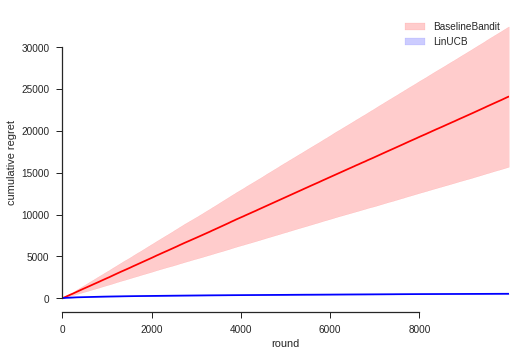

In [7]:
#Vary the confidence level, plot convergence rate, regret, risk
sns.tsplot(np.cumsum(regret, axis = 1), color = 'red')
sns.tsplot(np.cumsum(regret_linucb, axis = 1), color = 'blue')
plt.xlabel('round')
plt.ylabel('cumulative regret')
plt.legend(['BaselineBandit', 'LinUCB'])
sns.despine(trim = True)

In [ ]:
##Doesn't seem to work very well!!!